# Imports

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
import matplotlib
from sklearn.tree import DecisionTreeRegressor

# Methods

In [3]:
def normalize_col(col, doi, norm_val):
    data=((doi[col]-doi[col].min())/(doi[col].max()-doi[col].min()))*norm_val
    return data

def rmse (y_true, y_pred):
    return sqrt(np.mean((y_pred -y_true)**2))

def sqrt (x):
    return x**(1/2.0)

def krmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred -y_true), axis=-1))

# Data

In [4]:
data = pd.read_csv('2020shiftedByThreeWeeks.csv')
data = data.drop(columns=data.columns[0])
data.head()

index    YEAR  WEEK  Total Cases     index.1  influenza st pop  \
0      3  2005.0  14.0        355.0  2005-03-13               5.0   
1      4  2005.0  15.0        176.0  2005-03-20               6.0   
2      5  2005.0  16.0        123.0  2005-03-27               4.0   
3      6  2005.0  17.0         69.0  2005-04-03               5.0   
4      7  2005.0  18.0         51.0  2005-04-10               5.0   

   influenza dis pop  cc dis pop  flu st pop  flu symp st pop  \
0                5.0        58.0         1.0              2.0   
1                5.0        56.0         1.0              2.0   
2                4.0        52.0         1.0              1.0   
3                4.0        50.0         1.0              1.0   
4                4.0        46.0         1.0              1.0   

   influenza vaccine vacc pop  prevent flu st pop  
0                         1.0                 6.0  
1                         1.0                 0.0  
2                         1.0                 3.0  
3                         0.0                 0.0  
4                         1.0                 6.0

# Models

Steps to take:
1. Train, Val, Test split
2. Try DecisionTreeRegressor Model
3. Try RandomForestRegressor
4. NeuralNetwork

Other Notes:
1. Make sure we always have percent error

# Train Test Split

In [47]:
y = normalize_col('Total Cases',data,1)
x1 = normalize_col('influenza st pop',data,1)
x2 = normalize_col('influenza dis pop',data,1)
x3 = normalize_col('prevent flu st pop',data,1)
x4 = normalize_col('cc dis pop',data,1)
x5 = normalize_col('flu st pop',data,1)
x6 = normalize_col('flu symp st pop',data,1)
x7 = normalize_col('influenza vaccine vacc pop',data,1)
x = pd.concat([x1,x2,x3,x4,x5,x6,x7],axis=1)

In [48]:
xlength = x.shape[0]
x_train = x[:int(2*xlength/3)]
y_train = y[:int(2*xlength/3)]
x_test = x[int(2*xlength/3):]
y_test = y[int(2*xlength/3):]
x_val = x_train[:3*int(xlength/10)]
y_val = y_train[:3*int(xlength/10)]

# Decision Tree Regressor

How to choose best max_depth for DecisionTreeRegressor:
1. Choose a number of tree depths to start a for loop (try to cover whole area so try small ones and very big ones as well)
2. Inside a for loop divide your dataset to train/validation (e.g. 70%/30%)
3. Each time train your decision tree with that depth on training data and test it on the validation set, then keep the validation error (you can also keep the training error)
4. Plot the validation error (you can combine it with evolution of training error to have a prettier plot for understanding!)
5. Find the global minimum of validation error.
6. Then you can narrow your search in a new for loop according to the value you found to reach a more precise value

Source: https://datascience.stackexchange.com/questions/26776/how-to-calculate-ideal-decision-tree-depth-without-overfitting

In [37]:
err_dat = pd.DataFrame()
loop_it=30
for i in range(30):
    regr = DecisionTreeRegressor(max_depth=i+1)
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_val)
    err = rmse(y_val,y_pred)
    err_dat=err_dat.append([err])
err_dat=err_dat.reset_index()
err_dat=err_dat.drop(columns='index')
err_dat.min()

0    0.005787
dtype: float64

In [38]:
err_dat

0
0   4.890982
1   4.830647
2   4.344754
3   3.894314
4   3.384843
5   2.760947
6   2.031838
7   1.736490
8   1.194847
9   0.710904
10  0.373436
11  0.255677
12  0.165159
13  0.123928
14  0.031029
15  0.009297
16  0.006805
17  0.006183
18  0.005809
19  0.005789
20  0.005810
21  0.005787
22  0.005787
23  0.005787
24  0.005787
25  0.005787
26  0.005787
27  0.005787
28  0.005787
29  0.005787

In [39]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth =17)
regr.fit(x_train,y_train)
y_pred = regr.predict(x_val)

1.0000136705148612x + -0.00019690132093090908 = y


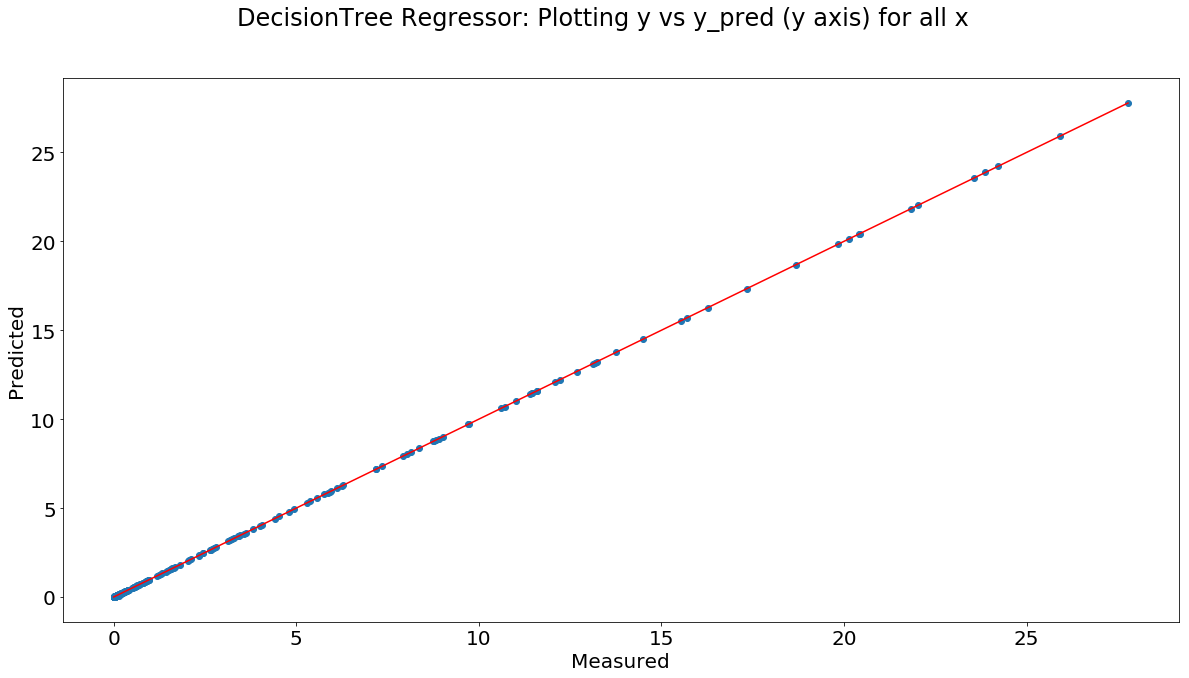

In [40]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.scatter(y_val,y_pred)
plt.suptitle('DecisionTree Regressor: Plotting y vs y_pred (y axis) for all x')
plt.plot(np.unique(y_val), np.poly1d(np.polyfit(y_val, y_pred, 1))(np.unique(y_val)),'red')
print(str(np.polyfit(y_val, y_pred, 1)[0])+'x + '+ str(np.polyfit(y_val, y_pred, 1)[1])+' = y')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

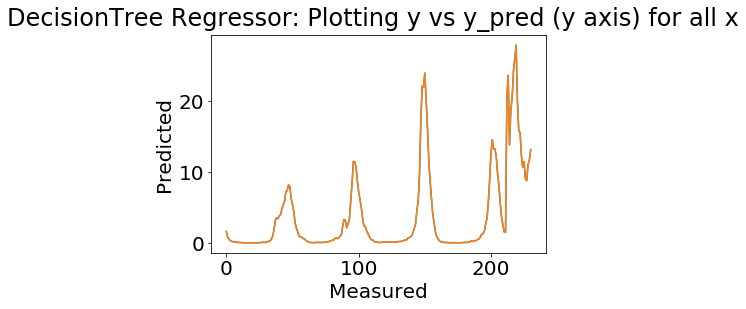

In [41]:
fig, ax = plt.subplots()
plt.plot(np.arange(len(y_val)),y_val)
plt.plot(np.arange(len(y_val)),y_pred)
plt.suptitle('DecisionTree Regressor: Plotting y vs y_pred (y axis) for all x')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

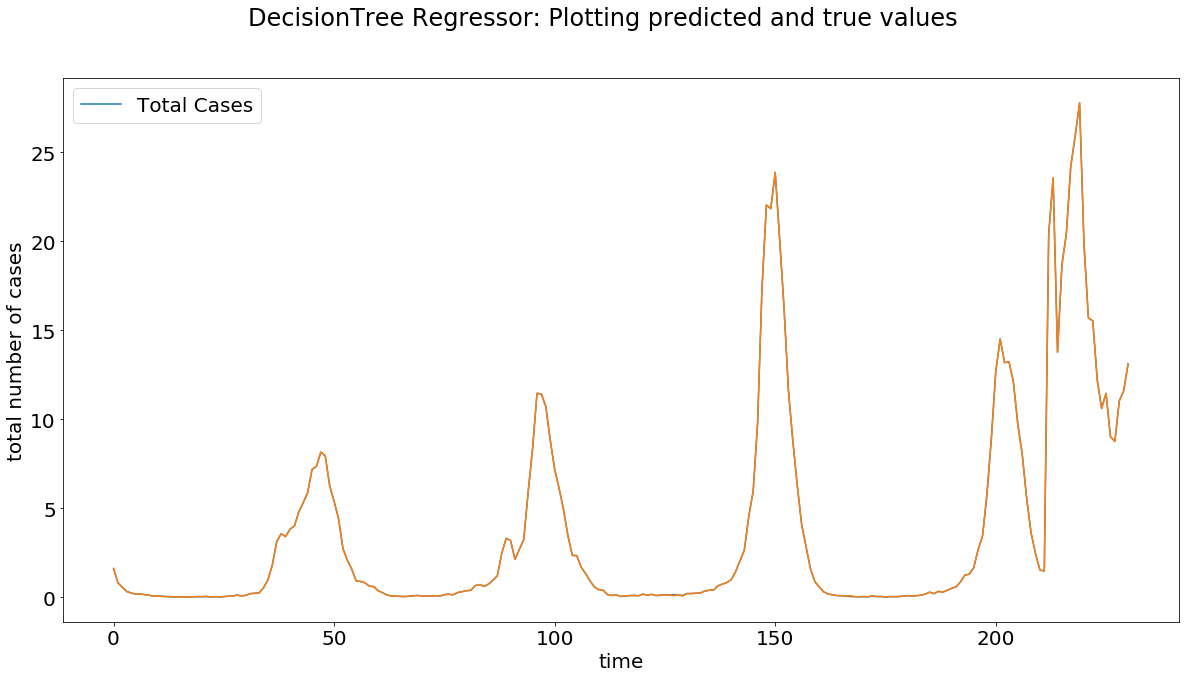

In [42]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(y_val)),y_val)
plt.plot(np.arange(len(y_val)),y_pred)
plt.suptitle('DecisionTree Regressor: Plotting predicted and true values')
plt.xlabel('time')
plt.ylabel('total number of cases')
plt.legend()
plt.show()

# Testing Decision Tree Regressor

0.26003891938810997x + 6.755743524207411 = y


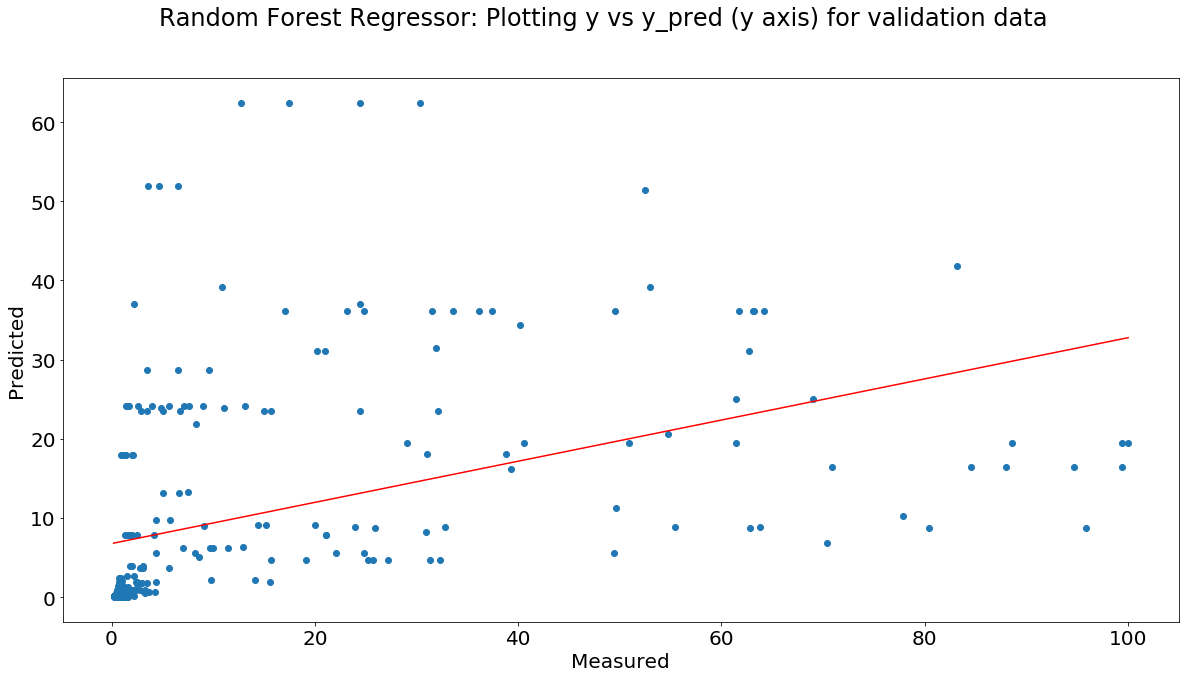

In [43]:
y_pred = regr.predict(x_test)
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test,y_pred)
plt.suptitle('Random Forest Regressor: Plotting y vs y_pred (y axis) for validation data')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)),'red')
print(str(np.polyfit(y_test, y_pred, 1)[0])+'x + '+ str(np.polyfit(y_test, y_pred, 1)[1])+' = y')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

In [45]:
rmse(y_pred,y_test)

21.869214882144394

# Random Forest Regressor

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
err_dat = pd.DataFrame()
loop_it=100
for i in range(loop_it):
    regr = RandomForestRegressor(max_depth=i+1)
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_val)
    err = rmse(y_val,y_pred)
    err_dat=err_dat.append([err])
err_dat=err_dat.reset_index()
err_dat=err_dat.drop(columns='index')
minval = err_dat.min()
max_dep=err_dat[err_dat[0]==minval[0]]
max_dep=max_dep.reset_index()
max_dep=max_dep['index'][0]

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [114]:
regr = RandomForestRegressor(max_depth=max_dep)
regr.fit(x_train,y_train)
y_pred = regr.predict(x_val)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [115]:
y_pred

array([1.74371268e+00, 1.03175321e+00, 8.63488330e-01, 2.54930342e+00,
       7.40908269e-01, 1.86357880e-01, 4.13425005e-01, 1.44291659e-01,
       1.20318437e-01, 6.19685182e-02, 1.36602135e-01, 2.63177734e-02,
       2.91297268e-02, 2.91297268e-02, 2.71394970e-02, 2.34832037e-02,
       1.26650986e-02, 2.62348471e-02, 3.12104216e-02, 4.56848200e-02,
       2.63177734e-02, 4.56848200e-02, 2.89487968e-02, 7.46336168e-02,
       7.50859417e-02, 1.11271938e-01, 1.39768410e-01, 2.87226343e-01,
       5.44599240e-01, 3.45576262e-01, 8.34087208e-01, 4.82630722e-01,
       7.19196671e-01, 7.99755745e+00, 1.05436946e+00, 2.41858151e+00,
       1.63560702e+00, 3.21150715e+00, 2.81707979e+00, 2.74606477e+00,
       7.04315180e+00, 7.18472951e+00, 5.35100416e+00, 5.14836258e+00,
       6.15795187e+00, 6.91559616e+00, 6.77808938e+00, 7.03139135e+00,
       7.46698028e+00, 6.54378506e+00, 5.74226524e+00, 3.61814728e+00,
       2.81888909e+00, 2.96679935e+00, 1.34611905e+00, 9.56214945e-01,
      

0.9124540800754103x + 0.40110583097554653 = y


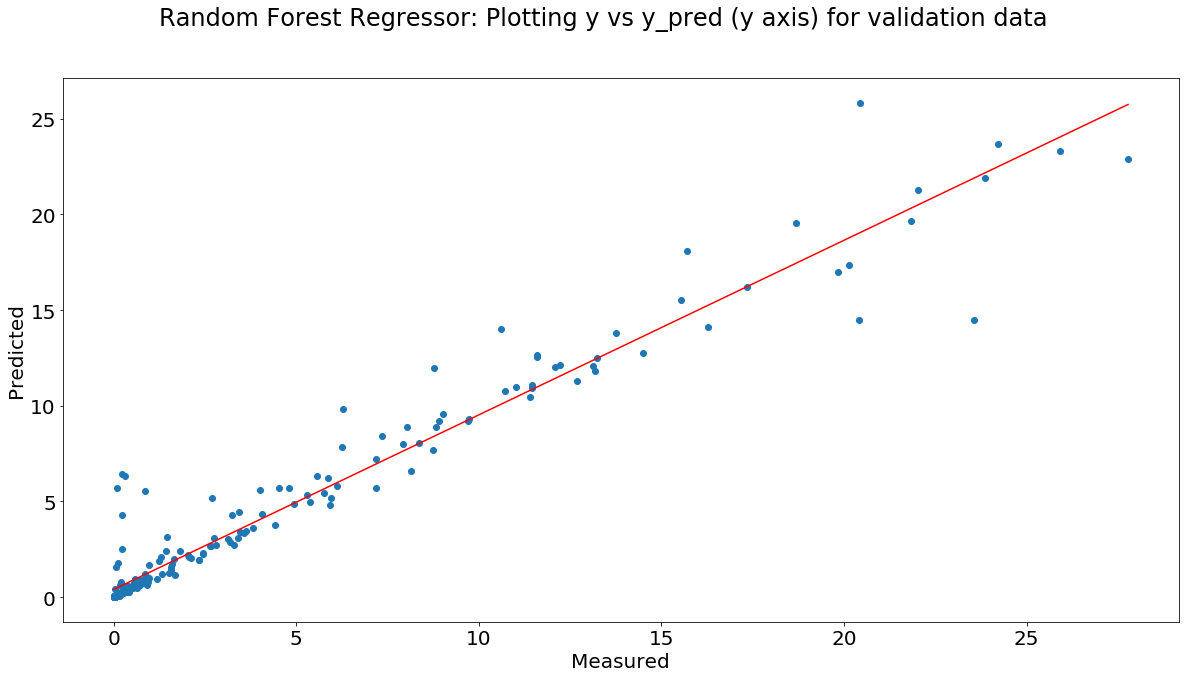

In [23]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.scatter(y_val,y_pred)
plt.suptitle('Random Forest Regressor: Plotting y vs y_pred (y axis) for validation data')
plt.plot(np.unique(y_val), np.poly1d(np.polyfit(y_val, y_pred, 1))(np.unique(y_val)),'red')
print(str(np.polyfit(y_val, y_pred, 1)[0])+'x + '+ str(np.polyfit(y_val, y_pred, 1)[1])+' = y')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

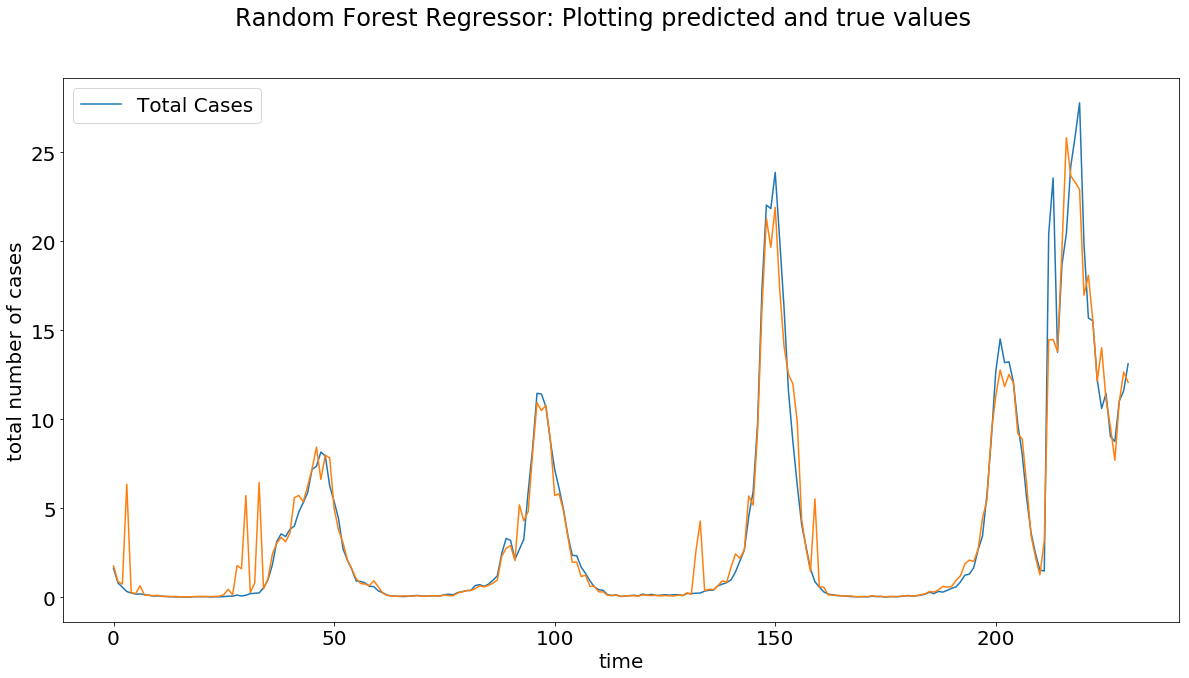

In [25]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(y_val)),y_val)
plt.plot(np.arange(len(y_val)),y_pred)
plt.legend()
plt.suptitle('Random Forest Regressor: Plotting predicted and true values')
plt.xlabel('time')
plt.ylabel('total number of cases')
plt.show()

# Testing RandomForestRegressor

0.27858266390627345x + 5.118241069629581 = y


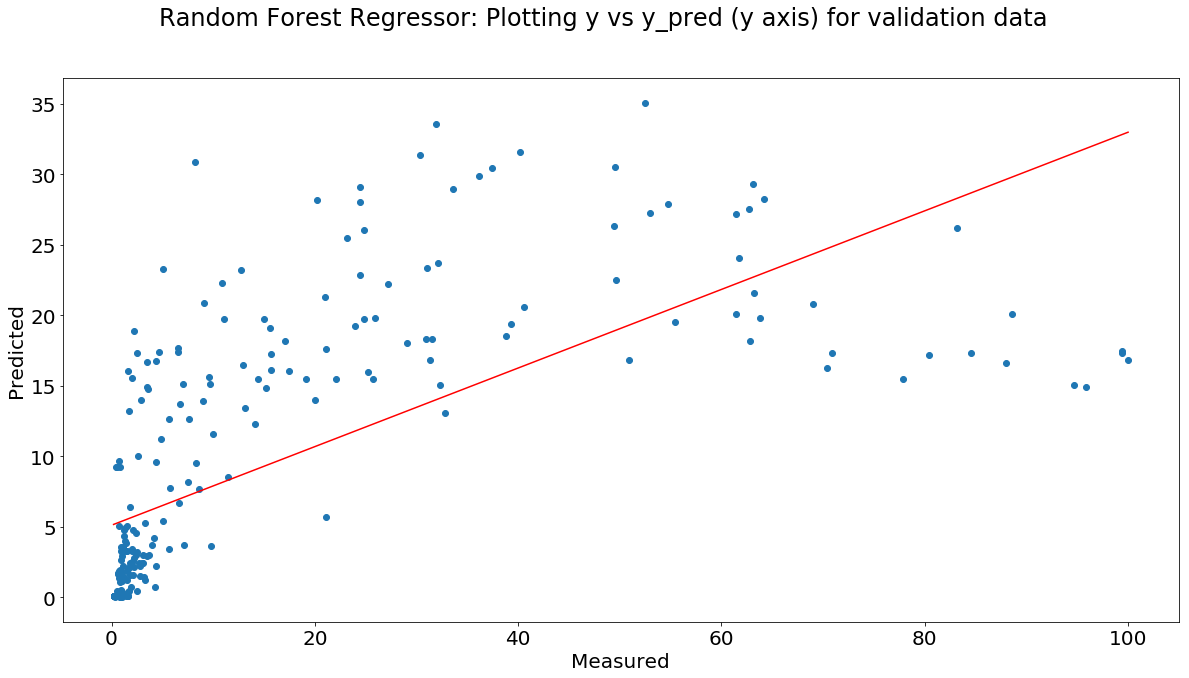

In [26]:
y_pred = regr.predict(x_test)
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test,y_pred)
plt.suptitle('Random Forest Regressor: Plotting y vs y_pred (y axis) for validation data')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)),'red')
print(str(np.polyfit(y_test, y_pred, 1)[0])+'x + '+ str(np.polyfit(y_test, y_pred, 1)[1])+' = y')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

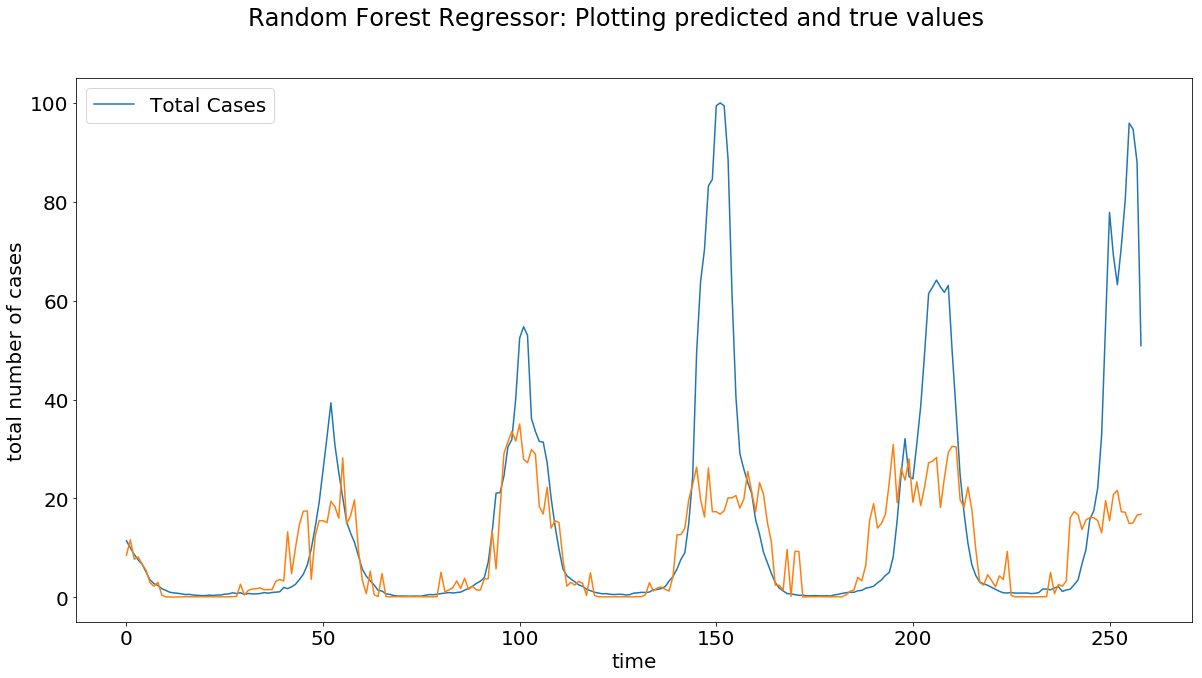

In [27]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(y_test)),y_test)
plt.plot(np.arange(len(y_test)),y_pred)
plt.legend()
plt.suptitle('Random Forest Regressor: Plotting predicted and true values')
plt.xlabel('time')
plt.ylabel('total number of cases')
plt.show()

In [28]:
rmse(y_test,y_pred)

19.08654150676147

# Neural Network

In [56]:
from keras import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import keras.backend as K
from keras import models
from keras.layers import Conv1D
from keras.layers import Softmax
from keras.layers import Flatten

In [8]:
def krmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred -y_true), axis=-1))

In [9]:
input_dim = 7
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=10, input_dim=input_dim,kernel_initializer='normal',activation='tanh'))
    regressor.add(Dense(units=9, input_dim=10,kernel_initializer='normal',activation='elu'))
    regressor.add(Dense(units=1, input_dim=10,kernel_initializer='normal',activation='relu'))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy',krmse])
    return regressor

In [10]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=1000)

In [90]:
model = models.Sequential()
model.add(Dense(100, input_shape=(input_dim,)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(100))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='sgd')

In [91]:
results = model.fit(x_train,y_train,epochs=120)
y_pred= model.predict(x_val)

Epoch 1/120
518/518 [==============================] - 1s 3ms/step - loss: 0.0131
Epoch 2/120
518/518 [==============================] - 0s 96us/step - loss: 0.0102
Epoch 3/120
518/518 [==============================] - 0s 105us/step - loss: 0.0096
Epoch 4/120
518/518 [==============================] - 0s 113us/step - loss: 0.0093
Epoch 5/120
518/518 [==============================] - 0s 116us/step - loss: 0.0091
Epoch 6/120
518/518 [==============================] - 0s 116us/step - loss: 0.0090
Epoch 7/120
518/518 [==============================] - 0s 106us/step - loss: 0.0088
Epoch 8/120
518/518 [==============================] - 0s 116us/step - loss: 0.0087
Epoch 9/120
518/518 [==============================] - 0s 110us/step - loss: 0.0085
Epoch 10/120
518/518 [==============================] - 0s 119us/step - loss: 0.0083
Epoch 11/120
518/518 [==============================] - 0s 109us/step - loss: 0.0082
Epoch 12/120
518/518 [==============================] - 0s 117us/step - loss:

518/518 [==============================] - 0s 103us/step - loss: 0.0055
Epoch 98/120
518/518 [==============================] - 0s 107us/step - loss: 0.0055
Epoch 99/120
518/518 [==============================] - 0s 107us/step - loss: 0.0055
Epoch 100/120
518/518 [==============================] - 0s 101us/step - loss: 0.0055
Epoch 101/120
518/518 [==============================] - 0s 108us/step - loss: 0.0055
Epoch 102/120
518/518 [==============================] - 0s 101us/step - loss: 0.0055
Epoch 103/120
518/518 [==============================] - 0s 98us/step - loss: 0.0055
Epoch 104/120
518/518 [==============================] - 0s 102us/step - loss: 0.0054
Epoch 105/120
518/518 [==============================] - 0s 99us/step - loss: 0.0054
Epoch 106/120
518/518 [==============================] - 0s 100us/step - loss: 0.0054
Epoch 107/120
518/518 [==============================] - 0s 98us/step - loss: 0.0054
Epoch 108/120
518/518 [==============================] - 0s 98us/step - l

*this is validation data
RMSE: 
0.05165720681983021


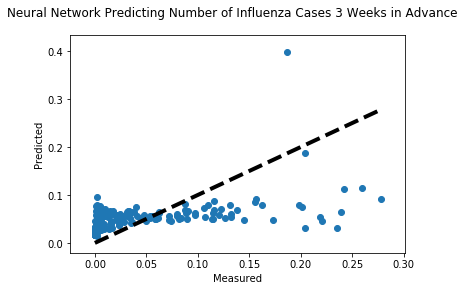

In [92]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_pred)
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
print("*this is validation data")
print("RMSE: ")
print(rmse(np.array([y_val]),y_pred.reshape(1,-1)))
plt.suptitle("Neural Network Predicting Number of Influenza Cases 3 Weeks in Advance")
plt.show()

# Neural Network 2

In [117]:
alp = 0.03
model = models.Sequential()
model.add(Dense(100, input_shape=(input_dim,)))
model.add(LeakyReLU(alpha=alp))
model.add(Dense(100))
model.add(LeakyReLU(alpha=alp))
model.add(Dense(100))
model.add(LeakyReLU(alpha=alp))
model.add(Dense(100))
model.add(LeakyReLU(alpha=alp))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='sgd')

In [118]:
results = model.fit(x_train,y_train,epochs=200)
y_pred= model.predict(x_val)

Epoch 1/200
518/518 [==============================] - 2s 4ms/step - loss: 0.0076
Epoch 2/200
518/518 [==============================] - 0s 143us/step - loss: 0.0072
Epoch 3/200
518/518 [==============================] - 0s 160us/step - loss: 0.0070
Epoch 4/200
518/518 [==============================] - 0s 153us/step - loss: 0.0070
Epoch 5/200
518/518 [==============================] - 0s 153us/step - loss: 0.0069
Epoch 6/200
518/518 [==============================] - 0s 159us/step - loss: 0.0068
Epoch 7/200
518/518 [==============================] - 0s 161us/step - loss: 0.0067
Epoch 8/200
518/518 [==============================] - 0s 151us/step - loss: 0.0066
Epoch 9/200
518/518 [==============================] - 0s 167us/step - loss: 0.0066
Epoch 10/200
518/518 [==============================] - 0s 161us/step - loss: 0.0066
Epoch 11/200
518/518 [==============================] - 0s 139us/step - loss: 0.0065
Epoch 12/200
518/518 [==============================] - 0s 202us/step - loss

518/518 [==============================] - 0s 159us/step - loss: 0.0049
Epoch 98/200
518/518 [==============================] - 0s 157us/step - loss: 0.0049
Epoch 99/200
518/518 [==============================] - 0s 154us/step - loss: 0.0049
Epoch 100/200
518/518 [==============================] - 0s 144us/step - loss: 0.0049
Epoch 101/200
518/518 [==============================] - 0s 136us/step - loss: 0.0049
Epoch 102/200
518/518 [==============================] - 0s 144us/step - loss: 0.0049
Epoch 103/200
518/518 [==============================] - 0s 144us/step - loss: 0.0049
Epoch 104/200
518/518 [==============================] - 0s 151us/step - loss: 0.0049
Epoch 105/200
518/518 [==============================] - 0s 164us/step - loss: 0.0049
Epoch 106/200
518/518 [==============================] - 0s 155us/step - loss: 0.0049
Epoch 107/200
518/518 [==============================] - 0s 156us/step - loss: 0.0049
Epoch 108/200
518/518 [==============================] - 0s 167us/step

518/518 [==============================] - 0s 153us/step - loss: 0.0044
Epoch 193/200
518/518 [==============================] - 0s 159us/step - loss: 0.0044
Epoch 194/200
518/518 [==============================] - 0s 176us/step - loss: 0.0044
Epoch 195/200
518/518 [==============================] - 0s 148us/step - loss: 0.0044
Epoch 196/200
518/518 [==============================] - 0s 138us/step - loss: 0.0044
Epoch 197/200
518/518 [==============================] - 0s 146us/step - loss: 0.0044
Epoch 198/200
518/518 [==============================] - 0s 137us/step - loss: 0.0044
Epoch 199/200
518/518 [==============================] - 0s 145us/step - loss: 0.0044
Epoch 200/200
518/518 [==============================] - 0s 505us/step - loss: 0.0044


*this is validation data
RMSE: 
Using RELU Activation Function
0.04610400489416934


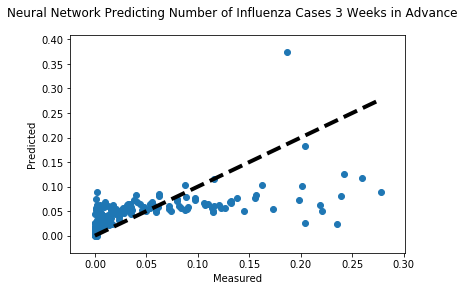

In [119]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_pred)
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
print("*this is validation data")
print("RMSE: ")
print("Using RELU Activation Function")
print(rmse(np.array([y_val]),y_pred.reshape(1,-1)))
plt.suptitle("Neural Network Predicting Number of Influenza Cases 3 Weeks in Advance")
plt.show()

In [122]:
rmse_dat = pd.DataFrame()
for i in range(1,300):
    results = model.fit(x_train,y_train,epochs=i)
    y_pred= model.predict(x_val)
    rmse_dat=rmse_dat.append([rmse(np.array([y_val]),y_pred.reshape(1,-1))])

Epoch 1/1
518/518 [==============================] - 0s 139us/step - loss: 0.0039
Epoch 1/2
518/518 [==============================] - 0s 156us/step - loss: 0.0039
Epoch 2/2
518/518 [==============================] - 0s 153us/step - loss: 0.0039
Epoch 1/3
518/518 [==============================] - 0s 140us/step - loss: 0.0039
Epoch 2/3
518/518 [==============================] - 0s 153us/step - loss: 0.0039
Epoch 3/3
518/518 [==============================] - 0s 156us/step - loss: 0.0039
Epoch 1/4
518/518 [==============================] - 0s 148us/step - loss: 0.0039
Epoch 2/4
518/518 [==============================] - 0s 148us/step - loss: 0.0039
Epoch 3/4
518/518 [==============================] - 0s 152us/step - loss: 0.0039
Epoch 4/4
518/518 [==============================] - 0s 152us/step - loss: 0.0039
Epoch 1/5
518/518 [==============================] - 0s 188us/step - loss: 0.0039
Epoch 2/5
518/518 [==============================] - 0s 219us/step - loss: 0.0039
Epoch 3/5
518/51

518/518 [==============================] - 0s 162us/step - loss: 0.0038
Epoch 10/14
518/518 [==============================] - 0s 163us/step - loss: 0.0038
Epoch 11/14
518/518 [==============================] - 0s 153us/step - loss: 0.0038
Epoch 12/14
518/518 [==============================] - 0s 157us/step - loss: 0.0038
Epoch 13/14
518/518 [==============================] - 0s 145us/step - loss: 0.0038
Epoch 14/14
518/518 [==============================] - 0s 152us/step - loss: 0.0038
Epoch 1/15
518/518 [==============================] - 0s 146us/step - loss: 0.0038
Epoch 2/15
518/518 [==============================] - 0s 499us/step - loss: 0.0038
Epoch 3/15
518/518 [==============================] - 0s 144us/step - loss: 0.0038
Epoch 4/15
518/518 [==============================] - 0s 157us/step - loss: 0.0038
Epoch 5/15
518/518 [==============================] - 0s 156us/step - loss: 0.0038
Epoch 6/15
518/518 [==============================] - 0s 153us/step - loss: 0.0038
Epoch 7/15

518/518 [==============================] - 0s 153us/step - loss: 0.0037
Epoch 9/20
518/518 [==============================] - 0s 510us/step - loss: 0.0037
Epoch 10/20
518/518 [==============================] - 0s 158us/step - loss: 0.0037
Epoch 11/20
518/518 [==============================] - 0s 157us/step - loss: 0.0037
Epoch 12/20
518/518 [==============================] - 0s 160us/step - loss: 0.0037
Epoch 13/20
518/518 [==============================] - 0s 157us/step - loss: 0.0037
Epoch 14/20
518/518 [==============================] - 0s 153us/step - loss: 0.0037
Epoch 15/20
518/518 [==============================] - 0s 148us/step - loss: 0.0037
Epoch 16/20
518/518 [==============================] - 0s 158us/step - loss: 0.0037
Epoch 17/20
518/518 [==============================] - 0s 155us/step - loss: 0.0037
Epoch 18/20
518/518 [==============================] - 0s 156us/step - loss: 0.0037
Epoch 19/20
518/518 [==============================] - 0s 165us/step - loss: 0.0037
Epoch

518/518 [==============================] - 0s 157us/step - loss: 0.0036
Epoch 21/24
518/518 [==============================] - 0s 155us/step - loss: 0.0036
Epoch 22/24
518/518 [==============================] - 0s 157us/step - loss: 0.0036
Epoch 23/24
518/518 [==============================] - 0s 157us/step - loss: 0.0036
Epoch 24/24
518/518 [==============================] - 0s 154us/step - loss: 0.0036
Epoch 1/25
518/518 [==============================] - 0s 154us/step - loss: 0.0036
Epoch 2/25
518/518 [==============================] - 0s 159us/step - loss: 0.0036
Epoch 3/25
518/518 [==============================] - 0s 160us/step - loss: 0.0036
Epoch 4/25
518/518 [==============================] - 0s 148us/step - loss: 0.0036
Epoch 5/25
518/518 [==============================] - 0s 151us/step - loss: 0.0036
Epoch 6/25
518/518 [==============================] - 0s 150us/step - loss: 0.0036
Epoch 7/25
518/518 [==============================] - 0s 149us/step - loss: 0.0036
Epoch 8/25


518/518 [==============================] - 0s 153us/step - loss: 0.0035
Epoch 17/28
518/518 [==============================] - 0s 157us/step - loss: 0.0035
Epoch 18/28
518/518 [==============================] - 0s 155us/step - loss: 0.0035
Epoch 19/28
518/518 [==============================] - 0s 151us/step - loss: 0.0036
Epoch 20/28
518/518 [==============================] - 0s 151us/step - loss: 0.0035
Epoch 21/28
518/518 [==============================] - 0s 148us/step - loss: 0.0035
Epoch 22/28
518/518 [==============================] - 0s 149us/step - loss: 0.0035
Epoch 23/28
518/518 [==============================] - 0s 150us/step - loss: 0.0035
Epoch 24/28
518/518 [==============================] - 0s 149us/step - loss: 0.0035
Epoch 25/28
518/518 [==============================] - 0s 153us/step - loss: 0.0035
Epoch 26/28
518/518 [==============================] - 0s 149us/step - loss: 0.0035
Epoch 27/28
518/518 [==============================] - 0s 137us/step - loss: 0.0035
Epoc

Epoch 27/31
518/518 [==============================] - 0s 154us/step - loss: 0.0035
Epoch 28/31
518/518 [==============================] - 0s 145us/step - loss: 0.0035
Epoch 29/31
518/518 [==============================] - 0s 153us/step - loss: 0.0035
Epoch 30/31
518/518 [==============================] - 0s 150us/step - loss: 0.0035
Epoch 31/31
518/518 [==============================] - 0s 145us/step - loss: 0.0035
Epoch 1/32
518/518 [==============================] - 0s 148us/step - loss: 0.0035
Epoch 2/32
518/518 [==============================] - 0s 138us/step - loss: 0.0035
Epoch 3/32
518/518 [==============================] - 0s 141us/step - loss: 0.0035
Epoch 4/32
518/518 [==============================] - 0s 141us/step - loss: 0.0035
Epoch 5/32
518/518 [==============================] - 0s 504us/step - loss: 0.0035
Epoch 6/32
518/518 [==============================] - 0s 145us/step - loss: 0.0035
Epoch 7/32
518/518 [==============================] - 0s 152us/step - loss: 0.0035

518/518 [==============================] - 0s 132us/step - loss: 0.0034
Epoch 29/34
518/518 [==============================] - 0s 134us/step - loss: 0.0034
Epoch 30/34
518/518 [==============================] - 0s 129us/step - loss: 0.0035
Epoch 31/34
518/518 [==============================] - 0s 130us/step - loss: 0.0034
Epoch 32/34
518/518 [==============================] - 0s 131us/step - loss: 0.0034
Epoch 33/34
518/518 [==============================] - 0s 130us/step - loss: 0.0034
Epoch 34/34
518/518 [==============================] - 0s 486us/step - loss: 0.0034
Epoch 1/35
518/518 [==============================] - 0s 145us/step - loss: 0.0035
Epoch 2/35
518/518 [==============================] - 0s 144us/step - loss: 0.0034
Epoch 3/35
518/518 [==============================] - 0s 149us/step - loss: 0.0034
Epoch 4/35
518/518 [==============================] - 0s 150us/step - loss: 0.0035
Epoch 5/35
518/518 [==============================] - 0s 146us/step - loss: 0.0034
Epoch 6/3

Epoch 21/37
518/518 [==============================] - 0s 150us/step - loss: 0.0034
Epoch 22/37
518/518 [==============================] - 0s 488us/step - loss: 0.0034
Epoch 23/37
518/518 [==============================] - 0s 148us/step - loss: 0.0034
Epoch 24/37
518/518 [==============================] - 0s 155us/step - loss: 0.0034
Epoch 25/37
518/518 [==============================] - 0s 159us/step - loss: 0.0034
Epoch 26/37
518/518 [==============================] - 0s 158us/step - loss: 0.0034
Epoch 27/37
518/518 [==============================] - 0s 155us/step - loss: 0.0034
Epoch 28/37
518/518 [==============================] - 0s 147us/step - loss: 0.0034
Epoch 29/37
518/518 [==============================] - 0s 145us/step - loss: 0.0034
Epoch 30/37
518/518 [==============================] - 0s 146us/step - loss: 0.0034
Epoch 31/37
518/518 [==============================] - 0s 141us/step - loss: 0.0034
Epoch 32/37
518/518 [==============================] - 0s 157us/step - loss:

518/518 [==============================] - 0s 153us/step - loss: 0.0034
Epoch 5/40
518/518 [==============================] - 0s 159us/step - loss: 0.0034
Epoch 6/40
518/518 [==============================] - 0s 158us/step - loss: 0.0034
Epoch 7/40
518/518 [==============================] - 0s 152us/step - loss: 0.0034
Epoch 8/40
518/518 [==============================] - 0s 156us/step - loss: 0.0034
Epoch 9/40
518/518 [==============================] - 0s 156us/step - loss: 0.0034
Epoch 10/40
518/518 [==============================] - 0s 155us/step - loss: 0.0034
Epoch 11/40
518/518 [==============================] - 0s 158us/step - loss: 0.0034
Epoch 12/40
518/518 [==============================] - 0s 153us/step - loss: 0.0034
Epoch 13/40
518/518 [==============================] - 0s 141us/step - loss: 0.0034
Epoch 14/40
518/518 [==============================] - 0s 137us/step - loss: 0.0034
Epoch 15/40
518/518 [==============================] - 0s 140us/step - loss: 0.0034
Epoch 16/

Epoch 21/42
518/518 [==============================] - 0s 156us/step - loss: 0.0033
Epoch 22/42
518/518 [==============================] - 0s 163us/step - loss: 0.0033
Epoch 23/42
518/518 [==============================] - 0s 152us/step - loss: 0.0033
Epoch 24/42
518/518 [==============================] - 0s 140us/step - loss: 0.0033
Epoch 25/42
518/518 [==============================] - 0s 163us/step - loss: 0.0033
Epoch 26/42
518/518 [==============================] - 0s 152us/step - loss: 0.0033
Epoch 27/42
518/518 [==============================] - 0s 138us/step - loss: 0.0034
Epoch 28/42
518/518 [==============================] - 0s 138us/step - loss: 0.0033
Epoch 29/42
518/518 [==============================] - 0s 136us/step - loss: 0.0034
Epoch 30/42
518/518 [==============================] - 0s 149us/step - loss: 0.0033
Epoch 31/42
518/518 [==============================] - 0s 147us/step - loss: 0.0033
Epoch 32/42
518/518 [==============================] - 0s 151us/step - loss:

518/518 [==============================] - 0s 168us/step - loss: 0.0033
Epoch 34/44
518/518 [==============================] - 0s 154us/step - loss: 0.0033
Epoch 35/44
518/518 [==============================] - 0s 170us/step - loss: 0.0034
Epoch 36/44
518/518 [==============================] - 0s 159us/step - loss: 0.0033
Epoch 37/44
518/518 [==============================] - 0s 163us/step - loss: 0.0033
Epoch 38/44
518/518 [==============================] - 0s 156us/step - loss: 0.0033
Epoch 39/44
518/518 [==============================] - 0s 157us/step - loss: 0.0033
Epoch 40/44
518/518 [==============================] - 0s 145us/step - loss: 0.0033
Epoch 41/44
518/518 [==============================] - 0s 496us/step - loss: 0.0033
Epoch 42/44
518/518 [==============================] - 0s 150us/step - loss: 0.0033
Epoch 43/44
518/518 [==============================] - 0s 155us/step - loss: 0.0033
Epoch 44/44
518/518 [==============================] - 0s 156us/step - loss: 0.0033
Epoc

518/518 [==============================] - 0s 138us/step - loss: 0.0033
Epoch 42/46
518/518 [==============================] - 0s 154us/step - loss: 0.0033
Epoch 43/46
518/518 [==============================] - 0s 501us/step - loss: 0.0033
Epoch 44/46
518/518 [==============================] - 0s 141us/step - loss: 0.0033
Epoch 45/46
518/518 [==============================] - 0s 145us/step - loss: 0.0033
Epoch 46/46
518/518 [==============================] - 0s 143us/step - loss: 0.0033
Epoch 1/47
518/518 [==============================] - 0s 153us/step - loss: 0.0033
Epoch 2/47
518/518 [==============================] - 0s 160us/step - loss: 0.0033
Epoch 3/47
518/518 [==============================] - 0s 153us/step - loss: 0.0033
Epoch 4/47
518/518 [==============================] - 0s 158us/step - loss: 0.0033
Epoch 5/47
518/518 [==============================] - 0s 152us/step - loss: 0.0033
Epoch 6/47
518/518 [==============================] - 0s 148us/step - loss: 0.0033
Epoch 7/47

518/518 [==============================] - 0s 169us/step - loss: 0.0033
Epoch 46/48
518/518 [==============================] - 0s 151us/step - loss: 0.0033
Epoch 47/48
518/518 [==============================] - 0s 152us/step - loss: 0.0033
Epoch 48/48
518/518 [==============================] - 0s 153us/step - loss: 0.0033
Epoch 1/49
518/518 [==============================] - 0s 155us/step - loss: 0.0033
Epoch 2/49
518/518 [==============================] - 0s 157us/step - loss: 0.0033
Epoch 3/49
518/518 [==============================] - 0s 166us/step - loss: 0.0033
Epoch 4/49
518/518 [==============================] - 0s 155us/step - loss: 0.0033
Epoch 5/49
518/518 [==============================] - 0s 155us/step - loss: 0.0033
Epoch 6/49
518/518 [==============================] - 0s 149us/step - loss: 0.0033
Epoch 7/49
518/518 [==============================] - 0s 146us/step - loss: 0.0033
Epoch 8/49
518/518 [==============================] - 0s 162us/step - loss: 0.0033
Epoch 9/49
5

518/518 [==============================] - 0s 147us/step - loss: 0.0033
Epoch 46/50
518/518 [==============================] - 0s 151us/step - loss: 0.0033
Epoch 47/50
518/518 [==============================] - 0s 161us/step - loss: 0.0032
Epoch 48/50
518/518 [==============================] - 0s 148us/step - loss: 0.0032
Epoch 49/50
518/518 [==============================] - 0s 150us/step - loss: 0.0032
Epoch 50/50
518/518 [==============================] - 0s 150us/step - loss: 0.0032
Epoch 1/51
518/518 [==============================] - 0s 144us/step - loss: 0.0032
Epoch 2/51
518/518 [==============================] - 0s 149us/step - loss: 0.0032
Epoch 3/51
518/518 [==============================] - 0s 142us/step - loss: 0.0033
Epoch 4/51
518/518 [==============================] - 0s 148us/step - loss: 0.0032
Epoch 5/51
518/518 [==============================] - 0s 143us/step - loss: 0.0033
Epoch 6/51
518/518 [==============================] - 0s 147us/step - loss: 0.0033
Epoch 7/51

518/518 [==============================] - 0s 151us/step - loss: 0.0032
Epoch 42/52
518/518 [==============================] - 0s 142us/step - loss: 0.0032
Epoch 43/52
518/518 [==============================] - 0s 152us/step - loss: 0.0032
Epoch 44/52
518/518 [==============================] - 0s 148us/step - loss: 0.0032
Epoch 45/52
518/518 [==============================] - 0s 149us/step - loss: 0.0032
Epoch 46/52
518/518 [==============================] - 0s 156us/step - loss: 0.0032
Epoch 47/52
518/518 [==============================] - 0s 147us/step - loss: 0.0032
Epoch 48/52
518/518 [==============================] - 0s 155us/step - loss: 0.0032
Epoch 49/52
518/518 [==============================] - 0s 143us/step - loss: 0.0032
Epoch 50/52
518/518 [==============================] - 0s 148us/step - loss: 0.0032
Epoch 51/52
518/518 [==============================] - 0s 157us/step - loss: 0.0032
Epoch 52/52
518/518 [==============================] - 0s 146us/step - loss: 0.0032
Epoc

518/518 [==============================] - 0s 170us/step - loss: 0.0032
Epoch 34/54
518/518 [==============================] - 0s 162us/step - loss: 0.0032
Epoch 35/54
518/518 [==============================] - 0s 153us/step - loss: 0.0032
Epoch 36/54
518/518 [==============================] - 0s 156us/step - loss: 0.0032
Epoch 37/54
518/518 [==============================] - 0s 162us/step - loss: 0.0032
Epoch 38/54
518/518 [==============================] - 0s 160us/step - loss: 0.0032
Epoch 39/54
518/518 [==============================] - 0s 158us/step - loss: 0.0032
Epoch 40/54
518/518 [==============================] - 0s 157us/step - loss: 0.0032
Epoch 41/54
518/518 [==============================] - 0s 156us/step - loss: 0.0033
Epoch 42/54
518/518 [==============================] - 0s 526us/step - loss: 0.0032
Epoch 43/54
518/518 [==============================] - 0s 175us/step - loss: 0.0032
Epoch 44/54
518/518 [==============================] - 0s 156us/step - loss: 0.0032
Epoc

518/518 [==============================] - 0s 173us/step - loss: 0.0032
Epoch 22/56
518/518 [==============================] - 0s 164us/step - loss: 0.0032
Epoch 23/56
518/518 [==============================] - 0s 150us/step - loss: 0.0032
Epoch 24/56
518/518 [==============================] - 0s 173us/step - loss: 0.0032
Epoch 25/56
518/518 [==============================] - 0s 167us/step - loss: 0.0032
Epoch 26/56
518/518 [==============================] - 0s 161us/step - loss: 0.0032
Epoch 27/56
518/518 [==============================] - 0s 161us/step - loss: 0.0032
Epoch 28/56
518/518 [==============================] - 0s 162us/step - loss: 0.0032
Epoch 29/56
518/518 [==============================] - 0s 165us/step - loss: 0.0032
Epoch 30/56
518/518 [==============================] - 0s 169us/step - loss: 0.0032
Epoch 31/56
518/518 [==============================] - 0s 172us/step - loss: 0.0032
Epoch 32/56
518/518 [==============================] - 0s 172us/step - loss: 0.0032
Epoc

518/518 [==============================] - 0s 139us/step - loss: 0.0032
Epoch 6/58
518/518 [==============================] - 0s 144us/step - loss: 0.0032
Epoch 7/58
518/518 [==============================] - 0s 133us/step - loss: 0.0032
Epoch 8/58
518/518 [==============================] - 0s 135us/step - loss: 0.0032
Epoch 9/58
518/518 [==============================] - 0s 145us/step - loss: 0.0032
Epoch 10/58
518/518 [==============================] - 0s 133us/step - loss: 0.0032
Epoch 11/58
518/518 [==============================] - 0s 146us/step - loss: 0.0032
Epoch 12/58
518/518 [==============================] - 0s 134us/step - loss: 0.0032
Epoch 13/58
518/518 [==============================] - 0s 153us/step - loss: 0.0032
Epoch 14/58
518/518 [==============================] - 0s 425us/step - loss: 0.0032
Epoch 15/58
518/518 [==============================] - 0s 189us/step - loss: 0.0032
Epoch 16/58
518/518 [==============================] - 0s 182us/step - loss: 0.0032
Epoch 17

518/518 [==============================] - 0s 162us/step - loss: 0.0032
Epoch 45/59
518/518 [==============================] - 0s 171us/step - loss: 0.0032
Epoch 46/59
518/518 [==============================] - 0s 167us/step - loss: 0.0032
Epoch 47/59
518/518 [==============================] - 0s 155us/step - loss: 0.0032
Epoch 48/59
518/518 [==============================] - 0s 176us/step - loss: 0.0032
Epoch 49/59
518/518 [==============================] - 0s 158us/step - loss: 0.0032
Epoch 50/59
518/518 [==============================] - 0s 164us/step - loss: 0.0032
Epoch 51/59
518/518 [==============================] - 0s 174us/step - loss: 0.0032
Epoch 52/59
518/518 [==============================] - 0s 169us/step - loss: 0.0032
Epoch 53/59
518/518 [==============================] - 0s 148us/step - loss: 0.0032
Epoch 54/59
518/518 [==============================] - 0s 149us/step - loss: 0.0032
Epoch 55/59
518/518 [==============================] - 0s 146us/step - loss: 0.0032
Epoc

518/518 [==============================] - 0s 188us/step - loss: 0.0031
Epoch 23/61
518/518 [==============================] - 0s 158us/step - loss: 0.0032
Epoch 24/61
518/518 [==============================] - 0s 171us/step - loss: 0.0032
Epoch 25/61
518/518 [==============================] - 0s 156us/step - loss: 0.0032
Epoch 26/61
518/518 [==============================] - 0s 178us/step - loss: 0.0032
Epoch 27/61
518/518 [==============================] - 0s 146us/step - loss: 0.0032
Epoch 28/61
518/518 [==============================] - 0s 167us/step - loss: 0.0032
Epoch 29/61
518/518 [==============================] - 0s 527us/step - loss: 0.0031
Epoch 30/61
518/518 [==============================] - 0s 150us/step - loss: 0.0032
Epoch 31/61
518/518 [==============================] - 0s 167us/step - loss: 0.0032
Epoch 32/61
518/518 [==============================] - 0s 167us/step - loss: 0.0032
Epoch 33/61
518/518 [==============================] - ETA: 0s - loss: 0.002 - 0s 160us/

518/518 [==============================] - 0s 149us/step - loss: 0.0031
Epoch 59/62
518/518 [==============================] - 0s 148us/step - loss: 0.0031
Epoch 60/62
518/518 [==============================] - 0s 148us/step - loss: 0.0031
Epoch 61/62
518/518 [==============================] - 0s 156us/step - loss: 0.0031
Epoch 62/62
518/518 [==============================] - 0s 147us/step - loss: 0.0031
Epoch 1/63
518/518 [==============================] - 0s 151us/step - loss: 0.0032
Epoch 2/63
518/518 [==============================] - 0s 157us/step - loss: 0.0032
Epoch 3/63
518/518 [==============================] - 0s 154us/step - loss: 0.0031
Epoch 4/63
518/518 [==============================] - 0s 144us/step - loss: 0.0032
Epoch 5/63
518/518 [==============================] - 0s 153us/step - loss: 0.0031
Epoch 6/63
518/518 [==============================] - 0s 153us/step - loss: 0.0031
Epoch 7/63
518/518 [==============================] - 0s 139us/step - loss: 0.0031
Epoch 8/63


518/518 [==============================] - 0s 160us/step - loss: 0.0031
Epoch 31/64
518/518 [==============================] - 0s 158us/step - loss: 0.0031
Epoch 32/64
518/518 [==============================] - 0s 158us/step - loss: 0.0031
Epoch 33/64
518/518 [==============================] - 0s 161us/step - loss: 0.0031
Epoch 34/64
518/518 [==============================] - 0s 152us/step - loss: 0.0031
Epoch 35/64
518/518 [==============================] - 0s 172us/step - loss: 0.0031
Epoch 36/64
518/518 [==============================] - 0s 164us/step - loss: 0.0031
Epoch 37/64
518/518 [==============================] - 0s 155us/step - loss: 0.0031
Epoch 38/64
518/518 [==============================] - 0s 157us/step - loss: 0.0031
Epoch 39/64
518/518 [==============================] - 0s 161us/step - loss: 0.0031
Epoch 40/64
518/518 [==============================] - 0s 150us/step - loss: 0.0031
Epoch 41/64
518/518 [==============================] - 0s 155us/step - loss: 0.0031
Epoc

518/518 [==============================] - 0s 148us/step - loss: 0.0031
Epoch 64/65
518/518 [==============================] - 0s 156us/step - loss: 0.0031
Epoch 65/65
518/518 [==============================] - 0s 158us/step - loss: 0.0031
Epoch 1/66
518/518 [==============================] - 0s 151us/step - loss: 0.0031
Epoch 2/66
518/518 [==============================] - 0s 162us/step - loss: 0.0031
Epoch 3/66
518/518 [==============================] - 0s 150us/step - loss: 0.0031
Epoch 4/66
518/518 [==============================] - 0s 150us/step - loss: 0.0031
Epoch 5/66
518/518 [==============================] - 0s 150us/step - loss: 0.0031
Epoch 6/66
518/518 [==============================] - 0s 156us/step - loss: 0.0031
Epoch 7/66
518/518 [==============================] - 0s 147us/step - loss: 0.0031
Epoch 8/66
518/518 [==============================] - 0s 148us/step - loss: 0.0031
Epoch 9/66
518/518 [==============================] - 0s 494us/step - loss: 0.0031
Epoch 10/66
5

518/518 [==============================] - 0s 153us/step - loss: 0.0031
Epoch 30/67
518/518 [==============================] - 0s 159us/step - loss: 0.0031
Epoch 31/67
518/518 [==============================] - 0s 162us/step - loss: 0.0031
Epoch 32/67
518/518 [==============================] - 0s 155us/step - loss: 0.0031
Epoch 33/67
518/518 [==============================] - 0s 158us/step - loss: 0.0031
Epoch 34/67
518/518 [==============================] - 0s 149us/step - loss: 0.0031
Epoch 35/67
518/518 [==============================] - 0s 155us/step - loss: 0.0031
Epoch 36/67
518/518 [==============================] - 0s 500us/step - loss: 0.0031
Epoch 37/67
518/518 [==============================] - 0s 153us/step - loss: 0.0031
Epoch 38/67
518/518 [==============================] - 0s 153us/step - loss: 0.0031
Epoch 39/67
518/518 [==============================] - 0s 159us/step - loss: 0.0031
Epoch 40/67
518/518 [==============================] - 0s 151us/step - loss: 0.0031
Epoc

518/518 [==============================] - 0s 152us/step - loss: 0.0031
Epoch 60/68
518/518 [==============================] - 0s 153us/step - loss: 0.0031
Epoch 61/68
518/518 [==============================] - 0s 503us/step - loss: 0.0031
Epoch 62/68
518/518 [==============================] - 0s 154us/step - loss: 0.0031
Epoch 63/68
518/518 [==============================] - 0s 148us/step - loss: 0.0031
Epoch 64/68
518/518 [==============================] - 0s 156us/step - loss: 0.0031
Epoch 65/68
518/518 [==============================] - 0s 149us/step - loss: 0.0031
Epoch 66/68
518/518 [==============================] - 0s 149us/step - loss: 0.0031
Epoch 67/68
518/518 [==============================] - 0s 156us/step - loss: 0.0031
Epoch 68/68
518/518 [==============================] - 0s 147us/step - loss: 0.0031
Epoch 1/69
518/518 [==============================] - 0s 151us/step - loss: 0.0031
Epoch 2/69
518/518 [==============================] - 0s 159us/step - loss: 0.0031
Epoch 

518/518 [==============================] - 0s 500us/step - loss: 0.0031
Epoch 20/70
518/518 [==============================] - 0s 151us/step - loss: 0.0031
Epoch 21/70
518/518 [==============================] - 0s 162us/step - loss: 0.0031
Epoch 22/70
518/518 [==============================] - 0s 159us/step - loss: 0.0031
Epoch 23/70
518/518 [==============================] - 0s 153us/step - loss: 0.0031
Epoch 24/70
518/518 [==============================] - 0s 157us/step - loss: 0.0031
Epoch 25/70
518/518 [==============================] - 0s 156us/step - loss: 0.0031
Epoch 26/70
518/518 [==============================] - 0s 151us/step - loss: 0.0031
Epoch 27/70
518/518 [==============================] - 0s 155us/step - loss: 0.0031
Epoch 28/70
518/518 [==============================] - 0s 166us/step - loss: 0.0031
Epoch 29/70
518/518 [==============================] - 0s 160us/step - loss: 0.0031
Epoch 30/70
518/518 [==============================] - 0s 159us/step - loss: 0.0031
Epoc

518/518 [==============================] - 0s 155us/step - loss: 0.0031
Epoch 47/71
518/518 [==============================] - 0s 152us/step - loss: 0.0031
Epoch 48/71
518/518 [==============================] - 0s 162us/step - loss: 0.0031
Epoch 49/71
518/518 [==============================] - 0s 165us/step - loss: 0.0031
Epoch 50/71
518/518 [==============================] - 0s 150us/step - loss: 0.0031
Epoch 51/71
518/518 [==============================] - 0s 153us/step - loss: 0.0031
Epoch 52/71
518/518 [==============================] - 0s 159us/step - loss: 0.0031
Epoch 53/71
518/518 [==============================] - 0s 156us/step - loss: 0.0031
Epoch 54/71
518/518 [==============================] - 0s 159us/step - loss: 0.0031
Epoch 55/71
518/518 [==============================] - 0s 151us/step - loss: 0.0031
Epoch 56/71
518/518 [==============================] - 0s 155us/step - loss: 0.0031
Epoch 57/71
518/518 [==============================] - 0s 162us/step - loss: 0.0031
Epoc

518/518 [==============================] - 0s 151us/step - loss: 0.0031
Epoch 1/73
518/518 [==============================] - 0s 159us/step - loss: 0.0031
Epoch 2/73
518/518 [==============================] - 0s 151us/step - loss: 0.0031
Epoch 3/73
518/518 [==============================] - 0s 148us/step - loss: 0.0031
Epoch 4/73
518/518 [==============================] - 0s 152us/step - loss: 0.0031
Epoch 5/73
518/518 [==============================] - 0s 189us/step - loss: 0.0031
Epoch 6/73
518/518 [==============================] - 0s 155us/step - loss: 0.0031
Epoch 7/73
518/518 [==============================] - 0s 134us/step - loss: 0.0031
Epoch 8/73
518/518 [==============================] - 0s 140us/step - loss: 0.0031
Epoch 9/73
518/518 [==============================] - 0s 155us/step - loss: 0.0031
Epoch 10/73
518/518 [==============================] - 0s 497us/step - loss: 0.0031
Epoch 11/73
518/518 [==============================] - 0s 144us/step - loss: 0.0031
Epoch 12/73
5

518/518 [==============================] - 0s 131us/step - loss: 0.0030
Epoch 25/74
518/518 [==============================] - 0s 136us/step - loss: 0.0030
Epoch 26/74
518/518 [==============================] - 0s 133us/step - loss: 0.0031
Epoch 27/74
518/518 [==============================] - 0s 130us/step - loss: 0.0031
Epoch 28/74
518/518 [==============================] - 0s 132us/step - loss: 0.0031
Epoch 29/74
518/518 [==============================] - 0s 127us/step - loss: 0.0031
Epoch 30/74
518/518 [==============================] - 0s 128us/step - loss: 0.0030
Epoch 31/74
518/518 [==============================] - 0s 486us/step - loss: 0.0030
Epoch 32/74
518/518 [==============================] - 0s 129us/step - loss: 0.0031
Epoch 33/74
518/518 [==============================] - 0s 131us/step - loss: 0.0030
Epoch 34/74
518/518 [==============================] - 0s 144us/step - loss: 0.0031
Epoch 35/74
518/518 [==============================] - 0s 154us/step - loss: 0.0030
Epoc

518/518 [==============================] - 0s 152us/step - loss: 0.0030
Epoch 48/75
518/518 [==============================] - 0s 153us/step - loss: 0.0030
Epoch 49/75
518/518 [==============================] - 0s 513us/step - loss: 0.0030
Epoch 50/75
518/518 [==============================] - 0s 153us/step - loss: 0.0030
Epoch 51/75
518/518 [==============================] - 0s 153us/step - loss: 0.0030
Epoch 52/75
518/518 [==============================] - 0s 146us/step - loss: 0.0030
Epoch 53/75
518/518 [==============================] - 0s 148us/step - loss: 0.0030
Epoch 54/75
518/518 [==============================] - 0s 152us/step - loss: 0.0030
Epoch 55/75
518/518 [==============================] - 0s 151us/step - loss: 0.0031
Epoch 56/75
518/518 [==============================] - 0s 152us/step - loss: 0.0030
Epoch 57/75
518/518 [==============================] - 0s 142us/step - loss: 0.0030
Epoch 58/75
518/518 [==============================] - 0s 150us/step - loss: 0.0031
Epoc

518/518 [==============================] - 0s 152us/step - loss: 0.0030
Epoch 70/76
518/518 [==============================] - 0s 143us/step - loss: 0.0030
Epoch 71/76
518/518 [==============================] - 0s 163us/step - loss: 0.0030
Epoch 72/76
518/518 [==============================] - 0s 161us/step - loss: 0.0030
Epoch 73/76
518/518 [==============================] - 0s 163us/step - loss: 0.0030
Epoch 74/76
518/518 [==============================] - 0s 155us/step - loss: 0.0030
Epoch 75/76
518/518 [==============================] - 0s 148us/step - loss: 0.0030
Epoch 76/76
518/518 [==============================] - 0s 158us/step - loss: 0.0030
Epoch 1/77
518/518 [==============================] - 0s 151us/step - loss: 0.0030
Epoch 2/77
518/518 [==============================] - 0s 152us/step - loss: 0.0030
Epoch 3/77
518/518 [==============================] - 0s 155us/step - loss: 0.0030
Epoch 4/77
518/518 [==============================] - 0s 146us/step - loss: 0.0030
Epoch 5/

518/518 [==============================] - 0s 148us/step - loss: 0.0030
Epoch 14/78
518/518 [==============================] - 0s 151us/step - loss: 0.0030
Epoch 15/78
518/518 [==============================] - 0s 149us/step - loss: 0.0030
Epoch 16/78
518/518 [==============================] - 0s 157us/step - loss: 0.0030
Epoch 17/78
518/518 [==============================] - 0s 149us/step - loss: 0.0030
Epoch 18/78
518/518 [==============================] - 0s 155us/step - loss: 0.0030
Epoch 19/78
518/518 [==============================] - 0s 143us/step - loss: 0.0030
Epoch 20/78
518/518 [==============================] - 0s 137us/step - loss: 0.0030
Epoch 21/78
518/518 [==============================] - 0s 136us/step - loss: 0.0030
Epoch 22/78
518/518 [==============================] - 0s 137us/step - loss: 0.0030
Epoch 23/78
518/518 [==============================] - 0s 140us/step - loss: 0.0030
Epoch 24/78
518/518 [==============================] - 0s 157us/step - loss: 0.0030
Epoc

518/518 [==============================] - 0s 153us/step - loss: 0.0030
Epoch 33/79
518/518 [==============================] - 0s 156us/step - loss: 0.0030
Epoch 34/79
518/518 [==============================] - 0s 156us/step - loss: 0.0030
Epoch 35/79
518/518 [==============================] - 0s 151us/step - loss: 0.0030
Epoch 36/79
518/518 [==============================] - 0s 148us/step - loss: 0.0030
Epoch 37/79
518/518 [==============================] - 0s 154us/step - loss: 0.0030
Epoch 38/79
518/518 [==============================] - 0s 157us/step - loss: 0.0030
Epoch 39/79
518/518 [==============================] - 0s 155us/step - loss: 0.0030
Epoch 40/79
518/518 [==============================] - 0s 161us/step - loss: 0.0030
Epoch 41/79
518/518 [==============================] - 0s 155us/step - loss: 0.0030
Epoch 42/79
518/518 [==============================] - 0s 150us/step - loss: 0.0030
Epoch 43/79
518/518 [==============================] - 0s 160us/step - loss: 0.0030
Epoc

518/518 [==============================] - 0s 149us/step - loss: 0.0030
Epoch 51/80
518/518 [==============================] - 0s 150us/step - loss: 0.0030
Epoch 52/80
518/518 [==============================] - 0s 167us/step - loss: 0.0030
Epoch 53/80
518/518 [==============================] - 0s 157us/step - loss: 0.0030
Epoch 54/80
518/518 [==============================] - 0s 157us/step - loss: 0.0030
Epoch 55/80
518/518 [==============================] - 0s 166us/step - loss: 0.0030
Epoch 56/80
518/518 [==============================] - 0s 154us/step - loss: 0.0030
Epoch 57/80
518/518 [==============================] - 0s 145us/step - loss: 0.0030
Epoch 58/80
518/518 [==============================] - 0s 157us/step - loss: 0.0030
Epoch 59/80
518/518 [==============================] - 0s 504us/step - loss: 0.0030
Epoch 60/80
518/518 [==============================] - 0s 158us/step - loss: 0.0030
Epoch 61/80
518/518 [==============================] - 0s 149us/step - loss: 0.0030
Epoc

518/518 [==============================] - 0s 143us/step - loss: 0.0030
Epoch 68/81
518/518 [==============================] - 0s 146us/step - loss: 0.0030
Epoch 69/81
518/518 [==============================] - 0s 154us/step - loss: 0.0030
Epoch 70/81
518/518 [==============================] - 0s 149us/step - loss: 0.0030
Epoch 71/81
518/518 [==============================] - 0s 151us/step - loss: 0.0030
Epoch 72/81
518/518 [==============================] - 0s 155us/step - loss: 0.0030
Epoch 73/81
518/518 [==============================] - 0s 494us/step - loss: 0.0030
Epoch 74/81
518/518 [==============================] - 0s 139us/step - loss: 0.0030
Epoch 75/81
518/518 [==============================] - 0s 145us/step - loss: 0.0030
Epoch 76/81
518/518 [==============================] - 0s 154us/step - loss: 0.0030
Epoch 77/81
518/518 [==============================] - 0s 155us/step - loss: 0.0030
Epoch 78/81
518/518 [==============================] - 0s 152us/step - loss: 0.0030
Epoc

518/518 [==============================] - 0s 150us/step - loss: 0.0030
Epoch 2/83
518/518 [==============================] - 0s 148us/step - loss: 0.0030
Epoch 3/83
518/518 [==============================] - 0s 146us/step - loss: 0.0030
Epoch 4/83
518/518 [==============================] - 0s 501us/step - loss: 0.0030
Epoch 5/83
518/518 [==============================] - 0s 154us/step - loss: 0.0030
Epoch 6/83
518/518 [==============================] - 0s 155us/step - loss: 0.0030
Epoch 7/83
518/518 [==============================] - 0s 154us/step - loss: 0.0030
Epoch 8/83
518/518 [==============================] - 0s 157us/step - loss: 0.0030
Epoch 9/83
518/518 [==============================] - 0s 152us/step - loss: 0.0030
Epoch 10/83
518/518 [==============================] - 0s 165us/step - loss: 0.0030
Epoch 11/83
518/518 [==============================] - 0s 150us/step - loss: 0.0030
Epoch 12/83
518/518 [==============================] - 0s 144us/step - loss: 0.0030
Epoch 13/83


518/518 [==============================] - 0s 506us/step - loss: 0.0030
Epoch 16/84
518/518 [==============================] - 0s 150us/step - loss: 0.0030
Epoch 17/84
518/518 [==============================] - 0s 158us/step - loss: 0.0030
Epoch 18/84
518/518 [==============================] - 0s 159us/step - loss: 0.0030
Epoch 19/84
518/518 [==============================] - 0s 154us/step - loss: 0.0030
Epoch 20/84
518/518 [==============================] - 0s 157us/step - loss: 0.0030
Epoch 21/84
518/518 [==============================] - 0s 156us/step - loss: 0.0030
Epoch 22/84
518/518 [==============================] - 0s 157us/step - loss: 0.0030
Epoch 23/84
518/518 [==============================] - 0s 159us/step - loss: 0.0030
Epoch 24/84
518/518 [==============================] - 0s 161us/step - loss: 0.0030
Epoch 25/84
518/518 [==============================] - 0s 163us/step - loss: 0.0030
Epoch 26/84
518/518 [==============================] - 0s 156us/step - loss: 0.0030
Epoc

518/518 [==============================] - 0s 147us/step - loss: 0.0030
Epoch 29/85
518/518 [==============================] - 0s 149us/step - loss: 0.0029
Epoch 30/85
518/518 [==============================] - 0s 135us/step - loss: 0.0029
Epoch 31/85
518/518 [==============================] - 0s 136us/step - loss: 0.0029
Epoch 32/85
518/518 [==============================] - 0s 144us/step - loss: 0.0029
Epoch 33/85
518/518 [==============================] - 0s 166us/step - loss: 0.0029
Epoch 34/85
518/518 [==============================] - 0s 157us/step - loss: 0.0029
Epoch 35/85
518/518 [==============================] - 0s 156us/step - loss: 0.0030
Epoch 36/85
518/518 [==============================] - 0s 155us/step - loss: 0.0030
Epoch 37/85
518/518 [==============================] - 0s 154us/step - loss: 0.0030
Epoch 38/85
518/518 [==============================] - 0s 147us/step - loss: 0.0030
Epoch 39/85
518/518 [==============================] - 0s 147us/step - loss: 0.0030
Epoc

518/518 [==============================] - 0s 154us/step - loss: 0.0029
Epoch 41/86
518/518 [==============================] - 0s 153us/step - loss: 0.0029
Epoch 42/86
518/518 [==============================] - 0s 158us/step - loss: 0.0029
Epoch 43/86
518/518 [==============================] - 0s 151us/step - loss: 0.0029
Epoch 44/86
518/518 [==============================] - 0s 151us/step - loss: 0.0029
Epoch 45/86
518/518 [==============================] - 0s 159us/step - loss: 0.0029
Epoch 46/86
518/518 [==============================] - 0s 159us/step - loss: 0.0030
Epoch 47/86
518/518 [==============================] - 0s 157us/step - loss: 0.0030
Epoch 48/86
518/518 [==============================] - 0s 151us/step - loss: 0.0029
Epoch 49/86
518/518 [==============================] - 0s 149us/step - loss: 0.0029
Epoch 50/86
518/518 [==============================] - 0s 159us/step - loss: 0.0029
Epoch 51/86
518/518 [==============================] - 0s 150us/step - loss: 0.0029
Epoc

518/518 [==============================] - 0s 148us/step - loss: 0.0029
Epoch 52/87
518/518 [==============================] - 0s 154us/step - loss: 0.0029
Epoch 53/87
518/518 [==============================] - 0s 167us/step - loss: 0.0029
Epoch 54/87
518/518 [==============================] - 0s 159us/step - loss: 0.0029
Epoch 55/87
518/518 [==============================] - 0s 149us/step - loss: 0.0029
Epoch 56/87
518/518 [==============================] - 0s 155us/step - loss: 0.0029
Epoch 57/87
518/518 [==============================] - 0s 146us/step - loss: 0.0029
Epoch 58/87
518/518 [==============================] - 0s 157us/step - loss: 0.0029
Epoch 59/87
518/518 [==============================] - 0s 157us/step - loss: 0.0029
Epoch 60/87
518/518 [==============================] - 0s 609us/step - loss: 0.0029
Epoch 61/87
518/518 [==============================] - 0s 182us/step - loss: 0.0029
Epoch 62/87
518/518 [==============================] - 0s 162us/step - loss: 0.0029
Epoc

518/518 [==============================] - 0s 171us/step - loss: 0.0029
Epoch 62/88
518/518 [==============================] - 0s 156us/step - loss: 0.0029
Epoch 63/88
518/518 [==============================] - 0s 161us/step - loss: 0.0029
Epoch 64/88
518/518 [==============================] - 0s 148us/step - loss: 0.0029
Epoch 65/88
518/518 [==============================] - 0s 158us/step - loss: 0.0029
Epoch 66/88
518/518 [==============================] - 0s 141us/step - loss: 0.0029
Epoch 67/88
518/518 [==============================] - 0s 490us/step - loss: 0.0029
Epoch 68/88
518/518 [==============================] - 0s 142us/step - loss: 0.0029
Epoch 69/88
518/518 [==============================] - 0s 143us/step - loss: 0.0029
Epoch 70/88
518/518 [==============================] - 0s 139us/step - loss: 0.0029
Epoch 71/88
518/518 [==============================] - 0s 137us/step - loss: 0.0029
Epoch 72/88
518/518 [==============================] - 0s 154us/step - loss: 0.0029
Epoc

518/518 [==============================] - 0s 150us/step - loss: 0.0029
Epoch 71/89
518/518 [==============================] - 0s 150us/step - loss: 0.0029
Epoch 72/89
518/518 [==============================] - 0s 497us/step - loss: 0.0029
Epoch 73/89
518/518 [==============================] - 0s 136us/step - loss: 0.0029
Epoch 74/89
518/518 [==============================] - 0s 169us/step - loss: 0.0029
Epoch 75/89
518/518 [==============================] - 0s 165us/step - loss: 0.0029
Epoch 76/89
518/518 [==============================] - 0s 157us/step - loss: 0.0029
Epoch 77/89
518/518 [==============================] - 0s 162us/step - loss: 0.0029
Epoch 78/89
518/518 [==============================] - 0s 167us/step - loss: 0.0029
Epoch 79/89
518/518 [==============================] - 0s 162us/step - loss: 0.0029
Epoch 80/89
518/518 [==============================] - 0s 162us/step - loss: 0.0029
Epoch 81/89
518/518 [==============================] - 0s 154us/step - loss: 0.0029
Epoc

518/518 [==============================] - 0s 155us/step - loss: 0.0029
Epoch 79/90
518/518 [==============================] - 0s 149us/step - loss: 0.0029
Epoch 80/90
518/518 [==============================] - 0s 150us/step - loss: 0.0029
Epoch 81/90
518/518 [==============================] - 0s 163us/step - loss: 0.0029
Epoch 82/90
518/518 [==============================] - 0s 141us/step - loss: 0.0029
Epoch 83/90
518/518 [==============================] - 0s 154us/step - loss: 0.0029
Epoch 84/90
518/518 [==============================] - 0s 155us/step - loss: 0.0029
Epoch 85/90
518/518 [==============================] - 0s 160us/step - loss: 0.0029
Epoch 86/90
518/518 [==============================] - 0s 157us/step - loss: 0.0029
Epoch 87/90
518/518 [==============================] - 0s 148us/step - loss: 0.0029
Epoch 88/90
518/518 [==============================] - 0s 142us/step - loss: 0.0029
Epoch 89/90
518/518 [==============================] - 0s 154us/step - loss: 0.0029
Epoc

518/518 [==============================] - 0s 151us/step - loss: 0.0029
Epoch 86/91
518/518 [==============================] - 0s 144us/step - loss: 0.0029
Epoch 87/91
518/518 [==============================] - 0s 134us/step - loss: 0.0029
Epoch 88/91
518/518 [==============================] - 0s 133us/step - loss: 0.0029
Epoch 89/91
518/518 [==============================] - 0s 134us/step - loss: 0.0029
Epoch 90/91
518/518 [==============================] - 0s 133us/step - loss: 0.0029
Epoch 91/91
518/518 [==============================] - 0s 133us/step - loss: 0.0029
Epoch 1/92
518/518 [==============================] - 0s 129us/step - loss: 0.0029
Epoch 2/92
518/518 [==============================] - 0s 134us/step - loss: 0.0029
Epoch 3/92
518/518 [==============================] - 0s 139us/step - loss: 0.0029
Epoch 4/92
518/518 [==============================] - 0s 135us/step - loss: 0.0029
Epoch 5/92
518/518 [==============================] - 0s 132us/step - loss: 0.0029
Epoch 6/9

518/518 [==============================] - 0s 157us/step - loss: 0.0029
Epoch 92/92
518/518 [==============================] - 0s 148us/step - loss: 0.0029
Epoch 1/93
518/518 [==============================] - 0s 150us/step - loss: 0.0029
Epoch 2/93
518/518 [==============================] - 0s 156us/step - loss: 0.0029
Epoch 3/93
518/518 [==============================] - 0s 153us/step - loss: 0.0029
Epoch 4/93
518/518 [==============================] - 0s 157us/step - loss: 0.0029
Epoch 5/93
518/518 [==============================] - 0s 150us/step - loss: 0.0029
Epoch 6/93
518/518 [==============================] - 0s 149us/step - loss: 0.0029
Epoch 7/93
518/518 [==============================] - 0s 159us/step - loss: 0.0029
Epoch 8/93
518/518 [==============================] - 0s 158us/step - loss: 0.0029
Epoch 9/93
518/518 [==============================] - 0s 148us/step - loss: 0.0029
Epoch 10/93
518/518 [==============================] - 0s 152us/step - loss: 0.0029
Epoch 11/93
5

518/518 [==============================] - 0s 157us/step - loss: 0.0029
Epoch 4/94
518/518 [==============================] - 0s 167us/step - loss: 0.0028
Epoch 5/94
518/518 [==============================] - 0s 151us/step - loss: 0.0028
Epoch 6/94
518/518 [==============================] - 0s 158us/step - loss: 0.0029
Epoch 7/94
518/518 [==============================] - 0s 159us/step - loss: 0.0029
Epoch 8/94
518/518 [==============================] - 0s 157us/step - loss: 0.0028
Epoch 9/94
518/518 [==============================] - 0s 149us/step - loss: 0.0028
Epoch 10/94
518/518 [==============================] - 0s 153us/step - loss: 0.0028
Epoch 11/94
518/518 [==============================] - 0s 157us/step - loss: 0.0029
Epoch 12/94
518/518 [==============================] - 0s 151us/step - loss: 0.0029
Epoch 13/94
518/518 [==============================] - 0s 507us/step - loss: 0.0029
Epoch 14/94
518/518 [==============================] - 0s 153us/step - loss: 0.0029
Epoch 15/9

518/518 [==============================] - 0s 141us/step - loss: 0.0028
Epoch 7/95
518/518 [==============================] - 0s 143us/step - loss: 0.0028
Epoch 8/95
518/518 [==============================] - 0s 149us/step - loss: 0.0028
Epoch 9/95
518/518 [==============================] - 0s 162us/step - loss: 0.0028
Epoch 10/95
518/518 [==============================] - 0s 153us/step - loss: 0.0029
Epoch 11/95
518/518 [==============================] - 0s 510us/step - loss: 0.0028
Epoch 12/95
518/518 [==============================] - 0s 143us/step - loss: 0.0029
Epoch 13/95
518/518 [==============================] - 0s 153us/step - loss: 0.0028
Epoch 14/95
518/518 [==============================] - 0s 152us/step - loss: 0.0029
Epoch 15/95
518/518 [==============================] - 0s 147us/step - loss: 0.0028
Epoch 16/95
518/518 [==============================] - 0s 148us/step - loss: 0.0028
Epoch 17/95
518/518 [==============================] - 0s 146us/step - loss: 0.0028
Epoch 1

518/518 [==============================] - 0s 134us/step - loss: 0.0028
Epoch 9/96
518/518 [==============================] - 0s 140us/step - loss: 0.0028
Epoch 10/96
518/518 [==============================] - 0s 142us/step - loss: 0.0028
Epoch 11/96
518/518 [==============================] - 0s 517us/step - loss: 0.0028
Epoch 12/96
518/518 [==============================] - 0s 163us/step - loss: 0.0028
Epoch 13/96
518/518 [==============================] - 0s 159us/step - loss: 0.0028
Epoch 14/96
518/518 [==============================] - 0s 155us/step - loss: 0.0028
Epoch 15/96
518/518 [==============================] - 0s 151us/step - loss: 0.0028
Epoch 16/96
518/518 [==============================] - 0s 158us/step - loss: 0.0028
Epoch 17/96
518/518 [==============================] - 0s 155us/step - loss: 0.0028
Epoch 18/96
518/518 [==============================] - 0s 157us/step - loss: 0.0028
Epoch 19/96
518/518 [==============================] - 0s 147us/step - loss: 0.0028
Epoch

518/518 [==============================] - 0s 157us/step - loss: 0.0028
Epoch 10/97
518/518 [==============================] - 0s 155us/step - loss: 0.0028
Epoch 11/97
518/518 [==============================] - 0s 152us/step - loss: 0.0028
Epoch 12/97
518/518 [==============================] - 0s 142us/step - loss: 0.0028
Epoch 13/97
518/518 [==============================] - 0s 155us/step - loss: 0.0028
Epoch 14/97
518/518 [==============================] - 0s 154us/step - loss: 0.0028
Epoch 15/97
518/518 [==============================] - 0s 154us/step - loss: 0.0028
Epoch 16/97
518/518 [==============================] - 0s 160us/step - loss: 0.0028
Epoch 17/97
518/518 [==============================] - 0s 142us/step - loss: 0.0028
Epoch 18/97
518/518 [==============================] - 0s 146us/step - loss: 0.0028
Epoch 19/97
518/518 [==============================] - 0s 145us/step - loss: 0.0028
Epoch 20/97
518/518 [==============================] - 0s 151us/step - loss: 0.0028
Epoc

518/518 [==============================] - 0s 145us/step - loss: 0.0028
Epoch 10/98
518/518 [==============================] - 0s 140us/step - loss: 0.0028
Epoch 11/98
518/518 [==============================] - 0s 148us/step - loss: 0.0028
Epoch 12/98
518/518 [==============================] - 0s 150us/step - loss: 0.0028
Epoch 13/98
518/518 [==============================] - 0s 152us/step - loss: 0.0028
Epoch 14/98
518/518 [==============================] - 0s 144us/step - loss: 0.0028
Epoch 15/98
518/518 [==============================] - 0s 153us/step - loss: 0.0028
Epoch 16/98
518/518 [==============================] - 0s 140us/step - loss: 0.0028
Epoch 17/98
518/518 [==============================] - 0s 159us/step - loss: 0.0028
Epoch 18/98
518/518 [==============================] - 0s 147us/step - loss: 0.0028
Epoch 19/98
518/518 [==============================] - 0s 158us/step - loss: 0.0028
Epoch 20/98
518/518 [==============================] - 0s 154us/step - loss: 0.0028
Epoc

518/518 [==============================] - 0s 151us/step - loss: 0.0028
Epoch 9/99
518/518 [==============================] - 0s 155us/step - loss: 0.0028
Epoch 10/99
518/518 [==============================] - 0s 152us/step - loss: 0.0028
Epoch 11/99
518/518 [==============================] - 0s 161us/step - loss: 0.0028
Epoch 12/99
518/518 [==============================] - 0s 161us/step - loss: 0.0028
Epoch 13/99
518/518 [==============================] - 0s 150us/step - loss: 0.0028
Epoch 14/99
518/518 [==============================] - 0s 158us/step - loss: 0.0028
Epoch 15/99
518/518 [==============================] - 0s 164us/step - loss: 0.0028
Epoch 16/99
518/518 [==============================] - 0s 160us/step - loss: 0.0028
Epoch 17/99
518/518 [==============================] - 0s 151us/step - loss: 0.0028
Epoch 18/99
518/518 [==============================] - 0s 155us/step - loss: 0.0028
Epoch 19/99
518/518 [==============================] - 0s 155us/step - loss: 0.0028
Epoch

518/518 [==============================] - 0s 143us/step - loss: 0.0028
Epoch 7/100
518/518 [==============================] - 0s 152us/step - loss: 0.0028
Epoch 8/100
518/518 [==============================] - 0s 147us/step - loss: 0.0028
Epoch 9/100
518/518 [==============================] - 0s 160us/step - loss: 0.0028
Epoch 10/100
518/518 [==============================] - 0s 175us/step - loss: 0.0028
Epoch 11/100
518/518 [==============================] - 0s 162us/step - loss: 0.0028
Epoch 12/100
518/518 [==============================] - 0s 162us/step - loss: 0.0028
Epoch 13/100
518/518 [==============================] - 0s 156us/step - loss: 0.0028
Epoch 14/100
518/518 [==============================] - 0s 163us/step - loss: 0.0028
Epoch 15/100
518/518 [==============================] - 0s 160us/step - loss: 0.0028
Epoch 16/100
518/518 [==============================] - 0s 149us/step - loss: 0.0028
Epoch 17/100
518/518 [==============================] - 0s 508us/step - loss: 0.0

518/518 [==============================] - 0s 139us/step - loss: 0.0028
Epoch 3/101
518/518 [==============================] - 0s 140us/step - loss: 0.0027
Epoch 4/101
518/518 [==============================] - 0s 144us/step - loss: 0.0027
Epoch 5/101
518/518 [==============================] - 0s 149us/step - loss: 0.0028
Epoch 6/101
518/518 [==============================] - 0s 502us/step - loss: 0.0028
Epoch 7/101
518/518 [==============================] - 0s 157us/step - loss: 0.0028
Epoch 8/101
518/518 [==============================] - 0s 161us/step - loss: 0.0028
Epoch 9/101
518/518 [==============================] - 0s 157us/step - loss: 0.0027
Epoch 10/101
518/518 [==============================] - 0s 151us/step - loss: 0.0028
Epoch 11/101
518/518 [==============================] - 0s 160us/step - loss: 0.0028
Epoch 12/101
518/518 [==============================] - 0s 160us/step - loss: 0.0028
Epoch 13/101
518/518 [==============================] - 0s 156us/step - loss: 0.0028


518/518 [==============================] - 0s 499us/step - loss: 0.0027
Epoch 99/101
518/518 [==============================] - 0s 157us/step - loss: 0.0027
Epoch 100/101
518/518 [==============================] - 0s 152us/step - loss: 0.0027
Epoch 101/101
518/518 [==============================] - 0s 142us/step - loss: 0.0027
Epoch 1/102
518/518 [==============================] - 0s 153us/step - loss: 0.0027
Epoch 2/102
518/518 [==============================] - 0s 157us/step - loss: 0.0027
Epoch 3/102
518/518 [==============================] - 0s 165us/step - loss: 0.0027
Epoch 4/102
518/518 [==============================] - 0s 157us/step - loss: 0.0027
Epoch 5/102
518/518 [==============================] - 0s 160us/step - loss: 0.0027
Epoch 6/102
518/518 [==============================] - 0s 156us/step - loss: 0.0027
Epoch 7/102
518/518 [==============================] - 0s 147us/step - loss: 0.0027
Epoch 8/102
518/518 [==============================] - 0s 140us/step - loss: 0.0027

518/518 [==============================] - 0s 146us/step - loss: 0.0027
Epoch 94/102
518/518 [==============================] - 0s 147us/step - loss: 0.0027
Epoch 95/102
518/518 [==============================] - 0s 151us/step - loss: 0.0027
Epoch 96/102
518/518 [==============================] - 0s 158us/step - loss: 0.0027
Epoch 97/102
518/518 [==============================] - 0s 161us/step - loss: 0.0027
Epoch 98/102
518/518 [==============================] - 0s 152us/step - loss: 0.0028
Epoch 99/102
518/518 [==============================] - 0s 169us/step - loss: 0.0027
Epoch 100/102
518/518 [==============================] - 0s 166us/step - loss: 0.0027
Epoch 101/102
518/518 [==============================] - 0s 157us/step - loss: 0.0027
Epoch 102/102
518/518 [==============================] - 0s 146us/step - loss: 0.0027
Epoch 1/103
518/518 [==============================] - 0s 140us/step - loss: 0.0027
Epoch 2/103
518/518 [==============================] - 0s 143us/step - loss:

518/518 [==============================] - 0s 148us/step - loss: 0.0028
Epoch 88/103
518/518 [==============================] - 0s 152us/step - loss: 0.0027
Epoch 89/103
518/518 [==============================] - 0s 161us/step - loss: 0.0027
Epoch 90/103
518/518 [==============================] - 0s 149us/step - loss: 0.0027
Epoch 91/103
518/518 [==============================] - 0s 145us/step - loss: 0.0027
Epoch 92/103
518/518 [==============================] - 0s 155us/step - loss: 0.0027
Epoch 93/103
518/518 [==============================] - 0s 140us/step - loss: 0.0027
Epoch 94/103
518/518 [==============================] - 0s 136us/step - loss: 0.0027
Epoch 95/103
518/518 [==============================] - 0s 140us/step - loss: 0.0027
Epoch 96/103
518/518 [==============================] - 0s 138us/step - loss: 0.0027
Epoch 97/103
518/518 [==============================] - 0s 136us/step - loss: 0.0027
Epoch 98/103
518/518 [==============================] - 0s 141us/step - loss: 

518/518 [==============================] - 0s 157us/step - loss: 0.0027
Epoch 81/104
518/518 [==============================] - 0s 153us/step - loss: 0.0027
Epoch 82/104
518/518 [==============================] - 0s 151us/step - loss: 0.0027
Epoch 83/104
518/518 [==============================] - 0s 149us/step - loss: 0.0027
Epoch 84/104
518/518 [==============================] - 0s 155us/step - loss: 0.0027
Epoch 85/104
518/518 [==============================] - 0s 157us/step - loss: 0.0027
Epoch 86/104
518/518 [==============================] - 0s 155us/step - loss: 0.0027
Epoch 87/104
518/518 [==============================] - 0s 151us/step - loss: 0.0027
Epoch 88/104
518/518 [==============================] - 0s 142us/step - loss: 0.0027
Epoch 89/104
518/518 [==============================] - 0s 150us/step - loss: 0.0027
Epoch 90/104
518/518 [==============================] - 0s 158us/step - loss: 0.0027
Epoch 91/104
518/518 [==============================] - 0s 152us/step - loss: 

518/518 [==============================] - 0s 155us/step - loss: 0.0027
Epoch 73/105
518/518 [==============================] - 0s 153us/step - loss: 0.0027
Epoch 74/105
518/518 [==============================] - 0s 151us/step - loss: 0.0027
Epoch 75/105
518/518 [==============================] - 0s 157us/step - loss: 0.0027
Epoch 76/105
518/518 [==============================] - 0s 158us/step - loss: 0.0027
Epoch 77/105
518/518 [==============================] - 0s 155us/step - loss: 0.0027
Epoch 78/105
518/518 [==============================] - 0s 144us/step - loss: 0.0027
Epoch 79/105
518/518 [==============================] - 0s 148us/step - loss: 0.0027
Epoch 80/105
518/518 [==============================] - 0s 156us/step - loss: 0.0027
Epoch 81/105
518/518 [==============================] - 0s 157us/step - loss: 0.0027
Epoch 82/105
518/518 [==============================] - 0s 514us/step - loss: 0.0027
Epoch 83/105
518/518 [==============================] - 0s 157us/step - loss: 

518/518 [==============================] - 0s 148us/step - loss: 0.0027
Epoch 64/106
518/518 [==============================] - 0s 152us/step - loss: 0.0027
Epoch 65/106
518/518 [==============================] - 0s 152us/step - loss: 0.0027
Epoch 66/106
518/518 [==============================] - 0s 157us/step - loss: 0.0027
Epoch 67/106
518/518 [==============================] - 0s 141us/step - loss: 0.0027
Epoch 68/106
518/518 [==============================] - 0s 136us/step - loss: 0.0027
Epoch 69/106
518/518 [==============================] - 0s 137us/step - loss: 0.0027
Epoch 70/106
518/518 [==============================] - 0s 489us/step - loss: 0.0027
Epoch 71/106
518/518 [==============================] - 0s 133us/step - loss: 0.0027
Epoch 72/106
518/518 [==============================] - 0s 143us/step - loss: 0.0027
Epoch 73/106
518/518 [==============================] - 0s 136us/step - loss: 0.0027
Epoch 74/106
518/518 [==============================] - 0s 132us/step - loss: 

518/518 [==============================] - 0s 146us/step - loss: 0.0027
Epoch 54/107
518/518 [==============================] - 0s 151us/step - loss: 0.0027
Epoch 55/107
518/518 [==============================] - 0s 146us/step - loss: 0.0027
Epoch 56/107
518/518 [==============================] - 0s 163us/step - loss: 0.0027
Epoch 57/107
518/518 [==============================] - 0s 156us/step - loss: 0.0026
Epoch 58/107
518/518 [==============================] - 0s 491us/step - loss: 0.0027
Epoch 59/107
518/518 [==============================] - 0s 134us/step - loss: 0.0027
Epoch 60/107
518/518 [==============================] - 0s 137us/step - loss: 0.0027
Epoch 61/107
518/518 [==============================] - 0s 139us/step - loss: 0.0027
Epoch 62/107
518/518 [==============================] - 0s 139us/step - loss: 0.0027
Epoch 63/107
518/518 [==============================] - 0s 139us/step - loss: 0.0027
Epoch 64/107
518/518 [==============================] - 0s 138us/step - loss: 

518/518 [==============================] - 0s 162us/step - loss: 0.0026
Epoch 43/108
518/518 [==============================] - 0s 509us/step - loss: 0.0026
Epoch 44/108
518/518 [==============================] - 0s 150us/step - loss: 0.0026
Epoch 45/108
518/518 [==============================] - 0s 157us/step - loss: 0.0026
Epoch 46/108
518/518 [==============================] - 0s 165us/step - loss: 0.0027
Epoch 47/108
518/518 [==============================] - 0s 161us/step - loss: 0.0027
Epoch 48/108
518/518 [==============================] - 0s 147us/step - loss: 0.0027
Epoch 49/108
518/518 [==============================] - 0s 164us/step - loss: 0.0027
Epoch 50/108
518/518 [==============================] - 0s 158us/step - loss: 0.0026
Epoch 51/108
518/518 [==============================] - 0s 160us/step - loss: 0.0027
Epoch 52/108
518/518 [==============================] - 0s 163us/step - loss: 0.0026
Epoch 53/108
518/518 [==============================] - 0s 157us/step - loss: 

518/518 [==============================] - 0s 138us/step - loss: 0.0026
Epoch 31/109
518/518 [==============================] - 0s 136us/step - loss: 0.0026
Epoch 32/109
518/518 [==============================] - 0s 141us/step - loss: 0.0026
Epoch 33/109
518/518 [==============================] - 0s 143us/step - loss: 0.0026
Epoch 34/109
518/518 [==============================] - 0s 132us/step - loss: 0.0026
Epoch 35/109
518/518 [==============================] - 0s 135us/step - loss: 0.0026
Epoch 36/109
518/518 [==============================] - 0s 149us/step - loss: 0.0026
Epoch 37/109
518/518 [==============================] - 0s 144us/step - loss: 0.0026
Epoch 38/109
518/518 [==============================] - 0s 140us/step - loss: 0.0026
Epoch 39/109
518/518 [==============================] - 0s 144us/step - loss: 0.0026
Epoch 40/109
518/518 [==============================] - 0s 143us/step - loss: 0.0026
Epoch 41/109
518/518 [==============================] - 0s 160us/step - loss: 

518/518 [==============================] - 0s 132us/step - loss: 0.0026
Epoch 18/110
518/518 [==============================] - 0s 130us/step - loss: 0.0026
Epoch 19/110
518/518 [==============================] - 0s 145us/step - loss: 0.0026
Epoch 20/110
518/518 [==============================] - 0s 154us/step - loss: 0.0026
Epoch 21/110
518/518 [==============================] - 0s 155us/step - loss: 0.0026
Epoch 22/110
518/518 [==============================] - 0s 158us/step - loss: 0.0026
Epoch 23/110
518/518 [==============================] - 0s 156us/step - loss: 0.0026
Epoch 24/110
518/518 [==============================] - 0s 153us/step - loss: 0.0026
Epoch 25/110
518/518 [==============================] - 0s 150us/step - loss: 0.0026
Epoch 26/110
518/518 [==============================] - 0s 148us/step - loss: 0.0026
Epoch 27/110
518/518 [==============================] - 0s 154us/step - loss: 0.0026
Epoch 28/110
518/518 [==============================] - 0s 157us/step - loss: 

518/518 [==============================] - 0s 155us/step - loss: 0.0026
Epoch 4/111
518/518 [==============================] - 0s 157us/step - loss: 0.0026
Epoch 5/111
518/518 [==============================] - 0s 156us/step - loss: 0.0026
Epoch 6/111
518/518 [==============================] - 0s 151us/step - loss: 0.0026
Epoch 7/111
518/518 [==============================] - 0s 163us/step - loss: 0.0026
Epoch 8/111
518/518 [==============================] - 0s 156us/step - loss: 0.0026
Epoch 9/111
518/518 [==============================] - 0s 158us/step - loss: 0.0026
Epoch 10/111
518/518 [==============================] - 0s 158us/step - loss: 0.0026
Epoch 11/111
518/518 [==============================] - 0s 159us/step - loss: 0.0026
Epoch 12/111
518/518 [==============================] - 0s 156us/step - loss: 0.0026
Epoch 13/111
518/518 [==============================] - 0s 158us/step - loss: 0.0026
Epoch 14/111
518/518 [==============================] - 0s 157us/step - loss: 0.0026

518/518 [==============================] - 0s 145us/step - loss: 0.0026
Epoch 100/111
518/518 [==============================] - 0s 150us/step - loss: 0.0026
Epoch 101/111
518/518 [==============================] - 0s 158us/step - loss: 0.0026
Epoch 102/111
518/518 [==============================] - 0s 150us/step - loss: 0.0026
Epoch 103/111
518/518 [==============================] - 0s 152us/step - loss: 0.0026
Epoch 104/111
518/518 [==============================] - 0s 151us/step - loss: 0.0026
Epoch 105/111
518/518 [==============================] - 0s 150us/step - loss: 0.0026
Epoch 106/111
518/518 [==============================] - 0s 155us/step - loss: 0.0026
Epoch 107/111
518/518 [==============================] - 0s 150us/step - loss: 0.0026
Epoch 108/111
518/518 [==============================] - 0s 150us/step - loss: 0.0026
Epoch 109/111
518/518 [==============================] - 0s 151us/step - loss: 0.0026
Epoch 110/111
518/518 [==============================] - 0s 158us/st

518/518 [==============================] - 0s 152us/step - loss: 0.0026
Epoch 85/112
518/518 [==============================] - 0s 157us/step - loss: 0.0026
Epoch 86/112
518/518 [==============================] - 0s 152us/step - loss: 0.0026
Epoch 87/112
518/518 [==============================] - 0s 146us/step - loss: 0.0026
Epoch 88/112
518/518 [==============================] - 0s 160us/step - loss: 0.0026
Epoch 89/112
518/518 [==============================] - 0s 170us/step - loss: 0.0026
Epoch 90/112
518/518 [==============================] - 0s 145us/step - loss: 0.0026
Epoch 91/112
518/518 [==============================] - 0s 153us/step - loss: 0.0026
Epoch 92/112
518/518 [==============================] - 0s 161us/step - loss: 0.0026
Epoch 93/112
518/518 [==============================] - 0s 505us/step - loss: 0.0026
Epoch 94/112
518/518 [==============================] - 0s 169us/step - loss: 0.0026
Epoch 95/112
518/518 [==============================] - 0s 163us/step - loss: 

518/518 [==============================] - 0s 158us/step - loss: 0.0026
Epoch 69/113
518/518 [==============================] - 0s 158us/step - loss: 0.0026
Epoch 70/113
518/518 [==============================] - 0s 136us/step - loss: 0.0026
Epoch 71/113
518/518 [==============================] - 0s 137us/step - loss: 0.0026
Epoch 72/113
518/518 [==============================] - 0s 137us/step - loss: 0.0026
Epoch 73/113
518/518 [==============================] - 0s 138us/step - loss: 0.0026
Epoch 74/113
518/518 [==============================] - 0s 137us/step - loss: 0.0026
Epoch 75/113
518/518 [==============================] - 0s 142us/step - loss: 0.0025
Epoch 76/113
518/518 [==============================] - 0s 132us/step - loss: 0.0026
Epoch 77/113
518/518 [==============================] - 0s 497us/step - loss: 0.0026
Epoch 78/113
518/518 [==============================] - 0s 149us/step - loss: 0.0026
Epoch 79/113
518/518 [==============================] - 0s 158us/step - loss: 

518/518 [==============================] - 0s 159us/step - loss: 0.0025
Epoch 52/114
518/518 [==============================] - 0s 154us/step - loss: 0.0026
Epoch 53/114
518/518 [==============================] - 0s 160us/step - loss: 0.0026
Epoch 54/114
518/518 [==============================] - 0s 155us/step - loss: 0.0026
Epoch 55/114
518/518 [==============================] - 0s 160us/step - loss: 0.0025
Epoch 56/114
518/518 [==============================] - 0s 499us/step - loss: 0.0026
Epoch 57/114
518/518 [==============================] - 0s 142us/step - loss: 0.0025
Epoch 58/114
518/518 [==============================] - 0s 136us/step - loss: 0.0025
Epoch 59/114
518/518 [==============================] - 0s 139us/step - loss: 0.0026
Epoch 60/114
518/518 [==============================] - 0s 135us/step - loss: 0.0026
Epoch 61/114
518/518 [==============================] - 0s 135us/step - loss: 0.0026
Epoch 62/114
518/518 [==============================] - 0s 137us/step - loss: 

518/518 [==============================] - 0s 161us/step - loss: 0.0025
Epoch 34/115
518/518 [==============================] - 0s 159us/step - loss: 0.0025
Epoch 35/115
518/518 [==============================] - 0s 509us/step - loss: 0.0025
Epoch 36/115
518/518 [==============================] - 0s 157us/step - loss: 0.0025
Epoch 37/115
518/518 [==============================] - 0s 155us/step - loss: 0.0025
Epoch 38/115
518/518 [==============================] - 0s 152us/step - loss: 0.0025
Epoch 39/115
518/518 [==============================] - 0s 159us/step - loss: 0.0025
Epoch 40/115
518/518 [==============================] - 0s 154us/step - loss: 0.0025
Epoch 41/115
518/518 [==============================] - 0s 151us/step - loss: 0.0025
Epoch 42/115
518/518 [==============================] - 0s 145us/step - loss: 0.0025
Epoch 43/115
518/518 [==============================] - 0s 158us/step - loss: 0.0025
Epoch 44/115
518/518 [==============================] - 0s 149us/step - loss: 

518/518 [==============================] - 0s 177us/step - loss: 0.0025
Epoch 15/116
518/518 [==============================] - 0s 167us/step - loss: 0.0025
Epoch 16/116
518/518 [==============================] - 0s 169us/step - loss: 0.0025
Epoch 17/116
518/518 [==============================] - 0s 178us/step - loss: 0.0025
Epoch 18/116
518/518 [==============================] - 0s 173us/step - loss: 0.0025
Epoch 19/116
518/518 [==============================] - 0s 181us/step - loss: 0.0025
Epoch 20/116
518/518 [==============================] - 0s 174us/step - loss: 0.0025
Epoch 21/116
518/518 [==============================] - 0s 178us/step - loss: 0.0025
Epoch 22/116
518/518 [==============================] - 0s 167us/step - loss: 0.0025
Epoch 23/116
518/518 [==============================] - 0s 163us/step - loss: 0.0025
Epoch 24/116
518/518 [==============================] - 0s 170us/step - loss: 0.0025
Epoch 25/116
518/518 [==============================] - 0s 171us/step - loss: 

518/518 [==============================] - 0s 149us/step - loss: 0.0025
Epoch 111/116
518/518 [==============================] - 0s 155us/step - loss: 0.0025
Epoch 112/116
518/518 [==============================] - 0s 159us/step - loss: 0.0025
Epoch 113/116
518/518 [==============================] - 0s 146us/step - loss: 0.0025
Epoch 114/116
518/518 [==============================] - 0s 173us/step - loss: 0.0025
Epoch 115/116
518/518 [==============================] - 0s 154us/step - loss: 0.0025
Epoch 116/116
518/518 [==============================] - 0s 152us/step - loss: 0.0025
Epoch 1/117
518/518 [==============================] - 0s 154us/step - loss: 0.0025
Epoch 2/117
518/518 [==============================] - 0s 161us/step - loss: 0.0025
Epoch 3/117
518/518 [==============================] - 0s 155us/step - loss: 0.0025
Epoch 4/117
518/518 [==============================] - 0s 156us/step - loss: 0.0025
Epoch 5/117
518/518 [==============================] - 0s 139us/step - loss:

518/518 [==============================] - 0s 156us/step - loss: 0.0025
Epoch 91/117
518/518 [==============================] - 0s 151us/step - loss: 0.0025
Epoch 92/117
518/518 [==============================] - 0s 156us/step - loss: 0.0025
Epoch 93/117
518/518 [==============================] - 0s 151us/step - loss: 0.0025
Epoch 94/117
518/518 [==============================] - 0s 159us/step - loss: 0.0025
Epoch 95/117
518/518 [==============================] - 0s 154us/step - loss: 0.0025
Epoch 96/117
518/518 [==============================] - 0s 160us/step - loss: 0.0025
Epoch 97/117
518/518 [==============================] - 0s 168us/step - loss: 0.0025
Epoch 98/117
518/518 [==============================] - 0s 152us/step - loss: 0.0025
Epoch 99/117
518/518 [==============================] - 0s 153us/step - loss: 0.0025
Epoch 100/117
518/518 [==============================] - 0s 151us/step - loss: 0.0025
Epoch 101/117
518/518 [==============================] - 0s 501us/step - loss

518/518 [==============================] - 0s 158us/step - loss: 0.0025
Epoch 70/118
518/518 [==============================] - 0s 161us/step - loss: 0.0025
Epoch 71/118
518/518 [==============================] - 0s 163us/step - loss: 0.0025
Epoch 72/118
518/518 [==============================] - 0s 154us/step - loss: 0.0025
Epoch 73/118
518/518 [==============================] - 0s 154us/step - loss: 0.0025
Epoch 74/118
518/518 [==============================] - 0s 157us/step - loss: 0.0025
Epoch 75/118
518/518 [==============================] - 0s 513us/step - loss: 0.0025
Epoch 76/118
518/518 [==============================] - 0s 158us/step - loss: 0.0025
Epoch 77/118
518/518 [==============================] - 0s 155us/step - loss: 0.0025
Epoch 78/118
518/518 [==============================] - 0s 157us/step - loss: 0.0025
Epoch 79/118
518/518 [==============================] - 0s 159us/step - loss: 0.0025
Epoch 80/118
518/518 [==============================] - 0s 154us/step - loss: 

518/518 [==============================] - 0s 156us/step - loss: 0.0025
Epoch 48/119
518/518 [==============================] - 0s 149us/step - loss: 0.0025
Epoch 49/119
518/518 [==============================] - 0s 162us/step - loss: 0.0025
Epoch 50/119
518/518 [==============================] - 0s 513us/step - loss: 0.0025
Epoch 51/119
518/518 [==============================] - 0s 167us/step - loss: 0.0024
Epoch 52/119
518/518 [==============================] - 0s 156us/step - loss: 0.0025
Epoch 53/119
518/518 [==============================] - 0s 161us/step - loss: 0.0024
Epoch 54/119
518/518 [==============================] - 0s 155us/step - loss: 0.0024
Epoch 55/119
518/518 [==============================] - 0s 162us/step - loss: 0.0025
Epoch 56/119
518/518 [==============================] - 0s 162us/step - loss: 0.0024
Epoch 57/119
518/518 [==============================] - 0s 164us/step - loss: 0.0025
Epoch 58/119
518/518 [==============================] - 0s 162us/step - loss: 

518/518 [==============================] - 0s 149us/step - loss: 0.0025
Epoch 25/120
518/518 [==============================] - 0s 151us/step - loss: 0.0025
Epoch 26/120
518/518 [==============================] - 0s 152us/step - loss: 0.0024
Epoch 27/120
518/518 [==============================] - 0s 156us/step - loss: 0.0024
Epoch 28/120
518/518 [==============================] - 0s 157us/step - loss: 0.0024
Epoch 29/120
518/518 [==============================] - 0s 151us/step - loss: 0.0025
Epoch 30/120
518/518 [==============================] - 0s 155us/step - loss: 0.0024
Epoch 31/120
518/518 [==============================] - 0s 156us/step - loss: 0.0024
Epoch 32/120
518/518 [==============================] - 0s 157us/step - loss: 0.0025
Epoch 33/120
518/518 [==============================] - 0s 150us/step - loss: 0.0024
Epoch 34/120
518/518 [==============================] - 0s 160us/step - loss: 0.0024
Epoch 35/120
518/518 [==============================] - 0s 160us/step - loss: 

518/518 [==============================] - 0s 136us/step - loss: 0.0024
Epoch 1/121
518/518 [==============================] - 0s 146us/step - loss: 0.0024
Epoch 2/121
518/518 [==============================] - 0s 139us/step - loss: 0.0024
Epoch 3/121
518/518 [==============================] - 0s 143us/step - loss: 0.0024
Epoch 4/121
518/518 [==============================] - 0s 154us/step - loss: 0.0024
Epoch 5/121
518/518 [==============================] - 0s 151us/step - loss: 0.0024
Epoch 6/121
518/518 [==============================] - 0s 153us/step - loss: 0.0024
Epoch 7/121
518/518 [==============================] - 0s 144us/step - loss: 0.0024
Epoch 8/121
518/518 [==============================] - 0s 148us/step - loss: 0.0024
Epoch 9/121
518/518 [==============================] - 0s 141us/step - loss: 0.0024
Epoch 10/121
518/518 [==============================] - 0s 148us/step - loss: 0.0024
Epoch 11/121
518/518 [==============================] - 0s 135us/step - loss: 0.0024
Ep

518/518 [==============================] - 0s 179us/step - loss: 0.0025
Epoch 97/121
518/518 [==============================] - 0s 175us/step - loss: 0.0024
Epoch 98/121
518/518 [==============================] - 0s 158us/step - loss: 0.0024
Epoch 99/121
518/518 [==============================] - 0s 163us/step - loss: 0.0024
Epoch 100/121
518/518 [==============================] - 0s 165us/step - loss: 0.0024
Epoch 101/121
518/518 [==============================] - 0s 158us/step - loss: 0.0024
Epoch 102/121
518/518 [==============================] - 0s 157us/step - loss: 0.0024
Epoch 103/121
518/518 [==============================] - 0s 162us/step - loss: 0.0024
Epoch 104/121
518/518 [==============================] - 0s 152us/step - loss: 0.0024
Epoch 105/121
518/518 [==============================] - 0s 146us/step - loss: 0.0024
Epoch 106/121
518/518 [==============================] - 0s 142us/step - loss: 0.0024
Epoch 107/121
518/518 [==============================] - 0s 142us/step 

518/518 [==============================] - 0s 139us/step - loss: 0.0024
Epoch 72/122
518/518 [==============================] - 0s 140us/step - loss: 0.0024
Epoch 73/122
518/518 [==============================] - 0s 146us/step - loss: 0.0024
Epoch 74/122
518/518 [==============================] - 0s 143us/step - loss: 0.0024
Epoch 75/122
518/518 [==============================] - 0s 141us/step - loss: 0.0024
Epoch 76/122
518/518 [==============================] - 0s 172us/step - loss: 0.0024
Epoch 77/122
518/518 [==============================] - 0s 168us/step - loss: 0.0024
Epoch 78/122
518/518 [==============================] - 0s 497us/step - loss: 0.0024
Epoch 79/122
518/518 [==============================] - 0s 170us/step - loss: 0.0024
Epoch 80/122
518/518 [==============================] - 0s 158us/step - loss: 0.0024
Epoch 81/122
518/518 [==============================] - 0s 151us/step - loss: 0.0024
Epoch 82/122
518/518 [==============================] - 0s 153us/step - loss: 

518/518 [==============================] - 0s 524us/step - loss: 0.0024
Epoch 46/123
518/518 [==============================] - 0s 161us/step - loss: 0.0024
Epoch 47/123
518/518 [==============================] - 0s 143us/step - loss: 0.0024
Epoch 48/123
518/518 [==============================] - 0s 144us/step - loss: 0.0024
Epoch 49/123
518/518 [==============================] - 0s 147us/step - loss: 0.0024
Epoch 50/123
518/518 [==============================] - 0s 148us/step - loss: 0.0024
Epoch 51/123
518/518 [==============================] - 0s 144us/step - loss: 0.0024
Epoch 52/123
518/518 [==============================] - 0s 160us/step - loss: 0.0024
Epoch 53/123
518/518 [==============================] - 0s 158us/step - loss: 0.0024
Epoch 54/123
518/518 [==============================] - 0s 163us/step - loss: 0.0024
Epoch 55/123
518/518 [==============================] - 0s 159us/step - loss: 0.0024
Epoch 56/123
518/518 [==============================] - 0s 159us/step - loss: 

518/518 [==============================] - 0s 163us/step - loss: 0.0024
Epoch 19/124
518/518 [==============================] - 0s 162us/step - loss: 0.0024
Epoch 20/124
518/518 [==============================] - 0s 171us/step - loss: 0.0024
Epoch 21/124
518/518 [==============================] - 0s 158us/step - loss: 0.0024
Epoch 22/124
518/518 [==============================] - 0s 161us/step - loss: 0.0024
Epoch 23/124
518/518 [==============================] - 0s 172us/step - loss: 0.0024
Epoch 24/124
518/518 [==============================] - 0s 195us/step - loss: 0.0024
Epoch 25/124
518/518 [==============================] - 0s 179us/step - loss: 0.0024
Epoch 26/124
518/518 [==============================] - 0s 175us/step - loss: 0.0024
Epoch 27/124
518/518 [==============================] - 0s 159us/step - loss: 0.0024
Epoch 28/124
518/518 [==============================] - 0s 188us/step - loss: 0.0024
Epoch 29/124
518/518 [==============================] - 0s 164us/step - loss: 

518/518 [==============================] - 0s 169us/step - loss: 0.0023
Epoch 115/124
518/518 [==============================] - 0s 165us/step - loss: 0.0024
Epoch 116/124
518/518 [==============================] - 0s 165us/step - loss: 0.0023
Epoch 117/124
518/518 [==============================] - 0s 174us/step - loss: 0.0023
Epoch 118/124
518/518 [==============================] - 0s 174us/step - loss: 0.0023
Epoch 119/124
518/518 [==============================] - 0s 173us/step - loss: 0.0023
Epoch 120/124
518/518 [==============================] - 0s 517us/step - loss: 0.0024
Epoch 121/124
518/518 [==============================] - 0s 179us/step - loss: 0.0025
Epoch 122/124
518/518 [==============================] - 0s 172us/step - loss: 0.0023
Epoch 123/124
518/518 [==============================] - 0s 169us/step - loss: 0.0024
Epoch 124/124
518/518 [==============================] - 0s 170us/step - loss: 0.0024
Epoch 1/125
518/518 [==============================] - 0s 172us/step

518/518 [==============================] - 0s 158us/step - loss: 0.0023
Epoch 87/125
518/518 [==============================] - 0s 518us/step - loss: 0.0023
Epoch 88/125
518/518 [==============================] - 0s 152us/step - loss: 0.0023
Epoch 89/125
518/518 [==============================] - 0s 156us/step - loss: 0.0023
Epoch 90/125
518/518 [==============================] - 0s 156us/step - loss: 0.0023
Epoch 91/125
518/518 [==============================] - 0s 152us/step - loss: 0.0023
Epoch 92/125
518/518 [==============================] - 0s 160us/step - loss: 0.0023
Epoch 93/125
518/518 [==============================] - 0s 159us/step - loss: 0.0023
Epoch 94/125
518/518 [==============================] - 0s 153us/step - loss: 0.0023
Epoch 95/125
518/518 [==============================] - 0s 148us/step - loss: 0.0023
Epoch 96/125
518/518 [==============================] - 0s 158us/step - loss: 0.0023
Epoch 97/125
518/518 [==============================] - 0s 165us/step - loss: 

518/518 [==============================] - 0s 155us/step - loss: 0.0023
Epoch 58/126
518/518 [==============================] - 0s 155us/step - loss: 0.0023
Epoch 59/126
518/518 [==============================] - 0s 168us/step - loss: 0.0023
Epoch 60/126
518/518 [==============================] - 0s 158us/step - loss: 0.0023
Epoch 61/126
518/518 [==============================] - 0s 160us/step - loss: 0.0023
Epoch 62/126
518/518 [==============================] - 0s 160us/step - loss: 0.0023
Epoch 63/126
518/518 [==============================] - 0s 156us/step - loss: 0.0023
Epoch 64/126
518/518 [==============================] - 0s 154us/step - loss: 0.0023
Epoch 65/126
518/518 [==============================] - 0s 148us/step - loss: 0.0023
Epoch 66/126
518/518 [==============================] - 0s 154us/step - loss: 0.0023
Epoch 67/126
518/518 [==============================] - 0s 150us/step - loss: 0.0023
Epoch 68/126
518/518 [==============================] - 0s 149us/step - loss: 

518/518 [==============================] - 0s 141us/step - loss: 0.0023
Epoch 28/127
518/518 [==============================] - 0s 144us/step - loss: 0.0023
Epoch 29/127
518/518 [==============================] - 0s 145us/step - loss: 0.0023
Epoch 30/127
518/518 [==============================] - 0s 147us/step - loss: 0.0023
Epoch 31/127
518/518 [==============================] - 0s 143us/step - loss: 0.0023
Epoch 32/127
518/518 [==============================] - 0s 143us/step - loss: 0.0023
Epoch 33/127
518/518 [==============================] - 0s 153us/step - loss: 0.0023
Epoch 34/127
518/518 [==============================] - 0s 159us/step - loss: 0.0023
Epoch 35/127
518/518 [==============================] - 0s 160us/step - loss: 0.0023
Epoch 36/127
518/518 [==============================] - 0s 165us/step - loss: 0.0023
Epoch 37/127
518/518 [==============================] - 0s 161us/step - loss: 0.0023
Epoch 38/127
518/518 [==============================] - 0s 144us/step - loss: 

518/518 [==============================] - 0s 156us/step - loss: 0.0023
Epoch 124/127
518/518 [==============================] - 0s 147us/step - loss: 0.0023
Epoch 125/127
518/518 [==============================] - 0s 155us/step - loss: 0.0023
Epoch 126/127
518/518 [==============================] - 0s 151us/step - loss: 0.0023
Epoch 127/127
518/518 [==============================] - 0s 160us/step - loss: 0.0023
Epoch 1/128
518/518 [==============================] - 0s 167us/step - loss: 0.0023
Epoch 2/128
518/518 [==============================] - 0s 174us/step - loss: 0.0023
Epoch 3/128
518/518 [==============================] - 0s 187us/step - loss: 0.0023
Epoch 4/128
518/518 [==============================] - 0s 169us/step - loss: 0.0023
Epoch 5/128
518/518 [==============================] - 0s 167us/step - loss: 0.0023
Epoch 6/128
518/518 [==============================] - 0s 178us/step - loss: 0.0023
Epoch 7/128
518/518 [==============================] - 0s 518us/step - loss: 0.0

518/518 [==============================] - 0s 142us/step - loss: 0.0023
Epoch 93/128
518/518 [==============================] - 0s 144us/step - loss: 0.0023
Epoch 94/128
518/518 [==============================] - 0s 170us/step - loss: 0.0023
Epoch 95/128
518/518 [==============================] - 0s 158us/step - loss: 0.0023
Epoch 96/128
518/518 [==============================] - 0s 163us/step - loss: 0.0023
Epoch 97/128
518/518 [==============================] - 0s 163us/step - loss: 0.0023
Epoch 98/128
518/518 [==============================] - 0s 167us/step - loss: 0.0023
Epoch 99/128
518/518 [==============================] - 0s 511us/step - loss: 0.0023
Epoch 100/128
518/518 [==============================] - 0s 171us/step - loss: 0.0023
Epoch 101/128
518/518 [==============================] - 0s 156us/step - loss: 0.0023
Epoch 102/128
518/518 [==============================] - 0s 161us/step - loss: 0.0023
Epoch 103/128
518/518 [==============================] - 0s 164us/step - lo

518/518 [==============================] - 0s 170us/step - loss: 0.0022
Epoch 61/129
518/518 [==============================] - 0s 155us/step - loss: 0.0023
Epoch 62/129
518/518 [==============================] - 0s 186us/step - loss: 0.0023
Epoch 63/129
518/518 [==============================] - 0s 171us/step - loss: 0.0023
Epoch 64/129
518/518 [==============================] - 0s 167us/step - loss: 0.0023
Epoch 65/129
518/518 [==============================] - 0s 161us/step - loss: 0.0023
Epoch 66/129
518/518 [==============================] - 0s 161us/step - loss: 0.0023
Epoch 67/129
518/518 [==============================] - 0s 170us/step - loss: 0.0022
Epoch 68/129
518/518 [==============================] - 0s 175us/step - loss: 0.0022
Epoch 69/129
518/518 [==============================] - 0s 162us/step - loss: 0.0023
Epoch 70/129
518/518 [==============================] - 0s 159us/step - loss: 0.0023
Epoch 71/129
518/518 [==============================] - 0s 158us/step - loss: 

518/518 [==============================] - 0s 148us/step - loss: 0.0023
Epoch 28/130
518/518 [==============================] - 0s 157us/step - loss: 0.0022
Epoch 29/130
518/518 [==============================] - 0s 159us/step - loss: 0.0022
Epoch 30/130
518/518 [==============================] - 0s 160us/step - loss: 0.0023
Epoch 31/130
518/518 [==============================] - 0s 160us/step - loss: 0.0022
Epoch 32/130
518/518 [==============================] - 0s 498us/step - loss: 0.0022
Epoch 33/130
518/518 [==============================] - 0s 151us/step - loss: 0.0022
Epoch 34/130
518/518 [==============================] - 0s 160us/step - loss: 0.0022
Epoch 35/130
518/518 [==============================] - 0s 159us/step - loss: 0.0022
Epoch 36/130
518/518 [==============================] - 0s 152us/step - loss: 0.0022
Epoch 37/130
518/518 [==============================] - 0s 152us/step - loss: 0.0023
Epoch 38/130
518/518 [==============================] - 0s 151us/step - loss: 

518/518 [==============================] - 0s 135us/step - loss: 0.0022
Epoch 124/130
518/518 [==============================] - 0s 136us/step - loss: 0.0022
Epoch 125/130
518/518 [==============================] - 0s 135us/step - loss: 0.0022
Epoch 126/130
518/518 [==============================] - 0s 142us/step - loss: 0.0022
Epoch 127/130
518/518 [==============================] - 0s 488us/step - loss: 0.0022
Epoch 128/130
518/518 [==============================] - 0s 146us/step - loss: 0.0022
Epoch 129/130
518/518 [==============================] - 0s 158us/step - loss: 0.0022
Epoch 130/130
518/518 [==============================] - 0s 157us/step - loss: 0.0022
Epoch 1/131
518/518 [==============================] - 0s 159us/step - loss: 0.0022
Epoch 2/131
518/518 [==============================] - 0s 150us/step - loss: 0.0022
Epoch 3/131
518/518 [==============================] - 0s 156us/step - loss: 0.0023
Epoch 4/131
518/518 [==============================] - 0s 161us/step - los

518/518 [==============================] - 0s 499us/step - loss: 0.0023
Epoch 90/131
518/518 [==============================] - 0s 157us/step - loss: 0.0022
Epoch 91/131
518/518 [==============================] - 0s 158us/step - loss: 0.0022
Epoch 92/131
518/518 [==============================] - 0s 159us/step - loss: 0.0022
Epoch 93/131
518/518 [==============================] - 0s 159us/step - loss: 0.0023
Epoch 94/131
518/518 [==============================] - 0s 162us/step - loss: 0.0022
Epoch 95/131
518/518 [==============================] - 0s 157us/step - loss: 0.0022
Epoch 96/131
518/518 [==============================] - 0s 160us/step - loss: 0.0022
Epoch 97/131
518/518 [==============================] - 0s 154us/step - loss: 0.0022
Epoch 98/131
518/518 [==============================] - 0s 159us/step - loss: 0.0022
Epoch 99/131
518/518 [==============================] - 0s 156us/step - loss: 0.0022
Epoch 100/131
518/518 [==============================] - 0s 158us/step - loss:

518/518 [==============================] - 0s 155us/step - loss: 0.0022
Epoch 55/132
518/518 [==============================] - 0s 149us/step - loss: 0.0022
Epoch 56/132
518/518 [==============================] - 0s 154us/step - loss: 0.0022
Epoch 57/132
518/518 [==============================] - 0s 157us/step - loss: 0.0022
Epoch 58/132
518/518 [==============================] - 0s 162us/step - loss: 0.0022
Epoch 59/132
518/518 [==============================] - 0s 157us/step - loss: 0.0022
Epoch 60/132
518/518 [==============================] - 0s 147us/step - loss: 0.0022
Epoch 61/132
518/518 [==============================] - 0s 150us/step - loss: 0.0022
Epoch 62/132
518/518 [==============================] - 0s 145us/step - loss: 0.0022
Epoch 63/132
518/518 [==============================] - 0s 161us/step - loss: 0.0022
Epoch 64/132
518/518 [==============================] - 0s 148us/step - loss: 0.0022
Epoch 65/132
518/518 [==============================] - 0s 140us/step - loss: 

518/518 [==============================] - 0s 148us/step - loss: 0.0022
Epoch 19/133
518/518 [==============================] - 0s 147us/step - loss: 0.0022
Epoch 20/133
518/518 [==============================] - 0s 150us/step - loss: 0.0022
Epoch 21/133
518/518 [==============================] - 0s 158us/step - loss: 0.0022
Epoch 22/133
518/518 [==============================] - 0s 168us/step - loss: 0.0022
Epoch 23/133
518/518 [==============================] - 0s 153us/step - loss: 0.0022
Epoch 24/133
518/518 [==============================] - 0s 153us/step - loss: 0.0022
Epoch 25/133
518/518 [==============================] - 0s 153us/step - loss: 0.0022
Epoch 26/133
518/518 [==============================] - 0s 149us/step - loss: 0.0021
Epoch 27/133
518/518 [==============================] - 0s 146us/step - loss: 0.0022
Epoch 28/133
518/518 [==============================] - 0s 141us/step - loss: 0.0022
Epoch 29/133
518/518 [==============================] - 0s 142us/step - loss: 

518/518 [==============================] - 0s 152us/step - loss: 0.0022
Epoch 115/133
518/518 [==============================] - 0s 147us/step - loss: 0.0021
Epoch 116/133
518/518 [==============================] - 0s 154us/step - loss: 0.0022
Epoch 117/133
518/518 [==============================] - 0s 158us/step - loss: 0.0022
Epoch 118/133
518/518 [==============================] - 0s 150us/step - loss: 0.0022
Epoch 119/133
518/518 [==============================] - 0s 152us/step - loss: 0.0022
Epoch 120/133
518/518 [==============================] - 0s 149us/step - loss: 0.0022
Epoch 121/133
518/518 [==============================] - 0s 153us/step - loss: 0.0022
Epoch 122/133
518/518 [==============================] - 0s 157us/step - loss: 0.0022
Epoch 123/133
518/518 [==============================] - 0s 154us/step - loss: 0.0022
Epoch 124/133
518/518 [==============================] - 0s 158us/step - loss: 0.0021
Epoch 125/133
518/518 [==============================] - 0s 157us/st

/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166334). Check your callbacks.
  % delta_t_median)


518/518 [==============================] - 0s 134us/step - loss: 0.0022
Epoch 68/134
518/518 [==============================] - 0s 137us/step - loss: 0.0021
Epoch 69/134
518/518 [==============================] - 0s 141us/step - loss: 0.0021
Epoch 70/134
518/518 [==============================] - 0s 138us/step - loss: 0.0021
Epoch 71/134
518/518 [==============================] - 0s 135us/step - loss: 0.0022
Epoch 72/134
518/518 [==============================] - 0s 135us/step - loss: 0.0021
Epoch 73/134
518/518 [==============================] - 0s 137us/step - loss: 0.0021
Epoch 74/134
518/518 [==============================] - 0s 138us/step - loss: 0.0021
Epoch 75/134
518/518 [==============================] - 0s 138us/step - loss: 0.0022
Epoch 76/134
518/518 [==============================] - 0s 141us/step - loss: 0.0021
Epoch 77/134
518/518 [==============================] - 0s 140us/step - loss: 0.0021
Epoch 78/134
518/518 [==============================] - 0s 140us/step - loss: 

518/518 [==============================] - 0s 152us/step - loss: 0.0022
Epoch 30/135
518/518 [==============================] - 0s 157us/step - loss: 0.0021
Epoch 31/135
518/518 [==============================] - 0s 158us/step - loss: 0.0021
Epoch 32/135
518/518 [==============================] - 0s 160us/step - loss: 0.0022
Epoch 33/135
518/518 [==============================] - 0s 150us/step - loss: 0.0021
Epoch 34/135
518/518 [==============================] - 0s 153us/step - loss: 0.0021
Epoch 35/135
518/518 [==============================] - 0s 153us/step - loss: 0.0021
Epoch 36/135
518/518 [==============================] - 0s 161us/step - loss: 0.0021
Epoch 37/135
518/518 [==============================] - 0s 137us/step - loss: 0.0021
Epoch 38/135
518/518 [==============================] - 0s 146us/step - loss: 0.0021
Epoch 39/135
518/518 [==============================] - 0s 153us/step - loss: 0.0021
Epoch 40/135
518/518 [==============================] - 0s 158us/step - loss: 

518/518 [==============================] - 0s 149us/step - loss: 0.0021
Epoch 126/135
518/518 [==============================] - 0s 153us/step - loss: 0.0021
Epoch 127/135
518/518 [==============================] - 0s 152us/step - loss: 0.0021
Epoch 128/135
518/518 [==============================] - 0s 143us/step - loss: 0.0021
Epoch 129/135
518/518 [==============================] - 0s 164us/step - loss: 0.0021
Epoch 130/135
518/518 [==============================] - 0s 160us/step - loss: 0.0021
Epoch 131/135
518/518 [==============================] - 0s 151us/step - loss: 0.0021
Epoch 132/135
518/518 [==============================] - 0s 148us/step - loss: 0.0021
Epoch 133/135
518/518 [==============================] - 0s 148us/step - loss: 0.0021
Epoch 134/135
518/518 [==============================] - 0s 494us/step - loss: 0.0021
Epoch 135/135
518/518 [==============================] - 0s 145us/step - loss: 0.0022
Epoch 1/136
518/518 [==============================] - 0s 148us/step

518/518 [==============================] - 0s 155us/step - loss: 0.0021
Epoch 87/136
518/518 [==============================] - 0s 164us/step - loss: 0.0021
Epoch 88/136
518/518 [==============================] - 0s 533us/step - loss: 0.0021
Epoch 89/136
518/518 [==============================] - 0s 168us/step - loss: 0.0021
Epoch 90/136
518/518 [==============================] - 0s 166us/step - loss: 0.0021
Epoch 91/136
518/518 [==============================] - 0s 161us/step - loss: 0.0021
Epoch 92/136
518/518 [==============================] - 0s 169us/step - loss: 0.0021
Epoch 93/136
518/518 [==============================] - 0s 164us/step - loss: 0.0021
Epoch 94/136
518/518 [==============================] - 0s 169us/step - loss: 0.0021
Epoch 95/136
518/518 [==============================] - 0s 167us/step - loss: 0.0021
Epoch 96/136
518/518 [==============================] - 0s 170us/step - loss: 0.0021
Epoch 97/136
518/518 [==============================] - 0s 165us/step - loss: 

518/518 [==============================] - 0s 160us/step - loss: 0.0021
Epoch 47/137
518/518 [==============================] - 0s 155us/step - loss: 0.0021
Epoch 48/137
518/518 [==============================] - 0s 157us/step - loss: 0.0021
Epoch 49/137
518/518 [==============================] - 0s 160us/step - loss: 0.0021
Epoch 50/137
518/518 [==============================] - 0s 155us/step - loss: 0.0022
Epoch 51/137
518/518 [==============================] - 0s 155us/step - loss: 0.0021
Epoch 52/137
518/518 [==============================] - 0s 158us/step - loss: 0.0021
Epoch 53/137
518/518 [==============================] - 0s 149us/step - loss: 0.0021
Epoch 54/137
518/518 [==============================] - 0s 159us/step - loss: 0.0021
Epoch 55/137
518/518 [==============================] - 0s 155us/step - loss: 0.0021
Epoch 56/137
518/518 [==============================] - 0s 153us/step - loss: 0.0021
Epoch 57/137
518/518 [==============================] - 0s 157us/step - loss: 

518/518 [==============================] - 0s 152us/step - loss: 0.0021
Epoch 6/138
518/518 [==============================] - 0s 156us/step - loss: 0.0021
Epoch 7/138
518/518 [==============================] - 0s 159us/step - loss: 0.0021
Epoch 8/138
518/518 [==============================] - 0s 155us/step - loss: 0.0021
Epoch 9/138
518/518 [==============================] - 0s 157us/step - loss: 0.0021
Epoch 10/138
518/518 [==============================] - 0s 159us/step - loss: 0.0021
Epoch 11/138
518/518 [==============================] - 0s 154us/step - loss: 0.0021
Epoch 12/138
518/518 [==============================] - 0s 149us/step - loss: 0.0021
Epoch 13/138
518/518 [==============================] - 0s 155us/step - loss: 0.0021
Epoch 14/138
518/518 [==============================] - 0s 156us/step - loss: 0.0021
Epoch 15/138
518/518 [==============================] - 0s 155us/step - loss: 0.0020
Epoch 16/138
518/518 [==============================] - 0s 504us/step - loss: 0.00

518/518 [==============================] - 0s 152us/step - loss: 0.0020
Epoch 102/138
518/518 [==============================] - 0s 154us/step - loss: 0.0020
Epoch 103/138
518/518 [==============================] - 0s 150us/step - loss: 0.0021
Epoch 104/138
518/518 [==============================] - 0s 151us/step - loss: 0.0021
Epoch 105/138
518/518 [==============================] - 0s 159us/step - loss: 0.0020
Epoch 106/138
518/518 [==============================] - 0s 153us/step - loss: 0.0020
Epoch 107/138
518/518 [==============================] - 0s 148us/step - loss: 0.0020
Epoch 108/138
518/518 [==============================] - 0s 149us/step - loss: 0.0020
Epoch 109/138
518/518 [==============================] - 0s 505us/step - loss: 0.0020
Epoch 110/138
518/518 [==============================] - 0s 148us/step - loss: 0.0021
Epoch 111/138
518/518 [==============================] - 0s 154us/step - loss: 0.0020
Epoch 112/138
518/518 [==============================] - 0s 147us/st

518/518 [==============================] - 0s 161us/step - loss: 0.0020
Epoch 60/139
518/518 [==============================] - 0s 152us/step - loss: 0.0020
Epoch 61/139
518/518 [==============================] - 0s 150us/step - loss: 0.0020
Epoch 62/139
518/518 [==============================] - 0s 157us/step - loss: 0.0020
Epoch 63/139
518/518 [==============================] - 0s 155us/step - loss: 0.0020
Epoch 64/139
518/518 [==============================] - 0s 158us/step - loss: 0.0020
Epoch 65/139
518/518 [==============================] - 0s 505us/step - loss: 0.0021
Epoch 66/139
518/518 [==============================] - 0s 151us/step - loss: 0.0020
Epoch 67/139
518/518 [==============================] - 0s 149us/step - loss: 0.0020
Epoch 68/139
518/518 [==============================] - 0s 152us/step - loss: 0.0021
Epoch 69/139
518/518 [==============================] - 0s 158us/step - loss: 0.0020
Epoch 70/139
518/518 [==============================] - 0s 151us/step - loss: 

518/518 [==============================] - 0s 134us/step - loss: 0.0020
Epoch 17/140
518/518 [==============================] - 0s 139us/step - loss: 0.0020
Epoch 18/140
518/518 [==============================] - 0s 490us/step - loss: 0.0020
Epoch 19/140
518/518 [==============================] - 0s 166us/step - loss: 0.0020
Epoch 20/140
518/518 [==============================] - 0s 149us/step - loss: 0.0020
Epoch 21/140
518/518 [==============================] - 0s 157us/step - loss: 0.0020
Epoch 22/140
518/518 [==============================] - 0s 161us/step - loss: 0.0020
Epoch 23/140
518/518 [==============================] - 0s 139us/step - loss: 0.0020
Epoch 24/140
518/518 [==============================] - 0s 137us/step - loss: 0.0020
Epoch 25/140
518/518 [==============================] - 0s 132us/step - loss: 0.0020
Epoch 26/140
518/518 [==============================] - 0s 138us/step - loss: 0.0020
Epoch 27/140
518/518 [==============================] - 0s 138us/step - loss: 

518/518 [==============================] - 0s 138us/step - loss: 0.0020
Epoch 113/140
518/518 [==============================] - 0s 497us/step - loss: 0.0020
Epoch 114/140
518/518 [==============================] - 0s 144us/step - loss: 0.0020
Epoch 115/140
518/518 [==============================] - 0s 156us/step - loss: 0.0020
Epoch 116/140
518/518 [==============================] - 0s 154us/step - loss: 0.0020
Epoch 117/140
518/518 [==============================] - 0s 150us/step - loss: 0.0020
Epoch 118/140
518/518 [==============================] - 0s 158us/step - loss: 0.0020
Epoch 119/140
518/518 [==============================] - 0s 158us/step - loss: 0.0020
Epoch 120/140
518/518 [==============================] - 0s 154us/step - loss: 0.0020
Epoch 121/140
518/518 [==============================] - 0s 151us/step - loss: 0.0020
Epoch 122/140
518/518 [==============================] - 0s 162us/step - loss: 0.0020
Epoch 123/140
518/518 [==============================] - 0s 149us/st

518/518 [==============================] - 0s 162us/step - loss: 0.0020
Epoch 69/141
518/518 [==============================] - 0s 167us/step - loss: 0.0020
Epoch 70/141
518/518 [==============================] - 0s 171us/step - loss: 0.0020
Epoch 71/141
518/518 [==============================] - 0s 151us/step - loss: 0.0020
Epoch 72/141
518/518 [==============================] - 0s 140us/step - loss: 0.0020
Epoch 73/141
518/518 [==============================] - 0s 140us/step - loss: 0.0019
Epoch 74/141
518/518 [==============================] - 0s 141us/step - loss: 0.0020
Epoch 75/141
518/518 [==============================] - 0s 143us/step - loss: 0.0020
Epoch 76/141
518/518 [==============================] - 0s 141us/step - loss: 0.0020
Epoch 77/141
518/518 [==============================] - 0s 143us/step - loss: 0.0020
Epoch 78/141
518/518 [==============================] - 0s 142us/step - loss: 0.0020
Epoch 79/141
518/518 [==============================] - 0s 142us/step - loss: 

518/518 [==============================] - 0s 162us/step - loss: 0.0020
Epoch 24/142
518/518 [==============================] - 0s 159us/step - loss: 0.0020
Epoch 25/142
518/518 [==============================] - 0s 166us/step - loss: 0.0020
Epoch 26/142
518/518 [==============================] - 0s 159us/step - loss: 0.0020
Epoch 27/142
518/518 [==============================] - 0s 150us/step - loss: 0.0020
Epoch 28/142
518/518 [==============================] - 0s 143us/step - loss: 0.0020
Epoch 29/142
518/518 [==============================] - 0s 147us/step - loss: 0.0020
Epoch 30/142
518/518 [==============================] - 0s 136us/step - loss: 0.0020
Epoch 31/142
518/518 [==============================] - 0s 138us/step - loss: 0.0020
Epoch 32/142
518/518 [==============================] - 0s 131us/step - loss: 0.0020
Epoch 33/142
518/518 [==============================] - 0s 138us/step - loss: 0.0020
Epoch 34/142
518/518 [==============================] - 0s 142us/step - loss: 

518/518 [==============================] - 0s 155us/step - loss: 0.0019
Epoch 120/142
518/518 [==============================] - 0s 159us/step - loss: 0.0020
Epoch 121/142
518/518 [==============================] - 0s 155us/step - loss: 0.0019
Epoch 122/142
518/518 [==============================] - 0s 155us/step - loss: 0.0020
Epoch 123/142
518/518 [==============================] - 0s 160us/step - loss: 0.0019
Epoch 124/142
518/518 [==============================] - 0s 153us/step - loss: 0.0019
Epoch 125/142
518/518 [==============================] - 0s 149us/step - loss: 0.0020
Epoch 126/142
518/518 [==============================] - 0s 152us/step - loss: 0.0020
Epoch 127/142
518/518 [==============================] - 0s 153us/step - loss: 0.0020
Epoch 128/142
518/518 [==============================] - 0s 143us/step - loss: 0.0019
Epoch 129/142
518/518 [==============================] - 0s 141us/step - loss: 0.0020
Epoch 130/142
518/518 [==============================] - 0s 143us/st

518/518 [==============================] - 0s 140us/step - loss: 0.0019
Epoch 74/143
518/518 [==============================] - 0s 156us/step - loss: 0.0019
Epoch 75/143
518/518 [==============================] - 0s 172us/step - loss: 0.0020
Epoch 76/143
518/518 [==============================] - 0s 160us/step - loss: 0.0020
Epoch 77/143
518/518 [==============================] - 0s 147us/step - loss: 0.0021
Epoch 78/143
518/518 [==============================] - 0s 157us/step - loss: 0.0019
Epoch 79/143
518/518 [==============================] - 0s 151us/step - loss: 0.0020
Epoch 80/143
518/518 [==============================] - 0s 156us/step - loss: 0.0020
Epoch 81/143
518/518 [==============================] - 0s 152us/step - loss: 0.0019
Epoch 82/143
518/518 [==============================] - 0s 154us/step - loss: 0.0020
Epoch 83/143
518/518 [==============================] - 0s 515us/step - loss: 0.0020
Epoch 84/143
518/518 [==============================] - 0s 145us/step - loss: 

518/518 [==============================] - 0s 133us/step - loss: 0.0019
Epoch 27/144
518/518 [==============================] - 0s 136us/step - loss: 0.0019
Epoch 28/144
518/518 [==============================] - 0s 159us/step - loss: 0.0019
Epoch 29/144
518/518 [==============================] - 0s 137us/step - loss: 0.0019
Epoch 30/144
518/518 [==============================] - 0s 148us/step - loss: 0.0019
Epoch 31/144
518/518 [==============================] - 0s 152us/step - loss: 0.0019
Epoch 32/144
518/518 [==============================] - 0s 148us/step - loss: 0.0019
Epoch 33/144
518/518 [==============================] - 0s 144us/step - loss: 0.0019
Epoch 34/144
518/518 [==============================] - 0s 150us/step - loss: 0.0020
Epoch 35/144
518/518 [==============================] - 0s 503us/step - loss: 0.0019
Epoch 36/144
518/518 [==============================] - 0s 152us/step - loss: 0.0020
Epoch 37/144
518/518 [==============================] - 0s 149us/step - loss: 

518/518 [==============================] - 0s 154us/step - loss: 0.0019
Epoch 123/144
518/518 [==============================] - 0s 149us/step - loss: 0.0019
Epoch 124/144
518/518 [==============================] - 0s 149us/step - loss: 0.0019
Epoch 125/144
518/518 [==============================] - 0s 154us/step - loss: 0.0020
Epoch 126/144
518/518 [==============================] - 0s 159us/step - loss: 0.0019
Epoch 127/144
518/518 [==============================] - 0s 495us/step - loss: 0.0019
Epoch 128/144
518/518 [==============================] - 0s 157us/step - loss: 0.0019
Epoch 129/144
518/518 [==============================] - 0s 159us/step - loss: 0.0019
Epoch 130/144
518/518 [==============================] - 0s 155us/step - loss: 0.0019
Epoch 131/144
518/518 [==============================] - 0s 161us/step - loss: 0.0019
Epoch 132/144
518/518 [==============================] - 0s 152us/step - loss: 0.0019
Epoch 133/144
518/518 [==============================] - 0s 156us/st

518/518 [==============================] - 0s 146us/step - loss: 0.0019
Epoch 75/145
518/518 [==============================] - 0s 163us/step - loss: 0.0019
Epoch 76/145
518/518 [==============================] - 0s 160us/step - loss: 0.0019
Epoch 77/145
518/518 [==============================] - 0s 156us/step - loss: 0.0019
Epoch 78/145
518/518 [==============================] - 0s 153us/step - loss: 0.0019
Epoch 79/145
518/518 [==============================] - 0s 155us/step - loss: 0.0019
Epoch 80/145
518/518 [==============================] - 0s 168us/step - loss: 0.0019
Epoch 81/145
518/518 [==============================] - 0s 164us/step - loss: 0.0019
Epoch 82/145
518/518 [==============================] - 0s 156us/step - loss: 0.0019
Epoch 83/145
518/518 [==============================] - 0s 155us/step - loss: 0.0019
Epoch 84/145
518/518 [==============================] - 0s 159us/step - loss: 0.0019
Epoch 85/145
518/518 [==============================] - 0s 155us/step - loss: 

518/518 [==============================] - 0s 152us/step - loss: 0.0019
Epoch 26/146
518/518 [==============================] - 0s 150us/step - loss: 0.0019
Epoch 27/146
518/518 [==============================] - 0s 162us/step - loss: 0.0019
Epoch 28/146
518/518 [==============================] - 0s 156us/step - loss: 0.0019
Epoch 29/146
518/518 [==============================] - 0s 141us/step - loss: 0.0019
Epoch 30/146
518/518 [==============================] - 0s 150us/step - loss: 0.0019
Epoch 31/146
518/518 [==============================] - 0s 148us/step - loss: 0.0019
Epoch 32/146
518/518 [==============================] - 0s 151us/step - loss: 0.0019
Epoch 33/146
518/518 [==============================] - 0s 155us/step - loss: 0.0019
Epoch 34/146
518/518 [==============================] - 0s 155us/step - loss: 0.0019
Epoch 35/146
518/518 [==============================] - 0s 162us/step - loss: 0.0019
Epoch 36/146
518/518 [==============================] - 0s 154us/step - loss: 

518/518 [==============================] - 0s 142us/step - loss: 0.0019
Epoch 122/146
518/518 [==============================] - 0s 149us/step - loss: 0.0019
Epoch 123/146
518/518 [==============================] - 0s 152us/step - loss: 0.0019
Epoch 124/146
518/518 [==============================] - 0s 154us/step - loss: 0.0019
Epoch 125/146
518/518 [==============================] - 0s 165us/step - loss: 0.0019
Epoch 126/146
518/518 [==============================] - 0s 158us/step - loss: 0.0019
Epoch 127/146
518/518 [==============================] - 0s 150us/step - loss: 0.0019
Epoch 128/146
518/518 [==============================] - 0s 151us/step - loss: 0.0019
Epoch 129/146
518/518 [==============================] - 0s 160us/step - loss: 0.0019
Epoch 130/146
518/518 [==============================] - 0s 160us/step - loss: 0.0019
Epoch 131/146
518/518 [==============================] - 0s 170us/step - loss: 0.0019
Epoch 132/146
518/518 [==============================] - 0s 153us/st

518/518 [==============================] - 0s 149us/step - loss: 0.0018
Epoch 72/147
518/518 [==============================] - 0s 139us/step - loss: 0.0019
Epoch 73/147
518/518 [==============================] - 0s 149us/step - loss: 0.0019
Epoch 74/147
518/518 [==============================] - 0s 145us/step - loss: 0.0019
Epoch 75/147
518/518 [==============================] - 0s 156us/step - loss: 0.0019
Epoch 76/147
518/518 [==============================] - 0s 160us/step - loss: 0.0018
Epoch 77/147
518/518 [==============================] - 0s 160us/step - loss: 0.0019
Epoch 78/147
518/518 [==============================] - 0s 159us/step - loss: 0.0018
Epoch 79/147
518/518 [==============================] - 0s 154us/step - loss: 0.0019
Epoch 80/147
518/518 [==============================] - 0s 157us/step - loss: 0.0019
Epoch 81/147
518/518 [==============================] - 0s 157us/step - loss: 0.0019
Epoch 82/147
518/518 [==============================] - 0s 154us/step - loss: 

518/518 [==============================] - 0s 156us/step - loss: 0.0018
Epoch 21/148
518/518 [==============================] - 0s 152us/step - loss: 0.0018
Epoch 22/148
518/518 [==============================] - 0s 165us/step - loss: 0.0018
Epoch 23/148
518/518 [==============================] - 0s 166us/step - loss: 0.0018
Epoch 24/148
518/518 [==============================] - 0s 150us/step - loss: 0.0019
Epoch 25/148
518/518 [==============================] - 0s 157us/step - loss: 0.0018
Epoch 26/148
518/518 [==============================] - 0s 157us/step - loss: 0.0018
Epoch 27/148
518/518 [==============================] - 0s 146us/step - loss: 0.0019
Epoch 28/148
518/518 [==============================] - 0s 503us/step - loss: 0.0019
Epoch 29/148
518/518 [==============================] - 0s 148us/step - loss: 0.0018
Epoch 30/148
518/518 [==============================] - 0s 141us/step - loss: 0.0018
Epoch 31/148
518/518 [==============================] - 0s 143us/step - loss: 

518/518 [==============================] - 0s 153us/step - loss: 0.0019
Epoch 117/148
518/518 [==============================] - 0s 156us/step - loss: 0.0018
Epoch 118/148
518/518 [==============================] - 0s 163us/step - loss: 0.0018
Epoch 119/148
518/518 [==============================] - 0s 155us/step - loss: 0.0018
Epoch 120/148
518/518 [==============================] - 0s 160us/step - loss: 0.0018
Epoch 121/148
518/518 [==============================] - 0s 167us/step - loss: 0.0019
Epoch 122/148
518/518 [==============================] - 0s 158us/step - loss: 0.0018
Epoch 123/148
518/518 [==============================] - 0s 156us/step - loss: 0.0018
Epoch 124/148
518/518 [==============================] - 0s 157us/step - loss: 0.0018
Epoch 125/148
518/518 [==============================] - 0s 156us/step - loss: 0.0018
Epoch 126/148
518/518 [==============================] - 0s 157us/step - loss: 0.0018
Epoch 127/148
518/518 [==============================] - 0s 155us/st

518/518 [==============================] - 0s 154us/step - loss: 0.0018
Epoch 65/149
518/518 [==============================] - 0s 149us/step - loss: 0.0018
Epoch 66/149
518/518 [==============================] - 0s 152us/step - loss: 0.0018
Epoch 67/149
518/518 [==============================] - 0s 153us/step - loss: 0.0018
Epoch 68/149
518/518 [==============================] - 0s 155us/step - loss: 0.0018
Epoch 69/149
518/518 [==============================] - 0s 157us/step - loss: 0.0018
Epoch 70/149
518/518 [==============================] - 0s 159us/step - loss: 0.0018
Epoch 71/149
518/518 [==============================] - 0s 146us/step - loss: 0.0019
Epoch 72/149
518/518 [==============================] - 0s 156us/step - loss: 0.0018
Epoch 73/149
518/518 [==============================] - 0s 151us/step - loss: 0.0018
Epoch 74/149
518/518 [==============================] - 0s 154us/step - loss: 0.0018
Epoch 75/149
518/518 [==============================] - 0s 158us/step - loss: 

518/518 [==============================] - 0s 153us/step - loss: 0.0018
Epoch 12/150
518/518 [==============================] - 0s 142us/step - loss: 0.0018
Epoch 13/150
518/518 [==============================] - 0s 153us/step - loss: 0.0018
Epoch 14/150
518/518 [==============================] - 0s 162us/step - loss: 0.0018
Epoch 15/150
518/518 [==============================] - 0s 151us/step - loss: 0.0018
Epoch 16/150
518/518 [==============================] - 0s 155us/step - loss: 0.0018
Epoch 17/150
518/518 [==============================] - 0s 153us/step - loss: 0.0018
Epoch 18/150
518/518 [==============================] - 0s 158us/step - loss: 0.0018
Epoch 19/150
518/518 [==============================] - 0s 153us/step - loss: 0.0018
Epoch 20/150
518/518 [==============================] - 0s 155us/step - loss: 0.0018
Epoch 21/150
518/518 [==============================] - 0s 162us/step - loss: 0.0018
Epoch 22/150
518/518 [==============================] - 0s 153us/step - loss: 

518/518 [==============================] - 0s 154us/step - loss: 0.0018
Epoch 108/150
518/518 [==============================] - 0s 154us/step - loss: 0.0018
Epoch 109/150
518/518 [==============================] - 0s 155us/step - loss: 0.0018
Epoch 110/150
518/518 [==============================] - 0s 157us/step - loss: 0.0018
Epoch 111/150
518/518 [==============================] - 0s 156us/step - loss: 0.0018
Epoch 112/150
518/518 [==============================] - 0s 157us/step - loss: 0.0018
Epoch 113/150
518/518 [==============================] - 0s 153us/step - loss: 0.0018
Epoch 114/150
518/518 [==============================] - 0s 156us/step - loss: 0.0018
Epoch 115/150
518/518 [==============================] - 0s 152us/step - loss: 0.0018
Epoch 116/150
518/518 [==============================] - 0s 149us/step - loss: 0.0018
Epoch 117/150
518/518 [==============================] - 0s 158us/step - loss: 0.0018
Epoch 118/150
518/518 [==============================] - 0s 155us/st

518/518 [==============================] - 0s 143us/step - loss: 0.0018
Epoch 54/151
518/518 [==============================] - 0s 150us/step - loss: 0.0018
Epoch 55/151
518/518 [==============================] - 0s 156us/step - loss: 0.0018
Epoch 56/151
518/518 [==============================] - 0s 152us/step - loss: 0.0018
Epoch 57/151
518/518 [==============================] - 0s 157us/step - loss: 0.0018
Epoch 58/151
518/518 [==============================] - 0s 157us/step - loss: 0.0018
Epoch 59/151
518/518 [==============================] - 0s 148us/step - loss: 0.0018
Epoch 60/151
518/518 [==============================] - 0s 152us/step - loss: 0.0018
Epoch 61/151
518/518 [==============================] - 0s 160us/step - loss: 0.0018
Epoch 62/151
518/518 [==============================] - 0s 151us/step - loss: 0.0018
Epoch 63/151
518/518 [==============================] - 0s 161us/step - loss: 0.0018
Epoch 64/151
518/518 [==============================] - 0s 506us/step - loss: 

518/518 [==============================] - 0s 149us/step - loss: 0.0018
Epoch 149/151
518/518 [==============================] - 0s 156us/step - loss: 0.0018
Epoch 150/151
518/518 [==============================] - 0s 156us/step - loss: 0.0018
Epoch 151/151
518/518 [==============================] - 0s 162us/step - loss: 0.0018
Epoch 1/152
518/518 [==============================] - 0s 152us/step - loss: 0.0018
Epoch 2/152
518/518 [==============================] - 0s 154us/step - loss: 0.0018
Epoch 3/152
518/518 [==============================] - 0s 143us/step - loss: 0.0017
Epoch 4/152
518/518 [==============================] - 0s 146us/step - loss: 0.0018
Epoch 5/152
518/518 [==============================] - 0s 492us/step - loss: 0.0017
Epoch 6/152
518/518 [==============================] - 0s 142us/step - loss: 0.0018
Epoch 7/152
518/518 [==============================] - 0s 149us/step - loss: 0.0018
Epoch 8/152
518/518 [==============================] - 0s 159us/step - loss: 0.001

518/518 [==============================] - 0s 185us/step - loss: 0.0017
Epoch 94/152
518/518 [==============================] - 0s 184us/step - loss: 0.0017
Epoch 95/152
518/518 [==============================] - 0s 157us/step - loss: 0.0018
Epoch 96/152
518/518 [==============================] - 0s 171us/step - loss: 0.0017
Epoch 97/152
518/518 [==============================] - 0s 510us/step - loss: 0.0017
Epoch 98/152
518/518 [==============================] - 0s 163us/step - loss: 0.0018
Epoch 99/152
518/518 [==============================] - 0s 139us/step - loss: 0.0018
Epoch 100/152
518/518 [==============================] - 0s 140us/step - loss: 0.0018
Epoch 101/152
518/518 [==============================] - 0s 143us/step - loss: 0.0018
Epoch 102/152
518/518 [==============================] - 0s 142us/step - loss: 0.0017
Epoch 103/152
518/518 [==============================] - 0s 143us/step - loss: 0.0018
Epoch 104/152
518/518 [==============================] - 0s 146us/step - l

518/518 [==============================] - 0s 158us/step - loss: 0.0017
Epoch 38/153
518/518 [==============================] - 0s 508us/step - loss: 0.0017
Epoch 39/153
518/518 [==============================] - 0s 160us/step - loss: 0.0017
Epoch 40/153
518/518 [==============================] - 0s 155us/step - loss: 0.0017
Epoch 41/153
518/518 [==============================] - 0s 157us/step - loss: 0.0017
Epoch 42/153
518/518 [==============================] - 0s 157us/step - loss: 0.0017
Epoch 43/153
518/518 [==============================] - 0s 146us/step - loss: 0.0017
Epoch 44/153
518/518 [==============================] - 0s 157us/step - loss: 0.0017
Epoch 45/153
518/518 [==============================] - 0s 155us/step - loss: 0.0019
Epoch 46/153
518/518 [==============================] - 0s 152us/step - loss: 0.0018
Epoch 47/153
518/518 [==============================] - 0s 156us/step - loss: 0.0017
Epoch 48/153
518/518 [==============================] - 0s 149us/step - loss: 

518/518 [==============================] - 0s 135us/step - loss: 0.0017
Epoch 134/153
518/518 [==============================] - 0s 138us/step - loss: 0.0018
Epoch 135/153
518/518 [==============================] - 0s 134us/step - loss: 0.0017
Epoch 136/153
518/518 [==============================] - 0s 141us/step - loss: 0.0018
Epoch 137/153
518/518 [==============================] - 0s 145us/step - loss: 0.0017
Epoch 138/153
518/518 [==============================] - 0s 152us/step - loss: 0.0017
Epoch 139/153
518/518 [==============================] - 0s 154us/step - loss: 0.0017
Epoch 140/153
518/518 [==============================] - 0s 152us/step - loss: 0.0017
Epoch 141/153
518/518 [==============================] - 0s 157us/step - loss: 0.0018
Epoch 142/153
518/518 [==============================] - 0s 155us/step - loss: 0.0017
Epoch 143/153
518/518 [==============================] - 0s 159us/step - loss: 0.0017
Epoch 144/153
518/518 [==============================] - 0s 159us/st

518/518 [==============================] - 0s 154us/step - loss: 0.0017
Epoch 77/154
518/518 [==============================] - 0s 163us/step - loss: 0.0017
Epoch 78/154
518/518 [==============================] - 0s 156us/step - loss: 0.0017
Epoch 79/154
518/518 [==============================] - 0s 161us/step - loss: 0.0017
Epoch 80/154
518/518 [==============================] - 0s 167us/step - loss: 0.0017
Epoch 81/154
518/518 [==============================] - 0s 155us/step - loss: 0.0017
Epoch 82/154
518/518 [==============================] - 0s 154us/step - loss: 0.0018
Epoch 83/154
518/518 [==============================] - 0s 151us/step - loss: 0.0017
Epoch 84/154
518/518 [==============================] - 0s 159us/step - loss: 0.0017
Epoch 85/154
518/518 [==============================] - 0s 156us/step - loss: 0.0017
Epoch 86/154
518/518 [==============================] - 0s 153us/step - loss: 0.0017
Epoch 87/154
518/518 [==============================] - 0s 153us/step - loss: 

Epoch 18/155
518/518 [==============================] - 0s 155us/step - loss: 0.0017
Epoch 19/155
518/518 [==============================] - 0s 166us/step - loss: 0.0017
Epoch 20/155
518/518 [==============================] - 0s 156us/step - loss: 0.0017
Epoch 21/155
518/518 [==============================] - 0s 153us/step - loss: 0.0017
Epoch 22/155
518/518 [==============================] - 0s 164us/step - loss: 0.0017
Epoch 23/155
518/518 [==============================] - 0s 157us/step - loss: 0.0017
Epoch 24/155
518/518 [==============================] - 0s 160us/step - loss: 0.0017
Epoch 25/155
518/518 [==============================] - 0s 155us/step - loss: 0.0017
Epoch 26/155
518/518 [==============================] - 0s 150us/step - loss: 0.0017
Epoch 27/155
518/518 [==============================] - 0s 155us/step - loss: 0.0017
Epoch 28/155
518/518 [==============================] - 0s 155us/step - loss: 0.0017
Epoch 29/155
518/518 [==============================] - 0s 159us/

518/518 [==============================] - 0s 163us/step - loss: 0.0017
Epoch 115/155
518/518 [==============================] - 0s 152us/step - loss: 0.0017
Epoch 116/155
518/518 [==============================] - 0s 149us/step - loss: 0.0016
Epoch 117/155
518/518 [==============================] - 0s 135us/step - loss: 0.0017
Epoch 118/155
518/518 [==============================] - 0s 137us/step - loss: 0.0017
Epoch 119/155
518/518 [==============================] - 0s 133us/step - loss: 0.0017
Epoch 120/155
518/518 [==============================] - 0s 137us/step - loss: 0.0017
Epoch 121/155
518/518 [==============================] - 0s 129us/step - loss: 0.0017
Epoch 122/155
518/518 [==============================] - 0s 137us/step - loss: 0.0017
Epoch 123/155
518/518 [==============================] - 0s 507us/step - loss: 0.0019
Epoch 124/155
518/518 [==============================] - 0s 158us/step - loss: 0.0017
Epoch 125/155
518/518 [==============================] - 0s 157us/st

518/518 [==============================] - 0s 148us/step - loss: 0.0017
Epoch 56/156
518/518 [==============================] - 0s 158us/step - loss: 0.0017
Epoch 57/156
518/518 [==============================] - 0s 162us/step - loss: 0.0017
Epoch 58/156
518/518 [==============================] - 0s 160us/step - loss: 0.0017
Epoch 59/156
518/518 [==============================] - 0s 160us/step - loss: 0.0017
Epoch 60/156
518/518 [==============================] - 0s 168us/step - loss: 0.0017
Epoch 61/156
518/518 [==============================] - 0s 514us/step - loss: 0.0017
Epoch 62/156
518/518 [==============================] - 0s 155us/step - loss: 0.0017
Epoch 63/156
518/518 [==============================] - 0s 154us/step - loss: 0.0017
Epoch 64/156
518/518 [==============================] - 0s 156us/step - loss: 0.0017
Epoch 65/156
518/518 [==============================] - 0s 148us/step - loss: 0.0017
Epoch 66/156
518/518 [==============================] - 0s 158us/step - loss: 

Epoch 151/156
518/518 [==============================] - 0s 155us/step - loss: 0.0017
Epoch 152/156
518/518 [==============================] - 0s 149us/step - loss: 0.0016
Epoch 153/156
518/518 [==============================] - 0s 155us/step - loss: 0.0017
Epoch 154/156
518/518 [==============================] - 0s 506us/step - loss: 0.0016
Epoch 155/156
518/518 [==============================] - 0s 141us/step - loss: 0.0017
Epoch 156/156
518/518 [==============================] - 0s 160us/step - loss: 0.0017
Epoch 1/157
518/518 [==============================] - 0s 144us/step - loss: 0.0016
Epoch 2/157
518/518 [==============================] - 0s 152us/step - loss: 0.0017
Epoch 3/157
518/518 [==============================] - 0s 148us/step - loss: 0.0017
Epoch 4/157
518/518 [==============================] - 0s 158us/step - loss: 0.0017
Epoch 5/157
518/518 [==============================] - 0s 144us/step - loss: 0.0017
Epoch 6/157
518/518 [==============================] - 0s 142us/

518/518 [==============================] - 0s 147us/step - loss: 0.0017
Epoch 92/157
518/518 [==============================] - 0s 161us/step - loss: 0.0016
Epoch 93/157
518/518 [==============================] - 0s 162us/step - loss: 0.0017
Epoch 94/157
518/518 [==============================] - 0s 169us/step - loss: 0.0016
Epoch 95/157
518/518 [==============================] - 0s 157us/step - loss: 0.0017
Epoch 96/157
518/518 [==============================] - 0s 160us/step - loss: 0.0017
Epoch 97/157
518/518 [==============================] - 0s 163us/step - loss: 0.0017
Epoch 98/157
518/518 [==============================] - 0s 161us/step - loss: 0.0017
Epoch 99/157
518/518 [==============================] - 0s 161us/step - loss: 0.0016
Epoch 100/157
518/518 [==============================] - 0s 158us/step - loss: 0.0017
Epoch 101/157
518/518 [==============================] - 0s 156us/step - loss: 0.0016
Epoch 102/157
518/518 [==============================] - 0s 145us/step - los

Epoch 30/158
518/518 [==============================] - 0s 156us/step - loss: 0.0017
Epoch 31/158
518/518 [==============================] - 0s 158us/step - loss: 0.0016
Epoch 32/158
518/518 [==============================] - 0s 160us/step - loss: 0.0016
Epoch 33/158
518/518 [==============================] - 0s 150us/step - loss: 0.0016
Epoch 34/158
518/518 [==============================] - 0s 163us/step - loss: 0.0016
Epoch 35/158
518/518 [==============================] - 0s 150us/step - loss: 0.0018
Epoch 36/158
518/518 [==============================] - 0s 155us/step - loss: 0.0016
Epoch 37/158
518/518 [==============================] - 0s 157us/step - loss: 0.0016
Epoch 38/158
518/518 [==============================] - 0s 156us/step - loss: 0.0017
Epoch 39/158
518/518 [==============================] - 0s 161us/step - loss: 0.0016
Epoch 40/158
518/518 [==============================] - 0s 152us/step - loss: 0.0016
Epoch 41/158
518/518 [==============================] - 0s 153us/

518/518 [==============================] - 0s 155us/step - loss: 0.0017
Epoch 127/158
518/518 [==============================] - 0s 154us/step - loss: 0.0016
Epoch 128/158
518/518 [==============================] - 0s 148us/step - loss: 0.0016
Epoch 129/158
518/518 [==============================] - 0s 154us/step - loss: 0.0016
Epoch 130/158
518/518 [==============================] - 0s 161us/step - loss: 0.0017
Epoch 131/158
518/518 [==============================] - 0s 163us/step - loss: 0.0016
Epoch 132/158
518/518 [==============================] - 0s 159us/step - loss: 0.0017
Epoch 133/158
518/518 [==============================] - 0s 159us/step - loss: 0.0016
Epoch 134/158
518/518 [==============================] - 0s 157us/step - loss: 0.0016
Epoch 135/158
518/518 [==============================] - 0s 160us/step - loss: 0.0016
Epoch 136/158
518/518 [==============================] - 0s 159us/step - loss: 0.0017
Epoch 137/158
518/518 [==============================] - 0s 166us/st

518/518 [==============================] - 0s 151us/step - loss: 0.0016
Epoch 65/159
518/518 [==============================] - 0s 143us/step - loss: 0.0016
Epoch 66/159
518/518 [==============================] - 0s 156us/step - loss: 0.0016
Epoch 67/159
518/518 [==============================] - 0s 155us/step - loss: 0.0016
Epoch 68/159
518/518 [==============================] - 0s 154us/step - loss: 0.0016
Epoch 69/159
518/518 [==============================] - 0s 159us/step - loss: 0.0016
Epoch 70/159
518/518 [==============================] - 0s 159us/step - loss: 0.0016
Epoch 71/159
518/518 [==============================] - 0s 148us/step - loss: 0.0017
Epoch 72/159
518/518 [==============================] - 0s 158us/step - loss: 0.0017
Epoch 73/159
518/518 [==============================] - 0s 157us/step - loss: 0.0016
Epoch 74/159
518/518 [==============================] - 0s 154us/step - loss: 0.0016
Epoch 75/159
518/518 [==============================] - 0s 141us/step - loss: 

518/518 [==============================] - 0s 155us/step - loss: 0.0016
Epoch 1/160
518/518 [==============================] - 0s 159us/step - loss: 0.0016
Epoch 2/160
518/518 [==============================] - 0s 157us/step - loss: 0.0016
Epoch 3/160
518/518 [==============================] - 0s 148us/step - loss: 0.0016
Epoch 4/160
518/518 [==============================] - 0s 156us/step - loss: 0.0016
Epoch 5/160
518/518 [==============================] - 0s 156us/step - loss: 0.0016
Epoch 6/160
518/518 [==============================] - 0s 154us/step - loss: 0.0016
Epoch 7/160
518/518 [==============================] - 0s 161us/step - loss: 0.0016
Epoch 8/160
518/518 [==============================] - 0s 149us/step - loss: 0.0016
Epoch 9/160
518/518 [==============================] - 0s 160us/step - loss: 0.0016
Epoch 10/160
518/518 [==============================] - 0s 512us/step - loss: 0.0016
Epoch 11/160
518/518 [==============================] - 0s 160us/step - loss: 0.0016
Ep

518/518 [==============================] - 0s 144us/step - loss: 0.0016
Epoch 97/160
518/518 [==============================] - 0s 148us/step - loss: 0.0016
Epoch 98/160
518/518 [==============================] - 0s 158us/step - loss: 0.0015
Epoch 99/160
518/518 [==============================] - 0s 152us/step - loss: 0.0016
Epoch 100/160
518/518 [==============================] - 0s 167us/step - loss: 0.0016
Epoch 101/160
518/518 [==============================] - 0s 140us/step - loss: 0.0016
Epoch 102/160
518/518 [==============================] - 0s 493us/step - loss: 0.0016
Epoch 103/160
518/518 [==============================] - 0s 139us/step - loss: 0.0016
Epoch 104/160
518/518 [==============================] - 0s 143us/step - loss: 0.0016
Epoch 105/160
518/518 [==============================] - 0s 155us/step - loss: 0.0016
Epoch 106/160
518/518 [==============================] - 0s 165us/step - loss: 0.0016
Epoch 107/160
518/518 [==============================] - 0s 150us/step 

Epoch 32/161
518/518 [==============================] - 0s 148us/step - loss: 0.0016
Epoch 33/161
518/518 [==============================] - 0s 138us/step - loss: 0.0016
Epoch 34/161
518/518 [==============================] - 0s 153us/step - loss: 0.0016
Epoch 35/161
518/518 [==============================] - 0s 155us/step - loss: 0.0016
Epoch 36/161
518/518 [==============================] - 0s 151us/step - loss: 0.0016
Epoch 37/161
518/518 [==============================] - 0s 160us/step - loss: 0.0016
Epoch 38/161
518/518 [==============================] - 0s 496us/step - loss: 0.0016
Epoch 39/161
518/518 [==============================] - 0s 151us/step - loss: 0.0016
Epoch 40/161
518/518 [==============================] - 0s 155us/step - loss: 0.0016
Epoch 41/161
518/518 [==============================] - 0s 157us/step - loss: 0.0016
Epoch 42/161
518/518 [==============================] - 0s 153us/step - loss: 0.0016
Epoch 43/161
518/518 [==============================] - 0s 155us/

518/518 [==============================] - 0s 152us/step - loss: 0.0016
Epoch 129/161
518/518 [==============================] - 0s 148us/step - loss: 0.0016
Epoch 130/161
518/518 [==============================] - 0s 152us/step - loss: 0.0016
Epoch 131/161
518/518 [==============================] - 0s 496us/step - loss: 0.0016
Epoch 132/161
518/518 [==============================] - 0s 145us/step - loss: 0.0016
Epoch 133/161
518/518 [==============================] - 0s 150us/step - loss: 0.0016
Epoch 134/161
518/518 [==============================] - 0s 146us/step - loss: 0.0016
Epoch 135/161
518/518 [==============================] - 0s 154us/step - loss: 0.0016
Epoch 136/161
518/518 [==============================] - 0s 146us/step - loss: 0.0016
Epoch 137/161
518/518 [==============================] - 0s 155us/step - loss: 0.0016
Epoch 138/161
518/518 [==============================] - 0s 151us/step - loss: 0.0016
Epoch 139/161
518/518 [==============================] - 0s 152us/st

518/518 [==============================] - 0s 513us/step - loss: 0.0016
Epoch 64/162
518/518 [==============================] - 0s 161us/step - loss: 0.0016
Epoch 65/162
518/518 [==============================] - 0s 152us/step - loss: 0.0016
Epoch 66/162
518/518 [==============================] - 0s 160us/step - loss: 0.0015
Epoch 67/162
518/518 [==============================] - 0s 151us/step - loss: 0.0016
Epoch 68/162
518/518 [==============================] - 0s 150us/step - loss: 0.0016
Epoch 69/162
518/518 [==============================] - 0s 152us/step - loss: 0.0016
Epoch 70/162
518/518 [==============================] - 0s 155us/step - loss: 0.0016
Epoch 71/162
518/518 [==============================] - 0s 149us/step - loss: 0.0016
Epoch 72/162
518/518 [==============================] - 0s 147us/step - loss: 0.0016
Epoch 73/162
518/518 [==============================] - 0s 138us/step - loss: 0.0016
Epoch 74/162
518/518 [==============================] - 0s 151us/step - loss: 

518/518 [==============================] - 0s 501us/step - loss: 0.0015
Epoch 159/162
518/518 [==============================] - 0s 164us/step - loss: 0.0016
Epoch 160/162
518/518 [==============================] - 0s 157us/step - loss: 0.0016
Epoch 161/162
518/518 [==============================] - 0s 144us/step - loss: 0.0016
Epoch 162/162
518/518 [==============================] - 0s 161us/step - loss: 0.0016
Epoch 1/163
518/518 [==============================] - 0s 160us/step - loss: 0.0016
Epoch 2/163
518/518 [==============================] - 0s 156us/step - loss: 0.0016
Epoch 3/163
518/518 [==============================] - 0s 158us/step - loss: 0.0016
Epoch 4/163
518/518 [==============================] - 0s 158us/step - loss: 0.0016
Epoch 5/163
518/518 [==============================] - 0s 144us/step - loss: 0.0016
Epoch 6/163
518/518 [==============================] - 0s 155us/step - loss: 0.0015
Epoch 7/163
518/518 [==============================] - 0s 151us/step - loss: 0.0

518/518 [==============================] - 0s 143us/step - loss: 0.0016
Epoch 93/163
518/518 [==============================] - 0s 136us/step - loss: 0.0015
Epoch 94/163
518/518 [==============================] - 0s 142us/step - loss: 0.0015
Epoch 95/163
518/518 [==============================] - 0s 145us/step - loss: 0.0016
Epoch 96/163
518/518 [==============================] - 0s 144us/step - loss: 0.0015
Epoch 97/163
518/518 [==============================] - 0s 140us/step - loss: 0.0016
Epoch 98/163
518/518 [==============================] - 0s 151us/step - loss: 0.0015
Epoch 99/163
518/518 [==============================] - 0s 159us/step - loss: 0.0015
Epoch 100/163
518/518 [==============================] - 0s 153us/step - loss: 0.0015
Epoch 101/163
518/518 [==============================] - 0s 167us/step - loss: 0.0015
Epoch 102/163
518/518 [==============================] - 0s 159us/step - loss: 0.0015
Epoch 103/163
518/518 [==============================] - 0s 160us/step - lo

518/518 [==============================] - 0s 148us/step - loss: 0.0016
Epoch 25/164
518/518 [==============================] - 0s 138us/step - loss: 0.0015
Epoch 26/164
518/518 [==============================] - 0s 154us/step - loss: 0.0015
Epoch 27/164
518/518 [==============================] - 0s 159us/step - loss: 0.0015
Epoch 28/164
518/518 [==============================] - 0s 163us/step - loss: 0.0015
Epoch 29/164
518/518 [==============================] - 0s 153us/step - loss: 0.0015
Epoch 30/164
518/518 [==============================] - 0s 164us/step - loss: 0.0015
Epoch 31/164
518/518 [==============================] - 0s 141us/step - loss: 0.0015
Epoch 32/164
518/518 [==============================] - 0s 151us/step - loss: 0.0016
Epoch 33/164
518/518 [==============================] - 0s 157us/step - loss: 0.0015
Epoch 34/164
518/518 [==============================] - 0s 151us/step - loss: 0.0016
Epoch 35/164
518/518 [==============================] - 0s 146us/step - loss: 

518/518 [==============================] - 0s 130us/step - loss: 0.0016
Epoch 121/164
518/518 [==============================] - 0s 134us/step - loss: 0.0015
Epoch 122/164
518/518 [==============================] - 0s 136us/step - loss: 0.0015
Epoch 123/164
518/518 [==============================] - 0s 136us/step - loss: 0.0015
Epoch 124/164
518/518 [==============================] - 0s 139us/step - loss: 0.0015
Epoch 125/164
518/518 [==============================] - 0s 134us/step - loss: 0.0015
Epoch 126/164
518/518 [==============================] - 0s 133us/step - loss: 0.0015
Epoch 127/164
518/518 [==============================] - 0s 148us/step - loss: 0.0015
Epoch 128/164
518/518 [==============================] - 0s 151us/step - loss: 0.0015
Epoch 129/164
518/518 [==============================] - 0s 140us/step - loss: 0.0015
Epoch 130/164
518/518 [==============================] - 0s 156us/step - loss: 0.0015
Epoch 131/164
518/518 [==============================] - 0s 156us/st

518/518 [==============================] - 0s 130us/step - loss: 0.0015
Epoch 53/165
518/518 [==============================] - 0s 132us/step - loss: 0.0015
Epoch 54/165
518/518 [==============================] - 0s 139us/step - loss: 0.0015
Epoch 55/165
518/518 [==============================] - 0s 139us/step - loss: 0.0015
Epoch 56/165
518/518 [==============================] - 0s 135us/step - loss: 0.0015
Epoch 57/165
518/518 [==============================] - 0s 138us/step - loss: 0.0015
Epoch 58/165
518/518 [==============================] - 0s 133us/step - loss: 0.0015
Epoch 59/165
518/518 [==============================] - 0s 131us/step - loss: 0.0015
Epoch 60/165
518/518 [==============================] - 0s 136us/step - loss: 0.0015
Epoch 61/165
518/518 [==============================] - 0s 131us/step - loss: 0.0016
Epoch 62/165
518/518 [==============================] - 0s 136us/step - loss: 0.0015
Epoch 63/165
518/518 [==============================] - 0s 150us/step - loss: 

Epoch 148/165
518/518 [==============================] - 0s 135us/step - loss: 0.0016
Epoch 149/165
518/518 [==============================] - 0s 146us/step - loss: 0.0015
Epoch 150/165
518/518 [==============================] - 0s 150us/step - loss: 0.0015
Epoch 151/165
518/518 [==============================] - 0s 148us/step - loss: 0.0015
Epoch 152/165
518/518 [==============================] - 0s 142us/step - loss: 0.0015
Epoch 153/165
518/518 [==============================] - 0s 146us/step - loss: 0.0015
Epoch 154/165
518/518 [==============================] - 0s 153us/step - loss: 0.0015
Epoch 155/165
518/518 [==============================] - 0s 150us/step - loss: 0.0015
Epoch 156/165
518/518 [==============================] - 0s 155us/step - loss: 0.0015
Epoch 157/165
518/518 [==============================] - 0s 148us/step - loss: 0.0015
Epoch 158/165
518/518 [==============================] - 0s 152us/step - loss: 0.0015
Epoch 159/165
518/518 [==============================]

518/518 [==============================] - 0s 148us/step - loss: 0.0015
Epoch 80/166
518/518 [==============================] - 0s 141us/step - loss: 0.0015
Epoch 81/166
518/518 [==============================] - 0s 151us/step - loss: 0.0015
Epoch 82/166
518/518 [==============================] - 0s 150us/step - loss: 0.0015
Epoch 83/166
518/518 [==============================] - 0s 153us/step - loss: 0.0015
Epoch 84/166
518/518 [==============================] - 0s 146us/step - loss: 0.0015
Epoch 85/166
518/518 [==============================] - 0s 149us/step - loss: 0.0015
Epoch 86/166
518/518 [==============================] - 0s 153us/step - loss: 0.0015
Epoch 87/166
518/518 [==============================] - 0s 141us/step - loss: 0.0015
Epoch 88/166
518/518 [==============================] - 0s 148us/step - loss: 0.0015
Epoch 89/166
518/518 [==============================] - 0s 154us/step - loss: 0.0015
Epoch 90/166
518/518 [==============================] - 0s 148us/step - loss: 

518/518 [==============================] - 0s 135us/step - loss: 0.0015
Epoch 9/167
518/518 [==============================] - 0s 146us/step - loss: 0.0017
Epoch 10/167
518/518 [==============================] - 0s 158us/step - loss: 0.0015
Epoch 11/167
518/518 [==============================] - 0s 158us/step - loss: 0.0015
Epoch 12/167
518/518 [==============================] - 0s 147us/step - loss: 0.0016
Epoch 13/167
518/518 [==============================] - 0s 149us/step - loss: 0.0015
Epoch 14/167
518/518 [==============================] - 0s 153us/step - loss: 0.0015
Epoch 15/167
518/518 [==============================] - 0s 147us/step - loss: 0.0015
Epoch 16/167
518/518 [==============================] - 0s 151us/step - loss: 0.0015
Epoch 17/167
518/518 [==============================] - 0s 149us/step - loss: 0.0015
Epoch 18/167
518/518 [==============================] - 0s 153us/step - loss: 0.0015
Epoch 19/167
518/518 [==============================] - 0s 158us/step - loss: 0

518/518 [==============================] - 0s 143us/step - loss: 0.0015
Epoch 105/167
518/518 [==============================] - 0s 154us/step - loss: 0.0014
Epoch 106/167
518/518 [==============================] - 0s 134us/step - loss: 0.0015
Epoch 107/167
518/518 [==============================] - 0s 134us/step - loss: 0.0015
Epoch 108/167
518/518 [==============================] - 0s 156us/step - loss: 0.0015
Epoch 109/167
518/518 [==============================] - 0s 153us/step - loss: 0.0015
Epoch 110/167
518/518 [==============================] - 0s 155us/step - loss: 0.0015
Epoch 111/167
518/518 [==============================] - 0s 154us/step - loss: 0.0015
Epoch 112/167
518/518 [==============================] - 0s 158us/step - loss: 0.0015
Epoch 113/167
518/518 [==============================] - 0s 155us/step - loss: 0.0015
Epoch 114/167
518/518 [==============================] - 0s 155us/step - loss: 0.0015
Epoch 115/167
518/518 [==============================] - 0s 153us/st

518/518 [==============================] - 0s 143us/step - loss: 0.0015
Epoch 33/168
518/518 [==============================] - 0s 140us/step - loss: 0.0014
Epoch 34/168
518/518 [==============================] - 0s 138us/step - loss: 0.0014
Epoch 35/168
518/518 [==============================] - 0s 135us/step - loss: 0.0015
Epoch 36/168
518/518 [==============================] - 0s 140us/step - loss: 0.0015
Epoch 37/168
518/518 [==============================] - 0s 137us/step - loss: 0.0014
Epoch 38/168
518/518 [==============================] - 0s 139us/step - loss: 0.0015
Epoch 39/168
518/518 [==============================] - 0s 139us/step - loss: 0.0015
Epoch 40/168
518/518 [==============================] - 0s 143us/step - loss: 0.0015
Epoch 41/168
518/518 [==============================] - 0s 143us/step - loss: 0.0015
Epoch 42/168
518/518 [==============================] - 0s 145us/step - loss: 0.0015
Epoch 43/168
518/518 [==============================] - 0s 142us/step - loss: 

518/518 [==============================] - 0s 141us/step - loss: 0.0014
Epoch 129/168
518/518 [==============================] - 0s 141us/step - loss: 0.0016
Epoch 130/168
518/518 [==============================] - 0s 150us/step - loss: 0.0015
Epoch 131/168
518/518 [==============================] - 0s 149us/step - loss: 0.0014
Epoch 132/168
518/518 [==============================] - 0s 150us/step - loss: 0.0014
Epoch 133/168
518/518 [==============================] - 0s 149us/step - loss: 0.0014
Epoch 134/168
518/518 [==============================] - 0s 150us/step - loss: 0.0015
Epoch 135/168
518/518 [==============================] - 0s 153us/step - loss: 0.0015
Epoch 136/168
518/518 [==============================] - 0s 142us/step - loss: 0.0015
Epoch 137/168
518/518 [==============================] - 0s 154us/step - loss: 0.0014
Epoch 138/168
518/518 [==============================] - 0s 146us/step - loss: 0.0015
Epoch 139/168
518/518 [==============================] - 0s 149us/st

518/518 [==============================] - 0s 148us/step - loss: 0.0015
Epoch 57/169
518/518 [==============================] - 0s 159us/step - loss: 0.0014
Epoch 58/169
518/518 [==============================] - 0s 164us/step - loss: 0.0014
Epoch 59/169
518/518 [==============================] - 0s 155us/step - loss: 0.0015
Epoch 60/169
518/518 [==============================] - 0s 146us/step - loss: 0.0014
Epoch 61/169
518/518 [==============================] - 0s 152us/step - loss: 0.0015
Epoch 62/169
518/518 [==============================] - 0s 150us/step - loss: 0.0014
Epoch 63/169
518/518 [==============================] - 0s 152us/step - loss: 0.0015
Epoch 64/169
518/518 [==============================] - 0s 158us/step - loss: 0.0014
Epoch 65/169
518/518 [==============================] - 0s 495us/step - loss: 0.0015
Epoch 66/169
518/518 [==============================] - 0s 156us/step - loss: 0.0014
Epoch 67/169
518/518 [==============================] - 0s 147us/step - loss: 

Epoch 152/169
518/518 [==============================] - 0s 156us/step - loss: 0.0014
Epoch 153/169
518/518 [==============================] - 0s 141us/step - loss: 0.0014
Epoch 154/169
518/518 [==============================] - 0s 161us/step - loss: 0.0015
Epoch 155/169
518/518 [==============================] - 0s 135us/step - loss: 0.0014
Epoch 156/169
518/518 [==============================] - 0s 135us/step - loss: 0.0014
Epoch 157/169
518/518 [==============================] - 0s 135us/step - loss: 0.0015
Epoch 158/169
518/518 [==============================] - 0s 133us/step - loss: 0.0014
Epoch 159/169
518/518 [==============================] - 0s 133us/step - loss: 0.0014
Epoch 160/169
518/518 [==============================] - 0s 133us/step - loss: 0.0015
Epoch 161/169
518/518 [==============================] - 0s 136us/step - loss: 0.0014
Epoch 162/169
518/518 [==============================] - 0s 134us/step - loss: 0.0014
Epoch 163/169
518/518 [==============================]

518/518 [==============================] - 0s 149us/step - loss: 0.0015
Epoch 80/170
518/518 [==============================] - 0s 142us/step - loss: 0.0014
Epoch 81/170
518/518 [==============================] - 0s 155us/step - loss: 0.0014
Epoch 82/170
518/518 [==============================] - 0s 150us/step - loss: 0.0014
Epoch 83/170
518/518 [==============================] - 0s 174us/step - loss: 0.0014
Epoch 84/170
518/518 [==============================] - 0s 157us/step - loss: 0.0015
Epoch 85/170
518/518 [==============================] - 0s 140us/step - loss: 0.0014
Epoch 86/170
518/518 [==============================] - 0s 150us/step - loss: 0.0015
Epoch 87/170
518/518 [==============================] - 0s 156us/step - loss: 0.0014
Epoch 88/170
518/518 [==============================] - 0s 502us/step - loss: 0.0014
Epoch 89/170
518/518 [==============================] - 0s 141us/step - loss: 0.0014
Epoch 90/170
518/518 [==============================] - 0s 144us/step - loss: 

518/518 [==============================] - 0s 134us/step - loss: 0.0014
Epoch 5/171
518/518 [==============================] - 0s 133us/step - loss: 0.0014
Epoch 6/171
518/518 [==============================] - 0s 136us/step - loss: 0.0014
Epoch 7/171
518/518 [==============================] - 0s 135us/step - loss: 0.0014
Epoch 8/171
518/518 [==============================] - 0s 134us/step - loss: 0.0014
Epoch 9/171
518/518 [==============================] - 0s 138us/step - loss: 0.0015
Epoch 10/171
518/518 [==============================] - 0s 137us/step - loss: 0.0014
Epoch 11/171
518/518 [==============================] - 0s 134us/step - loss: 0.0014
Epoch 12/171
518/518 [==============================] - 0s 131us/step - loss: 0.0014
Epoch 13/171
518/518 [==============================] - 0s 131us/step - loss: 0.0014
Epoch 14/171
518/518 [==============================] - 0s 132us/step - loss: 0.0014
Epoch 15/171
518/518 [==============================] - 0s 132us/step - loss: 0.001

518/518 [==============================] - 0s 131us/step - loss: 0.0014
Epoch 101/171
518/518 [==============================] - 0s 130us/step - loss: 0.0014
Epoch 102/171
518/518 [==============================] - 0s 485us/step - loss: 0.0014
Epoch 103/171
518/518 [==============================] - 0s 130us/step - loss: 0.0014
Epoch 104/171
518/518 [==============================] - 0s 132us/step - loss: 0.0014
Epoch 105/171
518/518 [==============================] - 0s 136us/step - loss: 0.0014
Epoch 106/171
518/518 [==============================] - 0s 134us/step - loss: 0.0014
Epoch 107/171
518/518 [==============================] - 0s 130us/step - loss: 0.0014
Epoch 108/171
518/518 [==============================] - 0s 130us/step - loss: 0.0014
Epoch 109/171
518/518 [==============================] - 0s 129us/step - loss: 0.0014
Epoch 110/171
518/518 [==============================] - 0s 133us/step - loss: 0.0014
Epoch 111/171
518/518 [==============================] - 0s 141us/st

518/518 [==============================] - 0s 130us/step - loss: 0.0014
Epoch 25/172
518/518 [==============================] - 0s 130us/step - loss: 0.0014
Epoch 26/172
518/518 [==============================] - 0s 136us/step - loss: 0.0014
Epoch 27/172
518/518 [==============================] - 0s 134us/step - loss: 0.0014
Epoch 28/172
518/518 [==============================] - 0s 133us/step - loss: 0.0014
Epoch 29/172
518/518 [==============================] - 0s 137us/step - loss: 0.0014
Epoch 30/172
518/518 [==============================] - 0s 133us/step - loss: 0.0015
Epoch 31/172
518/518 [==============================] - 0s 131us/step - loss: 0.0014
Epoch 32/172
518/518 [==============================] - 0s 129us/step - loss: 0.0014
Epoch 33/172
518/518 [==============================] - 0s 131us/step - loss: 0.0014
Epoch 34/172
518/518 [==============================] - 0s 130us/step - loss: 0.0014
Epoch 35/172
518/518 [==============================] - 0s 132us/step - loss: 

518/518 [==============================] - 0s 131us/step - loss: 0.0014
Epoch 121/172
518/518 [==============================] - 0s 131us/step - loss: 0.0014
Epoch 122/172
518/518 [==============================] - 0s 135us/step - loss: 0.0014
Epoch 123/172
518/518 [==============================] - 0s 138us/step - loss: 0.0014
Epoch 124/172
518/518 [==============================] - 0s 134us/step - loss: 0.0014
Epoch 125/172
518/518 [==============================] - 0s 132us/step - loss: 0.0014
Epoch 126/172
518/518 [==============================] - 0s 132us/step - loss: 0.0014
Epoch 127/172
518/518 [==============================] - 0s 134us/step - loss: 0.0014
Epoch 128/172
518/518 [==============================] - 0s 132us/step - loss: 0.0014
Epoch 129/172
518/518 [==============================] - 0s 136us/step - loss: 0.0014
Epoch 130/172
518/518 [==============================] - 0s 144us/step - loss: 0.0014
Epoch 131/172
518/518 [==============================] - 0s 133us/st

518/518 [==============================] - 0s 136us/step - loss: 0.0014
Epoch 45/173
518/518 [==============================] - 0s 135us/step - loss: 0.0014
Epoch 46/173
518/518 [==============================] - 0s 137us/step - loss: 0.0014
Epoch 47/173
518/518 [==============================] - 0s 129us/step - loss: 0.0014
Epoch 48/173
518/518 [==============================] - 0s 136us/step - loss: 0.0014
Epoch 49/173
518/518 [==============================] - 0s 136us/step - loss: 0.0014
Epoch 50/173
518/518 [==============================] - 0s 493us/step - loss: 0.0014
Epoch 51/173
518/518 [==============================] - 0s 133us/step - loss: 0.0014
Epoch 52/173
518/518 [==============================] - 0s 132us/step - loss: 0.0014
Epoch 53/173
518/518 [==============================] - 0s 131us/step - loss: 0.0014
Epoch 54/173
518/518 [==============================] - 0s 133us/step - loss: 0.0014
Epoch 55/173
518/518 [==============================] - 0s 133us/step - loss: 

518/518 [==============================] - 0s 129us/step - loss: 0.0014
Epoch 141/173
518/518 [==============================] - 0s 132us/step - loss: 0.0014
Epoch 142/173
518/518 [==============================] - 0s 134us/step - loss: 0.0014
Epoch 143/173
518/518 [==============================] - 0s 133us/step - loss: 0.0014
Epoch 144/173
518/518 [==============================] - 0s 132us/step - loss: 0.0014
Epoch 145/173
518/518 [==============================] - 0s 133us/step - loss: 0.0014
Epoch 146/173
518/518 [==============================] - 0s 136us/step - loss: 0.0014
Epoch 147/173
518/518 [==============================] - 0s 134us/step - loss: 0.0014
Epoch 148/173
518/518 [==============================] - 0s 126us/step - loss: 0.0015
Epoch 149/173
518/518 [==============================] - 0s 138us/step - loss: 0.0014
Epoch 150/173
518/518 [==============================] - 0s 133us/step - loss: 0.0014
Epoch 151/173
518/518 [==============================] - 0s 134us/st

518/518 [==============================] - 0s 140us/step - loss: 0.0014
Epoch 64/174
518/518 [==============================] - 0s 136us/step - loss: 0.0013
Epoch 65/174
518/518 [==============================] - 0s 139us/step - loss: 0.0014
Epoch 66/174
518/518 [==============================] - 0s 148us/step - loss: 0.0014
Epoch 67/174
518/518 [==============================] - 0s 138us/step - loss: 0.0014
Epoch 68/174
518/518 [==============================] - 0s 138us/step - loss: 0.0014
Epoch 69/174
518/518 [==============================] - 0s 142us/step - loss: 0.0014
Epoch 70/174
518/518 [==============================] - 0s 138us/step - loss: 0.0015
Epoch 71/174
518/518 [==============================] - 0s 140us/step - loss: 0.0014
Epoch 72/174
518/518 [==============================] - 0s 137us/step - loss: 0.0015
Epoch 73/174
518/518 [==============================] - 0s 142us/step - loss: 0.0014
Epoch 74/174
518/518 [==============================] - 0s 132us/step - loss: 

518/518 [==============================] - 0s 139us/step - loss: 0.0014
Epoch 159/174
518/518 [==============================] - 0s 487us/step - loss: 0.0014
Epoch 160/174
518/518 [==============================] - 0s 140us/step - loss: 0.0014
Epoch 161/174
518/518 [==============================] - 0s 139us/step - loss: 0.0014
Epoch 162/174
518/518 [==============================] - 0s 137us/step - loss: 0.0014
Epoch 163/174
518/518 [==============================] - 0s 137us/step - loss: 0.0014
Epoch 164/174
518/518 [==============================] - 0s 140us/step - loss: 0.0014
Epoch 165/174
518/518 [==============================] - 0s 139us/step - loss: 0.0014
Epoch 166/174
518/518 [==============================] - 0s 153us/step - loss: 0.0014
Epoch 167/174
518/518 [==============================] - 0s 141us/step - loss: 0.0014
Epoch 168/174
518/518 [==============================] - 0s 139us/step - loss: 0.0014
Epoch 169/174
518/518 [==============================] - 0s 136us/st

518/518 [==============================] - 0s 129us/step - loss: 0.0014
Epoch 81/175
518/518 [==============================] - 0s 132us/step - loss: 0.0014
Epoch 82/175
518/518 [==============================] - 0s 135us/step - loss: 0.0013
Epoch 83/175
518/518 [==============================] - 0s 145us/step - loss: 0.0014
Epoch 84/175
518/518 [==============================] - 0s 148us/step - loss: 0.0013
Epoch 85/175
518/518 [==============================] - 0s 503us/step - loss: 0.0014
Epoch 86/175
518/518 [==============================] - 0s 141us/step - loss: 0.0014
Epoch 87/175
518/518 [==============================] - 0s 154us/step - loss: 0.0013
Epoch 88/175
518/518 [==============================] - 0s 151us/step - loss: 0.0014
Epoch 89/175
518/518 [==============================] - 0s 155us/step - loss: 0.0015
Epoch 90/175
518/518 [==============================] - 0s 150us/step - loss: 0.0014
Epoch 91/175
518/518 [==============================] - 0s 148us/step - loss: 

518/518 [==============================] - 0s 154us/step - loss: 0.0014
Epoch 1/176
518/518 [==============================] - 0s 143us/step - loss: 0.0013
Epoch 2/176
518/518 [==============================] - 0s 140us/step - loss: 0.0013
Epoch 3/176
518/518 [==============================] - 0s 143us/step - loss: 0.0013
Epoch 4/176
518/518 [==============================] - 0s 152us/step - loss: 0.0014
Epoch 5/176
518/518 [==============================] - 0s 146us/step - loss: 0.0013
Epoch 6/176
518/518 [==============================] - 0s 149us/step - loss: 0.0013
Epoch 7/176
518/518 [==============================] - 0s 494us/step - loss: 0.0014
Epoch 8/176
518/518 [==============================] - 0s 148us/step - loss: 0.0013
Epoch 9/176
518/518 [==============================] - 0s 145us/step - loss: 0.0013
Epoch 10/176
518/518 [==============================] - 0s 136us/step - loss: 0.0014
Epoch 11/176
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Ep

518/518 [==============================] - 0s 131us/step - loss: 0.0014
Epoch 97/176
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 98/176
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 99/176
518/518 [==============================] - 0s 133us/step - loss: 0.0014
Epoch 100/176
518/518 [==============================] - 0s 136us/step - loss: 0.0014
Epoch 101/176
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 102/176
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 103/176
518/518 [==============================] - 0s 133us/step - loss: 0.0014
Epoch 104/176
518/518 [==============================] - 0s 135us/step - loss: 0.0014
Epoch 105/176
518/518 [==============================] - 0s 135us/step - loss: 0.0014
Epoch 106/176
518/518 [==============================] - 0s 127us/step - loss: 0.0014
Epoch 107/176
518/518 [==============================] - 0s 130us/step 

518/518 [==============================] - 0s 130us/step - loss: 0.0013
Epoch 16/177
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 17/177
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 18/177
518/518 [==============================] - 0s 129us/step - loss: 0.0014
Epoch 19/177
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 20/177
518/518 [==============================] - 0s 131us/step - loss: 0.0013
Epoch 21/177
518/518 [==============================] - 0s 136us/step - loss: 0.0013
Epoch 22/177
518/518 [==============================] - 0s 132us/step - loss: 0.0013
Epoch 23/177
518/518 [==============================] - 0s 132us/step - loss: 0.0014
Epoch 24/177
518/518 [==============================] - 0s 138us/step - loss: 0.0014
Epoch 25/177
518/518 [==============================] - 0s 129us/step - loss: 0.0014
Epoch 26/177
518/518 [==============================] - 0s 135us/step - loss: 

518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 112/177
518/518 [==============================] - 0s 131us/step - loss: 0.0013
Epoch 113/177
518/518 [==============================] - 0s 130us/step - loss: 0.0013
Epoch 114/177
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 115/177
518/518 [==============================] - 0s 132us/step - loss: 0.0013
Epoch 116/177
518/518 [==============================] - 0s 130us/step - loss: 0.0014
Epoch 117/177
518/518 [==============================] - 0s 130us/step - loss: 0.0013
Epoch 118/177
518/518 [==============================] - 0s 488us/step - loss: 0.0013
Epoch 119/177
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 120/177
518/518 [==============================] - 0s 129us/step - loss: 0.0013
Epoch 121/177
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 122/177
518/518 [==============================] - 0s 136us/st

518/518 [==============================] - 0s 128us/step - loss: 0.0013
Epoch 30/178
518/518 [==============================] - 0s 130us/step - loss: 0.0013
Epoch 31/178
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 32/178
518/518 [==============================] - 0s 136us/step - loss: 0.0013
Epoch 33/178
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 34/178
518/518 [==============================] - 0s 132us/step - loss: 0.0013
Epoch 35/178
518/518 [==============================] - 0s 136us/step - loss: 0.0013
Epoch 36/178
518/518 [==============================] - 0s 138us/step - loss: 0.0013
Epoch 37/178
518/518 [==============================] - 0s 136us/step - loss: 0.0013
Epoch 38/178
518/518 [==============================] - 0s 131us/step - loss: 0.0014
Epoch 39/178
518/518 [==============================] - 0s 131us/step - loss: 0.0013
Epoch 40/178
518/518 [==============================] - 0s 133us/step - loss: 

518/518 [==============================] - 0s 127us/step - loss: 0.0014
Epoch 126/178
518/518 [==============================] - 0s 476us/step - loss: 0.0014
Epoch 127/178
518/518 [==============================] - 0s 135us/step - loss: 0.0013
Epoch 128/178
518/518 [==============================] - 0s 131us/step - loss: 0.0013
Epoch 129/178
518/518 [==============================] - 0s 136us/step - loss: 0.0013
Epoch 130/178
518/518 [==============================] - 0s 136us/step - loss: 0.0013
Epoch 131/178
518/518 [==============================] - 0s 131us/step - loss: 0.0013
Epoch 132/178
518/518 [==============================] - 0s 132us/step - loss: 0.0014
Epoch 133/178
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 134/178
518/518 [==============================] - 0s 138us/step - loss: 0.0013
Epoch 135/178
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 136/178
518/518 [==============================] - 0s 131us/st

518/518 [==============================] - 0s 128us/step - loss: 0.0013
Epoch 44/179
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 45/179
518/518 [==============================] - 0s 137us/step - loss: 0.0013
Epoch 46/179
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 47/179
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 48/179
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 49/179
518/518 [==============================] - 0s 136us/step - loss: 0.0013
Epoch 50/179
518/518 [==============================] - 0s 138us/step - loss: 0.0013
Epoch 51/179
518/518 [==============================] - 0s 131us/step - loss: 0.0013
Epoch 52/179
518/518 [==============================] - 0s 131us/step - loss: 0.0013
Epoch 53/179
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 54/179
518/518 [==============================] - 0s 480us/step - loss: 

518/518 [==============================] - 0s 131us/step - loss: 0.0013
Epoch 140/179
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 141/179
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 142/179
518/518 [==============================] - 0s 132us/step - loss: 0.0013
Epoch 143/179
518/518 [==============================] - 0s 131us/step - loss: 0.0013
Epoch 144/179
518/518 [==============================] - 0s 132us/step - loss: 0.0013
Epoch 145/179
518/518 [==============================] - 0s 135us/step - loss: 0.0013
Epoch 146/179
518/518 [==============================] - 0s 135us/step - loss: 0.0014
Epoch 147/179
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 148/179
518/518 [==============================] - 0s 135us/step - loss: 0.0014
Epoch 149/179
518/518 [==============================] - 0s 135us/step - loss: 0.0013
Epoch 150/179
518/518 [==============================] - 0s 133us/st

518/518 [==============================] - 0s 131us/step - loss: 0.0013
Epoch 57/180
518/518 [==============================] - 0s 131us/step - loss: 0.0013
Epoch 58/180
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 59/180
518/518 [==============================] - 0s 139us/step - loss: 0.0013
Epoch 60/180
518/518 [==============================] - 0s 130us/step - loss: 0.0013
Epoch 61/180
518/518 [==============================] - 0s 484us/step - loss: 0.0013
Epoch 62/180
518/518 [==============================] - 0s 129us/step - loss: 0.0013
Epoch 63/180
518/518 [==============================] - 0s 135us/step - loss: 0.0013
Epoch 64/180
518/518 [==============================] - 0s 135us/step - loss: 0.0013
Epoch 65/180
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 66/180
518/518 [==============================] - 0s 132us/step - loss: 0.0013
Epoch 67/180
518/518 [==============================] - 0s 131us/step - loss: 

Epoch 152/180
518/518 [==============================] - 0s 127us/step - loss: 0.0014
Epoch 153/180
518/518 [==============================] - 0s 130us/step - loss: 0.0013
Epoch 154/180
518/518 [==============================] - 0s 131us/step - loss: 0.0013
Epoch 155/180
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 156/180
518/518 [==============================] - 0s 137us/step - loss: 0.0013
Epoch 157/180
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 158/180
518/518 [==============================] - 0s 135us/step - loss: 0.0013
Epoch 159/180
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 160/180
518/518 [==============================] - 0s 136us/step - loss: 0.0013
Epoch 161/180
518/518 [==============================] - 0s 139us/step - loss: 0.0013
Epoch 162/180
518/518 [==============================] - 0s 136us/step - loss: 0.0013
Epoch 163/180
518/518 [==============================]

518/518 [==============================] - 0s 129us/step - loss: 0.0013
Epoch 69/181
518/518 [==============================] - 0s 132us/step - loss: 0.0013
Epoch 70/181
518/518 [==============================] - 0s 135us/step - loss: 0.0013
Epoch 71/181
518/518 [==============================] - 0s 132us/step - loss: 0.0013
Epoch 72/181
518/518 [==============================] - 0s 131us/step - loss: 0.0013
Epoch 73/181
518/518 [==============================] - 0s 130us/step - loss: 0.0014
Epoch 74/181
518/518 [==============================] - 0s 124us/step - loss: 0.0013
Epoch 75/181
518/518 [==============================] - 0s 127us/step - loss: 0.0014
Epoch 76/181
518/518 [==============================] - 0s 128us/step - loss: 0.0013
Epoch 77/181
518/518 [==============================] - 0s 132us/step - loss: 0.0013
Epoch 78/181
518/518 [==============================] - 0s 136us/step - loss: 0.0013
Epoch 79/181
518/518 [==============================] - 0s 134us/step - loss: 

518/518 [==============================] - 0s 130us/step - loss: 0.0013
Epoch 164/181
518/518 [==============================] - 0s 128us/step - loss: 0.0013
Epoch 165/181
518/518 [==============================] - 0s 135us/step - loss: 0.0013
Epoch 166/181
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 167/181
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 168/181
518/518 [==============================] - 0s 137us/step - loss: 0.0013
Epoch 169/181
518/518 [==============================] - 0s 134us/step - loss: 0.0014
Epoch 170/181
518/518 [==============================] - 0s 130us/step - loss: 0.0013
Epoch 171/181
518/518 [==============================] - 0s 137us/step - loss: 0.0013
Epoch 172/181
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 173/181
518/518 [==============================] - 0s 130us/step - loss: 0.0013
Epoch 174/181
518/518 [==============================] - 0s 477us/st

518/518 [==============================] - 0s 130us/step - loss: 0.0013
Epoch 79/182
518/518 [==============================] - 0s 141us/step - loss: 0.0014
Epoch 80/182
518/518 [==============================] - 0s 138us/step - loss: 0.0013
Epoch 81/182
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 82/182
518/518 [==============================] - 0s 140us/step - loss: 0.0013
Epoch 83/182
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 84/182
518/518 [==============================] - 0s 135us/step - loss: 0.0013
Epoch 85/182
518/518 [==============================] - 0s 138us/step - loss: 0.0013
Epoch 86/182
518/518 [==============================] - 0s 148us/step - loss: 0.0013
Epoch 87/182
518/518 [==============================] - 0s 139us/step - loss: 0.0013
Epoch 88/182
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 89/182
518/518 [==============================] - 0s 134us/step - loss: 

518/518 [==============================] - 0s 128us/step - loss: 0.0012
Epoch 174/182
518/518 [==============================] - 0s 128us/step - loss: 0.0013
Epoch 175/182
518/518 [==============================] - 0s 135us/step - loss: 0.0013
Epoch 176/182
518/518 [==============================] - 0s 129us/step - loss: 0.0013
Epoch 177/182
518/518 [==============================] - 0s 132us/step - loss: 0.0013
Epoch 178/182
518/518 [==============================] - 0s 484us/step - loss: 0.0013
Epoch 179/182
518/518 [==============================] - 0s 138us/step - loss: 0.0013
Epoch 180/182
518/518 [==============================] - 0s 132us/step - loss: 0.0013
Epoch 181/182
518/518 [==============================] - 0s 129us/step - loss: 0.0013
Epoch 182/182
518/518 [==============================] - 0s 131us/step - loss: 0.0013
Epoch 1/183
518/518 [==============================] - 0s 130us/step - loss: 0.0013
Epoch 2/183
518/518 [==============================] - 0s 128us/step -

518/518 [==============================] - 0s 129us/step - loss: 0.0013
Epoch 88/183
518/518 [==============================] - 0s 136us/step - loss: 0.0013
Epoch 89/183
518/518 [==============================] - 0s 139us/step - loss: 0.0012
Epoch 90/183
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 91/183
518/518 [==============================] - 0s 135us/step - loss: 0.0012
Epoch 92/183
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 93/183
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 94/183
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 95/183
518/518 [==============================] - 0s 135us/step - loss: 0.0013
Epoch 96/183
518/518 [==============================] - 0s 128us/step - loss: 0.0012
Epoch 97/183
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 98/183
518/518 [==============================] - 0s 134us/step - loss: 

518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 183/183
518/518 [==============================] - 0s 131us/step - loss: 0.0012
Epoch 1/184
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 2/184
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 3/184
518/518 [==============================] - 0s 130us/step - loss: 0.0013
Epoch 4/184
518/518 [==============================] - 0s 137us/step - loss: 0.0012
Epoch 5/184
518/518 [==============================] - 0s 135us/step - loss: 0.0013
Epoch 6/184
518/518 [==============================] - 0s 135us/step - loss: 0.0014
Epoch 7/184
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 8/184
518/518 [==============================] - 0s 131us/step - loss: 0.0013
Epoch 9/184
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 10/184
518/518 [==============================] - 0s 132us/step - loss: 0.0013
E

518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 96/184
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 97/184
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 98/184
518/518 [==============================] - 0s 132us/step - loss: 0.0013
Epoch 99/184
518/518 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 100/184
518/518 [==============================] - 0s 130us/step - loss: 0.0013
Epoch 101/184
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 102/184
518/518 [==============================] - 0s 131us/step - loss: 0.0012
Epoch 103/184
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 104/184
518/518 [==============================] - 0s 485us/step - loss: 0.0012
Epoch 105/184
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 106/184
518/518 [==============================] - 0s 136us/step -

518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 7/185
518/518 [==============================] - 0s 130us/step - loss: 0.0012
Epoch 8/185
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 9/185
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 10/185
518/518 [==============================] - 0s 131us/step - loss: 0.0013
Epoch 11/185
518/518 [==============================] - 0s 131us/step - loss: 0.0013
Epoch 12/185
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 13/185
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 14/185
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 15/185
518/518 [==============================] - 0s 131us/step - loss: 0.0012
Epoch 16/185
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 17/185
518/518 [==============================] - 0s 137us/step - loss: 0.0

518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 103/185
518/518 [==============================] - 0s 128us/step - loss: 0.0012
Epoch 104/185
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 105/185
518/518 [==============================] - 0s 487us/step - loss: 0.0012
Epoch 106/185
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 107/185
518/518 [==============================] - 0s 136us/step - loss: 0.0014
Epoch 108/185
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 109/185
518/518 [==============================] - 0s 131us/step - loss: 0.0012
Epoch 110/185
518/518 [==============================] - 0s 130us/step - loss: 0.0012
Epoch 111/185
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 112/185
518/518 [==============================] - 0s 135us/step - loss: 0.0012
Epoch 113/185
518/518 [==============================] - 0s 136us/st

518/518 [==============================] - 0s 129us/step - loss: 0.0012
Epoch 13/186
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 14/186
518/518 [==============================] - 0s 131us/step - loss: 0.0014
Epoch 15/186
518/518 [==============================] - 0s 135us/step - loss: 0.0012
Epoch 16/186
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 17/186
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 18/186
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 19/186
518/518 [==============================] - 0s 135us/step - loss: 0.0012
Epoch 20/186
518/518 [==============================] - 0s 136us/step - loss: 0.0013
Epoch 21/186
518/518 [==============================] - 0s 130us/step - loss: 0.0013
Epoch 22/186
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 23/186
518/518 [==============================] - 0s 134us/step - loss: 

518/518 [==============================] - 0s 129us/step - loss: 0.0013
Epoch 109/186
518/518 [==============================] - 0s 128us/step - loss: 0.0012
Epoch 110/186
518/518 [==============================] - 0s 139us/step - loss: 0.0012
Epoch 111/186
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 112/186
518/518 [==============================] - 0s 139us/step - loss: 0.0012
Epoch 113/186
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 114/186
518/518 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 115/186
518/518 [==============================] - 0s 137us/step - loss: 0.0012
Epoch 116/186
518/518 [==============================] - 0s 131us/step - loss: 0.0012
Epoch 117/186
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 118/186
518/518 [==============================] - 0s 135us/step - loss: 0.0012
Epoch 119/186
518/518 [==============================] - 0s 135us/st

518/518 [==============================] - 0s 128us/step - loss: 0.0012
Epoch 18/187
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 19/187
518/518 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 20/187
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 21/187
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 22/187
518/518 [==============================] - 0s 135us/step - loss: 0.0012
Epoch 23/187
518/518 [==============================] - 0s 138us/step - loss: 0.0013
Epoch 24/187
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 25/187
518/518 [==============================] - 0s 131us/step - loss: 0.0012
Epoch 26/187
518/518 [==============================] - 0s 488us/step - loss: 0.0012
Epoch 27/187
518/518 [==============================] - 0s 129us/step - loss: 0.0012
Epoch 28/187
518/518 [==============================] - 0s 135us/step - loss: 

518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 114/187
518/518 [==============================] - 0s 130us/step - loss: 0.0012
Epoch 115/187
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 116/187
518/518 [==============================] - 0s 135us/step - loss: 0.0012
Epoch 117/187
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 118/187
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 119/187
518/518 [==============================] - 0s 131us/step - loss: 0.0012
Epoch 120/187
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 121/187
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 122/187
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 123/187
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 124/187
518/518 [==============================] - 0s 134us/st

518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 22/188
518/518 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 23/188
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 24/188
518/518 [==============================] - 0s 488us/step - loss: 0.0012
Epoch 25/188
518/518 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 26/188
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 27/188
518/518 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 28/188
518/518 [==============================] - 0s 131us/step - loss: 0.0012
Epoch 29/188
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 30/188
518/518 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 31/188
518/518 [==============================] - 0s 137us/step - loss: 0.0012
Epoch 32/188
518/518 [==============================] - 0s 128us/step - loss: 

518/518 [==============================] - 0s 131us/step - loss: 0.0012
Epoch 118/188
518/518 [==============================] - 0s 129us/step - loss: 0.0012
Epoch 119/188
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 120/188
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 121/188
518/518 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 122/188
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 123/188
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 124/188
518/518 [==============================] - 0s 130us/step - loss: 0.0012
Epoch 125/188
518/518 [==============================] - 0s 128us/step - loss: 0.0012
Epoch 126/188
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 127/188
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 128/188
518/518 [==============================] - 0s 131us/st

518/518 [==============================] - 0s 130us/step - loss: 0.0012
Epoch 25/189
518/518 [==============================] - 0s 127us/step - loss: 0.0012
Epoch 26/189
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 27/189
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 28/189
518/518 [==============================] - 0s 138us/step - loss: 0.0013
Epoch 29/189
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 30/189
518/518 [==============================] - 0s 137us/step - loss: 0.0012
Epoch 31/189
518/518 [==============================] - 0s 130us/step - loss: 0.0012
Epoch 32/189
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 33/189
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 34/189
518/518 [==============================] - 0s 128us/step - loss: 0.0012
Epoch 35/189
518/518 [==============================] - 0s 130us/step - loss: 

518/518 [==============================] - 0s 131us/step - loss: 0.0011
Epoch 121/189
518/518 [==============================] - 0s 130us/step - loss: 0.0013
Epoch 122/189
518/518 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 123/189
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 124/189
518/518 [==============================] - 0s 135us/step - loss: 0.0012
Epoch 125/189
518/518 [==============================] - 0s 138us/step - loss: 0.0012
Epoch 126/189
518/518 [==============================] - 0s 138us/step - loss: 0.0012
Epoch 127/189
518/518 [==============================] - 0s 141us/step - loss: 0.0012
Epoch 128/189
518/518 [==============================] - 0s 493us/step - loss: 0.0012
Epoch 129/189
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 130/189
518/518 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 131/189
518/518 [==============================] - 0s 135us/st

518/518 [==============================] - 0s 129us/step - loss: 0.0012
Epoch 27/190
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 28/190
518/518 [==============================] - 0s 137us/step - loss: 0.0012
Epoch 29/190
518/518 [==============================] - 0s 137us/step - loss: 0.0012
Epoch 30/190
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 31/190
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 32/190
518/518 [==============================] - 0s 138us/step - loss: 0.0012
Epoch 33/190
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 34/190
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 35/190
518/518 [==============================] - 0s 131us/step - loss: 0.0012
Epoch 36/190
518/518 [==============================] - 0s 130us/step - loss: 0.0012
Epoch 37/190
518/518 [==============================] - 0s 128us/step - loss: 

518/518 [==============================] - 0s 130us/step - loss: 0.0012
Epoch 123/190
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 124/190
518/518 [==============================] - 0s 129us/step - loss: 0.0012
Epoch 125/190
518/518 [==============================] - 0s 386us/step - loss: 0.0012
Epoch 126/190
518/518 [==============================] - 0s 194us/step - loss: 0.0012
Epoch 127/190
518/518 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 128/190
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 129/190
518/518 [==============================] - 0s 138us/step - loss: 0.0013
Epoch 130/190
518/518 [==============================] - 0s 135us/step - loss: 0.0012
Epoch 131/190
518/518 [==============================] - 0s 131us/step - loss: 0.0012
Epoch 132/190
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 133/190
518/518 [==============================] - 0s 131us/st

518/518 [==============================] - 0s 129us/step - loss: 0.0012
Epoch 28/191
518/518 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 29/191
518/518 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 30/191
518/518 [==============================] - 0s 131us/step - loss: 0.0012
Epoch 31/191
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 32/191
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 33/191
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 34/191
518/518 [==============================] - 0s 130us/step - loss: 0.0012
Epoch 35/191
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 36/191
518/518 [==============================] - 0s 130us/step - loss: 0.0012
Epoch 37/191
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 38/191
518/518 [==============================] - 0s 132us/step - loss: 

518/518 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 124/191
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 125/191
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 126/191
518/518 [==============================] - 0s 189us/step - loss: 0.0012
Epoch 127/191
518/518 [==============================] - 0s 141us/step - loss: 0.0012
Epoch 128/191
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 129/191
518/518 [==============================] - 0s 146us/step - loss: 0.0012
Epoch 130/191
518/518 [==============================] - 0s 135us/step - loss: 0.0012
Epoch 131/191
518/518 [==============================] - 0s 139us/step - loss: 0.0012
Epoch 132/191
518/518 [==============================] - 0s 135us/step - loss: 0.0012
Epoch 133/191
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 134/191
518/518 [==============================] - 0s 143us/st

518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 28/192
518/518 [==============================] - 0s 131us/step - loss: 0.0012
Epoch 29/192
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 30/192
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 31/192
518/518 [==============================] - 0s 130us/step - loss: 0.0012
Epoch 32/192
518/518 [==============================] - 0s 138us/step - loss: 0.0012
Epoch 33/192
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 34/192
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 35/192
518/518 [==============================] - 0s 482us/step - loss: 0.0012
Epoch 36/192
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 37/192
518/518 [==============================] - 0s 129us/step - loss: 0.0012
Epoch 38/192
518/518 [==============================] - 0s 130us/step - loss: 

518/518 [==============================] - 0s 131us/step - loss: 0.0012
Epoch 124/192
518/518 [==============================] - 0s 119us/step - loss: 0.0012
Epoch 125/192
518/518 [==============================] - 0s 117us/step - loss: 0.0012
Epoch 126/192
518/518 [==============================] - 0s 116us/step - loss: 0.0012
Epoch 127/192
518/518 [==============================] - 0s 117us/step - loss: 0.0012
Epoch 128/192
518/518 [==============================] - 0s 118us/step - loss: 0.0012
Epoch 129/192
518/518 [==============================] - 0s 117us/step - loss: 0.0012
Epoch 130/192
518/518 [==============================] - 0s 116us/step - loss: 0.0012
Epoch 131/192
518/518 [==============================] - 0s 120us/step - loss: 0.0012
Epoch 132/192
518/518 [==============================] - 0s 117us/step - loss: 0.0012
Epoch 133/192
518/518 [==============================] - 0s 116us/step - loss: 0.0012
Epoch 134/192
518/518 [==============================] - 0s 118us/st

518/518 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 27/193
518/518 [==============================] - 0s 116us/step - loss: 0.0011
Epoch 28/193
518/518 [==============================] - 0s 117us/step - loss: 0.0012
Epoch 29/193
518/518 [==============================] - 0s 116us/step - loss: 0.0012
Epoch 30/193
518/518 [==============================] - 0s 116us/step - loss: 0.0014
Epoch 31/193
518/518 [==============================] - 0s 118us/step - loss: 0.0012
Epoch 32/193
518/518 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 33/193
518/518 [==============================] - 0s 114us/step - loss: 0.0012
Epoch 34/193
518/518 [==============================] - 0s 116us/step - loss: 0.0012
Epoch 35/193
518/518 [==============================] - 0s 116us/step - loss: 0.0012
Epoch 36/193
518/518 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 37/193
518/518 [==============================] - 0s 116us/step - loss: 

518/518 [==============================] - 0s 118us/step - loss: 0.0012
Epoch 123/193
518/518 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 124/193
518/518 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 125/193
518/518 [==============================] - 0s 116us/step - loss: 0.0011
Epoch 126/193
518/518 [==============================] - 0s 117us/step - loss: 0.0012
Epoch 127/193
518/518 [==============================] - 0s 118us/step - loss: 0.0011
Epoch 128/193
518/518 [==============================] - 0s 117us/step - loss: 0.0012
Epoch 129/193
518/518 [==============================] - 0s 116us/step - loss: 0.0012
Epoch 130/193
518/518 [==============================] - 0s 118us/step - loss: 0.0012
Epoch 131/193
518/518 [==============================] - 0s 459us/step - loss: 0.0012
Epoch 132/193
518/518 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 133/193
518/518 [==============================] - 0s 118us/st

518/518 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 25/194
518/518 [==============================] - 0s 116us/step - loss: 0.0012
Epoch 26/194
518/518 [==============================] - 0s 117us/step - loss: 0.0012
Epoch 27/194
518/518 [==============================] - 0s 118us/step - loss: 0.0012
Epoch 28/194
518/518 [==============================] - 0s 114us/step - loss: 0.0011
Epoch 29/194
518/518 [==============================] - 0s 472us/step - loss: 0.0011
Epoch 30/194
518/518 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 31/194
518/518 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 32/194
518/518 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 33/194
518/518 [==============================] - 0s 118us/step - loss: 0.0012
Epoch 34/194
518/518 [==============================] - 0s 124us/step - loss: 0.0012
Epoch 35/194
518/518 [==============================] - 0s 117us/step - loss: 

518/518 [==============================] - 0s 472us/step - loss: 0.0012
Epoch 121/194
518/518 [==============================] - 0s 114us/step - loss: 0.0011
Epoch 122/194
518/518 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 123/194
518/518 [==============================] - 0s 116us/step - loss: 0.0011
Epoch 124/194
518/518 [==============================] - 0s 116us/step - loss: 0.0011
Epoch 125/194
518/518 [==============================] - 0s 114us/step - loss: 0.0012
Epoch 126/194
518/518 [==============================] - 0s 116us/step - loss: 0.0012
Epoch 127/194
518/518 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 128/194
518/518 [==============================] - 0s 115us/step - loss: 0.0011
Epoch 129/194
518/518 [==============================] - 0s 119us/step - loss: 0.0011
Epoch 130/194
518/518 [==============================] - 0s 116us/step - loss: 0.0011
Epoch 131/194
518/518 [==============================] - 0s 116us/st

518/518 [==============================] - 0s 120us/step - loss: 0.0012
Epoch 22/195
518/518 [==============================] - 0s 119us/step - loss: 0.0011
Epoch 23/195
518/518 [==============================] - 0s 118us/step - loss: 0.0012
Epoch 24/195
518/518 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 25/195
518/518 [==============================] - 0s 116us/step - loss: 0.0012
Epoch 26/195
518/518 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 27/195
518/518 [==============================] - 0s 115us/step - loss: 0.0011
Epoch 28/195
518/518 [==============================] - 0s 116us/step - loss: 0.0012
Epoch 29/195
518/518 [==============================] - 0s 114us/step - loss: 0.0012
Epoch 30/195
518/518 [==============================] - 0s 115us/step - loss: 0.0011
Epoch 31/195
518/518 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 32/195
518/518 [==============================] - 0s 114us/step - loss: 

518/518 [==============================] - 0s 116us/step - loss: 0.0011
Epoch 118/195
518/518 [==============================] - 0s 116us/step - loss: 0.0011
Epoch 119/195
518/518 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 120/195
518/518 [==============================] - 0s 116us/step - loss: 0.0011
Epoch 121/195
518/518 [==============================] - 0s 115us/step - loss: 0.0011
Epoch 122/195
518/518 [==============================] - 0s 116us/step - loss: 0.0012
Epoch 123/195
518/518 [==============================] - 0s 115us/step - loss: 0.0011
Epoch 124/195
518/518 [==============================] - 0s 117us/step - loss: 0.0012
Epoch 125/195
518/518 [==============================] - 0s 117us/step - loss: 0.0012
Epoch 126/195
518/518 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 127/195
518/518 [==============================] - 0s 117us/step - loss: 0.0013
Epoch 128/195
518/518 [==============================] - 0s 119us/st

518/518 [==============================] - 0s 117us/step - loss: 0.0011
Epoch 18/196
518/518 [==============================] - 0s 120us/step - loss: 0.0012
Epoch 19/196
518/518 [==============================] - 0s 118us/step - loss: 0.0011
Epoch 20/196
518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 21/196
518/518 [==============================] - 0s 146us/step - loss: 0.0011
Epoch 22/196
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 23/196
518/518 [==============================] - 0s 126us/step - loss: 0.0012
Epoch 24/196
518/518 [==============================] - 0s 127us/step - loss: 0.0012
Epoch 25/196
518/518 [==============================] - 0s 127us/step - loss: 0.0011
Epoch 26/196
518/518 [==============================] - 0s 123us/step - loss: 0.0011
Epoch 27/196
518/518 [==============================] - 0s 122us/step - loss: 0.0012
Epoch 28/196
518/518 [==============================] - 0s 128us/step - loss: 

518/518 [==============================] - 0s 141us/step - loss: 0.0011
Epoch 114/196
518/518 [==============================] - 0s 145us/step - loss: 0.0011
Epoch 115/196
518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 116/196
518/518 [==============================] - 0s 145us/step - loss: 0.0011
Epoch 117/196
518/518 [==============================] - 0s 153us/step - loss: 0.0011
Epoch 118/196
518/518 [==============================] - 0s 144us/step - loss: 0.0011
Epoch 119/196
518/518 [==============================] - 0s 143us/step - loss: 0.0012
Epoch 120/196
518/518 [==============================] - 0s 147us/step - loss: 0.0012
Epoch 121/196
518/518 [==============================] - 0s 142us/step - loss: 0.0012
Epoch 122/196
518/518 [==============================] - 0s 141us/step - loss: 0.0011
Epoch 123/196
518/518 [==============================] - 0s 138us/step - loss: 0.0012
Epoch 124/196
518/518 [==============================] - 0s 154us/st

518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 13/197
518/518 [==============================] - 0s 155us/step - loss: 0.0012
Epoch 14/197
518/518 [==============================] - 0s 147us/step - loss: 0.0011
Epoch 15/197
518/518 [==============================] - 0s 153us/step - loss: 0.0011
Epoch 16/197
518/518 [==============================] - 0s 490us/step - loss: 0.0012
Epoch 17/197
518/518 [==============================] - 0s 128us/step - loss: 0.0011
Epoch 18/197
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 19/197
518/518 [==============================] - 0s 139us/step - loss: 0.0012
Epoch 20/197
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 21/197
518/518 [==============================] - 0s 146us/step - loss: 0.0012
Epoch 22/197
518/518 [==============================] - 0s 143us/step - loss: 0.0012
Epoch 23/197
518/518 [==============================] - 0s 142us/step - loss: 

518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 109/197
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 110/197
518/518 [==============================] - 0s 131us/step - loss: 0.0011
Epoch 111/197
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 112/197
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 113/197
518/518 [==============================] - 0s 135us/step - loss: 0.0012
Epoch 114/197
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 115/197
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 116/197
518/518 [==============================] - 0s 137us/step - loss: 0.0012
Epoch 117/197
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 118/197
518/518 [==============================] - 0s 492us/step - loss: 0.0011
Epoch 119/197
518/518 [==============================] - 0s 134us/st

518/518 [==============================] - 0s 131us/step - loss: 0.0011
Epoch 7/198
518/518 [==============================] - 0s 126us/step - loss: 0.0011
Epoch 8/198
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 9/198
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 10/198
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 11/198
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 12/198
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 13/198
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 14/198
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 15/198
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 16/198
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 17/198
518/518 [==============================] - 0s 138us/step - loss: 0.0

518/518 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 103/198
518/518 [==============================] - 0s 129us/step - loss: 0.0011
Epoch 104/198
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 105/198
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 106/198
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 107/198
518/518 [==============================] - 0s 487us/step - loss: 0.0011
Epoch 108/198
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 109/198
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 110/198
518/518 [==============================] - 0s 131us/step - loss: 0.0011
Epoch 111/198
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 112/198
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 113/198
518/518 [==============================] - 0s 129us/st

518/518 [==============================] - 0s 130us/step - loss: 0.0011
Epoch 198/198
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 1/199
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 2/199
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 3/199
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 4/199
518/518 [==============================] - 0s 135us/step - loss: 0.0012
Epoch 5/199
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 6/199
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 7/199
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 8/199
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 9/199
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 10/199
518/518 [==============================] - 0s 134us/step - loss: 0.0011
E

518/518 [==============================] - 0s 485us/step - loss: 0.0012
Epoch 96/199
518/518 [==============================] - 0s 129us/step - loss: 0.0011
Epoch 97/199
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 98/199
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 99/199
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 100/199
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 101/199
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 102/199
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 103/199
518/518 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 104/199
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 105/199
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 106/199
518/518 [==============================] - 0s 130us/step -

518/518 [==============================] - 0s 140us/step - loss: 0.0012
Epoch 191/199
518/518 [==============================] - 0s 140us/step - loss: 0.0012
Epoch 192/199
518/518 [==============================] - 0s 147us/step - loss: 0.0011
Epoch 193/199
518/518 [==============================] - 0s 148us/step - loss: 0.0011
Epoch 194/199
518/518 [==============================] - 0s 144us/step - loss: 0.0011
Epoch 195/199
518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 196/199
518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 197/199
518/518 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 198/199
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 199/199
518/518 [==============================] - 0s 493us/step - loss: 0.0011
Epoch 1/200
518/518 [==============================] - 0s 141us/step - loss: 0.0011
Epoch 2/200
518/518 [==============================] - 0s 138us/step -

518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 88/200
518/518 [==============================] - 0s 141us/step - loss: 0.0012
Epoch 89/200
518/518 [==============================] - 0s 145us/step - loss: 0.0011
Epoch 90/200
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 91/200
518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 92/200
518/518 [==============================] - 0s 131us/step - loss: 0.0011
Epoch 93/200
518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 94/200
518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 95/200
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 96/200
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 97/200
518/518 [==============================] - 0s 152us/step - loss: 0.0012
Epoch 98/200
518/518 [==============================] - 0s 134us/step - loss: 

518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 183/200
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 184/200
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 185/200
518/518 [==============================] - 0s 130us/step - loss: 0.0011
Epoch 186/200
518/518 [==============================] - 0s 131us/step - loss: 0.0011
Epoch 187/200
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 188/200
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 189/200
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 190/200
518/518 [==============================] - 0s 146us/step - loss: 0.0014
Epoch 191/200
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 192/200
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 193/200
518/518 [==============================] - 0s 133us/st

518/518 [==============================] - 0s 131us/step - loss: 0.0011
Epoch 79/201
518/518 [==============================] - 0s 128us/step - loss: 0.0011
Epoch 80/201
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 81/201
518/518 [==============================] - 0s 130us/step - loss: 0.0011
Epoch 82/201
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 83/201
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 84/201
518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 85/201
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 86/201
518/518 [==============================] - 0s 490us/step - loss: 0.0011
Epoch 87/201
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 88/201
518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 89/201
518/518 [==============================] - 0s 133us/step - loss: 

518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 174/201
518/518 [==============================] - 0s 132us/step - loss: 0.0013
Epoch 175/201
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 176/201
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 177/201
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 178/201
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 179/201
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 180/201
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 181/201
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 182/201
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 183/201
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 184/201
518/518 [==============================] - 0s 135us/st

518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 69/202
518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 70/202
518/518 [==============================] - 0s 131us/step - loss: 0.0011
Epoch 71/202
518/518 [==============================] - 0s 480us/step - loss: 0.0011
Epoch 72/202
518/518 [==============================] - 0s 131us/step - loss: 0.0011
Epoch 73/202
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 74/202
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 75/202
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 76/202
518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 77/202
518/518 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 78/202
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 79/202
518/518 [==============================] - 0s 133us/step - loss: 

518/518 [==============================] - 0s 131us/step - loss: 0.0011
Epoch 164/202
518/518 [==============================] - 0s 129us/step - loss: 0.0011
Epoch 165/202
518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 166/202
518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 167/202
518/518 [==============================] - 0s 130us/step - loss: 0.0012
Epoch 168/202
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 169/202
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 170/202
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 171/202
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 172/202
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 173/202
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 174/202
518/518 [==============================] - 0s 134us/st

518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 58/203
518/518 [==============================] - 0s 156us/step - loss: 0.0011
Epoch 59/203
518/518 [==============================] - 0s 174us/step - loss: 0.0011
Epoch 60/203
518/518 [==============================] - 0s 163us/step - loss: 0.0011
Epoch 61/203
518/518 [==============================] - 0s 147us/step - loss: 0.0011
Epoch 62/203
518/518 [==============================] - 0s 153us/step - loss: 0.0011
Epoch 63/203
518/518 [==============================] - 0s 161us/step - loss: 0.0011
Epoch 64/203
518/518 [==============================] - 0s 162us/step - loss: 0.0012
Epoch 65/203
518/518 [==============================] - 0s 182us/step - loss: 0.0011
Epoch 66/203
518/518 [==============================] - 0s 153us/step - loss: 0.0011
Epoch 67/203
518/518 [==============================] - 0s 155us/step - loss: 0.0011
Epoch 68/203
518/518 [==============================] - 0s 154us/step - loss: 

518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 153/203
518/518 [==============================] - 0s 144us/step - loss: 0.0011
Epoch 154/203
518/518 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 155/203
518/518 [==============================] - 0s 137us/step - loss: 0.0012
Epoch 156/203
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 157/203
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 158/203
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 159/203
518/518 [==============================] - 0s 158us/step - loss: 0.0011
Epoch 160/203
518/518 [==============================] - 0s 145us/step - loss: 0.0011
Epoch 161/203
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 162/203
518/518 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 163/203
518/518 [==============================] - 0s 139us/st

518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 46/204
518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 47/204
518/518 [==============================] - 0s 145us/step - loss: 0.0011
Epoch 48/204
518/518 [==============================] - 0s 144us/step - loss: 0.0011
Epoch 49/204
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 50/204
518/518 [==============================] - 0s 146us/step - loss: 0.0011
Epoch 51/204
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 52/204
518/518 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 53/204
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 54/204
518/518 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 55/204
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 56/204
518/518 [==============================] - 0s 142us/step - loss: 

518/518 [==============================] - 0s 141us/step - loss: 0.0011
Epoch 142/204
518/518 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 143/204
518/518 [==============================] - 0s 144us/step - loss: 0.0011
Epoch 144/204
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 145/204
518/518 [==============================] - 0s 147us/step - loss: 0.0011
Epoch 146/204
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 147/204
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 148/204
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 149/204
518/518 [==============================] - 0s 140us/step - loss: 0.0012
Epoch 150/204
518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 151/204
518/518 [==============================] - 0s 144us/step - loss: 0.0011
Epoch 152/204
518/518 [==============================] - 0s 144us/st

518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 33/205
518/518 [==============================] - 0s 147us/step - loss: 0.0011
Epoch 34/205
518/518 [==============================] - 0s 152us/step - loss: 0.0011
Epoch 35/205
518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 36/205
518/518 [==============================] - 0s 143us/step - loss: 0.0015
Epoch 37/205
518/518 [==============================] - 0s 144us/step - loss: 0.0011
Epoch 38/205
518/518 [==============================] - 0s 141us/step - loss: 0.0011
Epoch 39/205
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 40/205
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 41/205
518/518 [==============================] - 0s 146us/step - loss: 0.0011
Epoch 42/205
518/518 [==============================] - 0s 141us/step - loss: 0.0011
Epoch 43/205
518/518 [==============================] - 0s 141us/step - loss: 

518/518 [==============================] - 0s 141us/step - loss: 0.0011
Epoch 129/205
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 130/205
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 131/205
518/518 [==============================] - 0s 145us/step - loss: 0.0011
Epoch 132/205
518/518 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 133/205
518/518 [==============================] - 0s 147us/step - loss: 0.0011
Epoch 134/205
518/518 [==============================] - 0s 141us/step - loss: 0.0011
Epoch 135/205
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 136/205
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 137/205
518/518 [==============================] - 0s 144us/step - loss: 0.0011
Epoch 138/205
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 139/205
518/518 [==============================] - 0s 143us/st

518/518 [==============================] - 0s 141us/step - loss: 0.0011
Epoch 19/206
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 20/206
518/518 [==============================] - 0s 141us/step - loss: 0.0011
Epoch 21/206
518/518 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 22/206
518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 23/206
518/518 [==============================] - 0s 494us/step - loss: 0.0011
Epoch 24/206
518/518 [==============================] - 0s 146us/step - loss: 0.0010
Epoch 25/206
518/518 [==============================] - 0s 144us/step - loss: 0.0012
Epoch 26/206
518/518 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 27/206
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 28/206
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 29/206
518/518 [==============================] - 0s 146us/step - loss: 

/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171021). Check your callbacks.
  % delta_t_median)


518/518 [==============================] - 0s 146us/step - loss: 0.0011
Epoch 51/206
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 52/206
518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 53/206
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 54/206
518/518 [==============================] - 0s 141us/step - loss: 0.0010
Epoch 55/206
518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 56/206
518/518 [==============================] - 0s 145us/step - loss: 0.0011
Epoch 57/206
518/518 [==============================] - 0s 137us/step - loss: 0.0010
Epoch 58/206
518/518 [==============================] - 0s 145us/step - loss: 0.0012
Epoch 59/206
518/518 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 60/206
518/518 [==============================] - 0s 141us/step - loss: 0.0011
Epoch 61/206
518/518 [==============================] - 0s 146us/step - loss: 

Epoch 146/206
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 147/206
518/518 [==============================] - 0s 501us/step - loss: 0.0011
Epoch 148/206
518/518 [==============================] - 0s 145us/step - loss: 0.0011
Epoch 149/206
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 150/206
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 151/206
518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 152/206
518/518 [==============================] - 0s 141us/step - loss: 0.0010
Epoch 153/206
518/518 [==============================] - 0s 144us/step - loss: 0.0011
Epoch 154/206
518/518 [==============================] - 0s 141us/step - loss: 0.0011
Epoch 155/206
518/518 [==============================] - 0s 141us/step - loss: 0.0011
Epoch 156/206
518/518 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 157/206
518/518 [==============================]

518/518 [==============================] - 0s 141us/step - loss: 0.0012
Epoch 36/207
518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 37/207
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 38/207
518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 39/207
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 40/207
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 41/207
518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 42/207
518/518 [==============================] - 0s 496us/step - loss: 0.0011
Epoch 43/207
518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 44/207
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 45/207
518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 46/207
518/518 [==============================] - 0s 147us/step - loss: 

518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 132/207
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 133/207
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 134/207
518/518 [==============================] - 0s 143us/step - loss: 0.0012
Epoch 135/207
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 136/207
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 137/207
518/518 [==============================] - 0s 145us/step - loss: 0.0011
Epoch 138/207
518/518 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 139/207
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 140/207
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 141/207
518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 142/207
518/518 [==============================] - 0s 496us/st

518/518 [==============================] - 0s 138us/step - loss: 0.0012
Epoch 20/208
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 21/208
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 22/208
518/518 [==============================] - 0s 138us/step - loss: 0.0013
Epoch 23/208
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 24/208
518/518 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 25/208
518/518 [==============================] - 0s 144us/step - loss: 0.0011
Epoch 26/208
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 27/208
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 28/208
518/518 [==============================] - 0s 141us/step - loss: 0.0010
Epoch 29/208
518/518 [==============================] - 0s 141us/step - loss: 0.0011
Epoch 30/208
518/518 [==============================] - 0s 144us/step - loss: 

518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 116/208
518/518 [==============================] - 0s 491us/step - loss: 0.0011
Epoch 117/208
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 118/208
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 119/208
518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 120/208
518/518 [==============================] - 0s 135us/step - loss: 0.0010
Epoch 121/208
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 122/208
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 123/208
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 124/208
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 125/208
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 126/208
518/518 [==============================] - 0s 135us/st

518/518 [==============================] - 0s 129us/step - loss: 0.0010
Epoch 3/209
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 4/209
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 5/209
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 6/209
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 7/209
518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 8/209
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 9/209
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 10/209
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 11/209
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 12/209
518/518 [==============================] - 0s 131us/step - loss: 0.0011
Epoch 13/209
518/518 [==============================] - 0s 136us/step - loss: 0.0010


518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 99/209
518/518 [==============================] - 0s 129us/step - loss: 0.0010
Epoch 100/209
518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 101/209
518/518 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 102/209
518/518 [==============================] - 0s 127us/step - loss: 0.0011
Epoch 103/209
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 104/209
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 105/209
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 106/209
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 107/209
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 108/209
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 109/209
518/518 [==============================] - 0s 135us/ste

518/518 [==============================] - 0s 151us/step - loss: 0.0010
Epoch 194/209
518/518 [==============================] - 0s 144us/step - loss: 0.0011
Epoch 195/209
518/518 [==============================] - 0s 144us/step - loss: 0.0011
Epoch 196/209
518/518 [==============================] - 0s 206us/step - loss: 0.0011
Epoch 197/209
518/518 [==============================] - 0s 169us/step - loss: 0.0010
Epoch 198/209
518/518 [==============================] - 0s 147us/step - loss: 0.0011
Epoch 199/209
518/518 [==============================] - 0s 146us/step - loss: 0.0010
Epoch 200/209
518/518 [==============================] - 0s 137us/step - loss: 0.0010
Epoch 201/209
518/518 [==============================] - 0s 157us/step - loss: 0.0011
Epoch 202/209
518/518 [==============================] - 0s 170us/step - loss: 0.0011
Epoch 203/209
518/518 [==============================] - 0s 279us/step - loss: 0.0011
Epoch 204/209
518/518 [==============================] - 0s 264us/st

518/518 [==============================] - 0s 160us/step - loss: 0.0011
Epoch 81/210
518/518 [==============================] - 0s 161us/step - loss: 0.0011
Epoch 82/210
518/518 [==============================] - 0s 237us/step - loss: 0.0011
Epoch 83/210
518/518 [==============================] - 0s 232us/step - loss: 0.0011
Epoch 84/210
518/518 [==============================] - 0s 282us/step - loss: 0.0012
Epoch 85/210
518/518 [==============================] - 0s 226us/step - loss: 0.0011
Epoch 86/210
518/518 [==============================] - 0s 151us/step - loss: 0.0011
Epoch 87/210
518/518 [==============================] - 0s 555us/step - loss: 0.0011
Epoch 88/210
518/518 [==============================] - 0s 159us/step - loss: 0.0010
Epoch 89/210
518/518 [==============================] - 0s 153us/step - loss: 0.0011
Epoch 90/210
518/518 [==============================] - 0s 156us/step - loss: 0.0010
Epoch 91/210
518/518 [==============================] - 0s 141us/step - loss: 

518/518 [==============================] - 0s 137us/step - loss: 0.0010
Epoch 176/210
518/518 [==============================] - 0s 142us/step - loss: 0.0010
Epoch 177/210
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 178/210
518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 179/210
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 180/210
518/518 [==============================] - 0s 137us/step - loss: 0.0010
Epoch 181/210
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 182/210
518/518 [==============================] - 0s 488us/step - loss: 0.0010
Epoch 183/210
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 184/210
518/518 [==============================] - 0s 131us/step - loss: 0.0011
Epoch 185/210
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 186/210
518/518 [==============================] - 0s 132us/st

518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 62/211
518/518 [==============================] - 0s 126us/step - loss: 0.0011
Epoch 63/211
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 64/211
518/518 [==============================] - 0s 129us/step - loss: 0.0012
Epoch 65/211
518/518 [==============================] - 0s 131us/step - loss: 0.0011
Epoch 66/211
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 67/211
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 68/211
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 69/211
518/518 [==============================] - 0s 131us/step - loss: 0.0011
Epoch 70/211
518/518 [==============================] - 0s 127us/step - loss: 0.0011
Epoch 71/211
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 72/211
518/518 [==============================] - 0s 136us/step - loss: 

518/518 [==============================] - 0s 130us/step - loss: 0.0011
Epoch 157/211
518/518 [==============================] - 0s 130us/step - loss: 0.0011
Epoch 158/211
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 159/211
518/518 [==============================] - 0s 144us/step - loss: 0.0010
Epoch 160/211
518/518 [==============================] - 0s 142us/step - loss: 0.0010
Epoch 161/211
518/518 [==============================] - 0s 140us/step - loss: 0.0010
Epoch 162/211
518/518 [==============================] - 0s 147us/step - loss: 0.0011
Epoch 163/211
518/518 [==============================] - 0s 155us/step - loss: 0.0010
Epoch 164/211
518/518 [==============================] - 0s 154us/step - loss: 0.0011
Epoch 165/211
518/518 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 166/211
518/518 [==============================] - 0s 138us/step - loss: 0.0010
Epoch 167/211
518/518 [==============================] - 0s 144us/st

Epoch 41/212
518/518 [==============================] - 0s 127us/step - loss: 0.0011
Epoch 42/212
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 43/212
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 44/212
518/518 [==============================] - 0s 128us/step - loss: 0.0011
Epoch 45/212
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 46/212
518/518 [==============================] - 0s 486us/step - loss: 0.0010
Epoch 47/212
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 48/212
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 49/212
518/518 [==============================] - 0s 136us/step - loss: 0.0010
Epoch 50/212
518/518 [==============================] - 0s 128us/step - loss: 0.0011
Epoch 51/212
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 52/212
518/518 [==============================] - 0s 134us/

518/518 [==============================] - 0s 136us/step - loss: 0.0010
Epoch 137/212
518/518 [==============================] - 0s 135us/step - loss: 0.0010
Epoch 138/212
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 139/212
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 140/212
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 141/212
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 142/212
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 143/212
518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 144/212
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 145/212
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 146/212
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 147/212
518/518 [==============================] - 0s 132us/st

518/518 [==============================] - 0s 137us/step - loss: 0.0010
Epoch 20/213
518/518 [==============================] - 0s 500us/step - loss: 0.0011
Epoch 21/213
518/518 [==============================] - 0s 145us/step - loss: 0.0010
Epoch 22/213
518/518 [==============================] - 0s 146us/step - loss: 0.0010
Epoch 23/213
518/518 [==============================] - 0s 142us/step - loss: 0.0010
Epoch 24/213
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 25/213
518/518 [==============================] - 0s 145us/step - loss: 0.0010
Epoch 26/213
518/518 [==============================] - 0s 141us/step - loss: 0.0011
Epoch 27/213
518/518 [==============================] - 0s 138us/step - loss: 0.0010
Epoch 28/213
518/518 [==============================] - 0s 138us/step - loss: 0.0010
Epoch 29/213
518/518 [==============================] - 0s 138us/step - loss: 0.0010
Epoch 30/213
518/518 [==============================] - 0s 135us/step - loss: 

518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 116/213
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 117/213
518/518 [==============================] - 0s 145us/step - loss: 0.0010
Epoch 118/213
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 119/213
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 120/213
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 121/213
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 122/213
518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 123/213
518/518 [==============================] - 0s 498us/step - loss: 0.0011
Epoch 124/213
518/518 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 125/213
518/518 [==============================] - 0s 147us/step - loss: 0.0010
Epoch 126/213
518/518 [==============================] - 0s 138us/st

518/518 [==============================] - 0s 171us/step - loss: 0.0010
Epoch 211/213
518/518 [==============================] - 0s 190us/step - loss: 0.0010
Epoch 212/213
518/518 [==============================] - 0s 531us/step - loss: 0.0010
Epoch 213/213
518/518 [==============================] - 0s 168us/step - loss: 0.0010
Epoch 1/214
518/518 [==============================] - 0s 158us/step - loss: 0.0011
Epoch 2/214
518/518 [==============================] - 0s 151us/step - loss: 0.0010
Epoch 3/214
518/518 [==============================] - 0s 160us/step - loss: 0.0010
Epoch 4/214
518/518 [==============================] - 0s 171us/step - loss: 0.0010
Epoch 5/214
518/518 [==============================] - 0s 186us/step - loss: 0.0011
Epoch 6/214
518/518 [==============================] - 0s 188us/step - loss: 0.0010
Epoch 7/214
518/518 [==============================] - 0s 248us/step - loss: 0.0011
Epoch 8/214
518/518 [==============================] - 0s 211us/step - loss: 0.001

518/518 [==============================] - 0s 144us/step - loss: 0.0010
Epoch 94/214
518/518 [==============================] - 0s 163us/step - loss: 0.0010
Epoch 95/214
518/518 [==============================] - 0s 147us/step - loss: 0.0011
Epoch 96/214
518/518 [==============================] - 0s 161us/step - loss: 0.0010
Epoch 97/214
518/518 [==============================] - 0s 172us/step - loss: 0.0010
Epoch 98/214
518/518 [==============================] - 0s 182us/step - loss: 0.0011
Epoch 99/214
518/518 [==============================] - 0s 177us/step - loss: 0.0011
Epoch 100/214
518/518 [==============================] - 0s 193us/step - loss: 0.0010
Epoch 101/214
518/518 [==============================] - 0s 173us/step - loss: 0.0010
Epoch 102/214
518/518 [==============================] - 0s 166us/step - loss: 0.0010
Epoch 103/214
518/518 [==============================] - 0s 527us/step - loss: 0.0011
Epoch 104/214
518/518 [==============================] - 0s 169us/step - l

518/518 [==============================] - 0s 154us/step - loss: 0.0011
Epoch 189/214
518/518 [==============================] - 0s 189us/step - loss: 0.0010
Epoch 190/214
518/518 [==============================] - 0s 215us/step - loss: 0.0011
Epoch 191/214
518/518 [==============================] - 0s 154us/step - loss: 0.0010
Epoch 192/214
518/518 [==============================] - 0s 156us/step - loss: 0.0010
Epoch 193/214
518/518 [==============================] - 0s 152us/step - loss: 9.8719e-04
Epoch 194/214
518/518 [==============================] - 0s 155us/step - loss: 0.0010
Epoch 195/214
518/518 [==============================] - 0s 146us/step - loss: 0.0010
Epoch 196/214
518/518 [==============================] - 0s 166us/step - loss: 0.0010
Epoch 197/214
518/518 [==============================] - 0s 147us/step - loss: 0.0010
Epoch 198/214
518/518 [==============================] - 0s 141us/step - loss: 0.0010
Epoch 199/214
518/518 [==============================] - 0s 143u

518/518 [==============================] - 0s 143us/step - loss: 0.0010
Epoch 70/215
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 71/215
518/518 [==============================] - 0s 139us/step - loss: 0.0010
Epoch 72/215
518/518 [==============================] - 0s 137us/step - loss: 0.0010
Epoch 73/215
518/518 [==============================] - 0s 139us/step - loss: 0.0010
Epoch 74/215
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 75/215
518/518 [==============================] - 0s 156us/step - loss: 0.0010
Epoch 76/215
518/518 [==============================] - 0s 144us/step - loss: 0.0011
Epoch 77/215
518/518 [==============================] - 0s 145us/step - loss: 0.0010
Epoch 78/215
518/518 [==============================] - 0s 145us/step - loss: 0.0010
Epoch 79/215
518/518 [==============================] - 0s 145us/step - loss: 0.0011
Epoch 80/215
518/518 [==============================] - 0s 139us/step - loss: 

518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 165/215
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 166/215
518/518 [==============================] - 0s 139us/step - loss: 0.0010
Epoch 167/215
518/518 [==============================] - 0s 141us/step - loss: 0.0010
Epoch 168/215
518/518 [==============================] - 0s 145us/step - loss: 0.0010
Epoch 169/215
518/518 [==============================] - 0s 146us/step - loss: 0.0010
Epoch 170/215
518/518 [==============================] - 0s 137us/step - loss: 0.0010
Epoch 171/215
518/518 [==============================] - 0s 136us/step - loss: 0.0010
Epoch 172/215
518/518 [==============================] - 0s 135us/step - loss: 0.0010
Epoch 173/215
518/518 [==============================] - 0s 144us/step - loss: 0.0010
Epoch 174/215
518/518 [==============================] - 0s 140us/step - loss: 0.0010
Epoch 175/215
518/518 [==============================] - 0s 142us/st

518/518 [==============================] - 0s 136us/step - loss: 9.9832e-04
Epoch 45/216
518/518 [==============================] - 0s 481us/step - loss: 9.8081e-04
Epoch 46/216
518/518 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 47/216
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 48/216
518/518 [==============================] - 0s 144us/step - loss: 0.0010
Epoch 49/216
518/518 [==============================] - 0s 130us/step - loss: 0.0011
Epoch 50/216
518/518 [==============================] - 0s 130us/step - loss: 0.0010
Epoch 51/216
518/518 [==============================] - 0s 144us/step - loss: 0.0011
Epoch 52/216
518/518 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 53/216
518/518 [==============================] - 0s 141us/step - loss: 0.0010
Epoch 54/216
518/518 [==============================] - 0s 138us/step - loss: 0.0010
Epoch 55/216
518/518 [==============================] - 0s 133us/step 

518/518 [==============================] - 0s 138us/step - loss: 0.0010
Epoch 140/216
518/518 [==============================] - 0s 136us/step - loss: 0.0010
Epoch 141/216
518/518 [==============================] - 0s 141us/step - loss: 0.0011
Epoch 142/216
518/518 [==============================] - 0s 141us/step - loss: 0.0010
Epoch 143/216
518/518 [==============================] - 0s 140us/step - loss: 0.0010
Epoch 144/216
518/518 [==============================] - 0s 140us/step - loss: 0.0010
Epoch 145/216
518/518 [==============================] - 0s 140us/step - loss: 0.0010
Epoch 146/216
518/518 [==============================] - 0s 477us/step - loss: 0.0010
Epoch 147/216
518/518 [==============================] - 0s 164us/step - loss: 0.0010
Epoch 148/216
518/518 [==============================] - 0s 153us/step - loss: 9.9556e-04
Epoch 149/216
518/518 [==============================] - 0s 146us/step - loss: 9.9865e-04
Epoch 150/216
518/518 [==============================] - 0s 

518/518 [==============================] - 0s 135us/step - loss: 0.0010
Epoch 18/217
518/518 [==============================] - 0s 147us/step - loss: 0.0010
Epoch 19/217
518/518 [==============================] - 0s 187us/step - loss: 0.0011
Epoch 20/217
518/518 [==============================] - 0s 144us/step - loss: 0.0010
Epoch 21/217
518/518 [==============================] - 0s 144us/step - loss: 9.9175e-04
Epoch 22/217
518/518 [==============================] - 0s 137us/step - loss: 0.0010
Epoch 23/217
518/518 [==============================] - 0s 141us/step - loss: 0.0010
Epoch 24/217
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 25/217
518/518 [==============================] - 0s 136us/step - loss: 0.0010
Epoch 26/217
518/518 [==============================] - 0s 139us/step - loss: 0.0010
Epoch 27/217
518/518 [==============================] - 0s 135us/step - loss: 0.0010
Epoch 28/217
518/518 [==============================] - 0s 517us/step - lo

518/518 [==============================] - 0s 159us/step - loss: 0.0010
Epoch 113/217
518/518 [==============================] - 0s 168us/step - loss: 0.0011
Epoch 114/217
518/518 [==============================] - 0s 159us/step - loss: 9.8692e-04
Epoch 115/217
518/518 [==============================] - 0s 496us/step - loss: 0.0010
Epoch 116/217
518/518 [==============================] - 0s 171us/step - loss: 0.0010
Epoch 117/217
518/518 [==============================] - 0s 140us/step - loss: 0.0010
Epoch 118/217
518/518 [==============================] - 0s 140us/step - loss: 0.0010
Epoch 119/217
518/518 [==============================] - 0s 163us/step - loss: 0.0010
Epoch 120/217
518/518 [==============================] - 0s 166us/step - loss: 0.0010
Epoch 121/217
518/518 [==============================] - 0s 158us/step - loss: 0.0010
Epoch 122/217
518/518 [==============================] - 0s 181us/step - loss: 0.0010
Epoch 123/217
518/518 [==============================] - 0s 169u

518/518 [==============================] - 0s 144us/step - loss: 0.0010
Epoch 207/217
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 208/217
518/518 [==============================] - 0s 479us/step - loss: 0.0011
Epoch 209/217
518/518 [==============================] - 0s 149us/step - loss: 0.0010
Epoch 210/217
518/518 [==============================] - 0s 138us/step - loss: 0.0010
Epoch 211/217
518/518 [==============================] - 0s 145us/step - loss: 0.0010
Epoch 212/217
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 213/217
518/518 [==============================] - 0s 138us/step - loss: 0.0010
Epoch 214/217
518/518 [==============================] - 0s 135us/step - loss: 0.0010
Epoch 215/217
518/518 [==============================] - 0s 140us/step - loss: 0.0010
Epoch 216/217
518/518 [==============================] - 0s 139us/step - loss: 0.0010
Epoch 217/217
518/518 [==============================] - 0s 144us/st

518/518 [==============================] - 0s 130us/step - loss: 0.0010
Epoch 85/218
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 86/218
518/518 [==============================] - 0s 140us/step - loss: 0.0010
Epoch 87/218
518/518 [==============================] - 0s 172us/step - loss: 0.0010
Epoch 88/218
518/518 [==============================] - 0s 149us/step - loss: 0.0011
Epoch 89/218
518/518 [==============================] - 0s 147us/step - loss: 0.0010
Epoch 90/218
518/518 [==============================] - 0s 508us/step - loss: 0.0010
Epoch 91/218
518/518 [==============================] - 0s 142us/step - loss: 9.9760e-04
Epoch 92/218
518/518 [==============================] - 0s 139us/step - loss: 0.0010
Epoch 93/218
518/518 [==============================] - 0s 144us/step - loss: 9.8167e-04
Epoch 94/218
518/518 [==============================] - 0s 137us/step - loss: 0.0010
Epoch 95/218
518/518 [==============================] - 0s 136us/step 

518/518 [==============================] - 0s 148us/step - loss: 0.0010
Epoch 179/218
518/518 [==============================] - 0s 161us/step - loss: 0.0010
Epoch 180/218
518/518 [==============================] - 0s 156us/step - loss: 0.0011
Epoch 181/218
518/518 [==============================] - 0s 156us/step - loss: 0.0010
Epoch 182/218
518/518 [==============================] - 0s 149us/step - loss: 9.9808e-04
Epoch 183/218
518/518 [==============================] - 0s 160us/step - loss: 0.0010
Epoch 184/218
518/518 [==============================] - 0s 171us/step - loss: 9.8937e-04
Epoch 185/218
518/518 [==============================] - 0s 165us/step - loss: 9.8600e-04
Epoch 186/218
518/518 [==============================] - 0s 172us/step - loss: 0.0010
Epoch 187/218
518/518 [==============================] - 0s 148us/step - loss: 0.0011
Epoch 188/218
518/518 [==============================] - 0s 148us/step - loss: 0.0011
Epoch 189/218
518/518 [==============================] -

518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 56/219
518/518 [==============================] - 0s 141us/step - loss: 0.0013
Epoch 57/219
518/518 [==============================] - 0s 142us/step - loss: 0.0010
Epoch 58/219
518/518 [==============================] - 0s 152us/step - loss: 0.0011
Epoch 59/219
518/518 [==============================] - 0s 158us/step - loss: 9.8818e-04
Epoch 60/219
518/518 [==============================] - 0s 154us/step - loss: 0.0010
Epoch 61/219
518/518 [==============================] - 0s 155us/step - loss: 0.0011
Epoch 62/219
518/518 [==============================] - 0s 139us/step - loss: 0.0010
Epoch 63/219
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 64/219
518/518 [==============================] - 0s 137us/step - loss: 9.7827e-04
Epoch 65/219
518/518 [==============================] - 0s 140us/step - loss: 0.0010
Epoch 66/219
518/518 [==============================] - 0s 137us/step 

518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 151/219
518/518 [==============================] - 0s 136us/step - loss: 0.0010
Epoch 152/219
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 153/219
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 154/219
518/518 [==============================] - 0s 137us/step - loss: 9.9916e-04
Epoch 155/219
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 156/219
518/518 [==============================] - 0s 144us/step - loss: 0.0010
Epoch 157/219
518/518 [==============================] - 0s 138us/step - loss: 0.0010
Epoch 158/219
518/518 [==============================] - 0s 141us/step - loss: 0.0010
Epoch 159/219
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 160/219
518/518 [==============================] - 0s 140us/step - loss: 9.9787e-04
Epoch 161/219
518/518 [==============================] - 0s 

518/518 [==============================] - 0s 132us/step - loss: 9.9607e-04
Epoch 26/220
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 27/220
518/518 [==============================] - 0s 129us/step - loss: 0.0010
Epoch 28/220
518/518 [==============================] - 0s 133us/step - loss: 9.8793e-04
Epoch 29/220
518/518 [==============================] - 0s 481us/step - loss: 9.8091e-04
Epoch 30/220
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 31/220
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 32/220
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 33/220
518/518 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 34/220
518/518 [==============================] - 0s 137us/step - loss: 0.0010
Epoch 35/220
518/518 [==============================] - 0s 129us/step - loss: 0.0010
Epoch 36/220
518/518 [==============================] - 0s 130us/s

518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 120/220
518/518 [==============================] - 0s 131us/step - loss: 9.9491e-04
Epoch 121/220
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 122/220
518/518 [==============================] - 0s 134us/step - loss: 9.7384e-04
Epoch 123/220
518/518 [==============================] - 0s 142us/step - loss: 0.0010
Epoch 124/220
518/518 [==============================] - 0s 137us/step - loss: 0.0010
Epoch 125/220
518/518 [==============================] - 0s 138us/step - loss: 0.0010
Epoch 126/220
518/518 [==============================] - 0s 137us/step - loss: 0.0010
Epoch 127/220
518/518 [==============================] - 0s 140us/step - loss: 9.7840e-04
Epoch 128/220
518/518 [==============================] - 0s 138us/step - loss: 0.0010
Epoch 129/220
518/518 [==============================] - 0s 128us/step - loss: 0.0010
Epoch 130/220
518/518 [==============================] -

518/518 [==============================] - 0s 130us/step - loss: 0.0011
Epoch 213/220
518/518 [==============================] - 0s 128us/step - loss: 0.0010
Epoch 214/220
518/518 [==============================] - 0s 129us/step - loss: 0.0010
Epoch 215/220
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 216/220
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 217/220
518/518 [==============================] - 0s 129us/step - loss: 0.0010
Epoch 218/220
518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 219/220
518/518 [==============================] - 0s 130us/step - loss: 9.8974e-04
Epoch 220/220
518/518 [==============================] - 0s 132us/step - loss: 9.8214e-04
Epoch 1/221
518/518 [==============================] - 0s 131us/step - loss: 9.8647e-04
Epoch 2/221
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 3/221
518/518 [==============================] - 0s 13

518/518 [==============================] - 0s 134us/step - loss: 9.9780e-04
Epoch 87/221
518/518 [==============================] - 0s 131us/step - loss: 9.7374e-04
Epoch 88/221
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 89/221
518/518 [==============================] - 0s 130us/step - loss: 9.5113e-04
Epoch 90/221
518/518 [==============================] - 0s 133us/step - loss: 9.6822e-04
Epoch 91/221
518/518 [==============================] - 0s 494us/step - loss: 0.0010
Epoch 92/221
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 93/221
518/518 [==============================] - 0s 138us/step - loss: 0.0010
Epoch 94/221
518/518 [==============================] - 0s 141us/step - loss: 0.0010
Epoch 95/221
518/518 [==============================] - 0s 143us/step - loss: 0.0010
Epoch 96/221
518/518 [==============================] - 0s 138us/step - loss: 0.0012
Epoch 97/221
518/518 [==============================] - 0s 134

518/518 [==============================] - 0s 127us/step - loss: 0.0010
Epoch 180/221
518/518 [==============================] - 0s 130us/step - loss: 9.9651e-04
Epoch 181/221
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 182/221
518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 183/221
518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 184/221
518/518 [==============================] - 0s 132us/step - loss: 9.9259e-04
Epoch 185/221
518/518 [==============================] - 0s 130us/step - loss: 9.8865e-04
Epoch 186/221
518/518 [==============================] - 0s 127us/step - loss: 0.0010
Epoch 187/221
518/518 [==============================] - 0s 131us/step - loss: 9.9217e-04
Epoch 188/221
518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 189/221
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 190/221
518/518 [=============================

518/518 [==============================] - 0s 138us/step - loss: 0.0010
Epoch 53/222
518/518 [==============================] - 0s 143us/step - loss: 0.0010
Epoch 54/222
518/518 [==============================] - 0s 143us/step - loss: 0.0010
Epoch 55/222
518/518 [==============================] - 0s 138us/step - loss: 0.0010
Epoch 56/222
518/518 [==============================] - 0s 145us/step - loss: 9.9209e-04
Epoch 57/222
518/518 [==============================] - 0s 141us/step - loss: 0.0010
Epoch 58/222
518/518 [==============================] - 0s 142us/step - loss: 9.9271e-04
Epoch 59/222
518/518 [==============================] - 0s 139us/step - loss: 0.0010
Epoch 60/222
518/518 [==============================] - 0s 134us/step - loss: 9.9799e-04
Epoch 61/222
518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 62/222
518/518 [==============================] - 0s 137us/step - loss: 0.0010
Epoch 63/222
518/518 [==============================] - 0s 142us/s

518/518 [==============================] - 0s 130us/step - loss: 9.9437e-04
Epoch 146/222
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 147/222
518/518 [==============================] - 0s 128us/step - loss: 9.7680e-04
Epoch 148/222
518/518 [==============================] - 0s 130us/step - loss: 0.0010
Epoch 149/222
518/518 [==============================] - 0s 131us/step - loss: 9.4379e-04
Epoch 150/222
518/518 [==============================] - 0s 133us/step - loss: 9.9617e-04
Epoch 151/222
518/518 [==============================] - 0s 134us/step - loss: 9.9187e-04
Epoch 152/222
518/518 [==============================] - 0s 134us/step - loss: 9.7517e-04
Epoch 153/222
518/518 [==============================] - 0s 132us/step - loss: 9.9382e-04
Epoch 154/222
518/518 [==============================] - 0s 131us/step - loss: 9.7597e-04
Epoch 155/222
518/518 [==============================] - 0s 130us/step - loss: 9.8068e-04
Epoch 156/222
518/518 [=========

518/518 [==============================] - 0s 478us/step - loss: 9.8538e-04
Epoch 17/223
518/518 [==============================] - 0s 127us/step - loss: 9.9678e-04
Epoch 18/223
518/518 [==============================] - 0s 140us/step - loss: 9.9321e-04
Epoch 19/223
518/518 [==============================] - 0s 130us/step - loss: 9.9069e-04
Epoch 20/223
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 21/223
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 22/223
518/518 [==============================] - 0s 134us/step - loss: 9.8448e-04
Epoch 23/223
518/518 [==============================] - 0s 129us/step - loss: 9.9921e-04
Epoch 24/223
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 25/223
518/518 [==============================] - 0s 132us/step - loss: 9.7430e-04
Epoch 26/223
518/518 [==============================] - 0s 135us/step - loss: 0.0010
Epoch 27/223
518/518 [============================

Epoch 110/223
518/518 [==============================] - 0s 127us/step - loss: 0.0010
Epoch 111/223
518/518 [==============================] - 0s 130us/step - loss: 9.7844e-04
Epoch 112/223
518/518 [==============================] - 0s 130us/step - loss: 0.0010
Epoch 113/223
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 114/223
518/518 [==============================] - 0s 132us/step - loss: 9.8995e-04
Epoch 115/223
518/518 [==============================] - 0s 132us/step - loss: 9.7835e-04
Epoch 116/223
518/518 [==============================] - 0s 132us/step - loss: 9.7499e-04
Epoch 117/223
518/518 [==============================] - 0s 127us/step - loss: 9.9751e-04
Epoch 118/223
518/518 [==============================] - 0s 129us/step - loss: 0.0010
Epoch 119/223
518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 120/223
518/518 [==============================] - 0s 130us/step - loss: 0.0010
Epoch 121/223
518/518 [===========

518/518 [==============================] - 0s 123us/step - loss: 0.0010
Epoch 203/223
518/518 [==============================] - 0s 129us/step - loss: 9.7665e-04
Epoch 204/223
518/518 [==============================] - 0s 131us/step - loss: 9.7298e-04
Epoch 205/223
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 206/223
518/518 [==============================] - 0s 481us/step - loss: 9.8243e-04
Epoch 207/223
518/518 [==============================] - 0s 130us/step - loss: 0.0010
Epoch 208/223
518/518 [==============================] - 0s 132us/step - loss: 9.7713e-04
Epoch 209/223
518/518 [==============================] - 0s 131us/step - loss: 9.8261e-04
Epoch 210/223
518/518 [==============================] - 0s 129us/step - loss: 9.5868e-04
Epoch 211/223
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 212/223
518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 213/223
518/518 [=====================

518/518 [==============================] - 0s 140us/step - loss: 9.6061e-04
Epoch 74/224
518/518 [==============================] - 0s 126us/step - loss: 0.0010
Epoch 75/224
518/518 [==============================] - 0s 133us/step - loss: 9.8809e-04
Epoch 76/224
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 77/224
518/518 [==============================] - 0s 135us/step - loss: 0.0010
Epoch 78/224
518/518 [==============================] - 0s 133us/step - loss: 9.9482e-04
Epoch 79/224
518/518 [==============================] - 0s 130us/step - loss: 9.8159e-04
Epoch 80/224
518/518 [==============================] - 0s 129us/step - loss: 0.0010
Epoch 81/224
518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 82/224
518/518 [==============================] - 0s 129us/step - loss: 9.7547e-04
Epoch 83/224
518/518 [==============================] - 0s 134us/step - loss: 9.6975e-04
Epoch 84/224
518/518 [==============================] 

518/518 [==============================] - 0s 127us/step - loss: 0.0010
Epoch 167/224
518/518 [==============================] - 0s 133us/step - loss: 9.6267e-04
Epoch 168/224
518/518 [==============================] - 0s 132us/step - loss: 9.9477e-04
Epoch 169/224
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 170/224
518/518 [==============================] - 0s 130us/step - loss: 9.9971e-04
Epoch 171/224
518/518 [==============================] - 0s 485us/step - loss: 9.9945e-04
Epoch 172/224
518/518 [==============================] - 0s 128us/step - loss: 9.8562e-04
Epoch 173/224
518/518 [==============================] - 0s 135us/step - loss: 0.0010
Epoch 174/224
518/518 [==============================] - 0s 135us/step - loss: 0.0010
Epoch 175/224
518/518 [==============================] - 0s 129us/step - loss: 0.0010
Epoch 176/224
518/518 [==============================] - 0s 130us/step - loss: 0.0011
Epoch 177/224
518/518 [=========================

518/518 [==============================] - 0s 133us/step - loss: 9.6296e-04
Epoch 36/225
518/518 [==============================] - 0s 129us/step - loss: 0.0010
Epoch 37/225
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 38/225
518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 39/225
518/518 [==============================] - 0s 129us/step - loss: 9.9214e-04
Epoch 40/225
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 41/225
518/518 [==============================] - 0s 130us/step - loss: 0.0010
Epoch 42/225
518/518 [==============================] - 0s 132us/step - loss: 9.5843e-04
Epoch 43/225
518/518 [==============================] - 0s 127us/step - loss: 9.2951e-04
Epoch 44/225
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 45/225
518/518 [==============================] - 0s 135us/step - loss: 9.8476e-04
Epoch 46/225
518/518 [==============================] - 0s

518/518 [==============================] - 0s 130us/step - loss: 9.9511e-04
Epoch 129/225
518/518 [==============================] - 0s 127us/step - loss: 9.8268e-04
Epoch 130/225
518/518 [==============================] - 0s 136us/step - loss: 9.7309e-04
Epoch 131/225
518/518 [==============================] - 0s 131us/step - loss: 9.7948e-04
Epoch 132/225
518/518 [==============================] - 0s 130us/step - loss: 9.7866e-04
Epoch 133/225
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 134/225
518/518 [==============================] - 0s 130us/step - loss: 0.0010
Epoch 135/225
518/518 [==============================] - 0s 130us/step - loss: 9.7074e-04
Epoch 136/225
518/518 [==============================] - 0s 494us/step - loss: 9.8774e-04
Epoch 137/225
518/518 [==============================] - 0s 128us/step - loss: 9.7057e-04
Epoch 138/225
518/518 [==============================] - 0s 137us/step - loss: 0.0012
Epoch 139/225
518/518 [=============

518/518 [==============================] - 0s 144us/step - loss: 0.0010
Epoch 221/225
518/518 [==============================] - 0s 137us/step - loss: 9.7157e-04
Epoch 222/225
518/518 [==============================] - 0s 132us/step - loss: 9.7729e-04
Epoch 223/225
518/518 [==============================] - 0s 135us/step - loss: 9.6706e-04
Epoch 224/225
518/518 [==============================] - 0s 139us/step - loss: 0.0011
Epoch 225/225
518/518 [==============================] - 0s 143us/step - loss: 9.8173e-04
Epoch 1/226
518/518 [==============================] - 0s 139us/step - loss: 9.9315e-04
Epoch 2/226
518/518 [==============================] - 0s 142us/step - loss: 0.0012
Epoch 3/226
518/518 [==============================] - 0s 142us/step - loss: 9.8248e-04
Epoch 4/226
518/518 [==============================] - 0s 143us/step - loss: 0.0010
Epoch 5/226
518/518 [==============================] - 0s 139us/step - loss: 0.0010
Epoch 6/226
518/518 [==============================] -

518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 89/226
518/518 [==============================] - 0s 131us/step - loss: 9.7610e-04
Epoch 90/226
518/518 [==============================] - 0s 139us/step - loss: 9.6719e-04
Epoch 91/226
518/518 [==============================] - 0s 136us/step - loss: 0.0010
Epoch 92/226
518/518 [==============================] - 0s 482us/step - loss: 9.8396e-04
Epoch 93/226
518/518 [==============================] - 0s 131us/step - loss: 9.8419e-04
Epoch 94/226
518/518 [==============================] - 0s 134us/step - loss: 9.7901e-04
Epoch 95/226
518/518 [==============================] - 0s 184us/step - loss: 9.9451e-04
Epoch 96/226
518/518 [==============================] - 0s 293us/step - loss: 9.9166e-04
Epoch 97/226
518/518 [==============================] - 0s 231us/step - loss: 9.5953e-04
Epoch 98/226
518/518 [==============================] - 0s 170us/step - loss: 9.7448e-04
Epoch 99/226
518/518 [====================

518/518 [==============================] - 0s 140us/step - loss: 0.0010
Epoch 181/226
518/518 [==============================] - 0s 140us/step - loss: 9.5201e-04
Epoch 182/226
518/518 [==============================] - 0s 142us/step - loss: 9.4228e-04
Epoch 183/226
518/518 [==============================] - 0s 146us/step - loss: 9.6057e-04
Epoch 184/226
518/518 [==============================] - 0s 143us/step - loss: 9.8732e-04
Epoch 185/226
518/518 [==============================] - 0s 494us/step - loss: 0.0010
Epoch 186/226
518/518 [==============================] - 0s 141us/step - loss: 9.8614e-04
Epoch 187/226
518/518 [==============================] - 0s 142us/step - loss: 9.6280e-04
Epoch 188/226
518/518 [==============================] - 0s 140us/step - loss: 0.0010
Epoch 189/226
518/518 [==============================] - 0s 165us/step - loss: 9.7615e-04
Epoch 190/226
518/518 [==============================] - 0s 184us/step - loss: 0.0010
Epoch 191/226
518/518 [=================

518/518 [==============================] - 0s 136us/step - loss: 0.0010
Epoch 47/227
518/518 [==============================] - 0s 142us/step - loss: 0.0010
Epoch 48/227
518/518 [==============================] - 0s 144us/step - loss: 9.5595e-04
Epoch 49/227
518/518 [==============================] - 0s 147us/step - loss: 9.6086e-04
Epoch 50/227
518/518 [==============================] - 0s 149us/step - loss: 9.7428e-04
Epoch 51/227
518/518 [==============================] - 0s 146us/step - loss: 9.5199e-04
Epoch 52/227
518/518 [==============================] - 0s 145us/step - loss: 0.0010
Epoch 53/227
518/518 [==============================] - 0s 141us/step - loss: 9.7783e-04
Epoch 54/227
518/518 [==============================] - 0s 140us/step - loss: 9.8972e-04
Epoch 55/227
518/518 [==============================] - 0s 146us/step - loss: 9.6388e-04
Epoch 56/227
518/518 [==============================] - 0s 487us/step - loss: 0.0010
Epoch 57/227
518/518 [============================

518/518 [==============================] - 0s 134us/step - loss: 9.5630e-04
Epoch 139/227
518/518 [==============================] - 0s 143us/step - loss: 9.6655e-04
Epoch 140/227
518/518 [==============================] - 0s 140us/step - loss: 9.8985e-04
Epoch 141/227
518/518 [==============================] - 0s 144us/step - loss: 9.6472e-04
Epoch 142/227
518/518 [==============================] - 0s 142us/step - loss: 0.0010
Epoch 143/227
518/518 [==============================] - 0s 140us/step - loss: 9.7863e-04
Epoch 144/227
518/518 [==============================] - 0s 137us/step - loss: 0.0010
Epoch 145/227
518/518 [==============================] - 0s 136us/step - loss: 0.0010
Epoch 146/227
518/518 [==============================] - 0s 136us/step - loss: 9.7339e-04
Epoch 147/227
518/518 [==============================] - 0s 142us/step - loss: 9.6053e-04
Epoch 148/227
518/518 [==============================] - 0s 143us/step - loss: 9.9097e-04
Epoch 149/227
518/518 [=============

518/518 [==============================] - 0s 130us/step - loss: 9.7820e-04
Epoch 4/228
518/518 [==============================] - 0s 130us/step - loss: 9.5170e-04
Epoch 5/228
518/518 [==============================] - 0s 136us/step - loss: 9.9364e-04
Epoch 6/228
518/518 [==============================] - 0s 137us/step - loss: 9.5462e-04
Epoch 7/228
518/518 [==============================] - 0s 132us/step - loss: 9.7088e-04
Epoch 8/228
518/518 [==============================] - 0s 490us/step - loss: 9.7892e-04
Epoch 9/228
518/518 [==============================] - 0s 129us/step - loss: 9.8071e-04
Epoch 10/228
518/518 [==============================] - 0s 136us/step - loss: 9.8214e-04
Epoch 11/228
518/518 [==============================] - 0s 129us/step - loss: 9.5554e-04
Epoch 12/228
518/518 [==============================] - 0s 138us/step - loss: 9.7291e-04
Epoch 13/228
518/518 [==============================] - 0s 133us/step - loss: 9.9409e-04
Epoch 14/228
518/518 [==================

518/518 [==============================] - 0s 132us/step - loss: 9.6608e-04
Epoch 97/228
518/518 [==============================] - 0s 135us/step - loss: 9.6981e-04
Epoch 98/228
518/518 [==============================] - 0s 128us/step - loss: 9.5672e-04
Epoch 99/228
518/518 [==============================] - 0s 136us/step - loss: 9.6880e-04
Epoch 100/228
518/518 [==============================] - 0s 133us/step - loss: 9.5473e-04
Epoch 101/228
518/518 [==============================] - 0s 130us/step - loss: 9.8329e-04
Epoch 102/228
518/518 [==============================] - 0s 134us/step - loss: 9.9384e-04
Epoch 103/228
518/518 [==============================] - 0s 131us/step - loss: 9.7065e-04
Epoch 104/228
518/518 [==============================] - 0s 128us/step - loss: 9.8726e-04
Epoch 105/228
518/518 [==============================] - 0s 129us/step - loss: 9.8825e-04
Epoch 106/228
518/518 [==============================] - 0s 133us/step - loss: 9.4870e-04
Epoch 107/228
518/518 [====

518/518 [==============================] - 0s 140us/step - loss: 9.7774e-04
Epoch 189/228
518/518 [==============================] - 0s 134us/step - loss: 9.9521e-04
Epoch 190/228
518/518 [==============================] - 0s 124us/step - loss: 9.7579e-04
Epoch 191/228
518/518 [==============================] - 0s 131us/step - loss: 9.6255e-04
Epoch 192/228
518/518 [==============================] - 0s 132us/step - loss: 9.6055e-04
Epoch 193/228
518/518 [==============================] - 0s 132us/step - loss: 9.8687e-04
Epoch 194/228
518/518 [==============================] - 0s 134us/step - loss: 9.7069e-04
Epoch 195/228
518/518 [==============================] - 0s 134us/step - loss: 9.7958e-04
Epoch 196/228
518/518 [==============================] - 0s 497us/step - loss: 9.6345e-04
Epoch 197/228
518/518 [==============================] - 0s 132us/step - loss: 9.7468e-04
Epoch 198/228
518/518 [==============================] - 0s 147us/step - loss: 0.0010
Epoch 199/228
518/518 [=====

518/518 [==============================] - 0s 127us/step - loss: 9.5601e-04
Epoch 53/229
518/518 [==============================] - 0s 128us/step - loss: 9.5074e-04
Epoch 54/229
518/518 [==============================] - 0s 129us/step - loss: 9.7041e-04
Epoch 55/229
518/518 [==============================] - 0s 131us/step - loss: 9.9668e-04
Epoch 56/229
518/518 [==============================] - 0s 129us/step - loss: 9.4402e-04
Epoch 57/229
518/518 [==============================] - 0s 129us/step - loss: 9.4733e-04
Epoch 58/229
518/518 [==============================] - 0s 135us/step - loss: 9.7950e-04
Epoch 59/229
518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 60/229
518/518 [==============================] - 0s 136us/step - loss: 0.0010
Epoch 61/229
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 62/229
518/518 [==============================] - 0s 133us/step - loss: 9.5793e-04
Epoch 63/229
518/518 [========================

518/518 [==============================] - 0s 131us/step - loss: 9.6099e-04
Epoch 145/229
518/518 [==============================] - 0s 129us/step - loss: 9.4725e-04
Epoch 146/229
518/518 [==============================] - 0s 130us/step - loss: 9.5145e-04
Epoch 147/229
518/518 [==============================] - 0s 132us/step - loss: 9.7244e-04
Epoch 148/229
518/518 [==============================] - 0s 134us/step - loss: 9.8889e-04
Epoch 149/229
518/518 [==============================] - 0s 130us/step - loss: 9.6718e-04
Epoch 150/229
518/518 [==============================] - 0s 132us/step - loss: 9.5992e-04
Epoch 151/229
518/518 [==============================] - 0s 127us/step - loss: 9.6361e-04
Epoch 152/229
518/518 [==============================] - 0s 128us/step - loss: 0.0010
Epoch 153/229
518/518 [==============================] - 0s 131us/step - loss: 9.2694e-04
Epoch 154/229
518/518 [==============================] - 0s 488us/step - loss: 0.0010
Epoch 155/229
518/518 [=========

518/518 [==============================] - 0s 134us/step - loss: 9.8207e-04
Epoch 8/230
518/518 [==============================] - 0s 144us/step - loss: 9.4688e-04
Epoch 9/230
518/518 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 10/230
518/518 [==============================] - 0s 132us/step - loss: 9.8054e-04
Epoch 11/230
518/518 [==============================] - 0s 133us/step - loss: 9.9321e-04
Epoch 12/230
518/518 [==============================] - 0s 134us/step - loss: 9.1247e-04
Epoch 13/230
518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 14/230
518/518 [==============================] - 0s 135us/step - loss: 9.5369e-04
Epoch 15/230
518/518 [==============================] - 0s 141us/step - loss: 9.9130e-04
Epoch 16/230
518/518 [==============================] - 0s 138us/step - loss: 9.9918e-04
Epoch 17/230
518/518 [==============================] - 0s 135us/step - loss: 9.5083e-04
Epoch 18/230
518/518 [======================

518/518 [==============================] - 0s 473us/step - loss: 9.4706e-04
Epoch 101/230
518/518 [==============================] - 0s 129us/step - loss: 9.7879e-04
Epoch 102/230
518/518 [==============================] - 0s 133us/step - loss: 9.7604e-04
Epoch 103/230
518/518 [==============================] - 0s 134us/step - loss: 9.6293e-04
Epoch 104/230
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 105/230
518/518 [==============================] - 0s 133us/step - loss: 9.1996e-04
Epoch 106/230
518/518 [==============================] - 0s 145us/step - loss: 9.5817e-04
Epoch 107/230
518/518 [==============================] - 0s 136us/step - loss: 9.5785e-04
Epoch 108/230
518/518 [==============================] - 0s 136us/step - loss: 0.0010
Epoch 109/230
518/518 [==============================] - 0s 131us/step - loss: 9.7025e-04
Epoch 110/230
518/518 [==============================] - 0s 134us/step - loss: 9.1797e-04
Epoch 111/230
518/518 [=========

518/518 [==============================] - 0s 130us/step - loss: 9.5062e-04
Epoch 192/230
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 193/230
518/518 [==============================] - 0s 128us/step - loss: 9.7657e-04
Epoch 194/230
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 195/230
518/518 [==============================] - 0s 137us/step - loss: 9.4791e-04
Epoch 196/230
518/518 [==============================] - 0s 133us/step - loss: 9.6301e-04
Epoch 197/230
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 198/230
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 199/230
518/518 [==============================] - 0s 133us/step - loss: 9.7196e-04
Epoch 200/230
518/518 [==============================] - 0s 134us/step - loss: 9.4139e-04
Epoch 201/230
518/518 [==============================] - 0s 134us/step - loss: 9.5141e-04
Epoch 202/230
518/518 [=================

518/518 [==============================] - 0s 131us/step - loss: 0.0011
Epoch 54/231
518/518 [==============================] - 0s 129us/step - loss: 0.0010
Epoch 55/231
518/518 [==============================] - 0s 131us/step - loss: 9.5428e-04
Epoch 56/231
518/518 [==============================] - 0s 481us/step - loss: 9.6619e-04
Epoch 57/231
518/518 [==============================] - 0s 134us/step - loss: 9.6739e-04
Epoch 58/231
518/518 [==============================] - 0s 135us/step - loss: 9.2491e-04
Epoch 59/231
518/518 [==============================] - 0s 132us/step - loss: 9.2409e-04
Epoch 60/231
518/518 [==============================] - 0s 134us/step - loss: 9.8243e-04
Epoch 61/231
518/518 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 62/231
518/518 [==============================] - 0s 129us/step - loss: 0.0010
Epoch 63/231
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 64/231
518/518 [==============================] 

518/518 [==============================] - 0s 131us/step - loss: 9.9512e-04
Epoch 146/231
518/518 [==============================] - 0s 128us/step - loss: 9.2483e-04
Epoch 147/231
518/518 [==============================] - 0s 136us/step - loss: 9.6474e-04
Epoch 148/231
518/518 [==============================] - 0s 139us/step - loss: 9.4307e-04
Epoch 149/231
518/518 [==============================] - 0s 130us/step - loss: 9.6019e-04
Epoch 150/231
518/518 [==============================] - 0s 134us/step - loss: 9.8020e-04
Epoch 151/231
518/518 [==============================] - 0s 140us/step - loss: 0.0010
Epoch 152/231
518/518 [==============================] - 0s 134us/step - loss: 9.8870e-04
Epoch 153/231
518/518 [==============================] - 0s 134us/step - loss: 9.7247e-04
Epoch 154/231
518/518 [==============================] - 0s 133us/step - loss: 9.7323e-04
Epoch 155/231
518/518 [==============================] - 0s 135us/step - loss: 9.6287e-04
Epoch 156/231
518/518 [=====

518/518 [==============================] - 0s 132us/step - loss: 9.8489e-04
Epoch 6/232
518/518 [==============================] - 0s 130us/step - loss: 9.4116e-04
Epoch 7/232
518/518 [==============================] - 0s 131us/step - loss: 9.7735e-04
Epoch 8/232
518/518 [==============================] - 0s 132us/step - loss: 9.7051e-04
Epoch 9/232
518/518 [==============================] - 0s 135us/step - loss: 0.0010
Epoch 10/232
518/518 [==============================] - 0s 131us/step - loss: 9.5093e-04
Epoch 11/232
518/518 [==============================] - 0s 484us/step - loss: 9.2044e-04
Epoch 12/232
518/518 [==============================] - 0s 139us/step - loss: 9.5646e-04
Epoch 13/232
518/518 [==============================] - 0s 134us/step - loss: 9.4044e-04
Epoch 14/232
518/518 [==============================] - 0s 133us/step - loss: 9.3450e-04
Epoch 15/232
518/518 [==============================] - 0s 135us/step - loss: 9.6647e-04
Epoch 16/232
518/518 [====================

518/518 [==============================] - 0s 126us/step - loss: 9.6149e-04
Epoch 98/232
518/518 [==============================] - 0s 128us/step - loss: 9.7674e-04
Epoch 99/232
518/518 [==============================] - 0s 131us/step - loss: 9.5950e-04
Epoch 100/232
518/518 [==============================] - 0s 137us/step - loss: 9.5294e-04
Epoch 101/232
518/518 [==============================] - 0s 130us/step - loss: 0.0010
Epoch 102/232
518/518 [==============================] - 0s 138us/step - loss: 9.2416e-04
Epoch 103/232
518/518 [==============================] - 0s 135us/step - loss: 9.6331e-04
Epoch 104/232
518/518 [==============================] - 0s 130us/step - loss: 9.4932e-04
Epoch 105/232
518/518 [==============================] - 0s 133us/step - loss: 9.7994e-04
Epoch 106/232
518/518 [==============================] - 0s 133us/step - loss: 9.5509e-04
Epoch 107/232
518/518 [==============================] - 0s 133us/step - loss: 9.3849e-04
Epoch 108/232
518/518 [=======

518/518 [==============================] - 0s 132us/step - loss: 9.9475e-04
Epoch 189/232
518/518 [==============================] - 0s 125us/step - loss: 0.0010
Epoch 190/232
518/518 [==============================] - 0s 129us/step - loss: 9.5685e-04
Epoch 191/232
518/518 [==============================] - 0s 129us/step - loss: 9.6661e-04
Epoch 192/232
518/518 [==============================] - 0s 131us/step - loss: 9.3230e-04
Epoch 193/232
518/518 [==============================] - 0s 135us/step - loss: 9.9798e-04
Epoch 194/232
518/518 [==============================] - 0s 132us/step - loss: 9.6232e-04
Epoch 195/232
518/518 [==============================] - 0s 131us/step - loss: 9.3575e-04
Epoch 196/232
518/518 [==============================] - 0s 140us/step - loss: 9.5799e-04
Epoch 197/232
518/518 [==============================] - 0s 146us/step - loss: 9.2502e-04
Epoch 198/232
518/518 [==============================] - 0s 138us/step - loss: 0.0010
Epoch 199/232
518/518 [=========

518/518 [==============================] - 0s 133us/step - loss: 9.3213e-04
Epoch 49/233
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 50/233
518/518 [==============================] - 0s 133us/step - loss: 9.7044e-04
Epoch 51/233
518/518 [==============================] - 0s 134us/step - loss: 9.2366e-04
Epoch 52/233
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 53/233
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 54/233
518/518 [==============================] - 0s 138us/step - loss: 9.7250e-04
Epoch 55/233
518/518 [==============================] - 0s 137us/step - loss: 9.3558e-04
Epoch 56/233
518/518 [==============================] - 0s 137us/step - loss: 9.6872e-04
Epoch 57/233
518/518 [==============================] - 0s 133us/step - loss: 9.6021e-04
Epoch 58/233
518/518 [==============================] - 0s 137us/step - loss: 9.2732e-04
Epoch 59/233
518/518 [========================

518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 141/233
518/518 [==============================] - 0s 131us/step - loss: 9.4189e-04
Epoch 142/233
518/518 [==============================] - 0s 131us/step - loss: 9.4093e-04
Epoch 143/233
518/518 [==============================] - 0s 134us/step - loss: 9.9816e-04
Epoch 144/233
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 145/233
518/518 [==============================] - 0s 135us/step - loss: 9.6752e-04
Epoch 146/233
518/518 [==============================] - 0s 133us/step - loss: 9.3663e-04
Epoch 147/233
518/518 [==============================] - 0s 131us/step - loss: 9.5587e-04
Epoch 148/233
518/518 [==============================] - 0s 133us/step - loss: 9.5069e-04
Epoch 149/233
518/518 [==============================] - 0s 137us/step - loss: 0.0010
Epoch 150/233
518/518 [==============================] - 0s 129us/step - loss: 0.0011
Epoch 151/233
518/518 [=================

518/518 [==============================] - 0s 135us/step - loss: 9.3514e-04
Epoch 232/233
518/518 [==============================] - 0s 483us/step - loss: 9.3102e-04
Epoch 233/233
518/518 [==============================] - 0s 134us/step - loss: 9.6725e-04
Epoch 1/234
518/518 [==============================] - 0s 135us/step - loss: 9.4813e-04
Epoch 2/234
518/518 [==============================] - 0s 131us/step - loss: 9.1899e-04
Epoch 3/234
518/518 [==============================] - 0s 134us/step - loss: 9.5191e-04
Epoch 4/234
518/518 [==============================] - 0s 130us/step - loss: 9.9035e-04
Epoch 5/234
518/518 [==============================] - 0s 134us/step - loss: 9.7807e-04
Epoch 6/234
518/518 [==============================] - 0s 135us/step - loss: 9.3585e-04
Epoch 7/234
518/518 [==============================] - 0s 130us/step - loss: 9.6599e-04
Epoch 8/234
518/518 [==============================] - 0s 134us/step - loss: 9.2294e-04
Epoch 9/234
518/518 [===================

518/518 [==============================] - 0s 131us/step - loss: 9.3551e-04
Epoch 91/234
518/518 [==============================] - 0s 132us/step - loss: 9.4438e-04
Epoch 92/234
518/518 [==============================] - 0s 132us/step - loss: 9.3858e-04
Epoch 93/234
518/518 [==============================] - 0s 135us/step - loss: 9.9088e-04
Epoch 94/234
518/518 [==============================] - 0s 131us/step - loss: 9.8131e-04
Epoch 95/234
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 96/234
518/518 [==============================] - 0s 134us/step - loss: 9.6777e-04
Epoch 97/234
518/518 [==============================] - 0s 135us/step - loss: 9.3222e-04
Epoch 98/234
518/518 [==============================] - 0s 132us/step - loss: 9.6249e-04
Epoch 99/234
518/518 [==============================] - 0s 132us/step - loss: 9.6772e-04
Epoch 100/234
518/518 [==============================] - 0s 134us/step - loss: 9.5164e-04
Epoch 101/234
518/518 [==============

518/518 [==============================] - 0s 132us/step - loss: 9.6383e-04
Epoch 182/234
518/518 [==============================] - 0s 130us/step - loss: 9.5345e-04
Epoch 183/234
518/518 [==============================] - 0s 133us/step - loss: 9.7871e-04
Epoch 184/234
518/518 [==============================] - 0s 143us/step - loss: 9.6218e-04
Epoch 185/234
518/518 [==============================] - 0s 144us/step - loss: 9.3439e-04
Epoch 186/234
518/518 [==============================] - 0s 498us/step - loss: 9.7547e-04
Epoch 187/234
518/518 [==============================] - 0s 141us/step - loss: 9.5933e-04
Epoch 188/234
518/518 [==============================] - 0s 142us/step - loss: 9.5048e-04
Epoch 189/234
518/518 [==============================] - 0s 130us/step - loss: 9.5450e-04
Epoch 190/234
518/518 [==============================] - 0s 129us/step - loss: 0.0010
Epoch 191/234
518/518 [==============================] - 0s 135us/step - loss: 0.0010
Epoch 192/234
518/518 [=========

518/518 [==============================] - 0s 127us/step - loss: 9.1909e-04
Epoch 40/235
518/518 [==============================] - 0s 130us/step - loss: 9.8058e-04
Epoch 41/235
518/518 [==============================] - 0s 134us/step - loss: 9.8408e-04
Epoch 42/235
518/518 [==============================] - 0s 132us/step - loss: 9.4472e-04
Epoch 43/235
518/518 [==============================] - 0s 139us/step - loss: 9.4723e-04
Epoch 44/235
518/518 [==============================] - 0s 132us/step - loss: 9.5625e-04
Epoch 45/235
518/518 [==============================] - 0s 133us/step - loss: 9.3183e-04
Epoch 46/235
518/518 [==============================] - 0s 137us/step - loss: 9.1921e-04
Epoch 47/235
518/518 [==============================] - 0s 136us/step - loss: 9.5784e-04
Epoch 48/235
518/518 [==============================] - 0s 131us/step - loss: 9.3744e-04
Epoch 49/235
518/518 [==============================] - 0s 132us/step - loss: 9.7567e-04
Epoch 50/235
518/518 [============

518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 132/235
518/518 [==============================] - 0s 131us/step - loss: 9.1943e-04
Epoch 133/235
518/518 [==============================] - 0s 135us/step - loss: 9.9680e-04
Epoch 134/235
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 135/235
518/518 [==============================] - 0s 129us/step - loss: 9.3519e-04
Epoch 136/235
518/518 [==============================] - 0s 134us/step - loss: 9.4537e-04
Epoch 137/235
518/518 [==============================] - 0s 147us/step - loss: 0.0010
Epoch 138/235
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 139/235
518/518 [==============================] - 0s 484us/step - loss: 9.8696e-04
Epoch 140/235
518/518 [==============================] - 0s 134us/step - loss: 9.2224e-04
Epoch 141/235
518/518 [==============================] - 0s 133us/step - loss: 9.6050e-04
Epoch 142/235
518/518 [=================

518/518 [==============================] - 0s 134us/step - loss: 9.4814e-04
Epoch 223/235
518/518 [==============================] - 0s 129us/step - loss: 9.5505e-04
Epoch 224/235
518/518 [==============================] - 0s 132us/step - loss: 9.7705e-04
Epoch 225/235
518/518 [==============================] - 0s 130us/step - loss: 9.0660e-04
Epoch 226/235
518/518 [==============================] - 0s 128us/step - loss: 9.9940e-04
Epoch 227/235
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 228/235
518/518 [==============================] - 0s 145us/step - loss: 9.7724e-04
Epoch 229/235
518/518 [==============================] - 0s 136us/step - loss: 9.5050e-04
Epoch 230/235
518/518 [==============================] - 0s 135us/step - loss: 9.2256e-04
Epoch 231/235
518/518 [==============================] - 0s 135us/step - loss: 9.3466e-04
Epoch 232/235
518/518 [==============================] - 0s 130us/step - loss: 9.3022e-04
Epoch 233/235
518/518 [=====

518/518 [==============================] - 0s 129us/step - loss: 9.4757e-04
Epoch 80/236
518/518 [==============================] - 0s 131us/step - loss: 9.6114e-04
Epoch 81/236
518/518 [==============================] - 0s 133us/step - loss: 9.7248e-04
Epoch 82/236
518/518 [==============================] - 0s 135us/step - loss: 9.8820e-04
Epoch 83/236
518/518 [==============================] - 0s 135us/step - loss: 9.6073e-04
Epoch 84/236
518/518 [==============================] - 0s 135us/step - loss: 9.2048e-04
Epoch 85/236
518/518 [==============================] - 0s 137us/step - loss: 9.3965e-04
Epoch 86/236
518/518 [==============================] - 0s 131us/step - loss: 0.0011
Epoch 87/236
518/518 [==============================] - 0s 133us/step - loss: 9.8226e-04
Epoch 88/236
518/518 [==============================] - 0s 133us/step - loss: 9.4619e-04
Epoch 89/236
518/518 [==============================] - 0s 134us/step - loss: 9.8022e-04
Epoch 90/236
518/518 [================

518/518 [==============================] - 0s 476us/step - loss: 9.3356e-04
Epoch 171/236
518/518 [==============================] - 0s 132us/step - loss: 9.4574e-04
Epoch 172/236
518/518 [==============================] - 0s 131us/step - loss: 9.5070e-04
Epoch 173/236
518/518 [==============================] - 0s 133us/step - loss: 9.4243e-04
Epoch 174/236
518/518 [==============================] - 0s 133us/step - loss: 9.0995e-04
Epoch 175/236
518/518 [==============================] - 0s 132us/step - loss: 9.4934e-04
Epoch 176/236
518/518 [==============================] - 0s 136us/step - loss: 9.2574e-04
Epoch 177/236
518/518 [==============================] - 0s 129us/step - loss: 9.9271e-04
Epoch 178/236
518/518 [==============================] - 0s 149us/step - loss: 9.6295e-04
Epoch 179/236
518/518 [==============================] - 0s 144us/step - loss: 9.1648e-04
Epoch 180/236
518/518 [==============================] - 0s 128us/step - loss: 0.0011
Epoch 181/236
518/518 [=====

518/518 [==============================] - 0s 129us/step - loss: 9.4375e-04
Epoch 26/237
518/518 [==============================] - 0s 130us/step - loss: 9.4844e-04
Epoch 27/237
518/518 [==============================] - 0s 136us/step - loss: 9.3008e-04
Epoch 28/237
518/518 [==============================] - 0s 130us/step - loss: 9.5012e-04
Epoch 29/237
518/518 [==============================] - 0s 132us/step - loss: 9.8123e-04
Epoch 30/237
518/518 [==============================] - 0s 137us/step - loss: 9.3497e-04
Epoch 31/237
518/518 [==============================] - 0s 137us/step - loss: 9.2712e-04
Epoch 32/237
518/518 [==============================] - 0s 134us/step - loss: 9.9834e-04
Epoch 33/237
518/518 [==============================] - 0s 132us/step - loss: 9.2466e-04
Epoch 34/237
518/518 [==============================] - 0s 132us/step - loss: 9.0474e-04
Epoch 35/237
518/518 [==============================] - 0s 133us/step - loss: 9.3918e-04
Epoch 36/237
518/518 [============

518/518 [==============================] - 0s 133us/step - loss: 9.6009e-04
Epoch 118/237
518/518 [==============================] - 0s 133us/step - loss: 9.4735e-04
Epoch 119/237
518/518 [==============================] - 0s 139us/step - loss: 9.2342e-04
Epoch 120/237
518/518 [==============================] - 0s 137us/step - loss: 9.7831e-04
Epoch 121/237
518/518 [==============================] - 0s 496us/step - loss: 9.4249e-04
Epoch 122/237
518/518 [==============================] - 0s 134us/step - loss: 9.3678e-04
Epoch 123/237
518/518 [==============================] - 0s 135us/step - loss: 0.0017
Epoch 124/237
518/518 [==============================] - 0s 131us/step - loss: 9.4788e-04
Epoch 125/237
518/518 [==============================] - 0s 132us/step - loss: 9.6180e-04
Epoch 126/237
518/518 [==============================] - 0s 131us/step - loss: 9.3045e-04
Epoch 127/237
518/518 [==============================] - 0s 135us/step - loss: 9.2446e-04
Epoch 128/237
518/518 [=====

518/518 [==============================] - 0s 129us/step - loss: 9.7851e-04
Epoch 209/237
518/518 [==============================] - 0s 129us/step - loss: 9.5540e-04
Epoch 210/237
518/518 [==============================] - 0s 133us/step - loss: 9.2597e-04
Epoch 211/237
518/518 [==============================] - 0s 133us/step - loss: 9.6822e-04
Epoch 212/237
518/518 [==============================] - 0s 131us/step - loss: 9.3649e-04
Epoch 213/237
518/518 [==============================] - 0s 133us/step - loss: 9.3954e-04
Epoch 214/237
518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 215/237
518/518 [==============================] - 0s 132us/step - loss: 9.0782e-04
Epoch 216/237
518/518 [==============================] - 0s 139us/step - loss: 9.3595e-04
Epoch 217/237
518/518 [==============================] - 0s 135us/step - loss: 9.4166e-04
Epoch 218/237
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 219/237
518/518 [=========

518/518 [==============================] - 0s 128us/step - loss: 9.1936e-04
Epoch 64/238
518/518 [==============================] - 0s 129us/step - loss: 9.4093e-04
Epoch 65/238
518/518 [==============================] - 0s 134us/step - loss: 9.2052e-04
Epoch 66/238
518/518 [==============================] - 0s 131us/step - loss: 9.1487e-04
Epoch 67/238
518/518 [==============================] - 0s 136us/step - loss: 9.3378e-04
Epoch 68/238
518/518 [==============================] - 0s 134us/step - loss: 9.0466e-04
Epoch 69/238
518/518 [==============================] - 0s 136us/step - loss: 9.1790e-04
Epoch 70/238
518/518 [==============================] - 0s 132us/step - loss: 9.6451e-04
Epoch 71/238
518/518 [==============================] - 0s 484us/step - loss: 9.9888e-04
Epoch 72/238
518/518 [==============================] - 0s 130us/step - loss: 9.8485e-04
Epoch 73/238
518/518 [==============================] - 0s 129us/step - loss: 9.4969e-04
Epoch 74/238
518/518 [============

518/518 [==============================] - 0s 129us/step - loss: 9.1243e-04
Epoch 155/238
518/518 [==============================] - 0s 133us/step - loss: 9.5712e-04
Epoch 156/238
518/518 [==============================] - 0s 129us/step - loss: 9.4999e-04
Epoch 157/238
518/518 [==============================] - 0s 129us/step - loss: 9.2900e-04
Epoch 158/238
518/518 [==============================] - 0s 133us/step - loss: 9.3847e-04
Epoch 159/238
518/518 [==============================] - 0s 136us/step - loss: 9.7991e-04
Epoch 160/238
518/518 [==============================] - 0s 133us/step - loss: 9.0954e-04
Epoch 161/238
518/518 [==============================] - 0s 131us/step - loss: 9.6317e-04
Epoch 162/238
518/518 [==============================] - 0s 133us/step - loss: 9.4725e-04
Epoch 163/238
518/518 [==============================] - 0s 131us/step - loss: 9.4033e-04
Epoch 164/238
518/518 [==============================] - 0s 129us/step - loss: 9.0248e-04
Epoch 165/238
518/518 [=

518/518 [==============================] - 0s 133us/step - loss: 9.8946e-04
Epoch 8/239
518/518 [==============================] - 0s 130us/step - loss: 9.8853e-04
Epoch 9/239
518/518 [==============================] - 0s 135us/step - loss: 9.4701e-04
Epoch 10/239
518/518 [==============================] - 0s 137us/step - loss: 9.4090e-04
Epoch 11/239
518/518 [==============================] - 0s 130us/step - loss: 9.7617e-04
Epoch 12/239
518/518 [==============================] - 0s 131us/step - loss: 9.3791e-04
Epoch 13/239
518/518 [==============================] - 0s 128us/step - loss: 8.9366e-04
Epoch 14/239
518/518 [==============================] - 0s 130us/step - loss: 9.1426e-04
Epoch 15/239
518/518 [==============================] - 0s 133us/step - loss: 9.6354e-04
Epoch 16/239
518/518 [==============================] - 0s 133us/step - loss: 9.4523e-04
Epoch 17/239
518/518 [==============================] - 0s 130us/step - loss: 9.4648e-04
Epoch 18/239
518/518 [==============

518/518 [==============================] - 0s 126us/step - loss: 9.9618e-04
Epoch 100/239
518/518 [==============================] - 0s 117us/step - loss: 9.1924e-04
Epoch 101/239
518/518 [==============================] - 0s 466us/step - loss: 9.1513e-04
Epoch 102/239
518/518 [==============================] - 0s 121us/step - loss: 9.2114e-04
Epoch 103/239
518/518 [==============================] - 0s 116us/step - loss: 9.2888e-04
Epoch 104/239
518/518 [==============================] - 0s 115us/step - loss: 9.2087e-04
Epoch 105/239
518/518 [==============================] - 0s 118us/step - loss: 9.0871e-04
Epoch 106/239
518/518 [==============================] - 0s 120us/step - loss: 9.4516e-04
Epoch 107/239
518/518 [==============================] - 0s 116us/step - loss: 9.0053e-04
Epoch 108/239
518/518 [==============================] - 0s 132us/step - loss: 9.3113e-04
Epoch 109/239
518/518 [==============================] - 0s 141us/step - loss: 9.5602e-04
Epoch 110/239
518/518 [=

518/518 [==============================] - 0s 130us/step - loss: 9.7125e-04
Epoch 191/239
518/518 [==============================] - 0s 133us/step - loss: 9.7657e-04
Epoch 192/239
518/518 [==============================] - 0s 134us/step - loss: 9.1891e-04
Epoch 193/239
518/518 [==============================] - 0s 130us/step - loss: 9.0613e-04
Epoch 194/239
518/518 [==============================] - 0s 128us/step - loss: 9.0895e-04
Epoch 195/239
518/518 [==============================] - 0s 136us/step - loss: 9.2125e-04
Epoch 196/239
518/518 [==============================] - 0s 130us/step - loss: 9.1753e-04
Epoch 197/239
518/518 [==============================] - 0s 129us/step - loss: 9.5082e-04
Epoch 198/239
518/518 [==============================] - 0s 133us/step - loss: 9.3452e-04
Epoch 199/239
518/518 [==============================] - 0s 132us/step - loss: 9.2503e-04
Epoch 200/239
518/518 [==============================] - 0s 131us/step - loss: 0.0010
Epoch 201/239
518/518 [=====

Epoch 43/240
518/518 [==============================] - 0s 129us/step - loss: 9.3141e-04
Epoch 44/240
518/518 [==============================] - 0s 135us/step - loss: 9.4032e-04
Epoch 45/240
518/518 [==============================] - 0s 131us/step - loss: 8.9952e-04
Epoch 46/240
518/518 [==============================] - 0s 132us/step - loss: 9.2510e-04
Epoch 47/240
518/518 [==============================] - 0s 132us/step - loss: 9.3918e-04
Epoch 48/240
518/518 [==============================] - 0s 134us/step - loss: 9.5245e-04
Epoch 49/240
518/518 [==============================] - 0s 484us/step - loss: 9.4530e-04
Epoch 50/240
518/518 [==============================] - 0s 135us/step - loss: 9.2919e-04
Epoch 51/240
518/518 [==============================] - 0s 130us/step - loss: 9.6522e-04
Epoch 52/240
518/518 [==============================] - 0s 128us/step - loss: 9.5993e-04
Epoch 53/240
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 54/240
518/518 [===

518/518 [==============================] - 0s 126us/step - loss: 9.8849e-04
Epoch 136/240
518/518 [==============================] - 0s 131us/step - loss: 8.9288e-04
Epoch 137/240
518/518 [==============================] - 0s 129us/step - loss: 9.7815e-04
Epoch 138/240
518/518 [==============================] - 0s 132us/step - loss: 9.2341e-04
Epoch 139/240
518/518 [==============================] - 0s 132us/step - loss: 9.0994e-04
Epoch 140/240
518/518 [==============================] - 0s 131us/step - loss: 9.3634e-04
Epoch 141/240
518/518 [==============================] - 0s 131us/step - loss: 9.8717e-04
Epoch 142/240
518/518 [==============================] - 0s 135us/step - loss: 9.2304e-04
Epoch 143/240
518/518 [==============================] - 0s 133us/step - loss: 9.1916e-04
Epoch 144/240
518/518 [==============================] - 0s 133us/step - loss: 9.2175e-04
Epoch 145/240
518/518 [==============================] - 0s 138us/step - loss: 8.9830e-04
Epoch 146/240
518/518 [=

518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 227/240
518/518 [==============================] - 0s 148us/step - loss: 9.2324e-04
Epoch 228/240
518/518 [==============================] - 0s 133us/step - loss: 9.3321e-04
Epoch 229/240
518/518 [==============================] - 0s 124us/step - loss: 9.5947e-04
Epoch 230/240
518/518 [==============================] - 0s 132us/step - loss: 9.3795e-04
Epoch 231/240
518/518 [==============================] - 0s 136us/step - loss: 9.7193e-04
Epoch 232/240
518/518 [==============================] - 0s 134us/step - loss: 9.3172e-04
Epoch 233/240
518/518 [==============================] - 0s 137us/step - loss: 9.1335e-04
Epoch 234/240
518/518 [==============================] - 0s 133us/step - loss: 9.3449e-04
Epoch 235/240
518/518 [==============================] - 0s 130us/step - loss: 9.4964e-04
Epoch 236/240
518/518 [==============================] - 0s 490us/step - loss: 9.3787e-04
Epoch 237/240
518/518 [=====

518/518 [==============================] - 0s 134us/step - loss: 9.5158e-04
Epoch 79/241
518/518 [==============================] - 0s 130us/step - loss: 9.2100e-04
Epoch 80/241
518/518 [==============================] - 0s 130us/step - loss: 9.8137e-04
Epoch 81/241
518/518 [==============================] - 0s 129us/step - loss: 9.1776e-04
Epoch 82/241
518/518 [==============================] - 0s 132us/step - loss: 9.0212e-04
Epoch 83/241
518/518 [==============================] - 0s 135us/step - loss: 9.3385e-04
Epoch 84/241
518/518 [==============================] - 0s 133us/step - loss: 8.9326e-04
Epoch 85/241
518/518 [==============================] - 0s 138us/step - loss: 9.3879e-04
Epoch 86/241
518/518 [==============================] - 0s 128us/step - loss: 9.1597e-04
Epoch 87/241
518/518 [==============================] - 0s 139us/step - loss: 9.6929e-04
Epoch 88/241
518/518 [==============================] - 0s 132us/step - loss: 9.3888e-04
Epoch 89/241
518/518 [============

518/518 [==============================] - 0s 132us/step - loss: 9.1930e-04
Epoch 170/241
518/518 [==============================] - 0s 132us/step - loss: 9.3332e-04
Epoch 171/241
518/518 [==============================] - 0s 133us/step - loss: 9.5938e-04
Epoch 172/241
518/518 [==============================] - 0s 133us/step - loss: 9.0524e-04
Epoch 173/241
518/518 [==============================] - 0s 141us/step - loss: 8.9693e-04
Epoch 174/241
518/518 [==============================] - 0s 133us/step - loss: 9.1518e-04
Epoch 175/241
518/518 [==============================] - 0s 132us/step - loss: 9.2819e-04
Epoch 176/241
518/518 [==============================] - 0s 136us/step - loss: 9.9007e-04
Epoch 177/241
518/518 [==============================] - 0s 127us/step - loss: 9.3467e-04
Epoch 178/241
518/518 [==============================] - 0s 130us/step - loss: 9.6458e-04
Epoch 179/241
518/518 [==============================] - 0s 134us/step - loss: 9.6414e-04
Epoch 180/241
518/518 [=

518/518 [==============================] - 0s 129us/step - loss: 9.6982e-04
Epoch 20/242
518/518 [==============================] - 0s 130us/step - loss: 9.3876e-04
Epoch 21/242
518/518 [==============================] - 0s 133us/step - loss: 9.8617e-04
Epoch 22/242
518/518 [==============================] - 0s 486us/step - loss: 9.2458e-04
Epoch 23/242
518/518 [==============================] - 0s 133us/step - loss: 9.0225e-04
Epoch 24/242
518/518 [==============================] - 0s 134us/step - loss: 8.9021e-04
Epoch 25/242
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 26/242
518/518 [==============================] - 0s 130us/step - loss: 0.0011
Epoch 27/242
518/518 [==============================] - 0s 134us/step - loss: 9.5850e-04
Epoch 28/242
518/518 [==============================] - 0s 134us/step - loss: 9.1268e-04
Epoch 29/242
518/518 [==============================] - 0s 139us/step - loss: 9.0573e-04
Epoch 30/242
518/518 [====================

518/518 [==============================] - 0s 129us/step - loss: 9.0365e-04
Epoch 112/242
518/518 [==============================] - 0s 130us/step - loss: 9.0829e-04
Epoch 113/242
518/518 [==============================] - 0s 133us/step - loss: 9.0952e-04
Epoch 114/242
518/518 [==============================] - 0s 130us/step - loss: 9.5661e-04
Epoch 115/242
518/518 [==============================] - 0s 129us/step - loss: 9.3422e-04
Epoch 116/242
518/518 [==============================] - 0s 130us/step - loss: 9.3717e-04
Epoch 117/242
518/518 [==============================] - 0s 132us/step - loss: 9.1433e-04
Epoch 118/242
518/518 [==============================] - 0s 136us/step - loss: 9.1265e-04
Epoch 119/242
518/518 [==============================] - 0s 132us/step - loss: 9.7930e-04
Epoch 120/242
518/518 [==============================] - 0s 127us/step - loss: 9.3080e-04
Epoch 121/242
518/518 [==============================] - 0s 135us/step - loss: 9.3636e-04
Epoch 122/242
518/518 [=

518/518 [==============================] - 0s 140us/step - loss: 9.1107e-04
Epoch 203/242
518/518 [==============================] - 0s 139us/step - loss: 9.0039e-04
Epoch 204/242
518/518 [==============================] - 0s 137us/step - loss: 9.0573e-04
Epoch 205/242
518/518 [==============================] - 0s 143us/step - loss: 9.6250e-04
Epoch 206/242
518/518 [==============================] - 0s 497us/step - loss: 9.4069e-04
Epoch 207/242
518/518 [==============================] - 0s 140us/step - loss: 9.6232e-04
Epoch 208/242
518/518 [==============================] - 0s 137us/step - loss: 9.0744e-04
Epoch 209/242
518/518 [==============================] - 0s 133us/step - loss: 9.2472e-04
Epoch 210/242
518/518 [==============================] - 0s 136us/step - loss: 9.5861e-04
Epoch 211/242
518/518 [==============================] - 0s 139us/step - loss: 9.6942e-04
Epoch 212/242
518/518 [==============================] - 0s 139us/step - loss: 9.1616e-04
Epoch 213/242
518/518 [=

518/518 [==============================] - 0s 133us/step - loss: 9.1760e-04
Epoch 53/243
518/518 [==============================] - 0s 128us/step - loss: 9.8906e-04
Epoch 54/243
518/518 [==============================] - 0s 134us/step - loss: 9.2015e-04
Epoch 55/243
518/518 [==============================] - 0s 134us/step - loss: 9.6096e-04
Epoch 56/243
518/518 [==============================] - 0s 134us/step - loss: 9.5974e-04
Epoch 57/243
518/518 [==============================] - 0s 127us/step - loss: 9.4879e-04
Epoch 58/243
518/518 [==============================] - 0s 134us/step - loss: 9.2600e-04
Epoch 59/243
518/518 [==============================] - 0s 135us/step - loss: 9.2603e-04
Epoch 60/243
518/518 [==============================] - 0s 133us/step - loss: 9.5668e-04
Epoch 61/243
518/518 [==============================] - 0s 134us/step - loss: 9.1112e-04
Epoch 62/243
518/518 [==============================] - 0s 134us/step - loss: 9.3386e-04
Epoch 63/243
518/518 [============

518/518 [==============================] - 0s 130us/step - loss: 0.0010
Epoch 144/243
518/518 [==============================] - 0s 129us/step - loss: 9.0470e-04
Epoch 145/243
518/518 [==============================] - 0s 134us/step - loss: 9.1221e-04
Epoch 146/243
518/518 [==============================] - 0s 135us/step - loss: 9.3255e-04
Epoch 147/243
518/518 [==============================] - 0s 133us/step - loss: 9.3970e-04
Epoch 148/243
518/518 [==============================] - 0s 139us/step - loss: 9.1120e-04
Epoch 149/243
518/518 [==============================] - 0s 132us/step - loss: 9.3398e-04
Epoch 150/243
518/518 [==============================] - 0s 486us/step - loss: 9.2854e-04
Epoch 151/243
518/518 [==============================] - 0s 130us/step - loss: 9.1037e-04
Epoch 152/243
518/518 [==============================] - 0s 133us/step - loss: 9.0779e-04
Epoch 153/243
518/518 [==============================] - 0s 131us/step - loss: 9.0130e-04
Epoch 154/243
518/518 [=====

518/518 [==============================] - 0s 128us/step - loss: 9.5438e-04
Epoch 235/243
518/518 [==============================] - 0s 129us/step - loss: 9.8755e-04
Epoch 236/243
518/518 [==============================] - 0s 129us/step - loss: 9.2877e-04
Epoch 237/243
518/518 [==============================] - 0s 132us/step - loss: 8.9403e-04
Epoch 238/243
518/518 [==============================] - 0s 136us/step - loss: 8.9960e-04
Epoch 239/243
518/518 [==============================] - 0s 135us/step - loss: 9.0323e-04
Epoch 240/243
518/518 [==============================] - 0s 129us/step - loss: 9.1934e-04
Epoch 241/243
518/518 [==============================] - 0s 130us/step - loss: 9.4239e-04
Epoch 242/243
518/518 [==============================] - 0s 132us/step - loss: 9.0853e-04
Epoch 243/243
518/518 [==============================] - 0s 140us/step - loss: 9.5790e-04
Epoch 1/244
518/518 [==============================] - 0s 134us/step - loss: 9.3425e-04
Epoch 2/244
518/518 [=====

518/518 [==============================] - 0s 129us/step - loss: 9.2072e-04
Epoch 84/244
518/518 [==============================] - 0s 128us/step - loss: 9.0923e-04
Epoch 85/244
518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 86/244
518/518 [==============================] - 0s 134us/step - loss: 9.2376e-04
Epoch 87/244
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 88/244
518/518 [==============================] - 0s 135us/step - loss: 9.3823e-04
Epoch 89/244
518/518 [==============================] - 0s 134us/step - loss: 9.1877e-04
Epoch 90/244
518/518 [==============================] - 0s 131us/step - loss: 9.3522e-04
Epoch 91/244
518/518 [==============================] - 0s 139us/step - loss: 9.3939e-04
Epoch 92/244
518/518 [==============================] - 0s 134us/step - loss: 9.2428e-04
Epoch 93/244
518/518 [==============================] - 0s 133us/step - loss: 9.0301e-04
Epoch 94/244
518/518 [====================

518/518 [==============================] - 0s 131us/step - loss: 9.6949e-04
Epoch 175/244
518/518 [==============================] - 0s 129us/step - loss: 9.1854e-04
Epoch 176/244
518/518 [==============================] - 0s 134us/step - loss: 9.3496e-04
Epoch 177/244
518/518 [==============================] - 0s 134us/step - loss: 9.1602e-04
Epoch 178/244
518/518 [==============================] - 0s 129us/step - loss: 9.1283e-04
Epoch 179/244
518/518 [==============================] - 0s 134us/step - loss: 9.0598e-04
Epoch 180/244
518/518 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 181/244
518/518 [==============================] - 0s 134us/step - loss: 9.2048e-04
Epoch 182/244
518/518 [==============================] - 0s 134us/step - loss: 9.2390e-04
Epoch 183/244
518/518 [==============================] - 0s 131us/step - loss: 9.0561e-04
Epoch 184/244
518/518 [==============================] - 0s 132us/step - loss: 9.4013e-04
Epoch 185/244
518/518 [=====

518/518 [==============================] - 0s 128us/step - loss: 9.6730e-04
Epoch 22/245
518/518 [==============================] - 0s 130us/step - loss: 0.0010
Epoch 23/245
518/518 [==============================] - 0s 132us/step - loss: 9.5817e-04
Epoch 24/245
518/518 [==============================] - 0s 132us/step - loss: 9.0701e-04
Epoch 25/245
518/518 [==============================] - 0s 130us/step - loss: 9.1002e-04
Epoch 26/245
518/518 [==============================] - 0s 135us/step - loss: 8.7668e-04
Epoch 27/245
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 28/245
518/518 [==============================] - 0s 134us/step - loss: 9.5419e-04
Epoch 29/245
518/518 [==============================] - 0s 133us/step - loss: 9.7560e-04
Epoch 30/245
518/518 [==============================] - 0s 133us/step - loss: 9.5532e-04
Epoch 31/245
518/518 [==============================] - 0s 129us/step - loss: 9.3497e-04
Epoch 32/245
518/518 [====================

518/518 [==============================] - 0s 130us/step - loss: 8.9275e-04
Epoch 114/245
518/518 [==============================] - 0s 132us/step - loss: 9.1668e-04
Epoch 115/245
518/518 [==============================] - 0s 132us/step - loss: 9.2907e-04
Epoch 116/245
518/518 [==============================] - 0s 484us/step - loss: 9.9350e-04
Epoch 117/245
518/518 [==============================] - 0s 143us/step - loss: 8.8323e-04
Epoch 118/245
518/518 [==============================] - 0s 133us/step - loss: 9.2468e-04
Epoch 119/245
518/518 [==============================] - 0s 136us/step - loss: 8.9334e-04
Epoch 120/245
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 121/245
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 122/245
518/518 [==============================] - 0s 131us/step - loss: 9.0399e-04
Epoch 123/245
518/518 [==============================] - 0s 132us/step - loss: 9.2473e-04
Epoch 124/245
518/518 [=========

518/518 [==============================] - 0s 130us/step - loss: 9.2737e-04
Epoch 205/245
518/518 [==============================] - 0s 129us/step - loss: 8.9343e-04
Epoch 206/245
518/518 [==============================] - 0s 128us/step - loss: 9.1105e-04
Epoch 207/245
518/518 [==============================] - 0s 133us/step - loss: 9.3414e-04
Epoch 208/245
518/518 [==============================] - 0s 136us/step - loss: 9.4043e-04
Epoch 209/245
518/518 [==============================] - 0s 145us/step - loss: 9.1602e-04
Epoch 210/245
518/518 [==============================] - 0s 151us/step - loss: 9.1871e-04
Epoch 211/245
518/518 [==============================] - 0s 139us/step - loss: 9.1043e-04
Epoch 212/245
518/518 [==============================] - 0s 126us/step - loss: 9.4118e-04
Epoch 213/245
518/518 [==============================] - 0s 129us/step - loss: 8.9378e-04
Epoch 214/245
518/518 [==============================] - 0s 115us/step - loss: 9.0099e-04
Epoch 215/245
518/518 [=

518/518 [==============================] - 0s 131us/step - loss: 9.0917e-04
Epoch 52/246
518/518 [==============================] - 0s 129us/step - loss: 9.2327e-04
Epoch 53/246
518/518 [==============================] - 0s 130us/step - loss: 9.2953e-04
Epoch 54/246
518/518 [==============================] - 0s 138us/step - loss: 8.9323e-04
Epoch 55/246
518/518 [==============================] - 0s 133us/step - loss: 9.6287e-04
Epoch 56/246
518/518 [==============================] - 0s 130us/step - loss: 8.9751e-04
Epoch 57/246
518/518 [==============================] - 0s 129us/step - loss: 8.9566e-04
Epoch 58/246
518/518 [==============================] - 0s 134us/step - loss: 9.0593e-04
Epoch 59/246
518/518 [==============================] - 0s 486us/step - loss: 9.2487e-04
Epoch 60/246
518/518 [==============================] - 0s 137us/step - loss: 8.6903e-04
Epoch 61/246
518/518 [==============================] - 0s 130us/step - loss: 9.3220e-04
Epoch 62/246
518/518 [============

518/518 [==============================] - 0s 132us/step - loss: 9.3412e-04
Epoch 143/246
518/518 [==============================] - 0s 127us/step - loss: 9.1348e-04
Epoch 144/246
518/518 [==============================] - 0s 129us/step - loss: 8.9148e-04
Epoch 145/246
518/518 [==============================] - 0s 131us/step - loss: 9.1336e-04
Epoch 146/246
518/518 [==============================] - 0s 133us/step - loss: 9.0398e-04
Epoch 147/246
518/518 [==============================] - 0s 131us/step - loss: 0.0011
Epoch 148/246
518/518 [==============================] - 0s 132us/step - loss: 9.5805e-04
Epoch 149/246
518/518 [==============================] - 0s 134us/step - loss: 9.1332e-04
Epoch 150/246
518/518 [==============================] - 0s 131us/step - loss: 8.8697e-04
Epoch 151/246
518/518 [==============================] - 0s 133us/step - loss: 9.0999e-04
Epoch 152/246
518/518 [==============================] - 0s 129us/step - loss: 9.2003e-04
Epoch 153/246
518/518 [=====

518/518 [==============================] - 0s 134us/step - loss: 8.8625e-04
Epoch 234/246
518/518 [==============================] - 0s 135us/step - loss: 9.2557e-04
Epoch 235/246
518/518 [==============================] - 0s 137us/step - loss: 9.1762e-04
Epoch 236/246
518/518 [==============================] - 0s 136us/step - loss: 8.6546e-04
Epoch 237/246
518/518 [==============================] - 0s 146us/step - loss: 9.3551e-04
Epoch 238/246
518/518 [==============================] - 0s 134us/step - loss: 9.0618e-04
Epoch 239/246
518/518 [==============================] - 0s 137us/step - loss: 9.1900e-04
Epoch 240/246
518/518 [==============================] - 0s 135us/step - loss: 9.1893e-04
Epoch 241/246
518/518 [==============================] - 0s 140us/step - loss: 9.3995e-04
Epoch 242/246
518/518 [==============================] - 0s 138us/step - loss: 9.0934e-04
Epoch 243/246
518/518 [==============================] - 0s 483us/step - loss: 9.1179e-04
Epoch 244/246
518/518 [=

518/518 [==============================] - 0s 137us/step - loss: 9.6443e-04
Epoch 80/247
518/518 [==============================] - 0s 136us/step - loss: 8.9572e-04
Epoch 81/247
518/518 [==============================] - 0s 138us/step - loss: 8.8298e-04
Epoch 82/247
518/518 [==============================] - 0s 137us/step - loss: 9.0462e-04
Epoch 83/247
518/518 [==============================] - 0s 142us/step - loss: 8.7854e-04
Epoch 84/247
518/518 [==============================] - 0s 134us/step - loss: 9.5846e-04
Epoch 85/247
518/518 [==============================] - 0s 146us/step - loss: 9.2654e-04
Epoch 86/247
518/518 [==============================] - 0s 141us/step - loss: 9.7595e-04
Epoch 87/247
518/518 [==============================] - 0s 136us/step - loss: 8.8130e-04
Epoch 88/247
518/518 [==============================] - 0s 139us/step - loss: 9.7225e-04
Epoch 89/247
518/518 [==============================] - 0s 140us/step - loss: 9.0816e-04
Epoch 90/247
518/518 [============

518/518 [==============================] - 0s 134us/step - loss: 9.0339e-04
Epoch 171/247
518/518 [==============================] - 0s 138us/step - loss: 9.0697e-04
Epoch 172/247
518/518 [==============================] - 0s 141us/step - loss: 0.0011
Epoch 173/247
518/518 [==============================] - 0s 140us/step - loss: 9.1698e-04
Epoch 174/247
518/518 [==============================] - 0s 144us/step - loss: 8.8785e-04
Epoch 175/247
518/518 [==============================] - 0s 511us/step - loss: 9.4274e-04
Epoch 176/247
518/518 [==============================] - 0s 135us/step - loss: 9.0540e-04
Epoch 177/247
518/518 [==============================] - 0s 134us/step - loss: 9.1498e-04
Epoch 178/247
518/518 [==============================] - 0s 132us/step - loss: 9.0792e-04
Epoch 179/247
518/518 [==============================] - 0s 135us/step - loss: 9.1488e-04
Epoch 180/247
518/518 [==============================] - 0s 139us/step - loss: 9.2237e-04
Epoch 181/247
518/518 [=====

518/518 [==============================] - 0s 133us/step - loss: 9.2977e-04
Epoch 15/248
518/518 [==============================] - 0s 136us/step - loss: 9.1167e-04
Epoch 16/248
518/518 [==============================] - 0s 136us/step - loss: 8.8720e-04
Epoch 17/248
518/518 [==============================] - 0s 142us/step - loss: 8.6975e-04
Epoch 18/248
518/518 [==============================] - 0s 142us/step - loss: 8.8117e-04
Epoch 19/248
518/518 [==============================] - 0s 140us/step - loss: 9.4665e-04
Epoch 20/248
518/518 [==============================] - 0s 146us/step - loss: 8.9981e-04
Epoch 21/248
518/518 [==============================] - 0s 143us/step - loss: 9.5794e-04
Epoch 22/248
518/518 [==============================] - 0s 140us/step - loss: 9.6699e-04
Epoch 23/248
518/518 [==============================] - 0s 147us/step - loss: 8.9314e-04
Epoch 24/248
518/518 [==============================] - 0s 136us/step - loss: 9.2163e-04
Epoch 25/248
518/518 [============

518/518 [==============================] - 0s 133us/step - loss: 9.2076e-04
Epoch 107/248
518/518 [==============================] - 0s 138us/step - loss: 9.4890e-04
Epoch 108/248
518/518 [==============================] - 0s 140us/step - loss: 9.0833e-04
Epoch 109/248
518/518 [==============================] - 0s 136us/step - loss: 8.9381e-04
Epoch 110/248
518/518 [==============================] - 0s 147us/step - loss: 8.4762e-04
Epoch 111/248
518/518 [==============================] - 0s 139us/step - loss: 9.6899e-04
Epoch 112/248
518/518 [==============================] - 0s 129us/step - loss: 9.3242e-04
Epoch 113/248
518/518 [==============================] - 0s 135us/step - loss: 9.2350e-04
Epoch 114/248
518/518 [==============================] - 0s 138us/step - loss: 9.3695e-04
Epoch 115/248
518/518 [==============================] - 0s 136us/step - loss: 9.5136e-04
Epoch 116/248
518/518 [==============================] - 0s 136us/step - loss: 9.1921e-04
Epoch 117/248
518/518 [=

518/518 [==============================] - 0s 127us/step - loss: 8.8589e-04
Epoch 198/248
518/518 [==============================] - 0s 130us/step - loss: 9.8956e-04
Epoch 199/248
518/518 [==============================] - 0s 135us/step - loss: 9.0248e-04
Epoch 200/248
518/518 [==============================] - 0s 131us/step - loss: 9.3279e-04
Epoch 201/248
518/518 [==============================] - 0s 129us/step - loss: 9.9050e-04
Epoch 202/248
518/518 [==============================] - 0s 134us/step - loss: 9.1235e-04
Epoch 203/248
518/518 [==============================] - 0s 132us/step - loss: 8.9036e-04
Epoch 204/248
518/518 [==============================] - 0s 127us/step - loss: 8.8055e-04
Epoch 205/248
518/518 [==============================] - 0s 132us/step - loss: 8.9459e-04
Epoch 206/248
518/518 [==============================] - 0s 131us/step - loss: 9.2956e-04
Epoch 207/248
518/518 [==============================] - 0s 129us/step - loss: 9.3670e-04
Epoch 208/248
518/518 [=

518/518 [==============================] - 0s 130us/step - loss: 8.8642e-04
Epoch 41/249
518/518 [==============================] - 0s 128us/step - loss: 8.8517e-04
Epoch 42/249
518/518 [==============================] - 0s 484us/step - loss: 8.9601e-04
Epoch 43/249
518/518 [==============================] - 0s 134us/step - loss: 9.2923e-04
Epoch 44/249
518/518 [==============================] - 0s 137us/step - loss: 9.1377e-04
Epoch 45/249
518/518 [==============================] - 0s 149us/step - loss: 9.0205e-04
Epoch 46/249
518/518 [==============================] - 0s 128us/step - loss: 8.7799e-04
Epoch 47/249
518/518 [==============================] - 0s 130us/step - loss: 8.8502e-04
Epoch 48/249
518/518 [==============================] - 0s 123us/step - loss: 9.2362e-04
Epoch 49/249
518/518 [==============================] - 0s 133us/step - loss: 8.8827e-04
Epoch 50/249
518/518 [==============================] - 0s 133us/step - loss: 9.1805e-04
Epoch 51/249
518/518 [============

Epoch 132/249
518/518 [==============================] - 0s 127us/step - loss: 9.0019e-04
Epoch 133/249
518/518 [==============================] - 0s 129us/step - loss: 8.9310e-04
Epoch 134/249
518/518 [==============================] - 0s 130us/step - loss: 9.4065e-04
Epoch 135/249
518/518 [==============================] - 0s 132us/step - loss: 9.0532e-04
Epoch 136/249
518/518 [==============================] - 0s 131us/step - loss: 8.9525e-04
Epoch 137/249
518/518 [==============================] - 0s 136us/step - loss: 9.0246e-04
Epoch 138/249
518/518 [==============================] - 0s 135us/step - loss: 9.0326e-04
Epoch 139/249
518/518 [==============================] - 0s 133us/step - loss: 9.0844e-04
Epoch 140/249
518/518 [==============================] - 0s 139us/step - loss: 9.4251e-04
Epoch 141/249
518/518 [==============================] - 0s 127us/step - loss: 9.1455e-04
Epoch 142/249
518/518 [==============================] - 0s 132us/step - loss: 9.9679e-04
Epoch 143/

518/518 [==============================] - 0s 134us/step - loss: 9.1132e-04
Epoch 224/249
518/518 [==============================] - 0s 133us/step - loss: 9.0773e-04
Epoch 225/249
518/518 [==============================] - 0s 128us/step - loss: 0.0012
Epoch 226/249
518/518 [==============================] - 0s 130us/step - loss: 8.8624e-04
Epoch 227/249
518/518 [==============================] - 0s 131us/step - loss: 8.8311e-04
Epoch 228/249
518/518 [==============================] - 0s 132us/step - loss: 8.7582e-04
Epoch 229/249
518/518 [==============================] - 0s 129us/step - loss: 8.7988e-04
Epoch 230/249
518/518 [==============================] - 0s 492us/step - loss: 9.2198e-04
Epoch 231/249
518/518 [==============================] - 0s 133us/step - loss: 9.2148e-04
Epoch 232/249
518/518 [==============================] - 0s 130us/step - loss: 8.6878e-04
Epoch 233/249
518/518 [==============================] - 0s 128us/step - loss: 8.9173e-04
Epoch 234/249
518/518 [=====

518/518 [==============================] - 0s 131us/step - loss: 9.1497e-04
Epoch 67/250
518/518 [==============================] - 0s 128us/step - loss: 0.0010
Epoch 68/250
518/518 [==============================] - 0s 130us/step - loss: 8.7508e-04
Epoch 69/250
518/518 [==============================] - 0s 134us/step - loss: 8.9882e-04
Epoch 70/250
518/518 [==============================] - 0s 133us/step - loss: 8.9875e-04
Epoch 71/250
518/518 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 72/250
518/518 [==============================] - 0s 131us/step - loss: 8.7555e-04
Epoch 73/250
518/518 [==============================] - 0s 134us/step - loss: 9.1719e-04
Epoch 74/250
518/518 [==============================] - 0s 140us/step - loss: 9.8889e-04
Epoch 75/250
518/518 [==============================] - 0s 140us/step - loss: 9.1310e-04
Epoch 76/250
518/518 [==============================] - 0s 137us/step - loss: 8.8170e-04
Epoch 77/250
518/518 [====================

518/518 [==============================] - 0s 130us/step - loss: 9.1425e-04
Epoch 158/250
518/518 [==============================] - 0s 129us/step - loss: 9.1062e-04
Epoch 159/250
518/518 [==============================] - 0s 134us/step - loss: 9.3022e-04
Epoch 160/250
518/518 [==============================] - 0s 130us/step - loss: 8.7572e-04
Epoch 161/250
518/518 [==============================] - 0s 129us/step - loss: 8.6895e-04
Epoch 162/250
518/518 [==============================] - 0s 132us/step - loss: 9.0460e-04
Epoch 163/250
518/518 [==============================] - 0s 135us/step - loss: 9.0617e-04
Epoch 164/250
518/518 [==============================] - 0s 484us/step - loss: 9.1550e-04
Epoch 165/250
518/518 [==============================] - 0s 140us/step - loss: 8.8086e-04
Epoch 166/250
518/518 [==============================] - 0s 136us/step - loss: 0.0010
Epoch 167/250
518/518 [==============================] - 0s 132us/step - loss: 9.9365e-04
Epoch 168/250
518/518 [=====

518/518 [==============================] - 0s 129us/step - loss: 8.8411e-04
Epoch 249/250
518/518 [==============================] - 0s 126us/step - loss: 9.1025e-04
Epoch 250/250
518/518 [==============================] - 0s 133us/step - loss: 9.4568e-04
Epoch 1/251
518/518 [==============================] - 0s 132us/step - loss: 9.0305e-04
Epoch 2/251
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 3/251
518/518 [==============================] - 0s 133us/step - loss: 9.8212e-04
Epoch 4/251
518/518 [==============================] - 0s 135us/step - loss: 9.1072e-04
Epoch 5/251
518/518 [==============================] - 0s 134us/step - loss: 8.7656e-04
Epoch 6/251
518/518 [==============================] - 0s 130us/step - loss: 9.2190e-04
Epoch 7/251
518/518 [==============================] - 0s 133us/step - loss: 9.1193e-04
Epoch 8/251
518/518 [==============================] - 0s 128us/step - loss: 8.7927e-04
Epoch 9/251
518/518 [=======================

518/518 [==============================] - 0s 126us/step - loss: 9.0063e-04
Epoch 91/251
518/518 [==============================] - 0s 131us/step - loss: 9.1007e-04
Epoch 92/251
518/518 [==============================] - 0s 128us/step - loss: 9.1297e-04
Epoch 93/251
518/518 [==============================] - 0s 134us/step - loss: 9.0562e-04
Epoch 94/251
518/518 [==============================] - 0s 134us/step - loss: 9.1995e-04
Epoch 95/251
518/518 [==============================] - 0s 128us/step - loss: 9.1820e-04
Epoch 96/251
518/518 [==============================] - 0s 134us/step - loss: 8.9269e-04
Epoch 97/251
518/518 [==============================] - 0s 128us/step - loss: 9.0255e-04
Epoch 98/251
518/518 [==============================] - 0s 129us/step - loss: 9.3623e-04
Epoch 99/251
518/518 [==============================] - 0s 132us/step - loss: 9.3603e-04
Epoch 100/251
518/518 [==============================] - 0s 129us/step - loss: 9.6566e-04
Epoch 101/251
518/518 [==========

518/518 [==============================] - 0s 482us/step - loss: 9.2641e-04
Epoch 182/251
518/518 [==============================] - 0s 137us/step - loss: 9.0181e-04
Epoch 183/251
518/518 [==============================] - 0s 140us/step - loss: 9.2384e-04
Epoch 184/251
518/518 [==============================] - 0s 128us/step - loss: 9.5853e-04
Epoch 185/251
518/518 [==============================] - 0s 128us/step - loss: 8.8229e-04
Epoch 186/251
518/518 [==============================] - 0s 131us/step - loss: 8.9569e-04
Epoch 187/251
518/518 [==============================] - 0s 129us/step - loss: 9.0128e-04
Epoch 188/251
518/518 [==============================] - 0s 130us/step - loss: 8.9982e-04
Epoch 189/251
518/518 [==============================] - 0s 140us/step - loss: 9.0121e-04
Epoch 190/251
518/518 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 191/251
518/518 [==============================] - 0s 137us/step - loss: 9.2640e-04
Epoch 192/251
518/518 [=====

518/518 [==============================] - 0s 124us/step - loss: 9.0264e-04
Epoch 22/252
518/518 [==============================] - 0s 132us/step - loss: 8.8995e-04
Epoch 23/252
518/518 [==============================] - 0s 116us/step - loss: 9.2177e-04
Epoch 24/252
518/518 [==============================] - 0s 115us/step - loss: 8.9108e-04
Epoch 25/252
518/518 [==============================] - 0s 126us/step - loss: 9.0403e-04
Epoch 26/252
518/518 [==============================] - 0s 115us/step - loss: 8.7409e-04
Epoch 27/252
518/518 [==============================] - 0s 118us/step - loss: 9.2055e-04
Epoch 28/252
518/518 [==============================] - 0s 124us/step - loss: 8.5921e-04
Epoch 29/252
518/518 [==============================] - 0s 120us/step - loss: 8.8105e-04
Epoch 30/252
518/518 [==============================] - 0s 122us/step - loss: 9.0497e-04
Epoch 31/252
518/518 [==============================] - 0s 117us/step - loss: 9.4195e-04
Epoch 32/252
518/518 [============

518/518 [==============================] - 0s 129us/step - loss: 8.8034e-04
Epoch 114/252
518/518 [==============================] - 0s 132us/step - loss: 9.1808e-04
Epoch 115/252
518/518 [==============================] - 0s 132us/step - loss: 8.8003e-04
Epoch 116/252
518/518 [==============================] - 0s 135us/step - loss: 8.8304e-04
Epoch 117/252
518/518 [==============================] - 0s 487us/step - loss: 9.1124e-04
Epoch 118/252
518/518 [==============================] - 0s 137us/step - loss: 9.5305e-04
Epoch 119/252
518/518 [==============================] - 0s 132us/step - loss: 9.1999e-04
Epoch 120/252
518/518 [==============================] - 0s 133us/step - loss: 9.5934e-04
Epoch 121/252
518/518 [==============================] - 0s 132us/step - loss: 8.8999e-04
Epoch 122/252
518/518 [==============================] - 0s 128us/step - loss: 9.1372e-04
Epoch 123/252
518/518 [==============================] - 0s 132us/step - loss: 8.9103e-04
Epoch 124/252
518/518 [=

518/518 [==============================] - 0s 130us/step - loss: 0.0011
Epoch 205/252
518/518 [==============================] - 0s 129us/step - loss: 9.2076e-04
Epoch 206/252
518/518 [==============================] - 0s 133us/step - loss: 8.6059e-04
Epoch 207/252
518/518 [==============================] - 0s 136us/step - loss: 8.6107e-04
Epoch 208/252
518/518 [==============================] - 0s 135us/step - loss: 9.3381e-04
Epoch 209/252
518/518 [==============================] - 0s 131us/step - loss: 9.4856e-04
Epoch 210/252
518/518 [==============================] - 0s 132us/step - loss: 9.0310e-04
Epoch 211/252
518/518 [==============================] - 0s 135us/step - loss: 8.9991e-04
Epoch 212/252
518/518 [==============================] - 0s 133us/step - loss: 9.0330e-04
Epoch 213/252
518/518 [==============================] - 0s 132us/step - loss: 8.9725e-04
Epoch 214/252
518/518 [==============================] - 0s 128us/step - loss: 9.0321e-04
Epoch 215/252
518/518 [=====

518/518 [==============================] - 0s 129us/step - loss: 8.9904e-04
Epoch 44/253
518/518 [==============================] - 0s 133us/step - loss: 8.5396e-04
Epoch 45/253
518/518 [==============================] - 0s 136us/step - loss: 8.8093e-04
Epoch 46/253
518/518 [==============================] - 0s 131us/step - loss: 9.1648e-04
Epoch 47/253
518/518 [==============================] - 0s 135us/step - loss: 8.8949e-04
Epoch 48/253
518/518 [==============================] - 0s 136us/step - loss: 8.7833e-04
Epoch 49/253
518/518 [==============================] - 0s 135us/step - loss: 9.2890e-04
Epoch 50/253
518/518 [==============================] - 0s 129us/step - loss: 8.8020e-04
Epoch 51/253
518/518 [==============================] - 0s 483us/step - loss: 8.8138e-04
Epoch 52/253
518/518 [==============================] - 0s 138us/step - loss: 8.9784e-04
Epoch 53/253
518/518 [==============================] - 0s 129us/step - loss: 9.3720e-04
Epoch 54/253
518/518 [============

Epoch 135/253
518/518 [==============================] - 0s 128us/step - loss: 8.9102e-04
Epoch 136/253
518/518 [==============================] - 0s 126us/step - loss: 9.0496e-04
Epoch 137/253
518/518 [==============================] - 0s 132us/step - loss: 8.5483e-04
Epoch 138/253
518/518 [==============================] - 0s 127us/step - loss: 8.7957e-04
Epoch 139/253
518/518 [==============================] - 0s 130us/step - loss: 8.7355e-04
Epoch 140/253
518/518 [==============================] - 0s 131us/step - loss: 9.0398e-04
Epoch 141/253
518/518 [==============================] - 0s 133us/step - loss: 8.8664e-04
Epoch 142/253
518/518 [==============================] - 0s 133us/step - loss: 9.6930e-04
Epoch 143/253
518/518 [==============================] - 0s 132us/step - loss: 9.1865e-04
Epoch 144/253
518/518 [==============================] - 0s 132us/step - loss: 9.2489e-04
Epoch 145/253
518/518 [==============================] - 0s 132us/step - loss: 9.0364e-04
Epoch 146/

518/518 [==============================] - 0s 138us/step - loss: 9.0379e-04
Epoch 227/253
518/518 [==============================] - 0s 134us/step - loss: 9.3224e-04
Epoch 228/253
518/518 [==============================] - 0s 129us/step - loss: 8.6797e-04
Epoch 229/253
518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 230/253
518/518 [==============================] - 0s 133us/step - loss: 8.9216e-04
Epoch 231/253
518/518 [==============================] - 0s 130us/step - loss: 8.9400e-04
Epoch 232/253
518/518 [==============================] - 0s 131us/step - loss: 9.9256e-04
Epoch 233/253
518/518 [==============================] - 0s 130us/step - loss: 8.6836e-04
Epoch 234/253
518/518 [==============================] - 0s 128us/step - loss: 9.5002e-04
Epoch 235/253
518/518 [==============================] - 0s 130us/step - loss: 8.5879e-04
Epoch 236/253
518/518 [==============================] - 0s 135us/step - loss: 9.1842e-04
Epoch 237/253
518/518 [=====

518/518 [==============================] - 0s 131us/step - loss: 8.9481e-04
Epoch 66/254
518/518 [==============================] - 0s 472us/step - loss: 0.0011
Epoch 67/254
518/518 [==============================] - 0s 136us/step - loss: 8.8973e-04
Epoch 68/254
518/518 [==============================] - 0s 128us/step - loss: 8.8538e-04
Epoch 69/254
518/518 [==============================] - 0s 130us/step - loss: 8.7497e-04
Epoch 70/254
518/518 [==============================] - 0s 131us/step - loss: 8.8355e-04
Epoch 71/254
518/518 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 72/254
518/518 [==============================] - 0s 136us/step - loss: 9.0882e-04
Epoch 73/254
518/518 [==============================] - 0s 131us/step - loss: 8.7483e-04
Epoch 74/254
518/518 [==============================] - 0s 133us/step - loss: 8.8963e-04
Epoch 75/254
518/518 [==============================] - 0s 133us/step - loss: 8.6330e-04
Epoch 76/254
518/518 [====================

Epoch 157/254
518/518 [==============================] - 0s 130us/step - loss: 8.6290e-04
Epoch 158/254
518/518 [==============================] - 0s 127us/step - loss: 8.2672e-04
Epoch 159/254
518/518 [==============================] - 0s 130us/step - loss: 8.7345e-04
Epoch 160/254
518/518 [==============================] - 0s 132us/step - loss: 8.9139e-04
Epoch 161/254
518/518 [==============================] - 0s 132us/step - loss: 8.8345e-04
Epoch 162/254
518/518 [==============================] - 0s 134us/step - loss: 8.7183e-04
Epoch 163/254
518/518 [==============================] - 0s 134us/step - loss: 8.5588e-04
Epoch 164/254
518/518 [==============================] - 0s 132us/step - loss: 8.5866e-04
Epoch 165/254
518/518 [==============================] - 0s 134us/step - loss: 8.4440e-04
Epoch 166/254
518/518 [==============================] - 0s 137us/step - loss: 8.7532e-04
Epoch 167/254
518/518 [==============================] - 0s 132us/step - loss: 8.9289e-04
Epoch 168/

518/518 [==============================] - 0s 129us/step - loss: 8.9736e-04
Epoch 249/254
518/518 [==============================] - 0s 129us/step - loss: 9.1653e-04
Epoch 250/254
518/518 [==============================] - 0s 130us/step - loss: 9.2267e-04
Epoch 251/254
518/518 [==============================] - 0s 131us/step - loss: 9.1458e-04
Epoch 252/254
518/518 [==============================] - 0s 132us/step - loss: 8.7854e-04
Epoch 253/254
518/518 [==============================] - 0s 484us/step - loss: 8.9793e-04
Epoch 254/254
518/518 [==============================] - 0s 130us/step - loss: 9.0180e-04
Epoch 1/255
518/518 [==============================] - 0s 132us/step - loss: 8.9603e-04
Epoch 2/255
518/518 [==============================] - 0s 133us/step - loss: 9.3474e-04
Epoch 3/255
518/518 [==============================] - 0s 128us/step - loss: 9.0325e-04
Epoch 4/255
518/518 [==============================] - 0s 132us/step - loss: 8.6771e-04
Epoch 5/255
518/518 [===========

518/518 [==============================] - 0s 130us/step - loss: 8.7847e-04
Epoch 87/255
518/518 [==============================] - 0s 129us/step - loss: 8.6684e-04
Epoch 88/255
518/518 [==============================] - 0s 128us/step - loss: 8.7724e-04
Epoch 89/255
518/518 [==============================] - 0s 131us/step - loss: 9.2681e-04
Epoch 90/255
518/518 [==============================] - 0s 129us/step - loss: 8.8452e-04
Epoch 91/255
518/518 [==============================] - 0s 131us/step - loss: 8.6649e-04
Epoch 92/255
518/518 [==============================] - 0s 132us/step - loss: 9.2172e-04
Epoch 93/255
518/518 [==============================] - 0s 130us/step - loss: 8.9932e-04
Epoch 94/255
518/518 [==============================] - 0s 145us/step - loss: 8.7805e-04
Epoch 95/255
518/518 [==============================] - 0s 129us/step - loss: 0.0011
Epoch 96/255
518/518 [==============================] - 0s 134us/step - loss: 8.8428e-04
Epoch 97/255
518/518 [================

518/518 [==============================] - 0s 133us/step - loss: 8.9126e-04
Epoch 178/255
518/518 [==============================] - 0s 133us/step - loss: 9.1253e-04
Epoch 179/255
518/518 [==============================] - 0s 130us/step - loss: 9.1019e-04
Epoch 180/255
518/518 [==============================] - 0s 133us/step - loss: 8.9413e-04
Epoch 181/255
518/518 [==============================] - 0s 135us/step - loss: 8.6059e-04
Epoch 182/255
518/518 [==============================] - 0s 140us/step - loss: 8.8766e-04
Epoch 183/255
518/518 [==============================] - 0s 484us/step - loss: 8.6734e-04
Epoch 184/255
518/518 [==============================] - 0s 139us/step - loss: 8.6347e-04
Epoch 185/255
518/518 [==============================] - 0s 132us/step - loss: 9.3251e-04
Epoch 186/255
518/518 [==============================] - 0s 135us/step - loss: 8.6677e-04
Epoch 187/255
518/518 [==============================] - 0s 142us/step - loss: 8.8313e-04
Epoch 188/255
518/518 [=

518/518 [==============================] - 0s 131us/step - loss: 8.9355e-04
Epoch 14/256
518/518 [==============================] - 0s 132us/step - loss: 9.3332e-04
Epoch 15/256
518/518 [==============================] - 0s 133us/step - loss: 9.0220e-04
Epoch 16/256
518/518 [==============================] - 0s 137us/step - loss: 8.7586e-04
Epoch 17/256
518/518 [==============================] - 0s 133us/step - loss: 8.8248e-04
Epoch 18/256
518/518 [==============================] - 0s 128us/step - loss: 8.6295e-04
Epoch 19/256
518/518 [==============================] - 0s 131us/step - loss: 8.7689e-04
Epoch 20/256
518/518 [==============================] - 0s 127us/step - loss: 8.6290e-04
Epoch 21/256
518/518 [==============================] - 0s 134us/step - loss: 9.1263e-04
Epoch 22/256
518/518 [==============================] - 0s 130us/step - loss: 8.6782e-04
Epoch 23/256
518/518 [==============================] - 0s 136us/step - loss: 9.2393e-04
Epoch 24/256
518/518 [============

518/518 [==============================] - 0s 131us/step - loss: 8.9972e-04
Epoch 106/256
518/518 [==============================] - 0s 130us/step - loss: 9.4720e-04
Epoch 107/256
518/518 [==============================] - 0s 130us/step - loss: 8.5932e-04
Epoch 108/256
518/518 [==============================] - 0s 130us/step - loss: 9.1724e-04
Epoch 109/256
518/518 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 110/256
518/518 [==============================] - 0s 136us/step - loss: 9.0504e-04
Epoch 111/256
518/518 [==============================] - 0s 137us/step - loss: 9.6301e-04
Epoch 112/256
518/518 [==============================] - 0s 476us/step - loss: 8.9774e-04
Epoch 113/256
518/518 [==============================] - 0s 131us/step - loss: 8.6126e-04
Epoch 114/256
518/518 [==============================] - 0s 131us/step - loss: 9.9603e-04
Epoch 115/256
518/518 [==============================] - 0s 134us/step - loss: 8.7901e-04
Epoch 116/256
518/518 [=====

518/518 [==============================] - 0s 131us/step - loss: 8.5863e-04
Epoch 197/256
518/518 [==============================] - 0s 131us/step - loss: 9.1921e-04
Epoch 198/256
518/518 [==============================] - 0s 129us/step - loss: 9.3671e-04
Epoch 199/256
518/518 [==============================] - 0s 133us/step - loss: 8.4298e-04
Epoch 200/256
518/518 [==============================] - 0s 134us/step - loss: 8.7948e-04
Epoch 201/256
518/518 [==============================] - 0s 130us/step - loss: 8.9063e-04
Epoch 202/256
518/518 [==============================] - 0s 131us/step - loss: 9.2500e-04
Epoch 203/256
518/518 [==============================] - 0s 129us/step - loss: 9.3708e-04
Epoch 204/256
518/518 [==============================] - 0s 134us/step - loss: 9.1782e-04
Epoch 205/256
518/518 [==============================] - 0s 135us/step - loss: 8.5481e-04
Epoch 206/256
518/518 [==============================] - 0s 132us/step - loss: 9.2858e-04
Epoch 207/256
518/518 [=

518/518 [==============================] - 0s 142us/step - loss: 9.1709e-04
Epoch 32/257
518/518 [==============================] - 0s 128us/step - loss: 8.9614e-04
Epoch 33/257
518/518 [==============================] - 0s 135us/step - loss: 0.0012
Epoch 34/257
518/518 [==============================] - 0s 129us/step - loss: 8.7702e-04
Epoch 35/257
518/518 [==============================] - 0s 131us/step - loss: 8.6661e-04
Epoch 36/257
518/518 [==============================] - 0s 130us/step - loss: 9.0400e-04
Epoch 37/257
518/518 [==============================] - 0s 137us/step - loss: 9.6351e-04
Epoch 38/257
518/518 [==============================] - 0s 129us/step - loss: 8.9086e-04
Epoch 39/257
518/518 [==============================] - 0s 146us/step - loss: 8.8373e-04
Epoch 40/257
518/518 [==============================] - 0s 130us/step - loss: 8.7449e-04
Epoch 41/257
518/518 [==============================] - 0s 140us/step - loss: 9.3388e-04
Epoch 42/257
518/518 [================

518/518 [==============================] - 0s 483us/step - loss: 9.1251e-04
Epoch 124/257
518/518 [==============================] - 0s 133us/step - loss: 8.6100e-04
Epoch 125/257
518/518 [==============================] - 0s 132us/step - loss: 8.7470e-04
Epoch 126/257
518/518 [==============================] - 0s 127us/step - loss: 8.6617e-04
Epoch 127/257
518/518 [==============================] - 0s 131us/step - loss: 8.4132e-04
Epoch 128/257
518/518 [==============================] - 0s 131us/step - loss: 8.8124e-04
Epoch 129/257
518/518 [==============================] - 0s 134us/step - loss: 8.5705e-04
Epoch 130/257
518/518 [==============================] - 0s 134us/step - loss: 8.6749e-04
Epoch 131/257
518/518 [==============================] - 0s 137us/step - loss: 8.7989e-04
Epoch 132/257
518/518 [==============================] - 0s 136us/step - loss: 8.8525e-04
Epoch 133/257
518/518 [==============================] - 0s 133us/step - loss: 9.0789e-04
Epoch 134/257
518/518 [=

518/518 [==============================] - 0s 132us/step - loss: 9.0865e-04
Epoch 215/257
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 216/257
518/518 [==============================] - 0s 128us/step - loss: 9.4942e-04
Epoch 217/257
518/518 [==============================] - 0s 132us/step - loss: 8.7778e-04
Epoch 218/257
518/518 [==============================] - 0s 131us/step - loss: 8.7491e-04
Epoch 219/257
518/518 [==============================] - 0s 131us/step - loss: 9.0571e-04
Epoch 220/257
518/518 [==============================] - 0s 129us/step - loss: 9.1457e-04
Epoch 221/257
518/518 [==============================] - 0s 135us/step - loss: 8.5400e-04
Epoch 222/257
518/518 [==============================] - 0s 131us/step - loss: 8.8570e-04
Epoch 223/257
518/518 [==============================] - 0s 128us/step - loss: 8.1427e-04
Epoch 224/257
518/518 [==============================] - 0s 130us/step - loss: 9.1815e-04
Epoch 225/257
518/518 [=====

Epoch 49/258
518/518 [==============================] - 0s 127us/step - loss: 8.8625e-04
Epoch 50/258
518/518 [==============================] - 0s 130us/step - loss: 8.5668e-04
Epoch 51/258
518/518 [==============================] - 0s 128us/step - loss: 8.2662e-04
Epoch 52/258
518/518 [==============================] - 0s 135us/step - loss: 8.8637e-04
Epoch 53/258
518/518 [==============================] - 0s 135us/step - loss: 8.9453e-04
Epoch 54/258
518/518 [==============================] - 0s 132us/step - loss: 9.1044e-04
Epoch 55/258
518/518 [==============================] - 0s 487us/step - loss: 8.6892e-04
Epoch 56/258
518/518 [==============================] - 0s 134us/step - loss: 8.6915e-04
Epoch 57/258
518/518 [==============================] - 0s 157us/step - loss: 8.8230e-04
Epoch 58/258
518/518 [==============================] - 0s 159us/step - loss: 8.6882e-04
Epoch 59/258
518/518 [==============================] - 0s 164us/step - loss: 8.7293e-04
Epoch 60/258
518/518 

518/518 [==============================] - 0s 132us/step - loss: 8.6810e-04
Epoch 141/258
518/518 [==============================] - 0s 129us/step - loss: 9.1978e-04
Epoch 142/258
518/518 [==============================] - 0s 130us/step - loss: 8.8882e-04
Epoch 143/258
518/518 [==============================] - 0s 134us/step - loss: 8.8092e-04
Epoch 144/258
518/518 [==============================] - 0s 138us/step - loss: 8.5850e-04
Epoch 145/258
518/518 [==============================] - 0s 131us/step - loss: 8.7504e-04
Epoch 146/258
518/518 [==============================] - 0s 132us/step - loss: 8.3954e-04
Epoch 147/258
518/518 [==============================] - 0s 127us/step - loss: 8.7521e-04
Epoch 148/258
518/518 [==============================] - 0s 130us/step - loss: 8.5222e-04
Epoch 149/258
518/518 [==============================] - 0s 128us/step - loss: 8.6151e-04
Epoch 150/258
518/518 [==============================] - 0s 130us/step - loss: 8.6689e-04
Epoch 151/258
518/518 [=

518/518 [==============================] - 0s 138us/step - loss: 8.6013e-04
Epoch 232/258
518/518 [==============================] - 0s 131us/step - loss: 9.5454e-04
Epoch 233/258
518/518 [==============================] - 0s 132us/step - loss: 8.8502e-04
Epoch 234/258
518/518 [==============================] - 0s 132us/step - loss: 8.6884e-04
Epoch 235/258
518/518 [==============================] - 0s 130us/step - loss: 8.9168e-04
Epoch 236/258
518/518 [==============================] - 0s 136us/step - loss: 8.6006e-04
Epoch 237/258
518/518 [==============================] - 0s 132us/step - loss: 8.9657e-04
Epoch 238/258
518/518 [==============================] - 0s 133us/step - loss: 8.9985e-04
Epoch 239/258
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 240/258
518/518 [==============================] - 0s 134us/step - loss: 9.0765e-04
Epoch 241/258
518/518 [==============================] - 0s 131us/step - loss: 8.7208e-04
Epoch 242/258
518/518 [=====

518/518 [==============================] - 0s 483us/step - loss: 8.7981e-04
Epoch 66/259
518/518 [==============================] - 0s 132us/step - loss: 8.8460e-04
Epoch 67/259
518/518 [==============================] - 0s 125us/step - loss: 8.9183e-04
Epoch 68/259
518/518 [==============================] - 0s 136us/step - loss: 8.8713e-04
Epoch 69/259
518/518 [==============================] - 0s 131us/step - loss: 8.7685e-04
Epoch 70/259
518/518 [==============================] - 0s 132us/step - loss: 8.8959e-04
Epoch 71/259
518/518 [==============================] - 0s 135us/step - loss: 8.9679e-04
Epoch 72/259
518/518 [==============================] - 0s 134us/step - loss: 8.6603e-04
Epoch 73/259
518/518 [==============================] - 0s 132us/step - loss: 8.9708e-04
Epoch 74/259
518/518 [==============================] - 0s 131us/step - loss: 8.6075e-04
Epoch 75/259
518/518 [==============================] - 0s 129us/step - loss: 8.8801e-04
Epoch 76/259
518/518 [============

518/518 [==============================] - 0s 131us/step - loss: 9.0928e-04
Epoch 157/259
518/518 [==============================] - 0s 130us/step - loss: 0.0010
Epoch 158/259
518/518 [==============================] - 0s 128us/step - loss: 8.8770e-04
Epoch 159/259
518/518 [==============================] - 0s 131us/step - loss: 8.8578e-04
Epoch 160/259
518/518 [==============================] - 0s 134us/step - loss: 9.2315e-04
Epoch 161/259
518/518 [==============================] - 0s 131us/step - loss: 8.5886e-04
Epoch 162/259
518/518 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 163/259
518/518 [==============================] - 0s 132us/step - loss: 9.0945e-04
Epoch 164/259
518/518 [==============================] - 0s 133us/step - loss: 8.5588e-04
Epoch 165/259
518/518 [==============================] - 0s 133us/step - loss: 8.4189e-04
Epoch 166/259
518/518 [==============================] - 0s 131us/step - loss: 9.0737e-04
Epoch 167/259
518/518 [=========

518/518 [==============================] - 0s 132us/step - loss: 8.6645e-04
Epoch 248/259
518/518 [==============================] - 0s 136us/step - loss: 8.4079e-04
Epoch 249/259
518/518 [==============================] - 0s 138us/step - loss: 8.9904e-04
Epoch 250/259
518/518 [==============================] - 0s 131us/step - loss: 8.8747e-04
Epoch 251/259
518/518 [==============================] - 0s 135us/step - loss: 8.7116e-04
Epoch 252/259
518/518 [==============================] - 0s 429us/step - loss: 9.3516e-04
Epoch 253/259
518/518 [==============================] - 0s 175us/step - loss: 8.6585e-04
Epoch 254/259
518/518 [==============================] - 0s 132us/step - loss: 8.5727e-04
Epoch 255/259
518/518 [==============================] - 0s 132us/step - loss: 8.5280e-04
Epoch 256/259
518/518 [==============================] - 0s 136us/step - loss: 9.0612e-04
Epoch 257/259
518/518 [==============================] - 0s 132us/step - loss: 9.8234e-04
Epoch 258/259
518/518 [=

518/518 [==============================] - 0s 129us/step - loss: 8.4806e-04
Epoch 81/260
518/518 [==============================] - 0s 129us/step - loss: 8.4863e-04
Epoch 82/260
518/518 [==============================] - 0s 128us/step - loss: 9.2673e-04
Epoch 83/260
518/518 [==============================] - 0s 134us/step - loss: 8.8129e-04
Epoch 84/260
518/518 [==============================] - 0s 133us/step - loss: 9.2420e-04
Epoch 85/260
518/518 [==============================] - 0s 135us/step - loss: 8.5801e-04
Epoch 86/260
518/518 [==============================] - 0s 134us/step - loss: 8.7878e-04
Epoch 87/260
518/518 [==============================] - 0s 134us/step - loss: 8.5621e-04
Epoch 88/260
518/518 [==============================] - 0s 138us/step - loss: 8.8444e-04
Epoch 89/260
518/518 [==============================] - 0s 146us/step - loss: 8.3106e-04
Epoch 90/260
518/518 [==============================] - 0s 136us/step - loss: 8.6637e-04
Epoch 91/260
518/518 [============

518/518 [==============================] - 0s 134us/step - loss: 8.2801e-04
Epoch 172/260
518/518 [==============================] - 0s 137us/step - loss: 8.5320e-04
Epoch 173/260
518/518 [==============================] - 0s 133us/step - loss: 9.2040e-04
Epoch 174/260
518/518 [==============================] - 0s 133us/step - loss: 9.0136e-04
Epoch 175/260
518/518 [==============================] - 0s 131us/step - loss: 8.5129e-04
Epoch 176/260
518/518 [==============================] - 0s 133us/step - loss: 8.6153e-04
Epoch 177/260
518/518 [==============================] - 0s 130us/step - loss: 8.7144e-04
Epoch 178/260
518/518 [==============================] - 0s 131us/step - loss: 8.4014e-04
Epoch 179/260
518/518 [==============================] - 0s 134us/step - loss: 9.2277e-04
Epoch 180/260
518/518 [==============================] - 0s 131us/step - loss: 8.9183e-04
Epoch 181/260
518/518 [==============================] - 0s 480us/step - loss: 8.3487e-04
Epoch 182/260
518/518 [=

518/518 [==============================] - 0s 130us/step - loss: 8.5928e-04
Epoch 3/261
518/518 [==============================] - 0s 134us/step - loss: 9.0216e-04
Epoch 4/261
518/518 [==============================] - 0s 128us/step - loss: 8.5461e-04
Epoch 5/261
518/518 [==============================] - 0s 138us/step - loss: 8.8929e-04
Epoch 6/261
518/518 [==============================] - 0s 142us/step - loss: 8.4666e-04
Epoch 7/261
518/518 [==============================] - 0s 136us/step - loss: 9.4737e-04
Epoch 8/261
518/518 [==============================] - 0s 123us/step - loss: 8.4937e-04
Epoch 9/261
518/518 [==============================] - 0s 132us/step - loss: 8.4286e-04
Epoch 10/261
518/518 [==============================] - 0s 132us/step - loss: 8.9563e-04
Epoch 11/261
518/518 [==============================] - 0s 129us/step - loss: 8.6022e-04
Epoch 12/261
518/518 [==============================] - 0s 141us/step - loss: 8.6718e-04
Epoch 13/261
518/518 [===================

518/518 [==============================] - 0s 126us/step - loss: 8.8767e-04
Epoch 95/261
518/518 [==============================] - 0s 129us/step - loss: 8.4160e-04
Epoch 96/261
518/518 [==============================] - 0s 132us/step - loss: 8.6001e-04
Epoch 97/261
518/518 [==============================] - 0s 139us/step - loss: 8.3192e-04
Epoch 98/261
518/518 [==============================] - 0s 131us/step - loss: 8.7721e-04
Epoch 99/261
518/518 [==============================] - 0s 130us/step - loss: 8.4318e-04
Epoch 100/261
518/518 [==============================] - 0s 130us/step - loss: 8.6297e-04
Epoch 101/261
518/518 [==============================] - 0s 127us/step - loss: 8.3435e-04
Epoch 102/261
518/518 [==============================] - 0s 129us/step - loss: 9.0025e-04
Epoch 103/261
518/518 [==============================] - 0s 132us/step - loss: 9.7208e-04
Epoch 104/261
518/518 [==============================] - 0s 128us/step - loss: 0.0010
Epoch 105/261
518/518 [==========

518/518 [==============================] - 0s 132us/step - loss: 8.9453e-04
Epoch 186/261
518/518 [==============================] - 0s 131us/step - loss: 9.1020e-04
Epoch 187/261
518/518 [==============================] - 0s 130us/step - loss: 8.3768e-04
Epoch 188/261
518/518 [==============================] - 0s 131us/step - loss: 8.8124e-04
Epoch 189/261
518/518 [==============================] - 0s 475us/step - loss: 8.6489e-04
Epoch 190/261
518/518 [==============================] - 0s 131us/step - loss: 8.7471e-04
Epoch 191/261
518/518 [==============================] - 0s 136us/step - loss: 9.6159e-04
Epoch 192/261
518/518 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 193/261
518/518 [==============================] - 0s 129us/step - loss: 8.6741e-04
Epoch 194/261
518/518 [==============================] - 0s 131us/step - loss: 8.5567e-04
Epoch 195/261
518/518 [==============================] - 0s 131us/step - loss: 9.2476e-04
Epoch 196/261
518/518 [=====

518/518 [==============================] - 0s 130us/step - loss: 8.1868e-04
Epoch 16/262
518/518 [==============================] - 0s 130us/step - loss: 8.7327e-04
Epoch 17/262
518/518 [==============================] - 0s 135us/step - loss: 8.7154e-04
Epoch 18/262
518/518 [==============================] - 0s 132us/step - loss: 8.6688e-04
Epoch 19/262
518/518 [==============================] - 0s 130us/step - loss: 8.4143e-04
Epoch 20/262
518/518 [==============================] - 0s 134us/step - loss: 8.3889e-04
Epoch 21/262
518/518 [==============================] - 0s 128us/step - loss: 8.3374e-04
Epoch 22/262
518/518 [==============================] - 0s 138us/step - loss: 8.6625e-04
Epoch 23/262
518/518 [==============================] - 0s 131us/step - loss: 8.6901e-04
Epoch 24/262
518/518 [==============================] - 0s 130us/step - loss: 8.3321e-04
Epoch 25/262
518/518 [==============================] - 0s 129us/step - loss: 9.9447e-04
Epoch 26/262
518/518 [============

518/518 [==============================] - 0s 133us/step - loss: 8.5359e-04
Epoch 108/262
518/518 [==============================] - 0s 136us/step - loss: 8.4886e-04
Epoch 109/262
518/518 [==============================] - 0s 147us/step - loss: 8.3375e-04
Epoch 110/262
518/518 [==============================] - 0s 134us/step - loss: 8.4262e-04
Epoch 111/262
518/518 [==============================] - 0s 133us/step - loss: 8.4116e-04
Epoch 112/262
518/518 [==============================] - 0s 130us/step - loss: 8.6653e-04
Epoch 113/262
518/518 [==============================] - 0s 133us/step - loss: 8.9034e-04
Epoch 114/262
518/518 [==============================] - 0s 130us/step - loss: 8.3397e-04
Epoch 115/262
518/518 [==============================] - 0s 134us/step - loss: 8.8651e-04
Epoch 116/262
518/518 [==============================] - 0s 469us/step - loss: 8.7712e-04
Epoch 117/262
518/518 [==============================] - 0s 137us/step - loss: 9.3142e-04
Epoch 118/262
518/518 [=

518/518 [==============================] - 0s 131us/step - loss: 8.7255e-04
Epoch 199/262
518/518 [==============================] - 0s 134us/step - loss: 8.3806e-04
Epoch 200/262
518/518 [==============================] - 0s 133us/step - loss: 8.2604e-04
Epoch 201/262
518/518 [==============================] - 0s 129us/step - loss: 9.2402e-04
Epoch 202/262
518/518 [==============================] - 0s 130us/step - loss: 8.5023e-04
Epoch 203/262
518/518 [==============================] - 0s 131us/step - loss: 8.7697e-04
Epoch 204/262
518/518 [==============================] - 0s 132us/step - loss: 8.4672e-04
Epoch 205/262
518/518 [==============================] - 0s 134us/step - loss: 8.5177e-04
Epoch 206/262
518/518 [==============================] - 0s 132us/step - loss: 8.7032e-04
Epoch 207/262
518/518 [==============================] - 0s 131us/step - loss: 8.8398e-04
Epoch 208/262
518/518 [==============================] - 0s 130us/step - loss: 8.5672e-04
Epoch 209/262
518/518 [=

518/518 [==============================] - 0s 131us/step - loss: 9.0538e-04
Epoch 28/263
518/518 [==============================] - 0s 131us/step - loss: 8.8218e-04
Epoch 29/263
518/518 [==============================] - 0s 134us/step - loss: 8.8887e-04
Epoch 30/263
518/518 [==============================] - 0s 134us/step - loss: 8.9249e-04
Epoch 31/263
518/518 [==============================] - 0s 129us/step - loss: 8.6828e-04
Epoch 32/263
518/518 [==============================] - 0s 130us/step - loss: 8.5137e-04
Epoch 33/263
518/518 [==============================] - 0s 129us/step - loss: 8.7150e-04
Epoch 34/263
518/518 [==============================] - 0s 131us/step - loss: 8.4609e-04
Epoch 35/263
518/518 [==============================] - 0s 135us/step - loss: 0.0010
Epoch 36/263
518/518 [==============================] - 0s 131us/step - loss: 9.0290e-04
Epoch 37/263
518/518 [==============================] - 0s 134us/step - loss: 8.8807e-04
Epoch 38/263
518/518 [================

518/518 [==============================] - 0s 132us/step - loss: 8.8801e-04
Epoch 120/263
518/518 [==============================] - 0s 130us/step - loss: 9.0845e-04
Epoch 121/263
518/518 [==============================] - 0s 133us/step - loss: 8.4651e-04
Epoch 122/263
518/518 [==============================] - 0s 480us/step - loss: 8.7693e-04
Epoch 123/263
518/518 [==============================] - 0s 131us/step - loss: 8.5826e-04
Epoch 124/263
518/518 [==============================] - 0s 136us/step - loss: 8.6991e-04
Epoch 125/263
518/518 [==============================] - 0s 134us/step - loss: 9.0204e-04
Epoch 126/263
518/518 [==============================] - 0s 132us/step - loss: 8.4164e-04
Epoch 127/263
518/518 [==============================] - 0s 132us/step - loss: 9.2048e-04
Epoch 128/263
518/518 [==============================] - 0s 144us/step - loss: 8.3690e-04
Epoch 129/263
518/518 [==============================] - 0s 131us/step - loss: 8.2583e-04
Epoch 130/263
518/518 [=

518/518 [==============================] - 0s 129us/step - loss: 8.2009e-04
Epoch 211/263
518/518 [==============================] - 0s 133us/step - loss: 8.7622e-04
Epoch 212/263
518/518 [==============================] - 0s 130us/step - loss: 8.8741e-04
Epoch 213/263
518/518 [==============================] - 0s 130us/step - loss: 8.4285e-04
Epoch 214/263
518/518 [==============================] - 0s 127us/step - loss: 8.8669e-04
Epoch 215/263
518/518 [==============================] - 0s 132us/step - loss: 8.9328e-04
Epoch 216/263
518/518 [==============================] - 0s 134us/step - loss: 8.6775e-04
Epoch 217/263
518/518 [==============================] - 0s 134us/step - loss: 9.6727e-04
Epoch 218/263
518/518 [==============================] - 0s 128us/step - loss: 8.9877e-04
Epoch 219/263
518/518 [==============================] - 0s 131us/step - loss: 8.9222e-04
Epoch 220/263
518/518 [==============================] - 0s 133us/step - loss: 8.3999e-04
Epoch 221/263
518/518 [=

518/518 [==============================] - 0s 129us/step - loss: 8.1620e-04
Epoch 39/264
518/518 [==============================] - 0s 131us/step - loss: 8.9894e-04
Epoch 40/264
518/518 [==============================] - 0s 129us/step - loss: 9.0724e-04
Epoch 41/264
518/518 [==============================] - 0s 130us/step - loss: 8.5707e-04
Epoch 42/264
518/518 [==============================] - 0s 133us/step - loss: 8.7024e-04
Epoch 43/264
518/518 [==============================] - 0s 131us/step - loss: 8.4633e-04
Epoch 44/264
518/518 [==============================] - 0s 130us/step - loss: 8.3444e-04
Epoch 45/264
518/518 [==============================] - 0s 128us/step - loss: 8.6197e-04
Epoch 46/264
518/518 [==============================] - 0s 485us/step - loss: 8.7709e-04
Epoch 47/264
518/518 [==============================] - 0s 133us/step - loss: 8.3611e-04
Epoch 48/264
518/518 [==============================] - 0s 130us/step - loss: 8.4489e-04
Epoch 49/264
518/518 [============

518/518 [==============================] - 0s 130us/step - loss: 8.4204e-04
Epoch 130/264
518/518 [==============================] - 0s 141us/step - loss: 8.7532e-04
Epoch 131/264
518/518 [==============================] - 0s 128us/step - loss: 8.8497e-04
Epoch 132/264
518/518 [==============================] - 0s 128us/step - loss: 8.7675e-04
Epoch 133/264
518/518 [==============================] - 0s 136us/step - loss: 8.5826e-04
Epoch 134/264
518/518 [==============================] - 0s 130us/step - loss: 8.9204e-04
Epoch 135/264
518/518 [==============================] - 0s 129us/step - loss: 8.7093e-04
Epoch 136/264
518/518 [==============================] - 0s 128us/step - loss: 8.5825e-04
Epoch 137/264
518/518 [==============================] - 0s 132us/step - loss: 8.7253e-04
Epoch 138/264
518/518 [==============================] - 0s 130us/step - loss: 9.2051e-04
Epoch 139/264
518/518 [==============================] - 0s 135us/step - loss: 8.5501e-04
Epoch 140/264
518/518 [=

518/518 [==============================] - 0s 129us/step - loss: 8.9800e-04
Epoch 221/264
518/518 [==============================] - 0s 131us/step - loss: 8.9165e-04
Epoch 222/264
518/518 [==============================] - 0s 131us/step - loss: 8.6377e-04
Epoch 223/264
518/518 [==============================] - 0s 136us/step - loss: 8.7051e-04
Epoch 224/264
518/518 [==============================] - 0s 133us/step - loss: 8.4693e-04
Epoch 225/264
518/518 [==============================] - 0s 130us/step - loss: 8.6990e-04
Epoch 226/264
518/518 [==============================] - 0s 133us/step - loss: 8.4763e-04
Epoch 227/264
518/518 [==============================] - 0s 132us/step - loss: 8.4028e-04
Epoch 228/264
518/518 [==============================] - 0s 137us/step - loss: 9.1162e-04
Epoch 229/264
518/518 [==============================] - 0s 126us/step - loss: 9.1060e-04
Epoch 230/264
518/518 [==============================] - 0s 127us/step - loss: 8.3356e-04
Epoch 231/264
518/518 [=

Epoch 48/265
518/518 [==============================] - 0s 131us/step - loss: 8.7402e-04
Epoch 49/265
518/518 [==============================] - 0s 131us/step - loss: 8.4113e-04
Epoch 50/265
518/518 [==============================] - 0s 130us/step - loss: 8.5035e-04
Epoch 51/265
518/518 [==============================] - 0s 134us/step - loss: 8.8934e-04
Epoch 52/265
518/518 [==============================] - 0s 480us/step - loss: 8.6582e-04
Epoch 53/265
518/518 [==============================] - 0s 131us/step - loss: 9.1055e-04
Epoch 54/265
518/518 [==============================] - 0s 129us/step - loss: 8.5283e-04
Epoch 55/265
518/518 [==============================] - 0s 133us/step - loss: 8.8813e-04
Epoch 56/265
518/518 [==============================] - 0s 135us/step - loss: 8.4344e-04
Epoch 57/265
518/518 [==============================] - 0s 133us/step - loss: 8.4749e-04
Epoch 58/265
518/518 [==============================] - 0s 131us/step - loss: 9.5095e-04
Epoch 59/265
518/518 

518/518 [==============================] - 0s 130us/step - loss: 8.8474e-04
Epoch 140/265
518/518 [==============================] - 0s 136us/step - loss: 8.5280e-04
Epoch 141/265
518/518 [==============================] - 0s 133us/step - loss: 8.6601e-04
Epoch 142/265
518/518 [==============================] - 0s 136us/step - loss: 9.7360e-04
Epoch 143/265
518/518 [==============================] - 0s 131us/step - loss: 8.5277e-04
Epoch 144/265
518/518 [==============================] - 0s 131us/step - loss: 8.5111e-04
Epoch 145/265
518/518 [==============================] - 0s 131us/step - loss: 9.1189e-04
Epoch 146/265
518/518 [==============================] - 0s 132us/step - loss: 8.6808e-04
Epoch 147/265
518/518 [==============================] - 0s 132us/step - loss: 8.7533e-04
Epoch 148/265
518/518 [==============================] - 0s 141us/step - loss: 8.1965e-04
Epoch 149/265
518/518 [==============================] - 0s 137us/step - loss: 8.7791e-04
Epoch 150/265
518/518 [=

518/518 [==============================] - 0s 130us/step - loss: 9.2203e-04
Epoch 231/265
518/518 [==============================] - 0s 134us/step - loss: 8.7204e-04
Epoch 232/265
518/518 [==============================] - 0s 132us/step - loss: 8.6566e-04
Epoch 233/265
518/518 [==============================] - 0s 128us/step - loss: 8.4163e-04
Epoch 234/265
518/518 [==============================] - 0s 132us/step - loss: 8.4468e-04
Epoch 235/265
518/518 [==============================] - 0s 132us/step - loss: 8.5578e-04
Epoch 236/265
518/518 [==============================] - 0s 131us/step - loss: 8.5236e-04
Epoch 237/265
518/518 [==============================] - 0s 129us/step - loss: 8.3656e-04
Epoch 238/265
518/518 [==============================] - 0s 128us/step - loss: 9.5407e-04
Epoch 239/265
518/518 [==============================] - 0s 128us/step - loss: 8.1836e-04
Epoch 240/265
518/518 [==============================] - 0s 486us/step - loss: 8.3646e-04
Epoch 241/265
518/518 [=

518/518 [==============================] - 0s 485us/step - loss: 8.4435e-04
Epoch 57/266
518/518 [==============================] - 0s 130us/step - loss: 8.7753e-04
Epoch 58/266
518/518 [==============================] - 0s 135us/step - loss: 9.5929e-04
Epoch 59/266
518/518 [==============================] - 0s 130us/step - loss: 8.1210e-04
Epoch 60/266
518/518 [==============================] - 0s 131us/step - loss: 8.7548e-04
Epoch 61/266
518/518 [==============================] - 0s 130us/step - loss: 8.4917e-04
Epoch 62/266
518/518 [==============================] - 0s 128us/step - loss: 8.5636e-04
Epoch 63/266
518/518 [==============================] - 0s 135us/step - loss: 8.4365e-04
Epoch 64/266
518/518 [==============================] - 0s 130us/step - loss: 8.8005e-04
Epoch 65/266
518/518 [==============================] - 0s 127us/step - loss: 8.4521e-04
Epoch 66/266
518/518 [==============================] - 0s 132us/step - loss: 8.3734e-04
Epoch 67/266
518/518 [============

518/518 [==============================] - 0s 130us/step - loss: 8.5370e-04
Epoch 148/266
518/518 [==============================] - 0s 129us/step - loss: 8.3747e-04
Epoch 149/266
518/518 [==============================] - 0s 136us/step - loss: 8.5506e-04
Epoch 150/266
518/518 [==============================] - 0s 128us/step - loss: 8.8712e-04
Epoch 151/266
518/518 [==============================] - 0s 134us/step - loss: 9.6618e-04
Epoch 152/266
518/518 [==============================] - 0s 140us/step - loss: 8.6510e-04
Epoch 153/266
518/518 [==============================] - 0s 132us/step - loss: 8.7006e-04
Epoch 154/266
518/518 [==============================] - 0s 129us/step - loss: 8.6395e-04
Epoch 155/266
518/518 [==============================] - 0s 129us/step - loss: 8.4550e-04
Epoch 156/266
518/518 [==============================] - 0s 133us/step - loss: 8.9073e-04
Epoch 157/266
518/518 [==============================] - 0s 134us/step - loss: 8.3827e-04
Epoch 158/266
518/518 [=

Epoch 238/266
518/518 [==============================] - 0s 128us/step - loss: 8.3627e-04
Epoch 239/266
518/518 [==============================] - 0s 130us/step - loss: 8.3879e-04
Epoch 240/266
518/518 [==============================] - 0s 130us/step - loss: 8.6638e-04
Epoch 241/266
518/518 [==============================] - 0s 136us/step - loss: 8.1502e-04
Epoch 242/266
518/518 [==============================] - 0s 128us/step - loss: 8.4863e-04
Epoch 243/266
518/518 [==============================] - 0s 133us/step - loss: 9.2142e-04
Epoch 244/266
518/518 [==============================] - 0s 486us/step - loss: 8.2657e-04
Epoch 245/266
518/518 [==============================] - 0s 131us/step - loss: 9.5258e-04
Epoch 246/266
518/518 [==============================] - 0s 134us/step - loss: 8.9742e-04
Epoch 247/266
518/518 [==============================] - 0s 133us/step - loss: 8.2318e-04
Epoch 248/266
518/518 [==============================] - 0s 130us/step - loss: 8.5855e-04
Epoch 249/

518/518 [==============================] - 0s 127us/step - loss: 8.3215e-04
Epoch 64/267
518/518 [==============================] - 0s 132us/step - loss: 8.6000e-04
Epoch 65/267
518/518 [==============================] - 0s 134us/step - loss: 8.3099e-04
Epoch 66/267
518/518 [==============================] - 0s 129us/step - loss: 8.3281e-04
Epoch 67/267
518/518 [==============================] - 0s 128us/step - loss: 8.6006e-04
Epoch 68/267
518/518 [==============================] - 0s 137us/step - loss: 8.5971e-04
Epoch 69/267
518/518 [==============================] - 0s 148us/step - loss: 8.2164e-04
Epoch 70/267
518/518 [==============================] - 0s 136us/step - loss: 8.5077e-04
Epoch 71/267
518/518 [==============================] - 0s 131us/step - loss: 9.0238e-04
Epoch 72/267
518/518 [==============================] - 0s 130us/step - loss: 8.4594e-04
Epoch 73/267
518/518 [==============================] - 0s 132us/step - loss: 8.7931e-04
Epoch 74/267
518/518 [============

518/518 [==============================] - 0s 139us/step - loss: 8.7533e-04
Epoch 155/267
518/518 [==============================] - 0s 130us/step - loss: 9.1236e-04
Epoch 156/267
518/518 [==============================] - 0s 147us/step - loss: 8.3822e-04
Epoch 157/267
518/518 [==============================] - 0s 158us/step - loss: 8.4309e-04
Epoch 158/267
518/518 [==============================] - 0s 155us/step - loss: 8.2249e-04
Epoch 159/267
518/518 [==============================] - 0s 151us/step - loss: 8.5604e-04
Epoch 160/267
518/518 [==============================] - 0s 153us/step - loss: 8.3721e-04
Epoch 161/267
518/518 [==============================] - 0s 489us/step - loss: 9.0347e-04
Epoch 162/267
518/518 [==============================] - 0s 139us/step - loss: 9.0460e-04
Epoch 163/267
518/518 [==============================] - 0s 140us/step - loss: 8.5441e-04
Epoch 164/267
518/518 [==============================] - 0s 140us/step - loss: 8.7473e-04
Epoch 165/267
518/518 [=

518/518 [==============================] - 0s 139us/step - loss: 9.3075e-04
Epoch 246/267
518/518 [==============================] - 0s 137us/step - loss: 8.3041e-04
Epoch 247/267
518/518 [==============================] - 0s 139us/step - loss: 8.4470e-04
Epoch 248/267
518/518 [==============================] - 0s 129us/step - loss: 8.5017e-04
Epoch 249/267
518/518 [==============================] - 0s 131us/step - loss: 8.2811e-04
Epoch 250/267
518/518 [==============================] - 0s 134us/step - loss: 8.6046e-04
Epoch 251/267
518/518 [==============================] - 0s 133us/step - loss: 8.4524e-04
Epoch 252/267
518/518 [==============================] - 0s 139us/step - loss: 8.9048e-04
Epoch 253/267
518/518 [==============================] - 0s 130us/step - loss: 8.6325e-04
Epoch 254/267
518/518 [==============================] - 0s 137us/step - loss: 8.6159e-04
Epoch 255/267
518/518 [==============================] - 0s 139us/step - loss: 8.7836e-04
Epoch 256/267
518/518 [=

518/518 [==============================] - 0s 131us/step - loss: 8.1071e-04
Epoch 71/268
518/518 [==============================] - 0s 128us/step - loss: 9.0491e-04
Epoch 72/268
518/518 [==============================] - 0s 127us/step - loss: 8.3173e-04
Epoch 73/268
518/518 [==============================] - 0s 128us/step - loss: 9.1887e-04
Epoch 74/268
518/518 [==============================] - 0s 128us/step - loss: 8.1737e-04
Epoch 75/268
518/518 [==============================] - 0s 132us/step - loss: 8.8840e-04
Epoch 76/268
518/518 [==============================] - 0s 129us/step - loss: 8.2476e-04
Epoch 77/268
518/518 [==============================] - 0s 488us/step - loss: 9.6832e-04
Epoch 78/268
518/518 [==============================] - 0s 131us/step - loss: 8.3605e-04
Epoch 79/268
518/518 [==============================] - 0s 128us/step - loss: 8.2745e-04
Epoch 80/268
518/518 [==============================] - 0s 132us/step - loss: 8.3624e-04
Epoch 81/268
518/518 [============

518/518 [==============================] - 0s 128us/step - loss: 8.8376e-04
Epoch 162/268
518/518 [==============================] - 0s 130us/step - loss: 8.7222e-04
Epoch 163/268
518/518 [==============================] - 0s 131us/step - loss: 8.1699e-04
Epoch 164/268
518/518 [==============================] - 0s 132us/step - loss: 8.7557e-04
Epoch 165/268
518/518 [==============================] - 0s 138us/step - loss: 8.3837e-04
Epoch 166/268
518/518 [==============================] - 0s 131us/step - loss: 8.5970e-04
Epoch 167/268
518/518 [==============================] - 0s 132us/step - loss: 9.6380e-04
Epoch 168/268
518/518 [==============================] - 0s 132us/step - loss: 8.3331e-04
Epoch 169/268
518/518 [==============================] - 0s 130us/step - loss: 8.6495e-04
Epoch 170/268
518/518 [==============================] - 0s 131us/step - loss: 8.1423e-04
Epoch 171/268
518/518 [==============================] - 0s 137us/step - loss: 8.6845e-04
Epoch 172/268
518/518 [=

518/518 [==============================] - 0s 129us/step - loss: 8.7007e-04
Epoch 253/268
518/518 [==============================] - 0s 135us/step - loss: 8.4461e-04
Epoch 254/268
518/518 [==============================] - 0s 129us/step - loss: 9.0119e-04
Epoch 255/268
518/518 [==============================] - 0s 138us/step - loss: 8.6645e-04
Epoch 256/268
518/518 [==============================] - 0s 134us/step - loss: 9.2617e-04
Epoch 257/268
518/518 [==============================] - 0s 133us/step - loss: 8.4330e-04
Epoch 258/268
518/518 [==============================] - 0s 139us/step - loss: 8.3345e-04
Epoch 259/268
518/518 [==============================] - 0s 135us/step - loss: 8.6002e-04
Epoch 260/268
518/518 [==============================] - 0s 141us/step - loss: 8.2176e-04
Epoch 261/268
518/518 [==============================] - 0s 140us/step - loss: 8.6160e-04
Epoch 262/268
518/518 [==============================] - 0s 139us/step - loss: 8.5912e-04
Epoch 263/268
518/518 [=

518/518 [==============================] - 0s 485us/step - loss: 8.3699e-04
Epoch 77/269
518/518 [==============================] - 0s 133us/step - loss: 8.2592e-04
Epoch 78/269
518/518 [==============================] - 0s 133us/step - loss: 8.3247e-04
Epoch 79/269
518/518 [==============================] - 0s 130us/step - loss: 0.0010
Epoch 80/269
518/518 [==============================] - 0s 130us/step - loss: 9.2541e-04
Epoch 81/269
518/518 [==============================] - 0s 127us/step - loss: 8.6241e-04
Epoch 82/269
518/518 [==============================] - 0s 133us/step - loss: 8.3007e-04
Epoch 83/269
518/518 [==============================] - 0s 128us/step - loss: 9.1208e-04
Epoch 84/269
518/518 [==============================] - 0s 133us/step - loss: 8.8895e-04
Epoch 85/269
518/518 [==============================] - 0s 131us/step - loss: 8.2592e-04
Epoch 86/269
518/518 [==============================] - 0s 128us/step - loss: 8.5957e-04
Epoch 87/269
518/518 [================

518/518 [==============================] - 0s 129us/step - loss: 8.5960e-04
Epoch 168/269
518/518 [==============================] - 0s 131us/step - loss: 8.0644e-04
Epoch 169/269
518/518 [==============================] - 0s 131us/step - loss: 8.3263e-04
Epoch 170/269
518/518 [==============================] - 0s 131us/step - loss: 8.4908e-04
Epoch 171/269
518/518 [==============================] - 0s 132us/step - loss: 8.1721e-04
Epoch 172/269
518/518 [==============================] - 0s 134us/step - loss: 8.4411e-04
Epoch 173/269
518/518 [==============================] - 0s 134us/step - loss: 8.5364e-04
Epoch 174/269
518/518 [==============================] - 0s 130us/step - loss: 8.2334e-04
Epoch 175/269
518/518 [==============================] - 0s 135us/step - loss: 8.5938e-04
Epoch 176/269
518/518 [==============================] - 0s 138us/step - loss: 8.4582e-04
Epoch 177/269
518/518 [==============================] - 0s 133us/step - loss: 8.1137e-04
Epoch 178/269
518/518 [=

518/518 [==============================] - 0s 133us/step - loss: 8.0326e-04
Epoch 259/269
518/518 [==============================] - 0s 132us/step - loss: 8.2814e-04
Epoch 260/269
518/518 [==============================] - 0s 129us/step - loss: 8.8371e-04
Epoch 261/269
518/518 [==============================] - 0s 133us/step - loss: 8.3985e-04
Epoch 262/269
518/518 [==============================] - 0s 135us/step - loss: 8.1839e-04
Epoch 263/269
518/518 [==============================] - 0s 130us/step - loss: 8.3747e-04
Epoch 264/269
518/518 [==============================] - 0s 483us/step - loss: 8.0241e-04
Epoch 265/269
518/518 [==============================] - 0s 133us/step - loss: 8.4099e-04
Epoch 266/269
518/518 [==============================] - 0s 130us/step - loss: 8.6412e-04
Epoch 267/269
518/518 [==============================] - 0s 132us/step - loss: 8.3718e-04
Epoch 268/269
518/518 [==============================] - 0s 131us/step - loss: 8.8008e-04
Epoch 269/269
518/518 [=

518/518 [==============================] - 0s 136us/step - loss: 8.2594e-04
Epoch 82/270
518/518 [==============================] - 0s 130us/step - loss: 8.4380e-04
Epoch 83/270
518/518 [==============================] - 0s 128us/step - loss: 8.1857e-04
Epoch 84/270
518/518 [==============================] - 0s 133us/step - loss: 8.5371e-04
Epoch 85/270
518/518 [==============================] - 0s 132us/step - loss: 8.7268e-04
Epoch 86/270
518/518 [==============================] - 0s 130us/step - loss: 8.0915e-04
Epoch 87/270
518/518 [==============================] - 0s 128us/step - loss: 8.9386e-04
Epoch 88/270
518/518 [==============================] - 0s 132us/step - loss: 8.4465e-04
Epoch 89/270
518/518 [==============================] - 0s 130us/step - loss: 8.2033e-04
Epoch 90/270
518/518 [==============================] - 0s 131us/step - loss: 8.3014e-04
Epoch 91/270
518/518 [==============================] - 0s 126us/step - loss: 8.4018e-04
Epoch 92/270
518/518 [============

518/518 [==============================] - 0s 130us/step - loss: 8.0753e-04
Epoch 173/270
518/518 [==============================] - 0s 133us/step - loss: 8.5112e-04
Epoch 174/270
518/518 [==============================] - 0s 128us/step - loss: 9.2797e-04
Epoch 175/270
518/518 [==============================] - 0s 133us/step - loss: 8.3772e-04
Epoch 176/270
518/518 [==============================] - 0s 139us/step - loss: 8.6240e-04
Epoch 177/270
518/518 [==============================] - 0s 134us/step - loss: 8.3875e-04
Epoch 178/270
518/518 [==============================] - 0s 130us/step - loss: 8.3112e-04
Epoch 179/270
518/518 [==============================] - 0s 133us/step - loss: 8.4201e-04
Epoch 180/270
518/518 [==============================] - 0s 130us/step - loss: 8.3932e-04
Epoch 181/270
518/518 [==============================] - 0s 131us/step - loss: 8.1443e-04
Epoch 182/270
518/518 [==============================] - 0s 129us/step - loss: 8.2399e-04
Epoch 183/270
518/518 [=

518/518 [==============================] - 0s 130us/step - loss: 8.4676e-04
Epoch 264/270
518/518 [==============================] - 0s 129us/step - loss: 8.1514e-04
Epoch 265/270
518/518 [==============================] - 0s 479us/step - loss: 8.1028e-04
Epoch 266/270
518/518 [==============================] - 0s 150us/step - loss: 8.3032e-04
Epoch 267/270
518/518 [==============================] - 0s 134us/step - loss: 9.2614e-04
Epoch 268/270
518/518 [==============================] - 0s 130us/step - loss: 8.2132e-04
Epoch 269/270
518/518 [==============================] - 0s 129us/step - loss: 9.2615e-04
Epoch 270/270
518/518 [==============================] - 0s 121us/step - loss: 8.5423e-04
Epoch 1/271
518/518 [==============================] - 0s 117us/step - loss: 8.2201e-04
Epoch 2/271
518/518 [==============================] - 0s 142us/step - loss: 0.0010
Epoch 3/271
518/518 [==============================] - 0s 133us/step - loss: 9.3663e-04
Epoch 4/271
518/518 [=============

518/518 [==============================] - 0s 131us/step - loss: 9.0730e-04
Epoch 86/271
518/518 [==============================] - 0s 130us/step - loss: 8.0771e-04
Epoch 87/271
518/518 [==============================] - 0s 127us/step - loss: 8.7089e-04
Epoch 88/271
518/518 [==============================] - 0s 132us/step - loss: 8.3789e-04
Epoch 89/271
518/518 [==============================] - 0s 135us/step - loss: 8.3206e-04
Epoch 90/271
518/518 [==============================] - 0s 136us/step - loss: 8.3362e-04
Epoch 91/271
518/518 [==============================] - 0s 132us/step - loss: 8.2283e-04
Epoch 92/271
518/518 [==============================] - 0s 132us/step - loss: 8.3658e-04
Epoch 93/271
518/518 [==============================] - 0s 129us/step - loss: 8.4672e-04
Epoch 94/271
518/518 [==============================] - 0s 135us/step - loss: 8.3779e-04
Epoch 95/271
518/518 [==============================] - 0s 131us/step - loss: 8.4849e-04
Epoch 96/271
518/518 [============

518/518 [==============================] - 0s 132us/step - loss: 8.2651e-04
Epoch 177/271
518/518 [==============================] - 0s 127us/step - loss: 8.1119e-04
Epoch 178/271
518/518 [==============================] - 0s 128us/step - loss: 8.5832e-04
Epoch 179/271
518/518 [==============================] - 0s 129us/step - loss: 8.0572e-04
Epoch 180/271
518/518 [==============================] - 0s 133us/step - loss: 9.3980e-04
Epoch 181/271
518/518 [==============================] - 0s 130us/step - loss: 8.7074e-04
Epoch 182/271
518/518 [==============================] - 0s 129us/step - loss: 8.6705e-04
Epoch 183/271
518/518 [==============================] - 0s 130us/step - loss: 8.6912e-04
Epoch 184/271
518/518 [==============================] - 0s 488us/step - loss: 8.1790e-04
Epoch 185/271
518/518 [==============================] - 0s 128us/step - loss: 8.3161e-04
Epoch 186/271
518/518 [==============================] - 0s 131us/step - loss: 8.1680e-04
Epoch 187/271
518/518 [=

518/518 [==============================] - 0s 129us/step - loss: 8.4506e-04
Epoch 268/271
518/518 [==============================] - 0s 131us/step - loss: 8.9046e-04
Epoch 269/271
518/518 [==============================] - 0s 130us/step - loss: 8.1372e-04
Epoch 270/271
518/518 [==============================] - 0s 131us/step - loss: 7.9995e-04
Epoch 271/271
518/518 [==============================] - 0s 130us/step - loss: 8.6820e-04
Epoch 1/272
518/518 [==============================] - 0s 130us/step - loss: 8.0203e-04
Epoch 2/272
518/518 [==============================] - 0s 130us/step - loss: 8.4601e-04
Epoch 3/272
518/518 [==============================] - 0s 132us/step - loss: 8.6933e-04
Epoch 4/272
518/518 [==============================] - 0s 132us/step - loss: 9.1112e-04
Epoch 5/272
518/518 [==============================] - 0s 135us/step - loss: 9.2396e-04
Epoch 6/272
518/518 [==============================] - 0s 132us/step - loss: 8.3881e-04
Epoch 7/272
518/518 [===============

518/518 [==============================] - 0s 131us/step - loss: 8.6743e-04
Epoch 89/272
518/518 [==============================] - 0s 130us/step - loss: 7.8222e-04
Epoch 90/272
518/518 [==============================] - 0s 129us/step - loss: 9.9513e-04
Epoch 91/272
518/518 [==============================] - 0s 130us/step - loss: 8.2784e-04
Epoch 92/272
518/518 [==============================] - 0s 130us/step - loss: 8.8515e-04
Epoch 93/272
518/518 [==============================] - 0s 129us/step - loss: 8.3348e-04
Epoch 94/272
518/518 [==============================] - 0s 130us/step - loss: 8.3839e-04
Epoch 95/272
518/518 [==============================] - 0s 131us/step - loss: 9.6048e-04
Epoch 96/272
518/518 [==============================] - 0s 130us/step - loss: 8.1493e-04
Epoch 97/272
518/518 [==============================] - 0s 138us/step - loss: 8.3309e-04
Epoch 98/272
518/518 [==============================] - 0s 131us/step - loss: 9.1069e-04
Epoch 99/272
518/518 [============

518/518 [==============================] - 0s 150us/step - loss: 8.5535e-04
Epoch 180/272
518/518 [==============================] - 0s 129us/step - loss: 8.0485e-04
Epoch 181/272
518/518 [==============================] - 0s 482us/step - loss: 8.3777e-04
Epoch 182/272
518/518 [==============================] - 0s 126us/step - loss: 8.3474e-04
Epoch 183/272
518/518 [==============================] - 0s 122us/step - loss: 7.8807e-04
Epoch 184/272
518/518 [==============================] - 0s 139us/step - loss: 8.7654e-04
Epoch 185/272
518/518 [==============================] - 0s 132us/step - loss: 8.4001e-04
Epoch 186/272
518/518 [==============================] - 0s 130us/step - loss: 7.9073e-04
Epoch 187/272
518/518 [==============================] - 0s 130us/step - loss: 7.9675e-04
Epoch 188/272
518/518 [==============================] - 0s 135us/step - loss: 8.1055e-04
Epoch 189/272
518/518 [==============================] - 0s 131us/step - loss: 8.2650e-04
Epoch 190/272
518/518 [=

518/518 [==============================] - 0s 131us/step - loss: 8.3475e-04
Epoch 271/272
518/518 [==============================] - 0s 127us/step - loss: 8.3813e-04
Epoch 272/272
518/518 [==============================] - 0s 131us/step - loss: 8.3156e-04
Epoch 1/273
518/518 [==============================] - 0s 136us/step - loss: 8.2199e-04
Epoch 2/273
518/518 [==============================] - 0s 128us/step - loss: 8.5552e-04
Epoch 3/273
518/518 [==============================] - 0s 132us/step - loss: 8.0078e-04
Epoch 4/273
518/518 [==============================] - 0s 133us/step - loss: 8.1016e-04
Epoch 5/273
518/518 [==============================] - 0s 134us/step - loss: 9.1737e-04
Epoch 6/273
518/518 [==============================] - 0s 130us/step - loss: 8.4123e-04
Epoch 7/273
518/518 [==============================] - 0s 134us/step - loss: 8.3117e-04
Epoch 8/273
518/518 [==============================] - 0s 132us/step - loss: 8.4284e-04
Epoch 9/273
518/518 [===================

518/518 [==============================] - 0s 129us/step - loss: 7.8743e-04
Epoch 91/273
518/518 [==============================] - 0s 130us/step - loss: 0.0011
Epoch 92/273
518/518 [==============================] - 0s 131us/step - loss: 8.5988e-04
Epoch 93/273
518/518 [==============================] - 0s 135us/step - loss: 8.1005e-04
Epoch 94/273
518/518 [==============================] - 0s 130us/step - loss: 8.2643e-04
Epoch 95/273
518/518 [==============================] - 0s 134us/step - loss: 8.8688e-04
Epoch 96/273
518/518 [==============================] - 0s 131us/step - loss: 8.1910e-04
Epoch 97/273
518/518 [==============================] - 0s 485us/step - loss: 8.2181e-04
Epoch 98/273
518/518 [==============================] - 0s 131us/step - loss: 8.5306e-04
Epoch 99/273
518/518 [==============================] - 0s 135us/step - loss: 8.3941e-04
Epoch 100/273
518/518 [==============================] - 0s 134us/step - loss: 8.0466e-04
Epoch 101/273
518/518 [==============

518/518 [==============================] - 0s 132us/step - loss: 8.6035e-04
Epoch 182/273
518/518 [==============================] - 0s 131us/step - loss: 8.5930e-04
Epoch 183/273
518/518 [==============================] - 0s 133us/step - loss: 8.4694e-04
Epoch 184/273
518/518 [==============================] - 0s 131us/step - loss: 8.1995e-04
Epoch 185/273
518/518 [==============================] - 0s 132us/step - loss: 0.0011
Epoch 186/273
518/518 [==============================] - 0s 143us/step - loss: 8.2261e-04
Epoch 187/273
518/518 [==============================] - 0s 136us/step - loss: 8.3778e-04
Epoch 188/273
518/518 [==============================] - 0s 132us/step - loss: 8.0450e-04
Epoch 189/273
518/518 [==============================] - 0s 130us/step - loss: 8.0730e-04
Epoch 190/273
518/518 [==============================] - 0s 128us/step - loss: 8.2917e-04
Epoch 191/273
518/518 [==============================] - 0s 131us/step - loss: 8.3423e-04
Epoch 192/273
518/518 [=====

518/518 [==============================] - 0s 128us/step - loss: 8.3211e-04
Epoch 273/273
518/518 [==============================] - 0s 127us/step - loss: 8.9746e-04
Epoch 1/274
518/518 [==============================] - 0s 128us/step - loss: 9.2305e-04
Epoch 2/274
518/518 [==============================] - 0s 131us/step - loss: 8.7773e-04
Epoch 3/274
518/518 [==============================] - 0s 130us/step - loss: 8.2359e-04
Epoch 4/274
518/518 [==============================] - 0s 133us/step - loss: 7.9516e-04
Epoch 5/274
518/518 [==============================] - 0s 134us/step - loss: 8.3198e-04
Epoch 6/274
518/518 [==============================] - 0s 131us/step - loss: 8.4622e-04
Epoch 7/274
518/518 [==============================] - 0s 131us/step - loss: 8.2987e-04
Epoch 8/274
518/518 [==============================] - 0s 131us/step - loss: 8.1442e-04
Epoch 9/274
518/518 [==============================] - 0s 130us/step - loss: 8.3943e-04
Epoch 10/274
518/518 [====================

518/518 [==============================] - 0s 492us/step - loss: 8.9240e-04
Epoch 92/274
518/518 [==============================] - 0s 126us/step - loss: 9.0920e-04
Epoch 93/274
518/518 [==============================] - 0s 136us/step - loss: 9.2395e-04
Epoch 94/274
518/518 [==============================] - 0s 130us/step - loss: 8.3242e-04
Epoch 95/274
518/518 [==============================] - 0s 131us/step - loss: 8.3614e-04
Epoch 96/274
518/518 [==============================] - 0s 134us/step - loss: 8.2397e-04
Epoch 97/274
518/518 [==============================] - 0s 133us/step - loss: 8.0128e-04
Epoch 98/274
518/518 [==============================] - 0s 130us/step - loss: 7.9665e-04
Epoch 99/274
518/518 [==============================] - 0s 134us/step - loss: 8.9468e-04
Epoch 100/274
518/518 [==============================] - 0s 134us/step - loss: 8.1762e-04
Epoch 101/274
518/518 [==============================] - 0s 129us/step - loss: 8.4522e-04
Epoch 102/274
518/518 [=========

518/518 [==============================] - 0s 133us/step - loss: 8.6140e-04
Epoch 183/274
518/518 [==============================] - 0s 126us/step - loss: 8.5006e-04
Epoch 184/274
518/518 [==============================] - 0s 128us/step - loss: 8.3414e-04
Epoch 185/274
518/518 [==============================] - 0s 128us/step - loss: 8.5880e-04
Epoch 186/274
518/518 [==============================] - 0s 131us/step - loss: 8.4061e-04
Epoch 187/274
518/518 [==============================] - 0s 132us/step - loss: 8.1914e-04
Epoch 188/274
518/518 [==============================] - 0s 130us/step - loss: 8.2142e-04
Epoch 189/274
518/518 [==============================] - 0s 133us/step - loss: 8.3711e-04
Epoch 190/274
518/518 [==============================] - 0s 130us/step - loss: 8.2583e-04
Epoch 191/274
518/518 [==============================] - 0s 130us/step - loss: 7.9613e-04
Epoch 192/274
518/518 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 193/274
518/518 [=====

518/518 [==============================] - 0s 131us/step - loss: 8.2692e-04
Epoch 274/274
518/518 [==============================] - 0s 131us/step - loss: 8.3447e-04
Epoch 1/275
518/518 [==============================] - 0s 131us/step - loss: 9.9791e-04
Epoch 2/275
518/518 [==============================] - 0s 127us/step - loss: 7.9847e-04
Epoch 3/275
518/518 [==============================] - 0s 129us/step - loss: 8.8116e-04
Epoch 4/275
518/518 [==============================] - 0s 131us/step - loss: 8.5890e-04
Epoch 5/275
518/518 [==============================] - 0s 478us/step - loss: 8.0439e-04
Epoch 6/275
518/518 [==============================] - 0s 130us/step - loss: 8.4448e-04
Epoch 7/275
518/518 [==============================] - 0s 134us/step - loss: 8.2253e-04
Epoch 8/275
518/518 [==============================] - 0s 132us/step - loss: 8.0241e-04
Epoch 9/275
518/518 [==============================] - 0s 133us/step - loss: 8.6059e-04
Epoch 10/275
518/518 [====================

518/518 [==============================] - 0s 126us/step - loss: 8.1297e-04
Epoch 92/275
518/518 [==============================] - 0s 132us/step - loss: 8.0620e-04
Epoch 93/275
518/518 [==============================] - 0s 132us/step - loss: 7.9674e-04
Epoch 94/275
518/518 [==============================] - 0s 130us/step - loss: 8.0587e-04
Epoch 95/275
518/518 [==============================] - 0s 130us/step - loss: 9.0928e-04
Epoch 96/275
518/518 [==============================] - 0s 130us/step - loss: 8.4998e-04
Epoch 97/275
518/518 [==============================] - 0s 128us/step - loss: 8.0059e-04
Epoch 98/275
518/518 [==============================] - 0s 132us/step - loss: 8.0575e-04
Epoch 99/275
518/518 [==============================] - 0s 133us/step - loss: 8.3246e-04
Epoch 100/275
518/518 [==============================] - 0s 129us/step - loss: 8.6307e-04
Epoch 101/275
518/518 [==============================] - 0s 130us/step - loss: 9.0894e-04
Epoch 102/275
518/518 [=========

518/518 [==============================] - 0s 130us/step - loss: 8.7144e-04
Epoch 183/275
518/518 [==============================] - 0s 134us/step - loss: 7.8881e-04
Epoch 184/275
518/518 [==============================] - 0s 130us/step - loss: 9.0125e-04
Epoch 185/275
518/518 [==============================] - 0s 129us/step - loss: 8.3806e-04
Epoch 186/275
518/518 [==============================] - 0s 133us/step - loss: 8.4095e-04
Epoch 187/275
518/518 [==============================] - 0s 131us/step - loss: 8.7845e-04
Epoch 188/275
518/518 [==============================] - 0s 130us/step - loss: 8.2864e-04
Epoch 189/275
518/518 [==============================] - 0s 132us/step - loss: 8.3256e-04
Epoch 190/275
518/518 [==============================] - 0s 132us/step - loss: 8.2092e-04
Epoch 191/275
518/518 [==============================] - 0s 132us/step - loss: 8.7138e-04
Epoch 192/275
518/518 [==============================] - 0s 490us/step - loss: 8.4953e-04
Epoch 193/275
518/518 [=

518/518 [==============================] - 0s 473us/step - loss: 8.1215e-04
Epoch 274/275
518/518 [==============================] - 0s 119us/step - loss: 7.9442e-04
Epoch 275/275
518/518 [==============================] - 0s 116us/step - loss: 8.0245e-04
Epoch 1/276
518/518 [==============================] - 0s 120us/step - loss: 8.2590e-04
Epoch 2/276
518/518 [==============================] - 0s 120us/step - loss: 8.2127e-04
Epoch 3/276
518/518 [==============================] - 0s 118us/step - loss: 7.9985e-04
Epoch 4/276
518/518 [==============================] - 0s 120us/step - loss: 8.1612e-04
Epoch 5/276
518/518 [==============================] - 0s 117us/step - loss: 8.6644e-04
Epoch 6/276
518/518 [==============================] - 0s 117us/step - loss: 8.1076e-04
Epoch 7/276
518/518 [==============================] - 0s 119us/step - loss: 7.8732e-04
Epoch 8/276
518/518 [==============================] - 0s 119us/step - loss: 8.3687e-04
Epoch 9/276
518/518 [===================

518/518 [==============================] - 0s 128us/step - loss: 8.1839e-04
Epoch 91/276
518/518 [==============================] - 0s 129us/step - loss: 8.3696e-04
Epoch 92/276
518/518 [==============================] - 0s 129us/step - loss: 8.6749e-04
Epoch 93/276
518/518 [==============================] - 0s 127us/step - loss: 8.6996e-04
Epoch 94/276
518/518 [==============================] - 0s 135us/step - loss: 8.0305e-04
Epoch 95/276
518/518 [==============================] - 0s 132us/step - loss: 8.5840e-04
Epoch 96/276
518/518 [==============================] - 0s 129us/step - loss: 8.4147e-04
Epoch 97/276
518/518 [==============================] - 0s 132us/step - loss: 8.1709e-04
Epoch 98/276
518/518 [==============================] - 0s 132us/step - loss: 8.3554e-04
Epoch 99/276
518/518 [==============================] - 0s 134us/step - loss: 8.2892e-04
Epoch 100/276
518/518 [==============================] - 0s 129us/step - loss: 8.4485e-04
Epoch 101/276
518/518 [==========

518/518 [==============================] - 0s 149us/step - loss: 8.2930e-04
Epoch 182/276
518/518 [==============================] - 0s 133us/step - loss: 9.0124e-04
Epoch 183/276
518/518 [==============================] - 0s 129us/step - loss: 9.6754e-04
Epoch 184/276
518/518 [==============================] - 0s 131us/step - loss: 7.9283e-04
Epoch 185/276
518/518 [==============================] - 0s 129us/step - loss: 8.3141e-04
Epoch 186/276
518/518 [==============================] - 0s 487us/step - loss: 9.1166e-04
Epoch 187/276
518/518 [==============================] - 0s 140us/step - loss: 7.9104e-04
Epoch 188/276
518/518 [==============================] - 0s 130us/step - loss: 8.0541e-04
Epoch 189/276
518/518 [==============================] - 0s 134us/step - loss: 8.3771e-04
Epoch 190/276
518/518 [==============================] - 0s 130us/step - loss: 8.2615e-04
Epoch 191/276
518/518 [==============================] - 0s 131us/step - loss: 8.1084e-04
Epoch 192/276
518/518 [=

518/518 [==============================] - 0s 137us/step - loss: 8.1721e-04
Epoch 273/276
518/518 [==============================] - 0s 132us/step - loss: 8.3438e-04
Epoch 274/276
518/518 [==============================] - 0s 132us/step - loss: 8.9476e-04
Epoch 275/276
518/518 [==============================] - 0s 141us/step - loss: 7.9927e-04
Epoch 276/276
518/518 [==============================] - 0s 134us/step - loss: 7.9984e-04
Epoch 1/277
518/518 [==============================] - 0s 139us/step - loss: 8.3248e-04
Epoch 2/277
518/518 [==============================] - 0s 142us/step - loss: 8.3715e-04
Epoch 3/277
518/518 [==============================] - 0s 138us/step - loss: 8.0258e-04
Epoch 4/277
518/518 [==============================] - 0s 141us/step - loss: 8.4265e-04
Epoch 5/277
518/518 [==============================] - 0s 146us/step - loss: 8.5649e-04
Epoch 6/277
518/518 [==============================] - 0s 157us/step - loss: 8.1676e-04
Epoch 7/277
518/518 [===============

518/518 [==============================] - 0s 141us/step - loss: 8.5728e-04
Epoch 89/277
518/518 [==============================] - 0s 135us/step - loss: 8.6164e-04
Epoch 90/277
518/518 [==============================] - 0s 138us/step - loss: 8.1545e-04
Epoch 91/277
518/518 [==============================] - 0s 143us/step - loss: 8.1641e-04
Epoch 92/277
518/518 [==============================] - 0s 138us/step - loss: 9.2147e-04
Epoch 93/277
518/518 [==============================] - 0s 139us/step - loss: 8.2556e-04
Epoch 94/277
518/518 [==============================] - 0s 141us/step - loss: 8.1887e-04
Epoch 95/277
518/518 [==============================] - 0s 141us/step - loss: 8.1378e-04
Epoch 96/277
518/518 [==============================] - 0s 147us/step - loss: 8.1232e-04
Epoch 97/277
518/518 [==============================] - 0s 138us/step - loss: 8.0023e-04
Epoch 98/277
518/518 [==============================] - 0s 137us/step - loss: 8.2949e-04
Epoch 99/277
518/518 [============

518/518 [==============================] - 0s 131us/step - loss: 8.4520e-04
Epoch 180/277
518/518 [==============================] - 0s 129us/step - loss: 8.3842e-04
Epoch 181/277
518/518 [==============================] - 0s 132us/step - loss: 8.3844e-04
Epoch 182/277
518/518 [==============================] - 0s 134us/step - loss: 8.0724e-04
Epoch 183/277
518/518 [==============================] - 0s 130us/step - loss: 8.0725e-04
Epoch 184/277
518/518 [==============================] - 0s 136us/step - loss: 8.4598e-04
Epoch 185/277
518/518 [==============================] - 0s 138us/step - loss: 8.0437e-04
Epoch 186/277
518/518 [==============================] - 0s 143us/step - loss: 8.4550e-04
Epoch 187/277
518/518 [==============================] - 0s 140us/step - loss: 8.1542e-04
Epoch 188/277
518/518 [==============================] - 0s 166us/step - loss: 7.9513e-04
Epoch 189/277
518/518 [==============================] - 0s 164us/step - loss: 8.7698e-04
Epoch 190/277
518/518 [=

518/518 [==============================] - 0s 130us/step - loss: 8.2207e-04
Epoch 271/277
518/518 [==============================] - 0s 130us/step - loss: 8.2960e-04
Epoch 272/277
518/518 [==============================] - 0s 129us/step - loss: 7.9110e-04
Epoch 273/277
518/518 [==============================] - 0s 135us/step - loss: 8.3797e-04
Epoch 274/277
518/518 [==============================] - 0s 132us/step - loss: 8.8443e-04
Epoch 275/277
518/518 [==============================] - 0s 131us/step - loss: 8.2444e-04
Epoch 276/277
518/518 [==============================] - 0s 136us/step - loss: 8.9011e-04
Epoch 277/277
518/518 [==============================] - 0s 129us/step - loss: 8.4156e-04
Epoch 1/278
518/518 [==============================] - 0s 146us/step - loss: 7.9715e-04
Epoch 2/278
518/518 [==============================] - 0s 152us/step - loss: 8.9182e-04
Epoch 3/278
518/518 [==============================] - 0s 148us/step - loss: 8.1494e-04
Epoch 4/278
518/518 [=========

518/518 [==============================] - 0s 133us/step - loss: 8.0001e-04
Epoch 86/278
518/518 [==============================] - 0s 133us/step - loss: 8.3387e-04
Epoch 87/278
518/518 [==============================] - 0s 134us/step - loss: 7.9487e-04
Epoch 88/278
518/518 [==============================] - 0s 134us/step - loss: 7.9697e-04
Epoch 89/278
518/518 [==============================] - 0s 130us/step - loss: 8.5085e-04
Epoch 90/278
518/518 [==============================] - 0s 132us/step - loss: 7.9718e-04
Epoch 91/278
518/518 [==============================] - 0s 131us/step - loss: 7.8140e-04
Epoch 92/278
518/518 [==============================] - 0s 132us/step - loss: 8.4136e-04
Epoch 93/278
518/518 [==============================] - 0s 137us/step - loss: 8.3561e-04
Epoch 94/278
518/518 [==============================] - 0s 138us/step - loss: 8.1244e-04
Epoch 95/278
518/518 [==============================] - 0s 134us/step - loss: 8.1307e-04
Epoch 96/278
518/518 [============

518/518 [==============================] - 0s 128us/step - loss: 8.3392e-04
Epoch 177/278
518/518 [==============================] - 0s 133us/step - loss: 9.1738e-04
Epoch 178/278
518/518 [==============================] - 0s 130us/step - loss: 7.9883e-04
Epoch 179/278
518/518 [==============================] - 0s 131us/step - loss: 7.9524e-04
Epoch 180/278
518/518 [==============================] - 0s 130us/step - loss: 7.9152e-04
Epoch 181/278
518/518 [==============================] - 0s 133us/step - loss: 7.9963e-04
Epoch 182/278
518/518 [==============================] - 0s 138us/step - loss: 8.2790e-04
Epoch 183/278
518/518 [==============================] - 0s 137us/step - loss: 8.2295e-04
Epoch 184/278
518/518 [==============================] - 0s 136us/step - loss: 8.6307e-04
Epoch 185/278
518/518 [==============================] - 0s 137us/step - loss: 7.9894e-04
Epoch 186/278
518/518 [==============================] - 0s 131us/step - loss: 8.0106e-04
Epoch 187/278
518/518 [=

518/518 [==============================] - 0s 129us/step - loss: 7.8987e-04
Epoch 268/278
518/518 [==============================] - 0s 134us/step - loss: 8.1078e-04
Epoch 269/278
518/518 [==============================] - 0s 131us/step - loss: 8.3193e-04
Epoch 270/278
518/518 [==============================] - 0s 129us/step - loss: 8.1623e-04
Epoch 271/278
518/518 [==============================] - 0s 131us/step - loss: 8.4431e-04
Epoch 272/278
518/518 [==============================] - 0s 138us/step - loss: 9.2316e-04
Epoch 273/278
518/518 [==============================] - 0s 132us/step - loss: 7.8491e-04
Epoch 274/278
518/518 [==============================] - 0s 132us/step - loss: 8.3667e-04
Epoch 275/278
518/518 [==============================] - 0s 138us/step - loss: 8.1107e-04
Epoch 276/278
518/518 [==============================] - 0s 140us/step - loss: 7.9499e-04
Epoch 277/278
518/518 [==============================] - 0s 129us/step - loss: 8.4214e-04
Epoch 278/278
518/518 [=

518/518 [==============================] - 0s 127us/step - loss: 7.9189e-04
Epoch 82/279
518/518 [==============================] - 0s 132us/step - loss: 8.0638e-04
Epoch 83/279
518/518 [==============================] - 0s 130us/step - loss: 8.3873e-04
Epoch 84/279
518/518 [==============================] - 0s 133us/step - loss: 7.8004e-04
Epoch 85/279
518/518 [==============================] - 0s 132us/step - loss: 8.0611e-04
Epoch 86/279
518/518 [==============================] - 0s 130us/step - loss: 7.9076e-04
Epoch 87/279
518/518 [==============================] - 0s 130us/step - loss: 8.0015e-04
Epoch 88/279
518/518 [==============================] - 0s 138us/step - loss: 8.4443e-04
Epoch 89/279
518/518 [==============================] - 0s 141us/step - loss: 7.7083e-04
Epoch 90/279
518/518 [==============================] - 0s 129us/step - loss: 7.9614e-04
Epoch 91/279
518/518 [==============================] - 0s 136us/step - loss: 7.8349e-04
Epoch 92/279
518/518 [============

518/518 [==============================] - 0s 130us/step - loss: 8.1014e-04
Epoch 173/279
518/518 [==============================] - 0s 131us/step - loss: 8.4655e-04
Epoch 174/279
518/518 [==============================] - 0s 130us/step - loss: 8.2906e-04
Epoch 175/279
518/518 [==============================] - 0s 135us/step - loss: 8.2240e-04
Epoch 176/279
518/518 [==============================] - 0s 134us/step - loss: 8.0752e-04
Epoch 177/279
518/518 [==============================] - 0s 133us/step - loss: 8.2416e-04
Epoch 178/279
518/518 [==============================] - 0s 139us/step - loss: 8.0881e-04
Epoch 179/279
518/518 [==============================] - 0s 136us/step - loss: 7.8638e-04
Epoch 180/279
518/518 [==============================] - 0s 136us/step - loss: 8.2673e-04
Epoch 181/279
518/518 [==============================] - 0s 130us/step - loss: 8.7609e-04
Epoch 182/279
518/518 [==============================] - 0s 130us/step - loss: 8.0523e-04
Epoch 183/279
518/518 [=

518/518 [==============================] - 0s 130us/step - loss: 8.3822e-04
Epoch 264/279
518/518 [==============================] - 0s 129us/step - loss: 8.2374e-04
Epoch 265/279
518/518 [==============================] - 0s 130us/step - loss: 8.1294e-04
Epoch 266/279
518/518 [==============================] - 0s 488us/step - loss: 8.2890e-04
Epoch 267/279
518/518 [==============================] - 0s 134us/step - loss: 8.4382e-04
Epoch 268/279
518/518 [==============================] - 0s 133us/step - loss: 8.3255e-04
Epoch 269/279
518/518 [==============================] - 0s 132us/step - loss: 8.3438e-04
Epoch 270/279
518/518 [==============================] - 0s 131us/step - loss: 8.1335e-04
Epoch 271/279
518/518 [==============================] - 0s 131us/step - loss: 8.0724e-04
Epoch 272/279
518/518 [==============================] - 0s 131us/step - loss: 7.8140e-04
Epoch 273/279
518/518 [==============================] - 0s 137us/step - loss: 8.1798e-04
Epoch 274/279
518/518 [=

518/518 [==============================] - 0s 130us/step - loss: 8.5168e-04
Epoch 77/280
518/518 [==============================] - 0s 131us/step - loss: 8.2725e-04
Epoch 78/280
518/518 [==============================] - 0s 126us/step - loss: 7.7983e-04
Epoch 79/280
518/518 [==============================] - 0s 132us/step - loss: 8.1538e-04
Epoch 80/280
518/518 [==============================] - 0s 131us/step - loss: 7.9137e-04
Epoch 81/280
518/518 [==============================] - 0s 129us/step - loss: 7.9713e-04
Epoch 82/280
518/518 [==============================] - 0s 132us/step - loss: 7.9328e-04
Epoch 83/280
518/518 [==============================] - 0s 133us/step - loss: 8.6802e-04
Epoch 84/280
518/518 [==============================] - 0s 133us/step - loss: 8.1923e-04
Epoch 85/280
518/518 [==============================] - 0s 133us/step - loss: 8.7513e-04
Epoch 86/280
518/518 [==============================] - 0s 130us/step - loss: 7.9901e-04
Epoch 87/280
518/518 [============

518/518 [==============================] - 0s 133us/step - loss: 8.7635e-04
Epoch 168/280
518/518 [==============================] - 0s 131us/step - loss: 8.0371e-04
Epoch 169/280
518/518 [==============================] - 0s 129us/step - loss: 7.9309e-04
Epoch 170/280
518/518 [==============================] - 0s 134us/step - loss: 7.9788e-04
Epoch 171/280
518/518 [==============================] - 0s 138us/step - loss: 7.9651e-04
Epoch 172/280
518/518 [==============================] - 0s 135us/step - loss: 8.5434e-04
Epoch 173/280
518/518 [==============================] - 0s 483us/step - loss: 8.5015e-04
Epoch 174/280
518/518 [==============================] - 0s 136us/step - loss: 8.2488e-04
Epoch 175/280
518/518 [==============================] - 0s 133us/step - loss: 7.7422e-04
Epoch 176/280
518/518 [==============================] - 0s 132us/step - loss: 8.9840e-04
Epoch 177/280
518/518 [==============================] - 0s 130us/step - loss: 8.8143e-04
Epoch 178/280
518/518 [=

518/518 [==============================] - 0s 129us/step - loss: 9.0526e-04
Epoch 259/280
518/518 [==============================] - 0s 134us/step - loss: 7.8507e-04
Epoch 260/280
518/518 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 261/280
518/518 [==============================] - 0s 127us/step - loss: 8.7605e-04
Epoch 262/280
518/518 [==============================] - 0s 129us/step - loss: 7.9492e-04
Epoch 263/280
518/518 [==============================] - 0s 133us/step - loss: 8.3413e-04
Epoch 264/280
518/518 [==============================] - 0s 130us/step - loss: 8.0474e-04
Epoch 265/280
518/518 [==============================] - 0s 134us/step - loss: 8.0412e-04
Epoch 266/280
518/518 [==============================] - 0s 131us/step - loss: 8.2918e-04
Epoch 267/280
518/518 [==============================] - 0s 131us/step - loss: 8.1589e-04
Epoch 268/280
518/518 [==============================] - 0s 133us/step - loss: 7.8725e-04
Epoch 269/280
518/518 [=====

518/518 [==============================] - 0s 131us/step - loss: 8.4132e-04
Epoch 71/281
518/518 [==============================] - 0s 127us/step - loss: 8.3743e-04
Epoch 72/281
518/518 [==============================] - 0s 130us/step - loss: 8.0283e-04
Epoch 73/281
518/518 [==============================] - 0s 134us/step - loss: 8.4817e-04
Epoch 74/281
518/518 [==============================] - 0s 133us/step - loss: 8.1716e-04
Epoch 75/281
518/518 [==============================] - 0s 133us/step - loss: 8.8013e-04
Epoch 76/281
518/518 [==============================] - 0s 135us/step - loss: 8.7401e-04
Epoch 77/281
518/518 [==============================] - 0s 133us/step - loss: 7.8278e-04
Epoch 78/281
518/518 [==============================] - 0s 130us/step - loss: 7.8409e-04
Epoch 79/281
518/518 [==============================] - 0s 132us/step - loss: 8.8472e-04
Epoch 80/281
518/518 [==============================] - 0s 481us/step - loss: 8.1292e-04
Epoch 81/281
518/518 [============

518/518 [==============================] - 0s 479us/step - loss: 7.8143e-04
Epoch 162/281
518/518 [==============================] - 0s 116us/step - loss: 8.5315e-04
Epoch 163/281
518/518 [==============================] - 0s 115us/step - loss: 9.6075e-04
Epoch 164/281
518/518 [==============================] - 0s 116us/step - loss: 7.7795e-04
Epoch 165/281
518/518 [==============================] - 0s 115us/step - loss: 7.9013e-04
Epoch 166/281
518/518 [==============================] - 0s 116us/step - loss: 8.0209e-04
Epoch 167/281
518/518 [==============================] - 0s 115us/step - loss: 7.7429e-04
Epoch 168/281
518/518 [==============================] - 0s 116us/step - loss: 7.9836e-04
Epoch 169/281
518/518 [==============================] - 0s 131us/step - loss: 8.2065e-04
Epoch 170/281
518/518 [==============================] - 0s 143us/step - loss: 8.0043e-04
Epoch 171/281
518/518 [==============================] - 0s 139us/step - loss: 8.0024e-04
Epoch 172/281
518/518 [=

518/518 [==============================] - 0s 131us/step - loss: 8.3664e-04
Epoch 253/281
518/518 [==============================] - 0s 128us/step - loss: 7.6762e-04
Epoch 254/281
518/518 [==============================] - 0s 131us/step - loss: 7.7363e-04
Epoch 255/281
518/518 [==============================] - 0s 135us/step - loss: 8.3770e-04
Epoch 256/281
518/518 [==============================] - 0s 135us/step - loss: 7.8423e-04
Epoch 257/281
518/518 [==============================] - 0s 131us/step - loss: 7.6887e-04
Epoch 258/281
518/518 [==============================] - 0s 131us/step - loss: 8.9156e-04
Epoch 259/281
518/518 [==============================] - 0s 128us/step - loss: 8.1813e-04
Epoch 260/281
518/518 [==============================] - 0s 130us/step - loss: 8.2835e-04
Epoch 261/281
518/518 [==============================] - 0s 133us/step - loss: 7.6486e-04
Epoch 262/281
518/518 [==============================] - 0s 133us/step - loss: 7.8167e-04
Epoch 263/281
518/518 [=

518/518 [==============================] - 0s 130us/step - loss: 7.8372e-04
Epoch 64/282
518/518 [==============================] - 0s 129us/step - loss: 8.1675e-04
Epoch 65/282
518/518 [==============================] - 0s 130us/step - loss: 8.2141e-04
Epoch 66/282
518/518 [==============================] - 0s 132us/step - loss: 8.3612e-04
Epoch 67/282
518/518 [==============================] - 0s 129us/step - loss: 7.8638e-04
Epoch 68/282
518/518 [==============================] - 0s 484us/step - loss: 7.8402e-04
Epoch 69/282
518/518 [==============================] - 0s 131us/step - loss: 7.6564e-04
Epoch 70/282
518/518 [==============================] - 0s 129us/step - loss: 8.0619e-04
Epoch 71/282
518/518 [==============================] - 0s 145us/step - loss: 8.5613e-04
Epoch 72/282
518/518 [==============================] - 0s 141us/step - loss: 8.3171e-04
Epoch 73/282
518/518 [==============================] - 0s 134us/step - loss: 8.0278e-04
Epoch 74/282
518/518 [============

518/518 [==============================] - 0s 131us/step - loss: 8.7155e-04
Epoch 155/282
518/518 [==============================] - 0s 132us/step - loss: 8.4567e-04
Epoch 156/282
518/518 [==============================] - 0s 129us/step - loss: 8.6960e-04
Epoch 157/282
518/518 [==============================] - 0s 131us/step - loss: 8.6683e-04
Epoch 158/282
518/518 [==============================] - 0s 133us/step - loss: 7.9991e-04
Epoch 159/282
518/518 [==============================] - 0s 149us/step - loss: 8.2096e-04
Epoch 160/282
518/518 [==============================] - 0s 133us/step - loss: 8.0744e-04
Epoch 161/282
518/518 [==============================] - 0s 130us/step - loss: 7.7228e-04
Epoch 162/282
518/518 [==============================] - 0s 130us/step - loss: 7.9233e-04
Epoch 163/282
518/518 [==============================] - 0s 127us/step - loss: 7.9846e-04
Epoch 164/282
518/518 [==============================] - 0s 138us/step - loss: 7.8740e-04
Epoch 165/282
518/518 [=

518/518 [==============================] - 0s 128us/step - loss: 7.8399e-04
Epoch 246/282
518/518 [==============================] - 0s 126us/step - loss: 8.4418e-04
Epoch 247/282
518/518 [==============================] - 0s 133us/step - loss: 8.1664e-04
Epoch 248/282
518/518 [==============================] - 0s 127us/step - loss: 8.4561e-04
Epoch 249/282
518/518 [==============================] - 0s 136us/step - loss: 8.0612e-04
Epoch 250/282
518/518 [==============================] - 0s 136us/step - loss: 8.6169e-04
Epoch 251/282
518/518 [==============================] - 0s 133us/step - loss: 8.4703e-04
Epoch 252/282
518/518 [==============================] - 0s 136us/step - loss: 7.8540e-04
Epoch 253/282
518/518 [==============================] - 0s 134us/step - loss: 7.8996e-04
Epoch 254/282
518/518 [==============================] - 0s 137us/step - loss: 8.4666e-04
Epoch 255/282
518/518 [==============================] - 0s 418us/step - loss: 8.7220e-04
Epoch 256/282
518/518 [=

518/518 [==============================] - 0s 479us/step - loss: 8.2940e-04
Epoch 55/283
518/518 [==============================] - 0s 129us/step - loss: 7.7590e-04
Epoch 56/283
518/518 [==============================] - 0s 132us/step - loss: 7.9274e-04
Epoch 57/283
518/518 [==============================] - 0s 133us/step - loss: 9.1260e-04
Epoch 58/283
518/518 [==============================] - 0s 132us/step - loss: 7.8141e-04
Epoch 59/283
518/518 [==============================] - 0s 133us/step - loss: 8.1872e-04
Epoch 60/283
518/518 [==============================] - 0s 135us/step - loss: 7.8796e-04
Epoch 61/283
518/518 [==============================] - 0s 129us/step - loss: 7.9436e-04
Epoch 62/283
518/518 [==============================] - 0s 134us/step - loss: 8.3417e-04
Epoch 63/283
518/518 [==============================] - 0s 131us/step - loss: 8.4534e-04
Epoch 64/283
518/518 [==============================] - 0s 131us/step - loss: 7.9264e-04
Epoch 65/283
518/518 [============

518/518 [==============================] - 0s 129us/step - loss: 8.2303e-04
Epoch 146/283
518/518 [==============================] - 0s 131us/step - loss: 8.1267e-04
Epoch 147/283
518/518 [==============================] - 0s 131us/step - loss: 8.2237e-04
Epoch 148/283
518/518 [==============================] - 0s 135us/step - loss: 8.1895e-04
Epoch 149/283
518/518 [==============================] - 0s 128us/step - loss: 8.2376e-04
Epoch 150/283
518/518 [==============================] - 0s 134us/step - loss: 9.1827e-04
Epoch 151/283
518/518 [==============================] - 0s 129us/step - loss: 8.3482e-04
Epoch 152/283
518/518 [==============================] - 0s 140us/step - loss: 7.6511e-04
Epoch 153/283
518/518 [==============================] - 0s 132us/step - loss: 7.7546e-04
Epoch 154/283
518/518 [==============================] - 0s 129us/step - loss: 7.9179e-04
Epoch 155/283
518/518 [==============================] - 0s 130us/step - loss: 7.9161e-04
Epoch 156/283
518/518 [=

518/518 [==============================] - 0s 128us/step - loss: 7.6234e-04
Epoch 237/283
518/518 [==============================] - 0s 132us/step - loss: 8.4625e-04
Epoch 238/283
518/518 [==============================] - 0s 128us/step - loss: 8.3077e-04
Epoch 239/283
518/518 [==============================] - 0s 134us/step - loss: 8.4944e-04
Epoch 240/283
518/518 [==============================] - 0s 135us/step - loss: 7.9346e-04
Epoch 241/283
518/518 [==============================] - 0s 133us/step - loss: 8.0531e-04
Epoch 242/283
518/518 [==============================] - 0s 492us/step - loss: 7.8017e-04
Epoch 243/283
518/518 [==============================] - 0s 130us/step - loss: 7.9667e-04
Epoch 244/283
518/518 [==============================] - 0s 129us/step - loss: 8.0363e-04
Epoch 245/283
518/518 [==============================] - 0s 130us/step - loss: 7.7113e-04
Epoch 246/283
518/518 [==============================] - 0s 130us/step - loss: 7.8210e-04
Epoch 247/283
518/518 [=

518/518 [==============================] - 0s 131us/step - loss: 8.0460e-04
Epoch 45/284
518/518 [==============================] - 0s 132us/step - loss: 8.2251e-04
Epoch 46/284
518/518 [==============================] - 0s 133us/step - loss: 7.8773e-04
Epoch 47/284
518/518 [==============================] - 0s 129us/step - loss: 8.2286e-04
Epoch 48/284
518/518 [==============================] - 0s 134us/step - loss: 8.3890e-04
Epoch 49/284
518/518 [==============================] - 0s 131us/step - loss: 7.5727e-04
Epoch 50/284
518/518 [==============================] - 0s 131us/step - loss: 7.6956e-04
Epoch 51/284
518/518 [==============================] - 0s 145us/step - loss: 7.9332e-04
Epoch 52/284
518/518 [==============================] - 0s 134us/step - loss: 8.4674e-04
Epoch 53/284
518/518 [==============================] - 0s 131us/step - loss: 7.9220e-04
Epoch 54/284
518/518 [==============================] - 0s 131us/step - loss: 7.8268e-04
Epoch 55/284
518/518 [============

518/518 [==============================] - 0s 131us/step - loss: 7.8465e-04
Epoch 136/284
518/518 [==============================] - 0s 132us/step - loss: 8.8328e-04
Epoch 137/284
518/518 [==============================] - 0s 136us/step - loss: 8.6292e-04
Epoch 138/284
518/518 [==============================] - 0s 130us/step - loss: 8.1753e-04
Epoch 139/284
518/518 [==============================] - 0s 131us/step - loss: 7.8584e-04
Epoch 140/284
518/518 [==============================] - 0s 136us/step - loss: 8.6241e-04
Epoch 141/284
518/518 [==============================] - 0s 130us/step - loss: 8.1379e-04
Epoch 142/284
518/518 [==============================] - 0s 133us/step - loss: 8.1554e-04
Epoch 143/284
518/518 [==============================] - 0s 133us/step - loss: 7.9378e-04
Epoch 144/284
518/518 [==============================] - 0s 129us/step - loss: 7.9164e-04
Epoch 145/284
518/518 [==============================] - 0s 131us/step - loss: 7.6753e-04
Epoch 146/284
518/518 [=

518/518 [==============================] - 0s 481us/step - loss: 8.0041e-04
Epoch 227/284
518/518 [==============================] - 0s 131us/step - loss: 7.8031e-04
Epoch 228/284
518/518 [==============================] - 0s 133us/step - loss: 8.0547e-04
Epoch 229/284
518/518 [==============================] - 0s 132us/step - loss: 7.6193e-04
Epoch 230/284
518/518 [==============================] - 0s 135us/step - loss: 7.6422e-04
Epoch 231/284
518/518 [==============================] - 0s 130us/step - loss: 7.9267e-04
Epoch 232/284
518/518 [==============================] - 0s 136us/step - loss: 7.6459e-04
Epoch 233/284
518/518 [==============================] - 0s 136us/step - loss: 7.7200e-04
Epoch 234/284
518/518 [==============================] - 0s 130us/step - loss: 7.6723e-04
Epoch 235/284
518/518 [==============================] - 0s 127us/step - loss: 7.7409e-04
Epoch 236/284
518/518 [==============================] - 0s 129us/step - loss: 8.0844e-04
Epoch 237/284
518/518 [=

518/518 [==============================] - 0s 129us/step - loss: 7.8734e-04
Epoch 34/285
518/518 [==============================] - 0s 128us/step - loss: 8.0950e-04
Epoch 35/285
518/518 [==============================] - 0s 130us/step - loss: 8.7062e-04
Epoch 36/285
518/518 [==============================] - 0s 136us/step - loss: 7.7259e-04
Epoch 37/285
518/518 [==============================] - 0s 130us/step - loss: 7.5492e-04
Epoch 38/285
518/518 [==============================] - 0s 133us/step - loss: 8.2578e-04
Epoch 39/285
518/518 [==============================] - 0s 129us/step - loss: 8.6148e-04
Epoch 40/285
518/518 [==============================] - 0s 129us/step - loss: 8.6931e-04
Epoch 41/285
518/518 [==============================] - 0s 134us/step - loss: 7.7852e-04
Epoch 42/285
518/518 [==============================] - 0s 130us/step - loss: 8.3649e-04
Epoch 43/285
518/518 [==============================] - 0s 130us/step - loss: 7.8062e-04
Epoch 44/285
518/518 [============

518/518 [==============================] - 0s 130us/step - loss: 8.9590e-04
Epoch 125/285
518/518 [==============================] - 0s 130us/step - loss: 7.7978e-04
Epoch 126/285
518/518 [==============================] - 0s 132us/step - loss: 7.9899e-04
Epoch 127/285
518/518 [==============================] - 0s 130us/step - loss: 7.6841e-04
Epoch 128/285
518/518 [==============================] - 0s 131us/step - loss: 7.7226e-04
Epoch 129/285
518/518 [==============================] - 0s 127us/step - loss: 8.4563e-04
Epoch 130/285
518/518 [==============================] - 0s 486us/step - loss: 8.6754e-04
Epoch 131/285
518/518 [==============================] - 0s 132us/step - loss: 8.7841e-04
Epoch 132/285
518/518 [==============================] - 0s 134us/step - loss: 7.8287e-04
Epoch 133/285
518/518 [==============================] - 0s 131us/step - loss: 8.8252e-04
Epoch 134/285
518/518 [==============================] - 0s 133us/step - loss: 8.5710e-04
Epoch 135/285
518/518 [=

518/518 [==============================] - 0s 127us/step - loss: 8.0024e-04
Epoch 216/285
518/518 [==============================] - 0s 130us/step - loss: 7.7911e-04
Epoch 217/285
518/518 [==============================] - 0s 130us/step - loss: 7.7511e-04
Epoch 218/285
518/518 [==============================] - 0s 133us/step - loss: 8.0069e-04
Epoch 219/285
518/518 [==============================] - 0s 133us/step - loss: 8.0837e-04
Epoch 220/285
518/518 [==============================] - 0s 134us/step - loss: 7.8118e-04
Epoch 221/285
518/518 [==============================] - 0s 128us/step - loss: 7.7669e-04
Epoch 222/285
518/518 [==============================] - 0s 131us/step - loss: 8.2644e-04
Epoch 223/285
518/518 [==============================] - 0s 132us/step - loss: 7.6653e-04
Epoch 224/285
518/518 [==============================] - 0s 130us/step - loss: 8.0271e-04
Epoch 225/285
518/518 [==============================] - 0s 134us/step - loss: 8.3201e-04
Epoch 226/285
518/518 [=

518/518 [==============================] - 0s 132us/step - loss: 7.8598e-04
Epoch 22/286
518/518 [==============================] - 0s 129us/step - loss: 8.2676e-04
Epoch 23/286
518/518 [==============================] - 0s 128us/step - loss: 8.1074e-04
Epoch 24/286
518/518 [==============================] - 0s 131us/step - loss: 7.6353e-04
Epoch 25/286
518/518 [==============================] - 0s 132us/step - loss: 7.9524e-04
Epoch 26/286
518/518 [==============================] - 0s 129us/step - loss: 8.0497e-04
Epoch 27/286
518/518 [==============================] - 0s 130us/step - loss: 8.0504e-04
Epoch 28/286
518/518 [==============================] - 0s 131us/step - loss: 7.5854e-04
Epoch 29/286
518/518 [==============================] - 0s 132us/step - loss: 7.6903e-04
Epoch 30/286
518/518 [==============================] - 0s 136us/step - loss: 8.2574e-04
Epoch 31/286
518/518 [==============================] - 0s 131us/step - loss: 8.0306e-04
Epoch 32/286
518/518 [============

518/518 [==============================] - 0s 483us/step - loss: 7.5975e-04
Epoch 114/286
518/518 [==============================] - 0s 133us/step - loss: 7.6394e-04
Epoch 115/286
518/518 [==============================] - 0s 131us/step - loss: 8.0997e-04
Epoch 116/286
518/518 [==============================] - 0s 129us/step - loss: 9.1765e-04
Epoch 117/286
518/518 [==============================] - 0s 138us/step - loss: 8.0311e-04
Epoch 118/286
518/518 [==============================] - 0s 130us/step - loss: 7.6486e-04
Epoch 119/286
518/518 [==============================] - 0s 127us/step - loss: 8.4019e-04
Epoch 120/286
518/518 [==============================] - 0s 128us/step - loss: 7.9702e-04
Epoch 121/286
518/518 [==============================] - 0s 132us/step - loss: 7.9714e-04
Epoch 122/286
518/518 [==============================] - 0s 130us/step - loss: 8.2075e-04
Epoch 123/286
518/518 [==============================] - 0s 131us/step - loss: 7.9127e-04
Epoch 124/286
518/518 [=

518/518 [==============================] - 0s 120us/step - loss: 7.9989e-04
Epoch 205/286
518/518 [==============================] - 0s 117us/step - loss: 9.6184e-04
Epoch 206/286
518/518 [==============================] - 0s 117us/step - loss: 7.5241e-04
Epoch 207/286
518/518 [==============================] - 0s 120us/step - loss: 8.2128e-04
Epoch 208/286
518/518 [==============================] - 0s 118us/step - loss: 7.7260e-04
Epoch 209/286
518/518 [==============================] - 0s 127us/step - loss: 8.2860e-04
Epoch 210/286
518/518 [==============================] - 0s 121us/step - loss: 7.4990e-04
Epoch 211/286
518/518 [==============================] - 0s 128us/step - loss: 7.8660e-04
Epoch 212/286
518/518 [==============================] - 0s 120us/step - loss: 7.7778e-04
Epoch 213/286
518/518 [==============================] - 0s 119us/step - loss: 8.6314e-04
Epoch 214/286
518/518 [==============================] - 0s 120us/step - loss: 8.0549e-04
Epoch 215/286
518/518 [=

518/518 [==============================] - 0s 148us/step - loss: 7.5602e-04
Epoch 10/287
518/518 [==============================] - 0s 138us/step - loss: 8.2754e-04
Epoch 11/287
518/518 [==============================] - 0s 486us/step - loss: 7.9721e-04
Epoch 12/287
518/518 [==============================] - 0s 131us/step - loss: 7.5125e-04
Epoch 13/287
518/518 [==============================] - 0s 163us/step - loss: 8.1719e-04
Epoch 14/287
518/518 [==============================] - 0s 177us/step - loss: 7.6211e-04
Epoch 15/287
518/518 [==============================] - 0s 160us/step - loss: 7.5748e-04
Epoch 16/287
518/518 [==============================] - 0s 173us/step - loss: 7.6239e-04
Epoch 17/287
518/518 [==============================] - 0s 140us/step - loss: 8.1364e-04
Epoch 18/287
518/518 [==============================] - 0s 148us/step - loss: 7.5958e-04
Epoch 19/287
518/518 [==============================] - 0s 143us/step - loss: 7.6889e-04
Epoch 20/287
518/518 [============

518/518 [==============================] - 0s 131us/step - loss: 8.1337e-04
Epoch 102/287
518/518 [==============================] - 0s 140us/step - loss: 7.7608e-04
Epoch 103/287
518/518 [==============================] - 0s 147us/step - loss: 8.4405e-04
Epoch 104/287
518/518 [==============================] - 0s 154us/step - loss: 7.6622e-04
Epoch 105/287
518/518 [==============================] - 0s 134us/step - loss: 7.9619e-04
Epoch 106/287
518/518 [==============================] - 0s 142us/step - loss: 8.3477e-04
Epoch 107/287
518/518 [==============================] - 0s 506us/step - loss: 7.9605e-04
Epoch 108/287
518/518 [==============================] - 0s 146us/step - loss: 7.8642e-04
Epoch 109/287
518/518 [==============================] - 0s 151us/step - loss: 7.5718e-04
Epoch 110/287
518/518 [==============================] - 0s 149us/step - loss: 7.9739e-04
Epoch 111/287
518/518 [==============================] - 0s 147us/step - loss: 7.9765e-04
Epoch 112/287
518/518 [=

518/518 [==============================] - 0s 163us/step - loss: 7.6668e-04
Epoch 193/287
518/518 [==============================] - 0s 150us/step - loss: 7.8089e-04
Epoch 194/287
518/518 [==============================] - 0s 145us/step - loss: 7.5866e-04
Epoch 195/287
518/518 [==============================] - 0s 137us/step - loss: 8.2768e-04
Epoch 196/287
518/518 [==============================] - 0s 137us/step - loss: 8.1108e-04
Epoch 197/287
518/518 [==============================] - 0s 153us/step - loss: 7.8435e-04
Epoch 198/287
518/518 [==============================] - 0s 150us/step - loss: 7.7305e-04
Epoch 199/287
518/518 [==============================] - 0s 140us/step - loss: 7.4998e-04
Epoch 200/287
518/518 [==============================] - 0s 149us/step - loss: 8.0541e-04
Epoch 201/287
518/518 [==============================] - 0s 194us/step - loss: 7.6611e-04
Epoch 202/287
518/518 [==============================] - 0s 184us/step - loss: 8.1806e-04
Epoch 203/287
518/518 [=

518/518 [==============================] - 0s 155us/step - loss: 8.0406e-04
Epoch 284/287
518/518 [==============================] - 0s 144us/step - loss: 8.2167e-04
Epoch 285/287
518/518 [==============================] - 0s 145us/step - loss: 8.1527e-04
Epoch 286/287
518/518 [==============================] - 0s 149us/step - loss: 8.4312e-04
Epoch 287/287
518/518 [==============================] - 0s 197us/step - loss: 7.5422e-04
Epoch 1/288
518/518 [==============================] - 0s 510us/step - loss: 7.3534e-04
Epoch 2/288
518/518 [==============================] - 0s 184us/step - loss: 8.2123e-04
Epoch 3/288
518/518 [==============================] - 0s 171us/step - loss: 8.1363e-04
Epoch 4/288
518/518 [==============================] - 0s 196us/step - loss: 9.0697e-04
Epoch 5/288
518/518 [==============================] - 0s 188us/step - loss: 7.9642e-04
Epoch 6/288
518/518 [==============================] - 0s 173us/step - loss: 8.0145e-04
Epoch 7/288
518/518 [===============

518/518 [==============================] - 0s 132us/step - loss: 7.9996e-04
Epoch 89/288
518/518 [==============================] - 0s 133us/step - loss: 8.0977e-04
Epoch 90/288
518/518 [==============================] - 0s 138us/step - loss: 8.4641e-04
Epoch 91/288
518/518 [==============================] - 0s 141us/step - loss: 7.5388e-04
Epoch 92/288
518/518 [==============================] - 0s 140us/step - loss: 7.9872e-04
Epoch 93/288
518/518 [==============================] - 0s 139us/step - loss: 7.7265e-04
Epoch 94/288
518/518 [==============================] - 0s 137us/step - loss: 7.6864e-04
Epoch 95/288
518/518 [==============================] - 0s 136us/step - loss: 7.7016e-04
Epoch 96/288
518/518 [==============================] - 0s 137us/step - loss: 7.4820e-04
Epoch 97/288
518/518 [==============================] - 0s 132us/step - loss: 7.4914e-04
Epoch 98/288
518/518 [==============================] - 0s 127us/step - loss: 7.6752e-04
Epoch 99/288
518/518 [============

518/518 [==============================] - 0s 156us/step - loss: 7.6814e-04
Epoch 180/288
518/518 [==============================] - 0s 133us/step - loss: 7.6163e-04
Epoch 181/288
518/518 [==============================] - 0s 128us/step - loss: 7.5818e-04
Epoch 182/288
518/518 [==============================] - 0s 124us/step - loss: 7.5574e-04
Epoch 183/288
518/518 [==============================] - 0s 120us/step - loss: 7.7805e-04
Epoch 184/288
518/518 [==============================] - 0s 129us/step - loss: 7.7637e-04
Epoch 185/288
518/518 [==============================] - 0s 121us/step - loss: 7.4873e-04
Epoch 186/288
518/518 [==============================] - 0s 136us/step - loss: 8.0132e-04
Epoch 187/288
518/518 [==============================] - 0s 156us/step - loss: 7.7382e-04
Epoch 188/288
518/518 [==============================] - 0s 151us/step - loss: 7.9799e-04
Epoch 189/288
518/518 [==============================] - 0s 524us/step - loss: 7.7863e-04
Epoch 190/288
518/518 [=

518/518 [==============================] - 0s 138us/step - loss: 8.0647e-04
Epoch 271/288
518/518 [==============================] - 0s 141us/step - loss: 7.7706e-04
Epoch 272/288
518/518 [==============================] - 0s 142us/step - loss: 7.7097e-04
Epoch 273/288
518/518 [==============================] - 0s 130us/step - loss: 8.0697e-04
Epoch 274/288
518/518 [==============================] - 0s 125us/step - loss: 8.4709e-04
Epoch 275/288
518/518 [==============================] - 0s 130us/step - loss: 8.9289e-04
Epoch 276/288
518/518 [==============================] - 0s 124us/step - loss: 7.6369e-04
Epoch 277/288
518/518 [==============================] - 0s 125us/step - loss: 7.6265e-04
Epoch 278/288
518/518 [==============================] - 0s 124us/step - loss: 7.8249e-04
Epoch 279/288
518/518 [==============================] - 0s 121us/step - loss: 7.6902e-04
Epoch 280/288
518/518 [==============================] - 0s 121us/step - loss: 7.8253e-04
Epoch 281/288
518/518 [=

518/518 [==============================] - 0s 149us/step - loss: 7.9645e-04
Epoch 75/289
518/518 [==============================] - 0s 122us/step - loss: 8.6001e-04
Epoch 76/289
518/518 [==============================] - 0s 126us/step - loss: 8.4777e-04
Epoch 77/289
518/518 [==============================] - 0s 124us/step - loss: 8.6165e-04
Epoch 78/289
518/518 [==============================] - 0s 127us/step - loss: 8.3579e-04
Epoch 79/289
518/518 [==============================] - 0s 128us/step - loss: 8.1737e-04
Epoch 80/289
518/518 [==============================] - 0s 129us/step - loss: 7.4931e-04
Epoch 81/289
518/518 [==============================] - 0s 123us/step - loss: 7.9458e-04
Epoch 82/289
518/518 [==============================] - 0s 118us/step - loss: 7.9387e-04
Epoch 83/289
518/518 [==============================] - 0s 122us/step - loss: 8.8028e-04
Epoch 84/289
518/518 [==============================] - 0s 127us/step - loss: 7.8598e-04
Epoch 85/289
518/518 [============

518/518 [==============================] - 0s 118us/step - loss: 7.6858e-04
Epoch 166/289
518/518 [==============================] - 0s 117us/step - loss: 7.8361e-04
Epoch 167/289
518/518 [==============================] - 0s 116us/step - loss: 7.7225e-04
Epoch 168/289
518/518 [==============================] - 0s 117us/step - loss: 7.7559e-04
Epoch 169/289
518/518 [==============================] - 0s 122us/step - loss: 7.6421e-04
Epoch 170/289
518/518 [==============================] - 0s 154us/step - loss: 7.5380e-04
Epoch 171/289
518/518 [==============================] - 0s 130us/step - loss: 8.0680e-04
Epoch 172/289
518/518 [==============================] - 0s 135us/step - loss: 7.4789e-04
Epoch 173/289
518/518 [==============================] - 0s 469us/step - loss: 7.7174e-04
Epoch 174/289
518/518 [==============================] - 0s 120us/step - loss: 7.5711e-04
Epoch 175/289
518/518 [==============================] - 0s 123us/step - loss: 7.6780e-04
Epoch 176/289
518/518 [=

518/518 [==============================] - 0s 119us/step - loss: 7.6306e-04
Epoch 257/289
518/518 [==============================] - 0s 118us/step - loss: 7.4831e-04
Epoch 258/289
518/518 [==============================] - 0s 116us/step - loss: 7.6090e-04
Epoch 259/289
518/518 [==============================] - 0s 117us/step - loss: 7.7507e-04
Epoch 260/289
518/518 [==============================] - 0s 116us/step - loss: 8.2747e-04
Epoch 261/289
518/518 [==============================] - 0s 467us/step - loss: 7.8989e-04
Epoch 262/289
518/518 [==============================] - 0s 118us/step - loss: 8.7614e-04
Epoch 263/289
518/518 [==============================] - 0s 116us/step - loss: 8.4879e-04
Epoch 264/289
518/518 [==============================] - 0s 116us/step - loss: 7.7114e-04
Epoch 265/289
518/518 [==============================] - 0s 116us/step - loss: 7.8822e-04
Epoch 266/289
518/518 [==============================] - 0s 116us/step - loss: 7.7082e-04
Epoch 267/289
518/518 [=

Epoch 59/290
518/518 [==============================] - 0s 117us/step - loss: 7.5017e-04
Epoch 60/290
518/518 [==============================] - 0s 119us/step - loss: 7.9865e-04
Epoch 61/290
518/518 [==============================] - 0s 473us/step - loss: 7.8035e-04
Epoch 62/290
518/518 [==============================] - 0s 116us/step - loss: 7.9794e-04
Epoch 63/290
518/518 [==============================] - 0s 132us/step - loss: 7.5354e-04
Epoch 64/290
518/518 [==============================] - 0s 133us/step - loss: 7.7627e-04
Epoch 65/290
518/518 [==============================] - 0s 131us/step - loss: 7.9121e-04
Epoch 66/290
518/518 [==============================] - 0s 136us/step - loss: 7.5721e-04
Epoch 67/290
518/518 [==============================] - 0s 139us/step - loss: 7.7562e-04
Epoch 68/290
518/518 [==============================] - 0s 145us/step - loss: 7.5594e-04
Epoch 69/290
518/518 [==============================] - 0s 137us/step - loss: 8.3586e-04
Epoch 70/290
518/518 

518/518 [==============================] - 0s 118us/step - loss: 7.9436e-04
Epoch 151/290
518/518 [==============================] - 0s 116us/step - loss: 9.0447e-04
Epoch 152/290
518/518 [==============================] - 0s 119us/step - loss: 8.1900e-04
Epoch 153/290
518/518 [==============================] - 0s 116us/step - loss: 8.4941e-04
Epoch 154/290
518/518 [==============================] - 0s 117us/step - loss: 7.6808e-04
Epoch 155/290
518/518 [==============================] - 0s 122us/step - loss: 7.5747e-04
Epoch 156/290
518/518 [==============================] - 0s 121us/step - loss: 7.5586e-04
Epoch 157/290
518/518 [==============================] - 0s 121us/step - loss: 7.8341e-04
Epoch 158/290
518/518 [==============================] - 0s 117us/step - loss: 7.6490e-04
Epoch 159/290
518/518 [==============================] - 0s 119us/step - loss: 7.2915e-04
Epoch 160/290
518/518 [==============================] - 0s 116us/step - loss: 7.4485e-04
Epoch 161/290
518/518 [=

518/518 [==============================] - 0s 186us/step - loss: 8.9414e-04
Epoch 242/290
518/518 [==============================] - 0s 178us/step - loss: 7.7209e-04
Epoch 243/290
518/518 [==============================] - 0s 178us/step - loss: 7.9385e-04
Epoch 244/290
518/518 [==============================] - 0s 164us/step - loss: 7.9820e-04
Epoch 245/290
518/518 [==============================] - 0s 143us/step - loss: 7.7438e-04
Epoch 246/290
518/518 [==============================] - 0s 146us/step - loss: 7.8145e-04
Epoch 247/290
518/518 [==============================] - 0s 149us/step - loss: 7.2924e-04
Epoch 248/290
518/518 [==============================] - 0s 141us/step - loss: 7.5712e-04
Epoch 249/290
518/518 [==============================] - 0s 136us/step - loss: 7.8136e-04
Epoch 250/290
518/518 [==============================] - 0s 135us/step - loss: 7.5193e-04
Epoch 251/290
518/518 [==============================] - 0s 139us/step - loss: 7.5292e-04
Epoch 252/290
518/518 [=

518/518 [==============================] - 0s 121us/step - loss: 7.8868e-04
Epoch 43/291
518/518 [==============================] - 0s 118us/step - loss: 7.9677e-04
Epoch 44/291
518/518 [==============================] - 0s 118us/step - loss: 7.8833e-04
Epoch 45/291
518/518 [==============================] - 0s 116us/step - loss: 8.7835e-04
Epoch 46/291
518/518 [==============================] - 0s 116us/step - loss: 8.4453e-04
Epoch 47/291
518/518 [==============================] - 0s 115us/step - loss: 7.8435e-04
Epoch 48/291
518/518 [==============================] - 0s 121us/step - loss: 7.5435e-04
Epoch 49/291
518/518 [==============================] - 0s 119us/step - loss: 8.0201e-04
Epoch 50/291
518/518 [==============================] - 0s 116us/step - loss: 7.6054e-04
Epoch 51/291
518/518 [==============================] - 0s 116us/step - loss: 7.5560e-04
Epoch 52/291
518/518 [==============================] - 0s 121us/step - loss: 7.9362e-04
Epoch 53/291
518/518 [============

518/518 [==============================] - 0s 116us/step - loss: 7.6707e-04
Epoch 134/291
518/518 [==============================] - 0s 116us/step - loss: 7.8109e-04
Epoch 135/291
518/518 [==============================] - 0s 116us/step - loss: 7.5130e-04
Epoch 136/291
518/518 [==============================] - 0s 118us/step - loss: 7.9751e-04
Epoch 137/291
518/518 [==============================] - 0s 119us/step - loss: 8.3347e-04
Epoch 138/291
518/518 [==============================] - 0s 121us/step - loss: 7.6345e-04
Epoch 139/291
518/518 [==============================] - 0s 116us/step - loss: 8.0908e-04
Epoch 140/291
518/518 [==============================] - 0s 117us/step - loss: 7.7381e-04
Epoch 141/291
518/518 [==============================] - 0s 114us/step - loss: 7.5360e-04
Epoch 142/291
518/518 [==============================] - 0s 116us/step - loss: 8.0960e-04
Epoch 143/291
518/518 [==============================] - 0s 117us/step - loss: 7.7521e-04
Epoch 144/291
518/518 [=

518/518 [==============================] - 0s 116us/step - loss: 7.6171e-04
Epoch 225/291
518/518 [==============================] - 0s 118us/step - loss: 7.3304e-04
Epoch 226/291
518/518 [==============================] - 0s 116us/step - loss: 7.9169e-04
Epoch 227/291
518/518 [==============================] - 0s 117us/step - loss: 7.4232e-04
Epoch 228/291
518/518 [==============================] - 0s 117us/step - loss: 8.1649e-04
Epoch 229/291
518/518 [==============================] - 0s 116us/step - loss: 7.8498e-04
Epoch 230/291
518/518 [==============================] - 0s 118us/step - loss: 7.7543e-04
Epoch 231/291
518/518 [==============================] - 0s 116us/step - loss: 8.3551e-04
Epoch 232/291
518/518 [==============================] - 0s 116us/step - loss: 7.7075e-04
Epoch 233/291
518/518 [==============================] - 0s 469us/step - loss: 7.7982e-04
Epoch 234/291
518/518 [==============================] - 0s 116us/step - loss: 8.0742e-04
Epoch 235/291
518/518 [=

518/518 [==============================] - 0s 120us/step - loss: 7.9866e-04
Epoch 25/292
518/518 [==============================] - 0s 116us/step - loss: 7.8204e-04
Epoch 26/292
518/518 [==============================] - 0s 118us/step - loss: 7.5198e-04
Epoch 27/292
518/518 [==============================] - 0s 116us/step - loss: 9.7834e-04
Epoch 28/292
518/518 [==============================] - 0s 118us/step - loss: 8.6112e-04
Epoch 29/292
518/518 [==============================] - 0s 119us/step - loss: 7.8073e-04
Epoch 30/292
518/518 [==============================] - 0s 126us/step - loss: 7.5794e-04
Epoch 31/292
518/518 [==============================] - 0s 126us/step - loss: 7.4745e-04
Epoch 32/292
518/518 [==============================] - 0s 475us/step - loss: 8.0072e-04
Epoch 33/292
518/518 [==============================] - 0s 118us/step - loss: 7.6743e-04
Epoch 34/292
518/518 [==============================] - 0s 148us/step - loss: 8.8443e-04
Epoch 35/292
518/518 [============

518/518 [==============================] - 0s 123us/step - loss: 8.4530e-04
Epoch 117/292
518/518 [==============================] - 0s 137us/step - loss: 8.2685e-04
Epoch 118/292
518/518 [==============================] - 0s 138us/step - loss: 7.4763e-04
Epoch 119/292
518/518 [==============================] - 0s 478us/step - loss: 9.5313e-04
Epoch 120/292
518/518 [==============================] - 0s 118us/step - loss: 8.8891e-04
Epoch 121/292
518/518 [==============================] - 0s 117us/step - loss: 7.7514e-04
Epoch 122/292
518/518 [==============================] - 0s 118us/step - loss: 7.9107e-04
Epoch 123/292
518/518 [==============================] - 0s 125us/step - loss: 7.4194e-04
Epoch 124/292
518/518 [==============================] - 0s 134us/step - loss: 7.5117e-04
Epoch 125/292
518/518 [==============================] - 0s 127us/step - loss: 8.6591e-04
Epoch 126/292
518/518 [==============================] - 0s 123us/step - loss: 7.6818e-04
Epoch 127/292
518/518 [=

518/518 [==============================] - 0s 118us/step - loss: 9.0028e-04
Epoch 208/292
518/518 [==============================] - 0s 466us/step - loss: 7.6206e-04
Epoch 209/292
518/518 [==============================] - 0s 118us/step - loss: 8.1347e-04
Epoch 210/292
518/518 [==============================] - 0s 137us/step - loss: 7.4044e-04
Epoch 211/292
518/518 [==============================] - 0s 134us/step - loss: 7.6723e-04
Epoch 212/292
518/518 [==============================] - 0s 130us/step - loss: 7.6349e-04
Epoch 213/292
518/518 [==============================] - 0s 125us/step - loss: 8.0097e-04
Epoch 214/292
518/518 [==============================] - 0s 118us/step - loss: 7.6073e-04
Epoch 215/292
518/518 [==============================] - 0s 128us/step - loss: 7.6653e-04
Epoch 216/292
518/518 [==============================] - 0s 116us/step - loss: 7.3836e-04
Epoch 217/292
518/518 [==============================] - 0s 119us/step - loss: 7.5415e-04
Epoch 218/292
518/518 [=

518/518 [==============================] - 0s 118us/step - loss: 7.7450e-04
Epoch 7/293
518/518 [==============================] - 0s 117us/step - loss: 7.3719e-04
Epoch 8/293
518/518 [==============================] - 0s 116us/step - loss: 7.6059e-04
Epoch 9/293
518/518 [==============================] - 0s 117us/step - loss: 7.6146e-04
Epoch 10/293
518/518 [==============================] - 0s 116us/step - loss: 8.0498e-04
Epoch 11/293
518/518 [==============================] - 0s 117us/step - loss: 8.1783e-04
Epoch 12/293
518/518 [==============================] - 0s 118us/step - loss: 7.4510e-04
Epoch 13/293
518/518 [==============================] - 0s 118us/step - loss: 7.8121e-04
Epoch 14/293
518/518 [==============================] - 0s 116us/step - loss: 7.7143e-04
Epoch 15/293
518/518 [==============================] - 0s 118us/step - loss: 7.4404e-04
Epoch 16/293
518/518 [==============================] - 0s 118us/step - loss: 8.3210e-04
Epoch 17/293
518/518 [===============

518/518 [==============================] - 0s 117us/step - loss: 7.4007e-04
Epoch 99/293
518/518 [==============================] - 0s 117us/step - loss: 7.6668e-04
Epoch 100/293
518/518 [==============================] - 0s 116us/step - loss: 7.2616e-04
Epoch 101/293
518/518 [==============================] - 0s 116us/step - loss: 7.5295e-04
Epoch 102/293
518/518 [==============================] - 0s 117us/step - loss: 7.5246e-04
Epoch 103/293
518/518 [==============================] - 0s 116us/step - loss: 7.9324e-04
Epoch 104/293
518/518 [==============================] - 0s 119us/step - loss: 7.5873e-04
Epoch 105/293
518/518 [==============================] - 0s 119us/step - loss: 7.5515e-04
Epoch 106/293
518/518 [==============================] - 0s 116us/step - loss: 8.3017e-04
Epoch 107/293
518/518 [==============================] - 0s 118us/step - loss: 7.4941e-04
Epoch 108/293
518/518 [==============================] - 0s 118us/step - loss: 7.6573e-04
Epoch 109/293
518/518 [==

518/518 [==============================] - 0s 119us/step - loss: 7.6036e-04
Epoch 190/293
518/518 [==============================] - 0s 117us/step - loss: 7.6149e-04
Epoch 191/293
518/518 [==============================] - 0s 118us/step - loss: 7.5672e-04
Epoch 192/293
518/518 [==============================] - 0s 116us/step - loss: 7.4614e-04
Epoch 193/293
518/518 [==============================] - 0s 117us/step - loss: 7.7780e-04
Epoch 194/293
518/518 [==============================] - 0s 115us/step - loss: 8.0867e-04
Epoch 195/293
518/518 [==============================] - 0s 116us/step - loss: 8.0179e-04
Epoch 196/293
518/518 [==============================] - 0s 117us/step - loss: 7.4224e-04
Epoch 197/293
518/518 [==============================] - 0s 118us/step - loss: 8.1478e-04
Epoch 198/293
518/518 [==============================] - 0s 116us/step - loss: 7.4950e-04
Epoch 199/293
518/518 [==============================] - 0s 116us/step - loss: 7.4764e-04
Epoch 200/293
518/518 [=

518/518 [==============================] - 0s 117us/step - loss: 7.6299e-04
Epoch 281/293
518/518 [==============================] - 0s 118us/step - loss: 7.9042e-04
Epoch 282/293
518/518 [==============================] - 0s 117us/step - loss: 8.4849e-04
Epoch 283/293
518/518 [==============================] - 0s 119us/step - loss: 7.3917e-04
Epoch 284/293
518/518 [==============================] - 0s 118us/step - loss: 8.0840e-04
Epoch 285/293
518/518 [==============================] - 0s 117us/step - loss: 7.4170e-04
Epoch 286/293
518/518 [==============================] - 0s 118us/step - loss: 8.5368e-04
Epoch 287/293
518/518 [==============================] - 0s 117us/step - loss: 7.8152e-04
Epoch 288/293
518/518 [==============================] - 0s 120us/step - loss: 7.7930e-04
Epoch 289/293
518/518 [==============================] - 0s 117us/step - loss: 8.1134e-04
Epoch 290/293
518/518 [==============================] - 0s 117us/step - loss: 7.7656e-04
Epoch 291/293
518/518 [=

518/518 [==============================] - 0s 120us/step - loss: 7.8874e-04
Epoch 80/294
518/518 [==============================] - 0s 121us/step - loss: 7.6228e-04
Epoch 81/294
518/518 [==============================] - 0s 117us/step - loss: 9.6512e-04
Epoch 82/294
518/518 [==============================] - 0s 122us/step - loss: 7.4768e-04
Epoch 83/294
518/518 [==============================] - 0s 131us/step - loss: 7.3839e-04
Epoch 84/294
518/518 [==============================] - 0s 135us/step - loss: 7.5434e-04
Epoch 85/294
518/518 [==============================] - 0s 119us/step - loss: 7.2181e-04
Epoch 86/294
518/518 [==============================] - 0s 117us/step - loss: 7.6383e-04
Epoch 87/294
518/518 [==============================] - 0s 137us/step - loss: 7.4818e-04
Epoch 88/294
518/518 [==============================] - 0s 133us/step - loss: 7.4800e-04
Epoch 89/294
518/518 [==============================] - 0s 134us/step - loss: 7.4196e-04
Epoch 90/294
518/518 [============

518/518 [==============================] - 0s 132us/step - loss: 7.5364e-04
Epoch 171/294
518/518 [==============================] - 0s 138us/step - loss: 7.8820e-04
Epoch 172/294
518/518 [==============================] - 0s 144us/step - loss: 7.3923e-04
Epoch 173/294
518/518 [==============================] - 0s 142us/step - loss: 7.6152e-04
Epoch 174/294
518/518 [==============================] - 0s 137us/step - loss: 7.3503e-04
Epoch 175/294
518/518 [==============================] - 0s 131us/step - loss: 7.9193e-04
Epoch 176/294
518/518 [==============================] - 0s 140us/step - loss: 8.3505e-04
Epoch 177/294
518/518 [==============================] - 0s 120us/step - loss: 8.1067e-04
Epoch 178/294
518/518 [==============================] - 0s 116us/step - loss: 7.7397e-04
Epoch 179/294
518/518 [==============================] - 0s 118us/step - loss: 7.6785e-04
Epoch 180/294
518/518 [==============================] - 0s 117us/step - loss: 7.5079e-04
Epoch 181/294
518/518 [=

518/518 [==============================] - 0s 146us/step - loss: 7.4297e-04
Epoch 262/294
518/518 [==============================] - 0s 135us/step - loss: 7.7117e-04
Epoch 263/294
518/518 [==============================] - 0s 118us/step - loss: 7.7602e-04
Epoch 264/294
518/518 [==============================] - 0s 115us/step - loss: 7.6132e-04
Epoch 265/294
518/518 [==============================] - 0s 119us/step - loss: 8.2365e-04
Epoch 266/294
518/518 [==============================] - 0s 121us/step - loss: 7.9077e-04
Epoch 267/294
518/518 [==============================] - 0s 123us/step - loss: 7.7823e-04
Epoch 268/294
518/518 [==============================] - 0s 122us/step - loss: 7.9412e-04
Epoch 269/294
518/518 [==============================] - 0s 130us/step - loss: 7.8936e-04
Epoch 270/294
518/518 [==============================] - 0s 122us/step - loss: 8.4251e-04
Epoch 271/294
518/518 [==============================] - 0s 150us/step - loss: 7.6445e-04
Epoch 272/294
518/518 [=

Epoch 59/295
518/518 [==============================] - 0s 129us/step - loss: 7.5747e-04
Epoch 60/295
518/518 [==============================] - 0s 482us/step - loss: 7.6930e-04
Epoch 61/295
518/518 [==============================] - 0s 116us/step - loss: 7.8605e-04
Epoch 62/295
518/518 [==============================] - 0s 119us/step - loss: 7.9821e-04
Epoch 63/295
518/518 [==============================] - 0s 123us/step - loss: 7.5636e-04
Epoch 64/295
518/518 [==============================] - 0s 134us/step - loss: 7.6520e-04
Epoch 65/295
518/518 [==============================] - 0s 123us/step - loss: 8.6756e-04
Epoch 66/295
518/518 [==============================] - 0s 118us/step - loss: 7.7804e-04
Epoch 67/295
518/518 [==============================] - 0s 121us/step - loss: 7.7414e-04
Epoch 68/295
518/518 [==============================] - 0s 126us/step - loss: 8.2048e-04
Epoch 69/295
518/518 [==============================] - 0s 125us/step - loss: 8.0006e-04
Epoch 70/295
518/518 

518/518 [==============================] - 0s 120us/step - loss: 7.4799e-04
Epoch 151/295
518/518 [==============================] - 0s 123us/step - loss: 7.5669e-04
Epoch 152/295
518/518 [==============================] - 0s 126us/step - loss: 7.5233e-04
Epoch 153/295
518/518 [==============================] - 0s 118us/step - loss: 7.8369e-04
Epoch 154/295
518/518 [==============================] - 0s 123us/step - loss: 8.0552e-04
Epoch 155/295
518/518 [==============================] - 0s 117us/step - loss: 7.3516e-04
Epoch 156/295
518/518 [==============================] - 0s 134us/step - loss: 7.5983e-04
Epoch 157/295
518/518 [==============================] - 0s 124us/step - loss: 7.5088e-04
Epoch 158/295
518/518 [==============================] - 0s 121us/step - loss: 7.7910e-04
Epoch 159/295
518/518 [==============================] - 0s 119us/step - loss: 7.8731e-04
Epoch 160/295
518/518 [==============================] - 0s 126us/step - loss: 7.9845e-04
Epoch 161/295
518/518 [=

518/518 [==============================] - 0s 120us/step - loss: 7.5344e-04
Epoch 242/295
518/518 [==============================] - 0s 128us/step - loss: 7.6451e-04
Epoch 243/295
518/518 [==============================] - 0s 118us/step - loss: 8.4700e-04
Epoch 244/295
518/518 [==============================] - 0s 118us/step - loss: 7.2163e-04
Epoch 245/295
518/518 [==============================] - 0s 129us/step - loss: 7.6886e-04
Epoch 246/295
518/518 [==============================] - 0s 122us/step - loss: 7.7978e-04
Epoch 247/295
518/518 [==============================] - 0s 120us/step - loss: 7.9127e-04
Epoch 248/295
518/518 [==============================] - 0s 118us/step - loss: 7.5272e-04
Epoch 249/295
518/518 [==============================] - 0s 123us/step - loss: 7.3698e-04
Epoch 250/295
518/518 [==============================] - 0s 117us/step - loss: 7.3066e-04
Epoch 251/295
518/518 [==============================] - 0s 118us/step - loss: 7.7283e-04
Epoch 252/295
518/518 [=

518/518 [==============================] - 0s 191us/step - loss: 7.9099e-04
Epoch 38/296
518/518 [==============================] - 0s 165us/step - loss: 7.2781e-04
Epoch 39/296
518/518 [==============================] - 0s 133us/step - loss: 7.9143e-04
Epoch 40/296
518/518 [==============================] - 0s 134us/step - loss: 7.8366e-04
Epoch 41/296
518/518 [==============================] - 0s 134us/step - loss: 7.6120e-04
Epoch 42/296
518/518 [==============================] - 0s 134us/step - loss: 7.3811e-04
Epoch 43/296
518/518 [==============================] - 0s 129us/step - loss: 7.6653e-04
Epoch 44/296
518/518 [==============================] - 0s 132us/step - loss: 7.6515e-04
Epoch 45/296
518/518 [==============================] - 0s 133us/step - loss: 7.4091e-04
Epoch 46/296
518/518 [==============================] - 0s 138us/step - loss: 7.4974e-04
Epoch 47/296
518/518 [==============================] - 0s 479us/step - loss: 7.3059e-04
Epoch 48/296
518/518 [============

518/518 [==============================] - 0s 125us/step - loss: 7.4890e-04
Epoch 129/296
518/518 [==============================] - 0s 124us/step - loss: 7.5986e-04
Epoch 130/296
518/518 [==============================] - 0s 124us/step - loss: 7.6572e-04
Epoch 131/296
518/518 [==============================] - 0s 122us/step - loss: 7.8633e-04
Epoch 132/296
518/518 [==============================] - 0s 125us/step - loss: 7.4731e-04
Epoch 133/296
518/518 [==============================] - 0s 474us/step - loss: 7.3579e-04
Epoch 134/296
518/518 [==============================] - 0s 131us/step - loss: 9.8488e-04
Epoch 135/296
518/518 [==============================] - 0s 132us/step - loss: 7.3762e-04
Epoch 136/296
518/518 [==============================] - 0s 133us/step - loss: 8.8330e-04
Epoch 137/296
518/518 [==============================] - 0s 132us/step - loss: 8.0470e-04
Epoch 138/296
518/518 [==============================] - 0s 128us/step - loss: 7.6946e-04
Epoch 139/296
518/518 [=

518/518 [==============================] - 0s 136us/step - loss: 9.2638e-04
Epoch 220/296
518/518 [==============================] - 0s 471us/step - loss: 7.3143e-04
Epoch 221/296
518/518 [==============================] - 0s 118us/step - loss: 7.4467e-04
Epoch 222/296
518/518 [==============================] - 0s 117us/step - loss: 7.5679e-04
Epoch 223/296
518/518 [==============================] - 0s 116us/step - loss: 8.0582e-04
Epoch 224/296
518/518 [==============================] - 0s 115us/step - loss: 7.5419e-04
Epoch 225/296
518/518 [==============================] - 0s 122us/step - loss: 7.2898e-04
Epoch 226/296
518/518 [==============================] - 0s 116us/step - loss: 8.2951e-04
Epoch 227/296
518/518 [==============================] - 0s 122us/step - loss: 7.7476e-04
Epoch 228/296
518/518 [==============================] - 0s 117us/step - loss: 8.0528e-04
Epoch 229/296
518/518 [==============================] - 0s 120us/step - loss: 7.4187e-04
Epoch 230/296
518/518 [=

518/518 [==============================] - 0s 136us/step - loss: 7.6009e-04
Epoch 15/297
518/518 [==============================] - 0s 130us/step - loss: 7.5089e-04
Epoch 16/297
518/518 [==============================] - 0s 123us/step - loss: 7.5829e-04
Epoch 17/297
518/518 [==============================] - 0s 118us/step - loss: 7.9069e-04
Epoch 18/297
518/518 [==============================] - 0s 118us/step - loss: 7.9227e-04
Epoch 19/297
518/518 [==============================] - 0s 117us/step - loss: 7.4351e-04
Epoch 20/297
518/518 [==============================] - 0s 117us/step - loss: 7.6509e-04
Epoch 21/297
518/518 [==============================] - 0s 117us/step - loss: 8.3915e-04
Epoch 22/297
518/518 [==============================] - 0s 122us/step - loss: 7.3572e-04
Epoch 23/297
518/518 [==============================] - 0s 137us/step - loss: 7.2388e-04
Epoch 24/297
518/518 [==============================] - 0s 138us/step - loss: 7.4930e-04
Epoch 25/297
518/518 [============

518/518 [==============================] - 0s 117us/step - loss: 7.2755e-04
Epoch 107/297
518/518 [==============================] - 0s 117us/step - loss: 8.3177e-04
Epoch 108/297
518/518 [==============================] - 0s 119us/step - loss: 7.8046e-04
Epoch 109/297
518/518 [==============================] - 0s 118us/step - loss: 7.4988e-04
Epoch 110/297
518/518 [==============================] - 0s 136us/step - loss: 7.6784e-04
Epoch 111/297
518/518 [==============================] - 0s 135us/step - loss: 7.6728e-04
Epoch 112/297
518/518 [==============================] - 0s 126us/step - loss: 7.7802e-04
Epoch 113/297
518/518 [==============================] - 0s 118us/step - loss: 8.5852e-04
Epoch 114/297
518/518 [==============================] - 0s 120us/step - loss: 7.5958e-04
Epoch 115/297
518/518 [==============================] - 0s 120us/step - loss: 7.8200e-04
Epoch 116/297
518/518 [==============================] - 0s 126us/step - loss: 8.1231e-04
Epoch 117/297
518/518 [=

518/518 [==============================] - 0s 124us/step - loss: 7.5688e-04
Epoch 198/297
518/518 [==============================] - 0s 118us/step - loss: 7.3791e-04
Epoch 199/297
518/518 [==============================] - 0s 118us/step - loss: 7.3205e-04
Epoch 200/297
518/518 [==============================] - 0s 118us/step - loss: 8.1850e-04
Epoch 201/297
518/518 [==============================] - 0s 119us/step - loss: 8.1183e-04
Epoch 202/297
518/518 [==============================] - 0s 124us/step - loss: 7.7874e-04
Epoch 203/297
518/518 [==============================] - 0s 121us/step - loss: 7.6794e-04
Epoch 204/297
518/518 [==============================] - 0s 126us/step - loss: 7.8504e-04
Epoch 205/297
518/518 [==============================] - 0s 121us/step - loss: 8.4417e-04
Epoch 206/297
518/518 [==============================] - 0s 119us/step - loss: 7.6359e-04
Epoch 207/297
518/518 [==============================] - 0s 118us/step - loss: 7.7675e-04
Epoch 208/297
518/518 [=

518/518 [==============================] - 0s 122us/step - loss: 7.7338e-04
Epoch 289/297
518/518 [==============================] - 0s 128us/step - loss: 7.0955e-04
Epoch 290/297
518/518 [==============================] - 0s 117us/step - loss: 7.2492e-04
Epoch 291/297
518/518 [==============================] - 0s 122us/step - loss: 7.7277e-04
Epoch 292/297
518/518 [==============================] - 0s 117us/step - loss: 8.4690e-04
Epoch 293/297
518/518 [==============================] - 0s 123us/step - loss: 7.4124e-04
Epoch 294/297
518/518 [==============================] - 0s 482us/step - loss: 7.9612e-04
Epoch 295/297
518/518 [==============================] - 0s 153us/step - loss: 7.3879e-04
Epoch 296/297
518/518 [==============================] - 0s 153us/step - loss: 7.4672e-04
Epoch 297/297
518/518 [==============================] - 0s 128us/step - loss: 7.7760e-04
Epoch 1/298
518/518 [==============================] - 0s 131us/step - loss: 8.0830e-04
Epoch 2/298
518/518 [=====

518/518 [==============================] - 0s 118us/step - loss: 7.4718e-04
Epoch 84/298
518/518 [==============================] - 0s 118us/step - loss: 7.5156e-04
Epoch 85/298
518/518 [==============================] - 0s 117us/step - loss: 7.5076e-04
Epoch 86/298
518/518 [==============================] - 0s 122us/step - loss: 7.7169e-04
Epoch 87/298
518/518 [==============================] - 0s 118us/step - loss: 8.0756e-04
Epoch 88/298
518/518 [==============================] - 0s 118us/step - loss: 7.2454e-04
Epoch 89/298
518/518 [==============================] - 0s 129us/step - loss: 7.6213e-04
Epoch 90/298
518/518 [==============================] - 0s 122us/step - loss: 7.4534e-04
Epoch 91/298
518/518 [==============================] - 0s 123us/step - loss: 7.3563e-04
Epoch 92/298
518/518 [==============================] - 0s 121us/step - loss: 8.2522e-04
Epoch 93/298
518/518 [==============================] - 0s 124us/step - loss: 7.2862e-04
Epoch 94/298
518/518 [============

518/518 [==============================] - 0s 121us/step - loss: 7.5342e-04
Epoch 175/298
518/518 [==============================] - 0s 120us/step - loss: 7.2863e-04
Epoch 176/298
518/518 [==============================] - 0s 124us/step - loss: 7.9165e-04
Epoch 177/298
518/518 [==============================] - 0s 122us/step - loss: 7.3586e-04
Epoch 178/298
518/518 [==============================] - 0s 126us/step - loss: 7.9227e-04
Epoch 179/298
518/518 [==============================] - 0s 119us/step - loss: 8.0530e-04
Epoch 180/298
518/518 [==============================] - 0s 117us/step - loss: 7.4361e-04
Epoch 181/298
518/518 [==============================] - 0s 119us/step - loss: 0.0012
Epoch 182/298
518/518 [==============================] - 0s 122us/step - loss: 7.3761e-04
Epoch 183/298
518/518 [==============================] - 0s 119us/step - loss: 8.9650e-04
Epoch 184/298
518/518 [==============================] - 0s 118us/step - loss: 7.3699e-04
Epoch 185/298
518/518 [=====

518/518 [==============================] - 0s 118us/step - loss: 8.0198e-04
Epoch 266/298
518/518 [==============================] - 0s 118us/step - loss: 7.6382e-04
Epoch 267/298
518/518 [==============================] - 0s 118us/step - loss: 7.9458e-04
Epoch 268/298
518/518 [==============================] - 0s 117us/step - loss: 7.9658e-04
Epoch 269/298
518/518 [==============================] - 0s 117us/step - loss: 7.9556e-04
Epoch 270/298
518/518 [==============================] - 0s 118us/step - loss: 7.5884e-04
Epoch 271/298
518/518 [==============================] - 0s 116us/step - loss: 7.4625e-04
Epoch 272/298
518/518 [==============================] - 0s 115us/step - loss: 7.9431e-04
Epoch 273/298
518/518 [==============================] - 0s 121us/step - loss: 7.3317e-04
Epoch 274/298
518/518 [==============================] - 0s 118us/step - loss: 7.1580e-04
Epoch 275/298
518/518 [==============================] - 0s 117us/step - loss: 7.3708e-04
Epoch 276/298
518/518 [=

518/518 [==============================] - 0s 126us/step - loss: 7.6173e-04
Epoch 60/299
518/518 [==============================] - 0s 121us/step - loss: 7.6602e-04
Epoch 61/299
518/518 [==============================] - 0s 119us/step - loss: 7.4101e-04
Epoch 62/299
518/518 [==============================] - 0s 117us/step - loss: 7.4064e-04
Epoch 63/299
518/518 [==============================] - 0s 116us/step - loss: 7.9441e-04
Epoch 64/299
518/518 [==============================] - 0s 122us/step - loss: 7.6059e-04
Epoch 65/299
518/518 [==============================] - 0s 121us/step - loss: 7.4399e-04
Epoch 66/299
518/518 [==============================] - 0s 117us/step - loss: 7.4899e-04
Epoch 67/299
518/518 [==============================] - 0s 117us/step - loss: 7.1320e-04
Epoch 68/299
518/518 [==============================] - 0s 120us/step - loss: 7.4881e-04
Epoch 69/299
518/518 [==============================] - 0s 118us/step - loss: 7.6534e-04
Epoch 70/299
518/518 [============

518/518 [==============================] - 0s 118us/step - loss: 7.4730e-04
Epoch 151/299
518/518 [==============================] - 0s 121us/step - loss: 7.1717e-04
Epoch 152/299
518/518 [==============================] - 0s 117us/step - loss: 7.1349e-04
Epoch 153/299
518/518 [==============================] - 0s 123us/step - loss: 7.5908e-04
Epoch 154/299
518/518 [==============================] - 0s 116us/step - loss: 7.2781e-04
Epoch 155/299
518/518 [==============================] - 0s 117us/step - loss: 7.7361e-04
Epoch 156/299
518/518 [==============================] - 0s 117us/step - loss: 7.6742e-04
Epoch 157/299
518/518 [==============================] - 0s 118us/step - loss: 7.0711e-04
Epoch 158/299
518/518 [==============================] - 0s 118us/step - loss: 7.6018e-04
Epoch 159/299
518/518 [==============================] - 0s 118us/step - loss: 7.5983e-04
Epoch 160/299
518/518 [==============================] - 0s 116us/step - loss: 7.4247e-04
Epoch 161/299
518/518 [=

518/518 [==============================] - 0s 126us/step - loss: 7.3381e-04
Epoch 242/299
518/518 [==============================] - 0s 125us/step - loss: 7.9891e-04
Epoch 243/299
518/518 [==============================] - 0s 125us/step - loss: 7.4070e-04
Epoch 244/299
518/518 [==============================] - 0s 130us/step - loss: 7.1903e-04
Epoch 245/299
518/518 [==============================] - 0s 130us/step - loss: 7.4698e-04
Epoch 246/299
518/518 [==============================] - 0s 124us/step - loss: 7.6684e-04
Epoch 247/299
518/518 [==============================] - 0s 123us/step - loss: 7.2829e-04
Epoch 248/299
518/518 [==============================] - 0s 478us/step - loss: 7.3238e-04
Epoch 249/299
518/518 [==============================] - 0s 126us/step - loss: 7.3361e-04
Epoch 250/299
518/518 [==============================] - 0s 134us/step - loss: 7.4186e-04
Epoch 251/299
518/518 [==============================] - 0s 122us/step - loss: 8.3690e-04
Epoch 252/299
518/518 [=

In [152]:
rmse_dat=rmse_dat.reset_index()

In [153]:
rmse_dat=rmse_dat.drop(columns=['level_0','index'])

KeyError: "['level_0'] not found in axis"

In [154]:
minval = rmse_dat.min()
epoch_num=rmse_dat[rmse_dat[0]==minval[0]]

In [155]:
epoch_num=epoch_num.reset_index()
epoch_number=epoch_num['index'][0]+1

In [156]:
results = model.fit(x_train,y_train,epochs=epoch_number)
y_pred= model.predict(x_val)

Epoch 1/299
518/518 [==============================] - 0s 134us/step - loss: 7.4301e-04
Epoch 2/299
518/518 [==============================] - 0s 135us/step - loss: 7.6637e-04
Epoch 3/299
518/518 [==============================] - 0s 134us/step - loss: 7.5968e-04
Epoch 4/299
518/518 [==============================] - 0s 135us/step - loss: 7.2012e-04
Epoch 5/299
518/518 [==============================] - 0s 134us/step - loss: 7.5963e-04
Epoch 6/299
518/518 [==============================] - 0s 135us/step - loss: 7.5992e-04
Epoch 7/299
518/518 [==============================] - 0s 144us/step - loss: 7.8678e-04
Epoch 8/299
518/518 [==============================] - 0s 144us/step - loss: 7.2661e-04
Epoch 9/299
518/518 [==============================] - 0s 142us/step - loss: 7.8800e-04
Epoch 10/299
518/518 [==============================] - 0s 138us/step - loss: 7.4512e-04
Epoch 11/299
518/518 [==============================] - 0s 140us/step - loss: 7.4255e-04
Epoch 12/299
518/518 [========

518/518 [==============================] - 0s 154us/step - loss: 7.2244e-04
Epoch 94/299
518/518 [==============================] - 0s 147us/step - loss: 7.3393e-04
Epoch 95/299
518/518 [==============================] - 0s 509us/step - loss: 7.3650e-04
Epoch 96/299
518/518 [==============================] - 0s 152us/step - loss: 7.3483e-04
Epoch 97/299
518/518 [==============================] - 0s 146us/step - loss: 7.4113e-04
Epoch 98/299
518/518 [==============================] - 0s 139us/step - loss: 7.3794e-04
Epoch 99/299
518/518 [==============================] - 0s 136us/step - loss: 7.7848e-04
Epoch 100/299
518/518 [==============================] - 0s 154us/step - loss: 7.5991e-04
Epoch 101/299
518/518 [==============================] - 0s 142us/step - loss: 7.6084e-04
Epoch 102/299
518/518 [==============================] - 0s 138us/step - loss: 7.2398e-04
Epoch 103/299
518/518 [==============================] - 0s 135us/step - loss: 7.6664e-04
Epoch 104/299
518/518 [=======

518/518 [==============================] - 0s 141us/step - loss: 7.1486e-04
Epoch 185/299
518/518 [==============================] - 0s 142us/step - loss: 7.2924e-04
Epoch 186/299
518/518 [==============================] - 0s 133us/step - loss: 8.2133e-04
Epoch 187/299
518/518 [==============================] - 0s 133us/step - loss: 7.6732e-04
Epoch 188/299
518/518 [==============================] - 0s 132us/step - loss: 7.4633e-04
Epoch 189/299
518/518 [==============================] - 0s 134us/step - loss: 7.2824e-04
Epoch 190/299
518/518 [==============================] - 0s 132us/step - loss: 7.4586e-04
Epoch 191/299
518/518 [==============================] - 0s 131us/step - loss: 7.5100e-04
Epoch 192/299
518/518 [==============================] - 0s 131us/step - loss: 7.2433e-04
Epoch 193/299
518/518 [==============================] - 0s 132us/step - loss: 7.6311e-04
Epoch 194/299
518/518 [==============================] - 0s 139us/step - loss: 7.5008e-04
Epoch 195/299
518/518 [=

518/518 [==============================] - 0s 131us/step - loss: 8.1699e-04
Epoch 276/299
518/518 [==============================] - 0s 138us/step - loss: 7.2913e-04
Epoch 277/299
518/518 [==============================] - 0s 139us/step - loss: 7.4326e-04
Epoch 278/299
518/518 [==============================] - 0s 141us/step - loss: 7.5986e-04
Epoch 279/299
518/518 [==============================] - 0s 136us/step - loss: 7.1707e-04
Epoch 280/299
518/518 [==============================] - 0s 135us/step - loss: 7.5390e-04
Epoch 281/299
518/518 [==============================] - 0s 132us/step - loss: 7.2522e-04
Epoch 282/299
518/518 [==============================] - 0s 134us/step - loss: 7.8353e-04
Epoch 283/299
518/518 [==============================] - 0s 135us/step - loss: 7.7853e-04
Epoch 284/299
518/518 [==============================] - 0s 139us/step - loss: 7.4263e-04
Epoch 285/299
518/518 [==============================] - 0s 137us/step - loss: 8.2513e-04
Epoch 286/299
518/518 [=

*this is validation data, epochs=299
RMSE: 
Using RELU Activation Function
0.02728928537642402


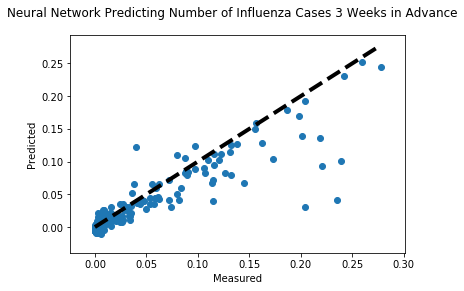

In [159]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_pred)
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
print("*this is validation data, epochs="+str(epoch_number))
print("RMSE: ")
print("Using RELU Activation Function")
print(rmse(np.array([y_val]),y_pred.reshape(1,-1)))
plt.suptitle("Neural Network Predicting Number of Influenza Cases 3 Weeks in Advance")
plt.show()

In [160]:
results = model.fit(x_train,y_train,epochs=epoch_number)
y_pred= model.predict(x_test)

Epoch 1/299
518/518 [==============================] - 0s 135us/step - loss: 7.6592e-04
Epoch 2/299
518/518 [==============================] - 0s 134us/step - loss: 8.1032e-04
Epoch 3/299
518/518 [==============================] - 0s 132us/step - loss: 7.3371e-04
Epoch 4/299
518/518 [==============================] - 0s 135us/step - loss: 7.4957e-04
Epoch 5/299
518/518 [==============================] - 0s 132us/step - loss: 7.9545e-04
Epoch 6/299
518/518 [==============================] - 0s 134us/step - loss: 7.7903e-04
Epoch 7/299
518/518 [==============================] - 0s 127us/step - loss: 7.2627e-04
Epoch 8/299
518/518 [==============================] - 0s 126us/step - loss: 7.3590e-04
Epoch 9/299
518/518 [==============================] - 0s 138us/step - loss: 7.3992e-04
Epoch 10/299
518/518 [==============================] - 0s 140us/step - loss: 7.1147e-04
Epoch 11/299
518/518 [==============================] - 0s 137us/step - loss: 7.5624e-04
Epoch 12/299
518/518 [========

518/518 [==============================] - 0s 141us/step - loss: 7.4758e-04
Epoch 94/299
518/518 [==============================] - 0s 142us/step - loss: 7.3914e-04
Epoch 95/299
518/518 [==============================] - 0s 151us/step - loss: 7.3568e-04
Epoch 96/299
518/518 [==============================] - 0s 138us/step - loss: 9.9514e-04
Epoch 97/299
518/518 [==============================] - 0s 141us/step - loss: 7.5459e-04
Epoch 98/299
518/518 [==============================] - 0s 140us/step - loss: 7.5673e-04
Epoch 99/299
518/518 [==============================] - 0s 142us/step - loss: 8.0434e-04
Epoch 100/299
518/518 [==============================] - 0s 137us/step - loss: 7.6153e-04
Epoch 101/299
518/518 [==============================] - 0s 139us/step - loss: 7.5225e-04
Epoch 102/299
518/518 [==============================] - 0s 137us/step - loss: 7.6090e-04
Epoch 103/299
518/518 [==============================] - 0s 138us/step - loss: 7.2366e-04
Epoch 104/299
518/518 [=======

518/518 [==============================] - 0s 137us/step - loss: 7.8138e-04
Epoch 185/299
518/518 [==============================] - 0s 134us/step - loss: 7.4120e-04
Epoch 186/299
518/518 [==============================] - 0s 133us/step - loss: 7.3990e-04
Epoch 187/299
518/518 [==============================] - 0s 129us/step - loss: 8.5941e-04
Epoch 188/299
518/518 [==============================] - 0s 128us/step - loss: 7.6814e-04
Epoch 189/299
518/518 [==============================] - 0s 134us/step - loss: 7.2529e-04
Epoch 190/299
518/518 [==============================] - 0s 133us/step - loss: 7.1172e-04
Epoch 191/299
518/518 [==============================] - 0s 130us/step - loss: 7.2943e-04
Epoch 192/299
518/518 [==============================] - 0s 136us/step - loss: 7.5484e-04
Epoch 193/299
518/518 [==============================] - 0s 486us/step - loss: 7.8605e-04
Epoch 194/299
518/518 [==============================] - 0s 134us/step - loss: 7.3606e-04
Epoch 195/299
518/518 [=

518/518 [==============================] - 0s 136us/step - loss: 7.7774e-04
Epoch 276/299
518/518 [==============================] - 0s 138us/step - loss: 8.0076e-04
Epoch 277/299
518/518 [==============================] - 0s 137us/step - loss: 7.1128e-04
Epoch 278/299
518/518 [==============================] - 0s 140us/step - loss: 7.4458e-04
Epoch 279/299
518/518 [==============================] - 0s 137us/step - loss: 7.4973e-04
Epoch 280/299
518/518 [==============================] - 0s 136us/step - loss: 7.6906e-04
Epoch 281/299
518/518 [==============================] - 0s 134us/step - loss: 7.5838e-04
Epoch 282/299
518/518 [==============================] - 0s 134us/step - loss: 7.7715e-04
Epoch 283/299
518/518 [==============================] - 0s 134us/step - loss: 7.4784e-04
Epoch 284/299
518/518 [==============================] - 0s 135us/step - loss: 7.3446e-04
Epoch 285/299
518/518 [==============================] - 0s 135us/step - loss: 7.5241e-04
Epoch 286/299
518/518 [=

*this is validation data, epochs=299
RMSE: 
Using RELU Activation Function
0.11574391722164828


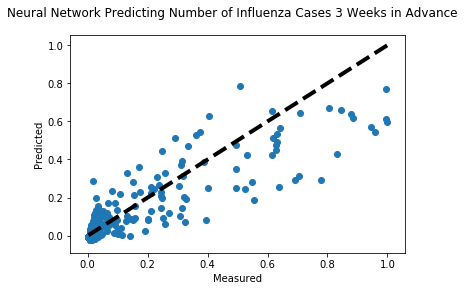

In [161]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
print("*this is validation data, epochs="+str(epoch_number))
print("RMSE: ")
print("Using RELU Activation Function")
print(rmse(np.array([y_test]),y_pred.reshape(1,-1)))
plt.suptitle("Neural Network Predicting Number of Influenza Cases 3 Weeks in Advance")
plt.show()

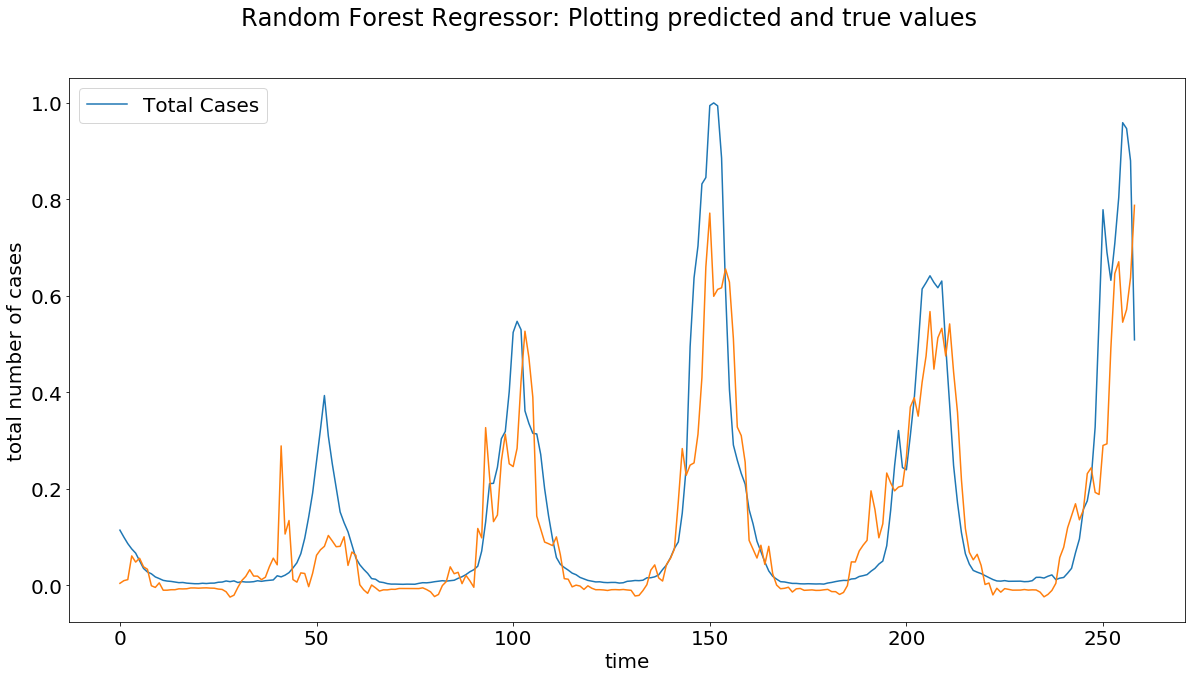

In [162]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(y_test)),y_test)
plt.plot(np.arange(len(y_test)),y_pred)
plt.legend()
plt.suptitle('Random Forest Regressor: Plotting predicted and true values')
plt.xlabel('time')
plt.ylabel('total number of cases')
plt.show()

# 1000 Epochs

In [163]:
results = model.fit(x_train,y_train,epochs=1000)
y_pred= model.predict(x_test)

Epoch 1/1000
518/518 [==============================] - 0s 492us/step - loss: 8.1957e-04
Epoch 2/1000
518/518 [==============================] - 0s 131us/step - loss: 7.7891e-04
Epoch 3/1000
518/518 [==============================] - 0s 137us/step - loss: 8.9103e-04
Epoch 4/1000
518/518 [==============================] - 0s 126us/step - loss: 7.2760e-04
Epoch 5/1000
518/518 [==============================] - 0s 138us/step - loss: 7.0920e-04
Epoch 6/1000
518/518 [==============================] - 0s 131us/step - loss: 7.2889e-04
Epoch 7/1000
518/518 [==============================] - 0s 136us/step - loss: 7.1297e-04
Epoch 8/1000
518/518 [==============================] - 0s 139us/step - loss: 7.8183e-04
Epoch 9/1000
518/518 [==============================] - 0s 129us/step - loss: 7.8944e-04
Epoch 10/1000
518/518 [==============================] - 0s 136us/step - loss: 8.2773e-04
Epoch 11/1000
518/518 [==============================] - 0s 139us/step - loss: 8.3334e-04
Epoch 12/1000
518/5

518/518 [==============================] - 0s 136us/step - loss: 7.1230e-04
Epoch 93/1000
518/518 [==============================] - 0s 135us/step - loss: 7.5335e-04
Epoch 94/1000
518/518 [==============================] - 0s 129us/step - loss: 7.9332e-04
Epoch 95/1000
518/518 [==============================] - 0s 128us/step - loss: 7.3067e-04
Epoch 96/1000
518/518 [==============================] - 0s 127us/step - loss: 7.4392e-04
Epoch 97/1000
518/518 [==============================] - 0s 128us/step - loss: 7.5810e-04
Epoch 98/1000
518/518 [==============================] - 0s 126us/step - loss: 7.2750e-04
Epoch 99/1000
518/518 [==============================] - 0s 130us/step - loss: 7.1835e-04
Epoch 100/1000
518/518 [==============================] - 0s 131us/step - loss: 7.2505e-04
Epoch 101/1000
518/518 [==============================] - 0s 127us/step - loss: 7.3905e-04
Epoch 102/1000
518/518 [==============================] - 0s 130us/step - loss: 7.3934e-04
Epoch 103/1000
518/51

518/518 [==============================] - 0s 137us/step - loss: 7.3603e-04
Epoch 183/1000
518/518 [==============================] - 0s 138us/step - loss: 7.5676e-04
Epoch 184/1000
518/518 [==============================] - 0s 141us/step - loss: 7.5416e-04
Epoch 185/1000
518/518 [==============================] - 0s 139us/step - loss: 7.6126e-04
Epoch 186/1000
518/518 [==============================] - 0s 479us/step - loss: 7.2191e-04
Epoch 187/1000
518/518 [==============================] - 0s 128us/step - loss: 7.0584e-04
Epoch 188/1000
518/518 [==============================] - 0s 131us/step - loss: 8.3327e-04
Epoch 189/1000
518/518 [==============================] - 0s 133us/step - loss: 7.5642e-04
Epoch 190/1000
518/518 [==============================] - 0s 137us/step - loss: 7.2056e-04
Epoch 191/1000
518/518 [==============================] - 0s 138us/step - loss: 7.1592e-04
Epoch 192/1000
518/518 [==============================] - 0s 142us/step - loss: 8.3149e-04
Epoch 193/1000

518/518 [==============================] - 0s 127us/step - loss: 7.6683e-04
Epoch 273/1000
518/518 [==============================] - 0s 130us/step - loss: 7.5665e-04
Epoch 274/1000
518/518 [==============================] - 0s 129us/step - loss: 7.7050e-04
Epoch 275/1000
518/518 [==============================] - 0s 124us/step - loss: 7.4521e-04
Epoch 276/1000
518/518 [==============================] - 0s 128us/step - loss: 7.7305e-04
Epoch 277/1000
518/518 [==============================] - 0s 128us/step - loss: 8.1550e-04
Epoch 278/1000
518/518 [==============================] - 0s 130us/step - loss: 7.2235e-04
Epoch 279/1000
518/518 [==============================] - 0s 129us/step - loss: 7.1334e-04
Epoch 280/1000
518/518 [==============================] - 0s 128us/step - loss: 7.3445e-04
Epoch 281/1000
518/518 [==============================] - 0s 127us/step - loss: 7.9956e-04
Epoch 282/1000
518/518 [==============================] - 0s 127us/step - loss: 7.3203e-04
Epoch 283/1000

518/518 [==============================] - 0s 125us/step - loss: 7.1675e-04
Epoch 363/1000
518/518 [==============================] - 0s 133us/step - loss: 8.5693e-04
Epoch 364/1000
518/518 [==============================] - 0s 128us/step - loss: 7.2003e-04
Epoch 365/1000
518/518 [==============================] - 0s 130us/step - loss: 7.1473e-04
Epoch 366/1000
518/518 [==============================] - 0s 128us/step - loss: 7.6760e-04
Epoch 367/1000
518/518 [==============================] - 0s 129us/step - loss: 7.0934e-04
Epoch 368/1000
518/518 [==============================] - 0s 128us/step - loss: 7.9053e-04
Epoch 369/1000
518/518 [==============================] - 0s 130us/step - loss: 7.2382e-04
Epoch 370/1000
518/518 [==============================] - 0s 131us/step - loss: 7.2855e-04
Epoch 371/1000
518/518 [==============================] - 0s 130us/step - loss: 7.2354e-04
Epoch 372/1000
518/518 [==============================] - 0s 135us/step - loss: 7.4180e-04
Epoch 373/1000

518/518 [==============================] - 0s 130us/step - loss: 8.1170e-04
Epoch 453/1000
518/518 [==============================] - 0s 136us/step - loss: 7.2568e-04
Epoch 454/1000
518/518 [==============================] - 0s 129us/step - loss: 7.2440e-04
Epoch 455/1000
518/518 [==============================] - 0s 127us/step - loss: 7.7492e-04
Epoch 456/1000
518/518 [==============================] - 0s 476us/step - loss: 7.2285e-04
Epoch 457/1000
518/518 [==============================] - 0s 125us/step - loss: 7.5295e-04
Epoch 458/1000
518/518 [==============================] - 0s 128us/step - loss: 7.0369e-04
Epoch 459/1000
518/518 [==============================] - 0s 126us/step - loss: 6.9659e-04
Epoch 460/1000
518/518 [==============================] - 0s 128us/step - loss: 7.4802e-04
Epoch 461/1000
518/518 [==============================] - 0s 133us/step - loss: 7.3231e-04
Epoch 462/1000
518/518 [==============================] - 0s 127us/step - loss: 8.0702e-04
Epoch 463/1000

518/518 [==============================] - 0s 127us/step - loss: 7.6779e-04
Epoch 543/1000
518/518 [==============================] - 0s 133us/step - loss: 7.7363e-04
Epoch 544/1000
518/518 [==============================] - 0s 127us/step - loss: 7.1381e-04
Epoch 545/1000
518/518 [==============================] - 0s 125us/step - loss: 7.4632e-04
Epoch 546/1000
518/518 [==============================] - 0s 128us/step - loss: 7.0407e-04
Epoch 547/1000
518/518 [==============================] - 0s 126us/step - loss: 8.0516e-04
Epoch 548/1000
518/518 [==============================] - 0s 127us/step - loss: 7.8075e-04
Epoch 549/1000
518/518 [==============================] - 0s 124us/step - loss: 7.1435e-04
Epoch 550/1000
518/518 [==============================] - 0s 125us/step - loss: 7.0365e-04
Epoch 551/1000
518/518 [==============================] - 0s 126us/step - loss: 7.2504e-04
Epoch 552/1000
518/518 [==============================] - 0s 126us/step - loss: 7.3835e-04
Epoch 553/1000

518/518 [==============================] - 0s 126us/step - loss: 7.7565e-04
Epoch 633/1000
518/518 [==============================] - 0s 135us/step - loss: 7.6726e-04
Epoch 634/1000
518/518 [==============================] - 0s 126us/step - loss: 7.8274e-04
Epoch 635/1000
518/518 [==============================] - 0s 128us/step - loss: 7.1883e-04
Epoch 636/1000
518/518 [==============================] - 0s 132us/step - loss: 7.5470e-04
Epoch 637/1000
518/518 [==============================] - 0s 129us/step - loss: 7.1589e-04
Epoch 638/1000
518/518 [==============================] - 0s 131us/step - loss: 7.9659e-04
Epoch 639/1000
518/518 [==============================] - 0s 130us/step - loss: 7.1641e-04
Epoch 640/1000
518/518 [==============================] - 0s 131us/step - loss: 7.3540e-04
Epoch 641/1000
518/518 [==============================] - 0s 127us/step - loss: 7.6787e-04
Epoch 642/1000
518/518 [==============================] - 0s 123us/step - loss: 7.5436e-04
Epoch 643/1000

518/518 [==============================] - 0s 130us/step - loss: 8.1767e-04
Epoch 723/1000
518/518 [==============================] - 0s 129us/step - loss: 7.6067e-04
Epoch 724/1000
518/518 [==============================] - 0s 132us/step - loss: 7.3682e-04
Epoch 725/1000
518/518 [==============================] - 0s 127us/step - loss: 7.5785e-04
Epoch 726/1000
518/518 [==============================] - 0s 126us/step - loss: 7.4665e-04
Epoch 727/1000
518/518 [==============================] - 0s 127us/step - loss: 8.0843e-04
Epoch 728/1000
518/518 [==============================] - 0s 485us/step - loss: 8.1223e-04
Epoch 729/1000
518/518 [==============================] - 0s 126us/step - loss: 7.3255e-04
Epoch 730/1000
518/518 [==============================] - 0s 129us/step - loss: 7.2134e-04
Epoch 731/1000
518/518 [==============================] - 0s 129us/step - loss: 7.7776e-04
Epoch 732/1000
518/518 [==============================] - 0s 128us/step - loss: 7.2169e-04
Epoch 733/1000

518/518 [==============================] - 0s 129us/step - loss: 7.6967e-04
Epoch 813/1000
518/518 [==============================] - 0s 133us/step - loss: 7.4804e-04
Epoch 814/1000
518/518 [==============================] - 0s 132us/step - loss: 7.3029e-04
Epoch 815/1000
518/518 [==============================] - 0s 132us/step - loss: 7.4155e-04
Epoch 816/1000
518/518 [==============================] - 0s 129us/step - loss: 7.4284e-04
Epoch 817/1000
518/518 [==============================] - 0s 132us/step - loss: 7.3835e-04
Epoch 818/1000
518/518 [==============================] - 0s 128us/step - loss: 7.4400e-04
Epoch 819/1000
518/518 [==============================] - 0s 130us/step - loss: 7.9079e-04
Epoch 820/1000
518/518 [==============================] - 0s 128us/step - loss: 7.0116e-04
Epoch 821/1000
518/518 [==============================] - 0s 124us/step - loss: 7.2685e-04
Epoch 822/1000
518/518 [==============================] - 0s 132us/step - loss: 7.6101e-04
Epoch 823/1000

518/518 [==============================] - 0s 129us/step - loss: 7.6526e-04
Epoch 903/1000
518/518 [==============================] - 0s 130us/step - loss: 7.2671e-04
Epoch 904/1000
518/518 [==============================] - 0s 132us/step - loss: 7.3204e-04
Epoch 905/1000
518/518 [==============================] - 0s 127us/step - loss: 7.2852e-04
Epoch 906/1000
518/518 [==============================] - 0s 129us/step - loss: 7.4115e-04
Epoch 907/1000
518/518 [==============================] - 0s 130us/step - loss: 7.1799e-04
Epoch 908/1000
518/518 [==============================] - 0s 129us/step - loss: 7.2002e-04
Epoch 909/1000
518/518 [==============================] - 0s 126us/step - loss: 7.0601e-04
Epoch 910/1000
518/518 [==============================] - 0s 130us/step - loss: 7.4469e-04
Epoch 911/1000
518/518 [==============================] - 0s 127us/step - loss: 7.2674e-04
Epoch 912/1000
518/518 [==============================] - 0s 127us/step - loss: 7.5571e-04
Epoch 913/1000

518/518 [==============================] - 0s 137us/step - loss: 7.0398e-04
Epoch 993/1000
518/518 [==============================] - 0s 138us/step - loss: 6.9922e-04
Epoch 994/1000
518/518 [==============================] - 0s 127us/step - loss: 7.2557e-04
Epoch 995/1000
518/518 [==============================] - 0s 132us/step - loss: 7.5863e-04
Epoch 996/1000
518/518 [==============================] - 0s 132us/step - loss: 8.3473e-04
Epoch 997/1000
518/518 [==============================] - 0s 134us/step - loss: 8.0042e-04
Epoch 998/1000
518/518 [==============================] - 0s 130us/step - loss: 7.3908e-04
Epoch 999/1000
518/518 [==============================] - 0s 127us/step - loss: 7.1115e-04
Epoch 1000/1000
518/518 [==============================] - 0s 483us/step - loss: 7.1381e-04


*this is validation data, epochs=299
RMSE: 
Using RELU Activation Function
0.11013360522471438


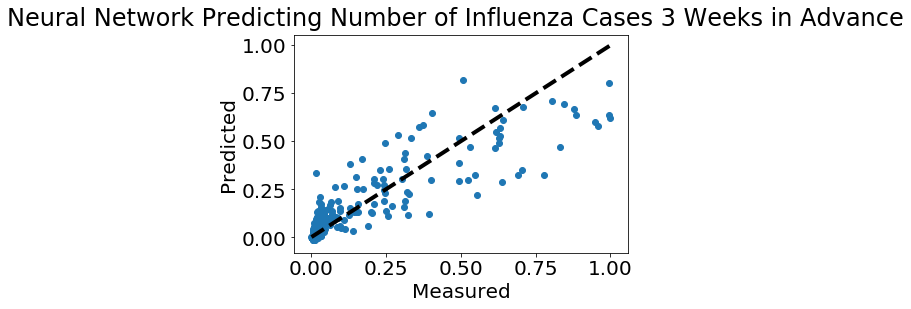

In [164]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
print("*this is validation data, epochs="+str(epoch_number))
print("RMSE: ")
print("Using RELU Activation Function")
print(rmse(np.array([y_test]),y_pred.reshape(1,-1)))
plt.suptitle("Neural Network Predicting Number of Influenza Cases 3 Weeks in Advance")
plt.show()

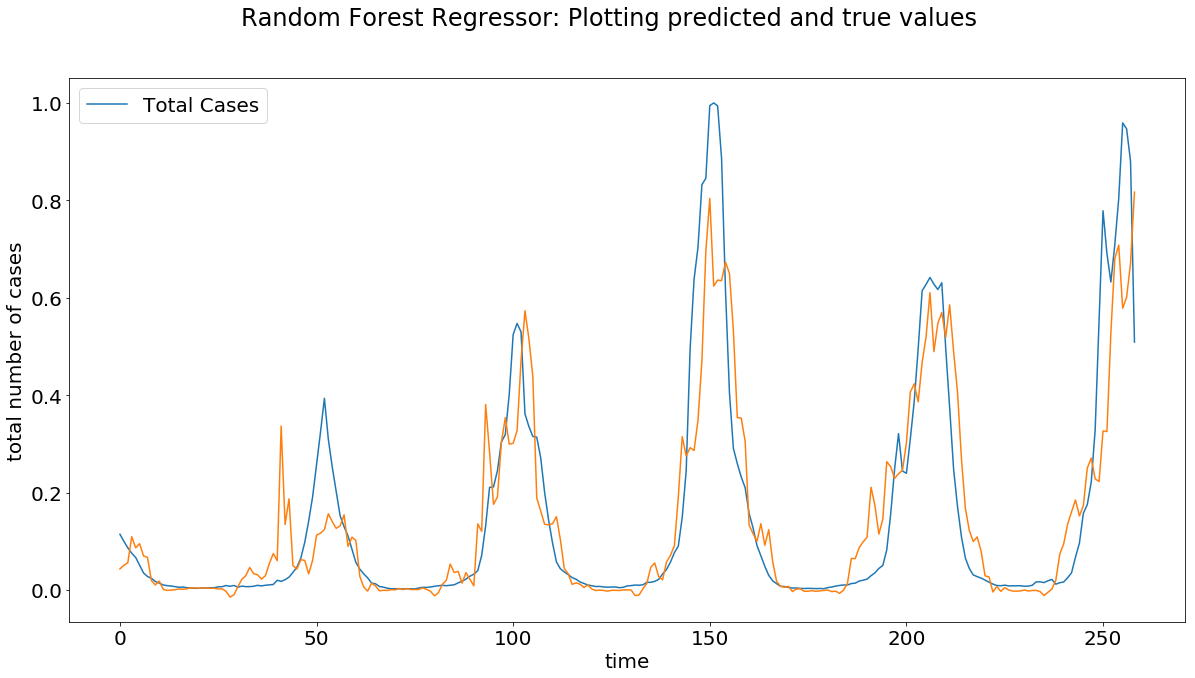

In [165]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(y_test)),y_test)
plt.plot(np.arange(len(y_test)),y_pred)
plt.legend()
plt.suptitle('Random Forest Regressor: Plotting predicted and true values')
plt.xlabel('time')
plt.ylabel('total number of cases')
plt.show()

In [166]:
results = model.fit(x_train,y_train,epochs=2000)
y_pred= model.predict(x_test)

Epoch 1/2000
518/518 [==============================] - 0s 486us/step - loss: 7.6131e-04
Epoch 2/2000
518/518 [==============================] - 0s 128us/step - loss: 7.1855e-04
Epoch 3/2000
518/518 [==============================] - 0s 133us/step - loss: 7.2870e-04
Epoch 4/2000
518/518 [==============================] - 0s 129us/step - loss: 7.5141e-04
Epoch 5/2000
518/518 [==============================] - 0s 141us/step - loss: 7.3820e-04
Epoch 6/2000
518/518 [==============================] - 0s 143us/step - loss: 7.3430e-04
Epoch 7/2000
518/518 [==============================] - 0s 140us/step - loss: 7.6022e-04
Epoch 8/2000
518/518 [==============================] - 0s 132us/step - loss: 7.7218e-04
Epoch 9/2000
518/518 [==============================] - 0s 138us/step - loss: 7.5393e-04
Epoch 10/2000
518/518 [==============================] - 0s 143us/step - loss: 7.3556e-04
Epoch 11/2000
518/518 [==============================] - 0s 144us/step - loss: 7.4309e-04
Epoch 12/2000
518/5

518/518 [==============================] - 0s 135us/step - loss: 7.3864e-04
Epoch 93/2000
518/518 [==============================] - 0s 137us/step - loss: 7.1329e-04
Epoch 94/2000
518/518 [==============================] - 0s 135us/step - loss: 7.2684e-04
Epoch 95/2000
518/518 [==============================] - 0s 125us/step - loss: 7.1031e-04
Epoch 96/2000
518/518 [==============================] - 0s 131us/step - loss: 7.7851e-04
Epoch 97/2000
518/518 [==============================] - 0s 150us/step - loss: 7.1760e-04
Epoch 98/2000
518/518 [==============================] - 0s 143us/step - loss: 7.6925e-04
Epoch 99/2000
518/518 [==============================] - 0s 147us/step - loss: 7.3305e-04
Epoch 100/2000
518/518 [==============================] - 0s 131us/step - loss: 7.1341e-04
Epoch 101/2000
518/518 [==============================] - 0s 142us/step - loss: 6.9580e-04
Epoch 102/2000
518/518 [==============================] - 0s 119us/step - loss: 7.5423e-04
Epoch 103/2000
518/51

518/518 [==============================] - 0s 132us/step - loss: 7.3497e-04
Epoch 183/2000
518/518 [==============================] - 0s 129us/step - loss: 7.2700e-04
Epoch 184/2000
518/518 [==============================] - 0s 130us/step - loss: 8.3165e-04
Epoch 185/2000
518/518 [==============================] - 0s 129us/step - loss: 7.2592e-04
Epoch 186/2000
518/518 [==============================] - 0s 126us/step - loss: 0.0010
Epoch 187/2000
518/518 [==============================] - 0s 127us/step - loss: 7.0239e-04
Epoch 188/2000
518/518 [==============================] - 0s 128us/step - loss: 7.6836e-04
Epoch 189/2000
518/518 [==============================] - 0s 131us/step - loss: 7.5896e-04
Epoch 190/2000
518/518 [==============================] - 0s 133us/step - loss: 7.4049e-04
Epoch 191/2000
518/518 [==============================] - 0s 131us/step - loss: 7.6927e-04
Epoch 192/2000
518/518 [==============================] - 0s 132us/step - loss: 7.5127e-04
Epoch 193/2000
518

518/518 [==============================] - 0s 126us/step - loss: 6.9758e-04
Epoch 273/2000
518/518 [==============================] - 0s 128us/step - loss: 7.2393e-04
Epoch 274/2000
518/518 [==============================] - 0s 133us/step - loss: 7.0107e-04
Epoch 275/2000
518/518 [==============================] - 0s 131us/step - loss: 7.0921e-04
Epoch 276/2000
518/518 [==============================] - 0s 132us/step - loss: 7.1804e-04
Epoch 277/2000
518/518 [==============================] - 0s 126us/step - loss: 7.2978e-04
Epoch 278/2000
518/518 [==============================] - 0s 128us/step - loss: 7.1590e-04
Epoch 279/2000
518/518 [==============================] - 0s 131us/step - loss: 7.1505e-04
Epoch 280/2000
518/518 [==============================] - 0s 136us/step - loss: 8.1565e-04
Epoch 281/2000
518/518 [==============================] - 0s 130us/step - loss: 7.1022e-04
Epoch 282/2000
518/518 [==============================] - 0s 132us/step - loss: 8.4357e-04
Epoch 283/2000

518/518 [==============================] - 0s 130us/step - loss: 7.2731e-04
Epoch 363/2000
518/518 [==============================] - 0s 128us/step - loss: 7.0800e-04
Epoch 364/2000
518/518 [==============================] - 0s 137us/step - loss: 6.8113e-04
Epoch 365/2000
518/518 [==============================] - 0s 133us/step - loss: 7.2907e-04
Epoch 366/2000
518/518 [==============================] - 0s 131us/step - loss: 7.5412e-04
Epoch 367/2000
518/518 [==============================] - 0s 131us/step - loss: 7.1500e-04
Epoch 368/2000
518/518 [==============================] - 0s 133us/step - loss: 7.1165e-04
Epoch 369/2000
518/518 [==============================] - 0s 488us/step - loss: 7.5673e-04
Epoch 370/2000
518/518 [==============================] - 0s 125us/step - loss: 7.5806e-04
Epoch 371/2000
518/518 [==============================] - 0s 125us/step - loss: 7.3840e-04
Epoch 372/2000
518/518 [==============================] - 0s 131us/step - loss: 7.2314e-04
Epoch 373/2000

518/518 [==============================] - 0s 129us/step - loss: 7.5457e-04
Epoch 453/2000
518/518 [==============================] - 0s 130us/step - loss: 7.1847e-04
Epoch 454/2000
518/518 [==============================] - 0s 127us/step - loss: 7.0196e-04
Epoch 455/2000
518/518 [==============================] - 0s 127us/step - loss: 9.2541e-04
Epoch 456/2000
518/518 [==============================] - 0s 131us/step - loss: 7.0964e-04
Epoch 457/2000
518/518 [==============================] - 0s 134us/step - loss: 7.1884e-04
Epoch 458/2000
518/518 [==============================] - 0s 129us/step - loss: 8.1451e-04
Epoch 459/2000
518/518 [==============================] - 0s 132us/step - loss: 7.4691e-04
Epoch 460/2000
518/518 [==============================] - 0s 132us/step - loss: 7.1897e-04
Epoch 461/2000
518/518 [==============================] - 0s 133us/step - loss: 7.3708e-04
Epoch 462/2000
518/518 [==============================] - 0s 131us/step - loss: 7.2973e-04
Epoch 463/2000

518/518 [==============================] - 0s 129us/step - loss: 7.4092e-04
Epoch 543/2000
518/518 [==============================] - 0s 129us/step - loss: 7.5425e-04
Epoch 544/2000
518/518 [==============================] - 0s 126us/step - loss: 7.0869e-04
Epoch 545/2000
518/518 [==============================] - 0s 132us/step - loss: 7.0520e-04
Epoch 546/2000
518/518 [==============================] - 0s 132us/step - loss: 7.0003e-04
Epoch 547/2000
518/518 [==============================] - 0s 130us/step - loss: 7.5015e-04
Epoch 548/2000
518/518 [==============================] - 0s 135us/step - loss: 7.9636e-04
Epoch 549/2000
518/518 [==============================] - 0s 131us/step - loss: 7.2581e-04
Epoch 550/2000
518/518 [==============================] - 0s 131us/step - loss: 7.7644e-04
Epoch 551/2000
518/518 [==============================] - 0s 134us/step - loss: 7.0199e-04
Epoch 552/2000
518/518 [==============================] - 0s 131us/step - loss: 7.3220e-04
Epoch 553/2000

518/518 [==============================] - 0s 129us/step - loss: 7.7084e-04
Epoch 633/2000
518/518 [==============================] - 0s 131us/step - loss: 7.2042e-04
Epoch 634/2000
518/518 [==============================] - 0s 132us/step - loss: 7.3864e-04
Epoch 635/2000
518/518 [==============================] - 0s 134us/step - loss: 7.5318e-04
Epoch 636/2000
518/518 [==============================] - 0s 136us/step - loss: 7.2785e-04
Epoch 637/2000
518/518 [==============================] - 0s 133us/step - loss: 7.2260e-04
Epoch 638/2000
518/518 [==============================] - 0s 485us/step - loss: 9.1493e-04
Epoch 639/2000
518/518 [==============================] - 0s 129us/step - loss: 7.3594e-04
Epoch 640/2000
518/518 [==============================] - 0s 131us/step - loss: 7.1510e-04
Epoch 641/2000
518/518 [==============================] - 0s 132us/step - loss: 7.0253e-04
Epoch 642/2000
518/518 [==============================] - 0s 128us/step - loss: 7.6046e-04
Epoch 643/2000

518/518 [==============================] - 0s 131us/step - loss: 7.1946e-04
Epoch 723/2000
518/518 [==============================] - 0s 134us/step - loss: 7.2354e-04
Epoch 724/2000
518/518 [==============================] - 0s 136us/step - loss: 7.0049e-04
Epoch 725/2000
518/518 [==============================] - 0s 132us/step - loss: 7.1514e-04
Epoch 726/2000
518/518 [==============================] - 0s 136us/step - loss: 7.8954e-04
Epoch 727/2000
518/518 [==============================] - 0s 128us/step - loss: 7.2819e-04
Epoch 728/2000
518/518 [==============================] - 0s 136us/step - loss: 7.7839e-04
Epoch 729/2000
518/518 [==============================] - 0s 131us/step - loss: 7.5771e-04
Epoch 730/2000
518/518 [==============================] - 0s 127us/step - loss: 7.2247e-04
Epoch 731/2000
518/518 [==============================] - 0s 133us/step - loss: 7.1353e-04
Epoch 732/2000
518/518 [==============================] - 0s 132us/step - loss: 7.1422e-04
Epoch 733/2000

518/518 [==============================] - 0s 129us/step - loss: 9.8919e-04
Epoch 813/2000
518/518 [==============================] - 0s 127us/step - loss: 7.3443e-04
Epoch 814/2000
518/518 [==============================] - 0s 132us/step - loss: 6.9939e-04
Epoch 815/2000
518/518 [==============================] - 0s 130us/step - loss: 7.6193e-04
Epoch 816/2000
518/518 [==============================] - 0s 129us/step - loss: 8.1670e-04
Epoch 817/2000
518/518 [==============================] - 0s 133us/step - loss: 8.3573e-04
Epoch 818/2000
518/518 [==============================] - 0s 131us/step - loss: 7.5591e-04
Epoch 819/2000
518/518 [==============================] - 0s 130us/step - loss: 6.8793e-04
Epoch 820/2000
518/518 [==============================] - 0s 132us/step - loss: 7.5656e-04
Epoch 821/2000
518/518 [==============================] - 0s 133us/step - loss: 7.0912e-04
Epoch 822/2000
518/518 [==============================] - 0s 132us/step - loss: 8.1609e-04
Epoch 823/2000

518/518 [==============================] - 0s 140us/step - loss: 8.5992e-04
Epoch 903/2000
518/518 [==============================] - 0s 490us/step - loss: 7.1227e-04
Epoch 904/2000
518/518 [==============================] - 0s 150us/step - loss: 7.2925e-04
Epoch 905/2000
518/518 [==============================] - 0s 149us/step - loss: 6.8977e-04
Epoch 906/2000
518/518 [==============================] - 0s 147us/step - loss: 7.2029e-04
Epoch 907/2000
518/518 [==============================] - 0s 149us/step - loss: 8.0244e-04
Epoch 908/2000
518/518 [==============================] - 0s 140us/step - loss: 7.2802e-04
Epoch 909/2000
518/518 [==============================] - 0s 146us/step - loss: 7.4722e-04
Epoch 910/2000
518/518 [==============================] - 0s 141us/step - loss: 8.6808e-04
Epoch 911/2000
518/518 [==============================] - 0s 141us/step - loss: 7.9284e-04
Epoch 912/2000
518/518 [==============================] - 0s 149us/step - loss: 7.5631e-04
Epoch 913/2000

518/518 [==============================] - 0s 146us/step - loss: 7.6669e-04
Epoch 993/2000
518/518 [==============================] - 0s 143us/step - loss: 7.6700e-04
Epoch 994/2000
518/518 [==============================] - 0s 137us/step - loss: 6.9104e-04
Epoch 995/2000
518/518 [==============================] - 0s 147us/step - loss: 7.1305e-04
Epoch 996/2000
518/518 [==============================] - 0s 142us/step - loss: 6.8719e-04
Epoch 997/2000
518/518 [==============================] - 0s 144us/step - loss: 9.6311e-04
Epoch 998/2000
518/518 [==============================] - 0s 147us/step - loss: 6.9372e-04
Epoch 999/2000
518/518 [==============================] - 0s 147us/step - loss: 7.5982e-04
Epoch 1000/2000
518/518 [==============================] - 0s 138us/step - loss: 7.0954e-04
Epoch 1001/2000
518/518 [==============================] - 0s 133us/step - loss: 7.0520e-04
Epoch 1002/2000
518/518 [==============================] - 0s 131us/step - loss: 7.2897e-04
Epoch 1003/

518/518 [==============================] - 0s 491us/step - loss: 7.4750e-04
Epoch 1082/2000
518/518 [==============================] - 0s 128us/step - loss: 7.1920e-04
Epoch 1083/2000
518/518 [==============================] - 0s 131us/step - loss: 6.9860e-04
Epoch 1084/2000
518/518 [==============================] - 0s 128us/step - loss: 7.1376e-04
Epoch 1085/2000
518/518 [==============================] - 0s 133us/step - loss: 8.0925e-04
Epoch 1086/2000
518/518 [==============================] - 0s 131us/step - loss: 6.9250e-04
Epoch 1087/2000
518/518 [==============================] - 0s 134us/step - loss: 7.4025e-04
Epoch 1088/2000
518/518 [==============================] - 0s 134us/step - loss: 7.4603e-04
Epoch 1089/2000
518/518 [==============================] - 0s 137us/step - loss: 7.2207e-04
Epoch 1090/2000
518/518 [==============================] - 0s 135us/step - loss: 7.1932e-04
Epoch 1091/2000
518/518 [==============================] - 0s 135us/step - loss: 7.1711e-04
Epoc

518/518 [==============================] - 0s 143us/step - loss: 7.1778e-04
Epoch 1171/2000
518/518 [==============================] - 0s 147us/step - loss: 7.4399e-04
Epoch 1172/2000
518/518 [==============================] - 0s 138us/step - loss: 7.1796e-04
Epoch 1173/2000
518/518 [==============================] - 0s 137us/step - loss: 6.8656e-04
Epoch 1174/2000
518/518 [==============================] - 0s 138us/step - loss: 7.8323e-04
Epoch 1175/2000
518/518 [==============================] - 0s 131us/step - loss: 6.9536e-04
Epoch 1176/2000
518/518 [==============================] - 0s 133us/step - loss: 7.5955e-04
Epoch 1177/2000
518/518 [==============================] - 0s 136us/step - loss: 7.5903e-04
Epoch 1178/2000
518/518 [==============================] - 0s 136us/step - loss: 7.1183e-04
Epoch 1179/2000
518/518 [==============================] - 0s 141us/step - loss: 6.9607e-04
Epoch 1180/2000
518/518 [==============================] - 0s 148us/step - loss: 6.9979e-04
Epoc

518/518 [==============================] - 0s 485us/step - loss: 7.3730e-04
Epoch 1260/2000
518/518 [==============================] - 0s 139us/step - loss: 6.9711e-04
Epoch 1261/2000
518/518 [==============================] - 0s 147us/step - loss: 7.3323e-04
Epoch 1262/2000
518/518 [==============================] - 0s 146us/step - loss: 7.4197e-04
Epoch 1263/2000
518/518 [==============================] - 0s 132us/step - loss: 7.4112e-04
Epoch 1264/2000
518/518 [==============================] - 0s 129us/step - loss: 9.5924e-04
Epoch 1265/2000
518/518 [==============================] - 0s 129us/step - loss: 7.3572e-04
Epoch 1266/2000
518/518 [==============================] - 0s 131us/step - loss: 7.0762e-04
Epoch 1267/2000
518/518 [==============================] - 0s 137us/step - loss: 7.4590e-04
Epoch 1268/2000
518/518 [==============================] - 0s 143us/step - loss: 8.1768e-04
Epoch 1269/2000
518/518 [==============================] - 0s 147us/step - loss: 6.9436e-04
Epoc

518/518 [==============================] - 0s 129us/step - loss: 7.3950e-04
Epoch 1349/2000
518/518 [==============================] - 0s 124us/step - loss: 6.9589e-04
Epoch 1350/2000
518/518 [==============================] - 0s 138us/step - loss: 8.4750e-04
Epoch 1351/2000
518/518 [==============================] - 0s 130us/step - loss: 7.8775e-04
Epoch 1352/2000
518/518 [==============================] - 0s 132us/step - loss: 7.8886e-04
Epoch 1353/2000
518/518 [==============================] - 0s 130us/step - loss: 7.1390e-04
Epoch 1354/2000
518/518 [==============================] - 0s 127us/step - loss: 6.8641e-04
Epoch 1355/2000
518/518 [==============================] - 0s 130us/step - loss: 7.1187e-04
Epoch 1356/2000
518/518 [==============================] - 0s 127us/step - loss: 6.8035e-04
Epoch 1357/2000
518/518 [==============================] - 0s 128us/step - loss: 7.2853e-04
Epoch 1358/2000
518/518 [==============================] - 0s 128us/step - loss: 7.0112e-04
Epoc

518/518 [==============================] - 0s 140us/step - loss: 7.1493e-04
Epoch 1438/2000
518/518 [==============================] - 0s 133us/step - loss: 7.2757e-04
Epoch 1439/2000
518/518 [==============================] - 0s 135us/step - loss: 7.4105e-04
Epoch 1440/2000
518/518 [==============================] - 0s 137us/step - loss: 7.0648e-04
Epoch 1441/2000
518/518 [==============================] - 0s 133us/step - loss: 7.1760e-04
Epoch 1442/2000
518/518 [==============================] - 0s 138us/step - loss: 8.5731e-04
Epoch 1443/2000
518/518 [==============================] - 0s 496us/step - loss: 6.9180e-04
Epoch 1444/2000
518/518 [==============================] - 0s 138us/step - loss: 7.1963e-04
Epoch 1445/2000
518/518 [==============================] - 0s 130us/step - loss: 7.0289e-04
Epoch 1446/2000
518/518 [==============================] - 0s 131us/step - loss: 7.2808e-04
Epoch 1447/2000
518/518 [==============================] - 0s 130us/step - loss: 9.3848e-04
Epoc

518/518 [==============================] - 0s 138us/step - loss: 7.3895e-04
Epoch 1527/2000
518/518 [==============================] - 0s 137us/step - loss: 7.2669e-04
Epoch 1528/2000
518/518 [==============================] - 0s 133us/step - loss: 6.8631e-04
Epoch 1529/2000
518/518 [==============================] - 0s 131us/step - loss: 7.2894e-04
Epoch 1530/2000
518/518 [==============================] - 0s 136us/step - loss: 7.1881e-04
Epoch 1531/2000
518/518 [==============================] - 0s 136us/step - loss: 6.8921e-04
Epoch 1532/2000
518/518 [==============================] - 0s 128us/step - loss: 7.2602e-04
Epoch 1533/2000
518/518 [==============================] - 0s 128us/step - loss: 7.3785e-04
Epoch 1534/2000
518/518 [==============================] - 0s 137us/step - loss: 7.1576e-04
Epoch 1535/2000
518/518 [==============================] - 0s 135us/step - loss: 7.2670e-04
Epoch 1536/2000
518/518 [==============================] - 0s 132us/step - loss: 6.9896e-04
Epoc

518/518 [==============================] - 0s 141us/step - loss: 7.1506e-04
Epoch 1616/2000
518/518 [==============================] - 0s 144us/step - loss: 7.1668e-04
Epoch 1617/2000
518/518 [==============================] - 0s 138us/step - loss: 7.4177e-04
Epoch 1618/2000
518/518 [==============================] - 0s 139us/step - loss: 7.2652e-04
Epoch 1619/2000
518/518 [==============================] - 0s 490us/step - loss: 7.4506e-04
Epoch 1620/2000
518/518 [==============================] - 0s 149us/step - loss: 8.9140e-04
Epoch 1621/2000
518/518 [==============================] - 0s 147us/step - loss: 7.0260e-04
Epoch 1622/2000
518/518 [==============================] - 0s 143us/step - loss: 7.1684e-04
Epoch 1623/2000
518/518 [==============================] - 0s 139us/step - loss: 7.3317e-04
Epoch 1624/2000
518/518 [==============================] - 0s 143us/step - loss: 7.1925e-04
Epoch 1625/2000
518/518 [==============================] - 0s 141us/step - loss: 6.9731e-04
Epoc

518/518 [==============================] - 0s 139us/step - loss: 7.6143e-04
Epoch 1705/2000
518/518 [==============================] - 0s 133us/step - loss: 7.3017e-04
Epoch 1706/2000
518/518 [==============================] - 0s 136us/step - loss: 7.6524e-04
Epoch 1707/2000
518/518 [==============================] - 0s 131us/step - loss: 7.0589e-04
Epoch 1708/2000
518/518 [==============================] - 0s 140us/step - loss: 7.0383e-04
Epoch 1709/2000
518/518 [==============================] - 0s 139us/step - loss: 7.9583e-04
Epoch 1710/2000
518/518 [==============================] - 0s 134us/step - loss: 7.9862e-04
Epoch 1711/2000
518/518 [==============================] - 0s 137us/step - loss: 7.2275e-04
Epoch 1712/2000
518/518 [==============================] - 0s 140us/step - loss: 7.3514e-04
Epoch 1713/2000
518/518 [==============================] - 0s 136us/step - loss: 7.0952e-04
Epoch 1714/2000
518/518 [==============================] - 0s 140us/step - loss: 7.1871e-04
Epoc

518/518 [==============================] - 0s 144us/step - loss: 7.2246e-04
Epoch 1794/2000
518/518 [==============================] - 0s 148us/step - loss: 8.5528e-04
Epoch 1795/2000
518/518 [==============================] - 0s 141us/step - loss: 7.0810e-04
Epoch 1796/2000
518/518 [==============================] - 0s 494us/step - loss: 7.2270e-04
Epoch 1797/2000
518/518 [==============================] - 0s 138us/step - loss: 7.6027e-04
Epoch 1798/2000
518/518 [==============================] - 0s 134us/step - loss: 6.9607e-04
Epoch 1799/2000
518/518 [==============================] - 0s 137us/step - loss: 6.9920e-04
Epoch 1800/2000
518/518 [==============================] - 0s 142us/step - loss: 7.2484e-04
Epoch 1801/2000
518/518 [==============================] - 0s 151us/step - loss: 7.0268e-04
Epoch 1802/2000
518/518 [==============================] - 0s 148us/step - loss: 7.3537e-04
Epoch 1803/2000
518/518 [==============================] - 0s 149us/step - loss: 6.9357e-04
Epoc

518/518 [==============================] - 0s 140us/step - loss: 7.0933e-04
Epoch 1883/2000
518/518 [==============================] - 0s 136us/step - loss: 6.6945e-04
Epoch 1884/2000
518/518 [==============================] - 0s 134us/step - loss: 7.0069e-04
Epoch 1885/2000
518/518 [==============================] - 0s 132us/step - loss: 7.1632e-04
Epoch 1886/2000
518/518 [==============================] - 0s 140us/step - loss: 6.9479e-04
Epoch 1887/2000
518/518 [==============================] - 0s 139us/step - loss: 7.0201e-04
Epoch 1888/2000
518/518 [==============================] - 0s 144us/step - loss: 7.6993e-04
Epoch 1889/2000
518/518 [==============================] - 0s 148us/step - loss: 7.1404e-04
Epoch 1890/2000
518/518 [==============================] - 0s 141us/step - loss: 7.4371e-04
Epoch 1891/2000
518/518 [==============================] - 0s 138us/step - loss: 7.5189e-04
Epoch 1892/2000
518/518 [==============================] - 0s 138us/step - loss: 6.7349e-04
Epoc

518/518 [==============================] - 0s 137us/step - loss: 7.0044e-04
Epoch 1972/2000
518/518 [==============================] - 0s 138us/step - loss: 6.8100e-04
Epoch 1973/2000
518/518 [==============================] - 0s 141us/step - loss: 6.9552e-04
Epoch 1974/2000
518/518 [==============================] - 0s 500us/step - loss: 6.9827e-04
Epoch 1975/2000
518/518 [==============================] - 0s 140us/step - loss: 6.7674e-04
Epoch 1976/2000
518/518 [==============================] - 0s 143us/step - loss: 7.0053e-04
Epoch 1977/2000
518/518 [==============================] - 0s 140us/step - loss: 7.4024e-04
Epoch 1978/2000
518/518 [==============================] - 0s 152us/step - loss: 7.5109e-04
Epoch 1979/2000
518/518 [==============================] - 0s 135us/step - loss: 7.2264e-04
Epoch 1980/2000
518/518 [==============================] - 0s 135us/step - loss: 7.7652e-04
Epoch 1981/2000
518/518 [==============================] - 0s 129us/step - loss: 7.7177e-04
Epoc

*this is validation data, epochs=299
RMSE: 
Using RELU Activation Function
0.11071874521121104


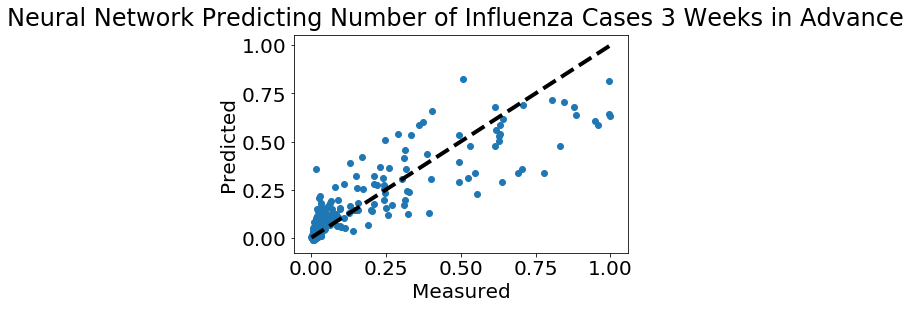

In [167]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
print("*this is validation data, epochs="+str(epoch_number))
print("RMSE: ")
print("Using RELU Activation Function")
print(rmse(np.array([y_test]),y_pred.reshape(1,-1)))
plt.suptitle("Neural Network Predicting Number of Influenza Cases 3 Weeks in Advance")
plt.show()

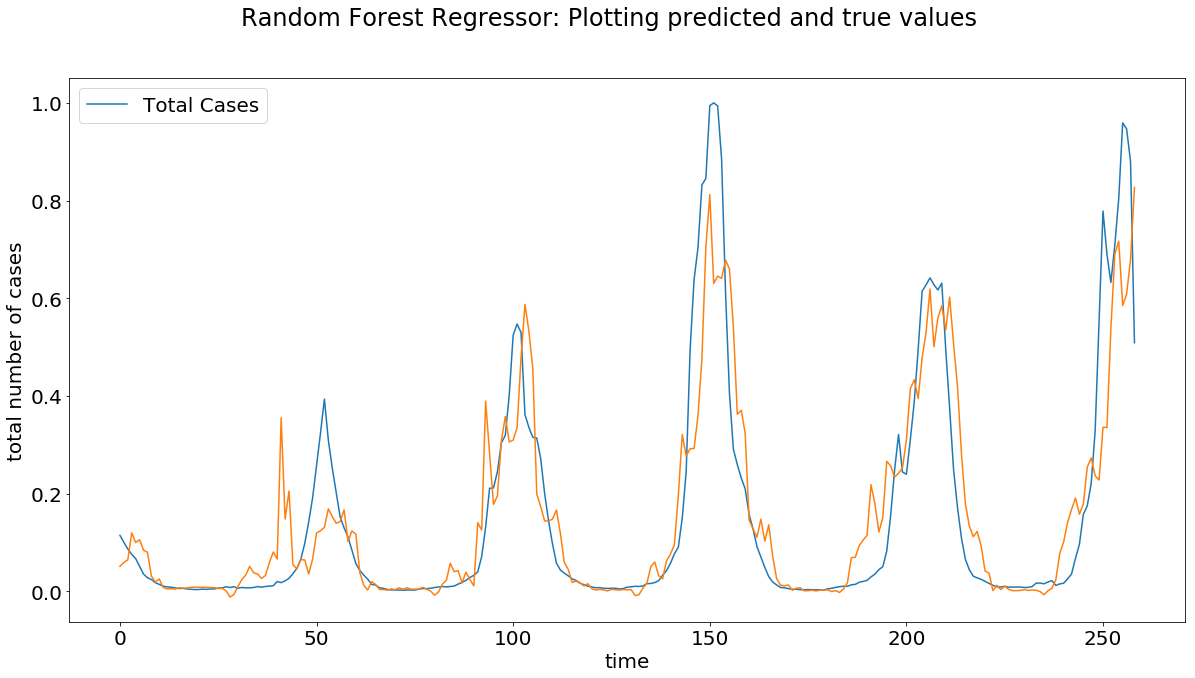

In [168]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(y_test)),y_test)
plt.plot(np.arange(len(y_test)),y_pred)
plt.legend()
plt.suptitle('Random Forest Regressor: Plotting predicted and true values')
plt.xlabel('time')
plt.ylabel('total number of cases')
plt.show()